In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('churn_prediction_data/train.csv')

In [3]:
df_train

RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
0           551    15806307   Trevisano          720     Spain    Male   38   
1          6897    15709621      Martin          682    France  Female   54   
2          4588    15619340      Palmer          672    France  Female   31   
3           291    15620746  Napolitani          592     Spain  Female   40   
4          1673    15646372         Yao          753     Spain    Male   42   
...         ...         ...         ...          ...       ...     ...  ...   
7995       5345    15584532          Yu          568    France  Female   35   
7996       5837    15606641        Liao          602   Germany  Female   45   
7997       7335    15739692       Ferri          679     Spain  Female   43   
7998       9552    15791373     Worsnop          715    France    Male   38   
7999        178    15739931      Ibekwe          600    France  Female   42   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          5  114051.97              2          0               1   
1          4   62397.41              1          1               0   
2          5  119903.67              1          1               1   
3          4  104257.86              1          1               0   
4          5  120387.73              1          0               1   
...      ...        ...            ...        ...             ...   
7995       6  121079.60              2          1               1   
7996       7  145846.07              1          1               0   
7997       5  132810.01              1          1               0   
7998       4  118729.45              1          0               0   
7999       5   62397.41              1          0               0   

      EstimatedSalary  Exited  
0           107577.29       0  
1           113088.60       1  
2           132925.17       0  
3           110857.33       0  
4           126378.57       0  
...               ...     ...  
7995        124890.50       1  
7996         99276.02       0  
7997        130780.85       1  
7998         95484.52       0  
7999         66315.00       0  

[8000 rows x 14 columns]

In [4]:
train_data = df_train.loc[:, 'CreditScore': 'EstimatedSalary']
train_label = df_train.Exited

In [5]:
print(train_data.dtypes)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


# Label Encoding

In [6]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
train_data['Geography'] = lbl.fit_transform(train_data['Geography'].astype(str))
train_data['Gender'] = lbl.fit_transform(train_data['Gender'].astype(str))

In [7]:
train_data

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             720          2       1   38       5  114051.97              2   
1             682          0       0   54       4   62397.41              1   
2             672          0       0   31       5  119903.67              1   
3             592          2       0   40       4  104257.86              1   
4             753          2       1   42       5  120387.73              1   
...           ...        ...     ...  ...     ...        ...            ...   
7995          568          0       0   35       6  121079.60              2   
7996          602          1       0   45       7  145846.07              1   
7997          679          2       0   43       5  132810.01              1   
7998          715          0       1   38       4  118729.45              1   
7999          600          0       0   42       5   62397.41              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             0               1        107577.29  
1             1               0        113088.60  
2             1               1        132925.17  
3             1               0        110857.33  
4             0               1        126378.57  
...         ...             ...              ...  
7995          1               1        124890.50  
7996          1               0         99276.02  
7997          1               0        130780.85  
7998          0               0         95484.52  
7999          0               0         66315.00  

[8000 rows x 10 columns]

### split data

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, train_size = 6000, test_size = 2000, random_state = 48)

## XGBoost

In [9]:
from xgboost import XGBClassifier

In [10]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train) 

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## CatBoost

In [11]:
from catboost import CatBoostClassifier

In [12]:
cbc = CatBoostClassifier()
cbc.fit(x_train,y_train) 

Learning rate set to 0.022141
0:	learn: 0.6752836	total: 157ms	remaining: 2m 36s
1:	learn: 0.6580377	total: 167ms	remaining: 1m 23s
2:	learn: 0.6428020	total: 174ms	remaining: 57.7s
3:	learn: 0.6265726	total: 181ms	remaining: 45.1s
4:	learn: 0.6117588	total: 185ms	remaining: 36.8s
5:	learn: 0.5985621	total: 188ms	remaining: 31.2s
6:	learn: 0.5848935	total: 193ms	remaining: 27.4s
7:	learn: 0.5725304	total: 197ms	remaining: 24.4s
8:	learn: 0.5616607	total: 200ms	remaining: 22.1s
9:	learn: 0.5505875	total: 209ms	remaining: 20.6s
10:	learn: 0.5400662	total: 216ms	remaining: 19.5s
11:	learn: 0.5304162	total: 222ms	remaining: 18.3s
12:	learn: 0.5223786	total: 228ms	remaining: 17.3s
13:	learn: 0.5136112	total: 231ms	remaining: 16.3s
14:	learn: 0.5065112	total: 236ms	remaining: 15.5s
15:	learn: 0.4984900	total: 240ms	remaining: 14.7s
16:	learn: 0.4914358	total: 248ms	remaining: 14.3s
17:	learn: 0.4837244	total: 253ms	remaining: 13.8s
18:	learn: 0.4778617	total: 258ms	remaining: 13.3s
19:	learn

189:	learn: 0.3192288	total: 1.23s	remaining: 5.24s
190:	learn: 0.3190786	total: 1.24s	remaining: 5.24s
191:	learn: 0.3188440	total: 1.25s	remaining: 5.25s
192:	learn: 0.3185940	total: 1.25s	remaining: 5.24s
193:	learn: 0.3184041	total: 1.26s	remaining: 5.24s
194:	learn: 0.3182961	total: 1.27s	remaining: 5.24s
195:	learn: 0.3181754	total: 1.28s	remaining: 5.25s
196:	learn: 0.3179854	total: 1.29s	remaining: 5.26s
197:	learn: 0.3177356	total: 1.29s	remaining: 5.25s
198:	learn: 0.3175337	total: 1.3s	remaining: 5.23s
199:	learn: 0.3172762	total: 1.3s	remaining: 5.22s
200:	learn: 0.3171235	total: 1.31s	remaining: 5.21s
201:	learn: 0.3169031	total: 1.32s	remaining: 5.2s
202:	learn: 0.3167298	total: 1.32s	remaining: 5.2s
203:	learn: 0.3164572	total: 1.34s	remaining: 5.22s
204:	learn: 0.3163286	total: 1.35s	remaining: 5.22s
205:	learn: 0.3161962	total: 1.35s	remaining: 5.22s
206:	learn: 0.3160799	total: 1.36s	remaining: 5.23s
207:	learn: 0.3158831	total: 1.37s	remaining: 5.22s
208:	learn: 0.31

359:	learn: 0.2951244	total: 2.31s	remaining: 4.11s
360:	learn: 0.2949850	total: 2.32s	remaining: 4.1s
361:	learn: 0.2949304	total: 2.32s	remaining: 4.09s
362:	learn: 0.2947924	total: 2.33s	remaining: 4.08s
363:	learn: 0.2946449	total: 2.33s	remaining: 4.08s
364:	learn: 0.2945245	total: 2.35s	remaining: 4.08s
365:	learn: 0.2944812	total: 2.35s	remaining: 4.08s
366:	learn: 0.2943405	total: 2.36s	remaining: 4.08s
367:	learn: 0.2942000	total: 2.37s	remaining: 4.08s
368:	learn: 0.2940352	total: 2.38s	remaining: 4.07s
369:	learn: 0.2939248	total: 2.39s	remaining: 4.06s
370:	learn: 0.2937996	total: 2.39s	remaining: 4.06s
371:	learn: 0.2936729	total: 2.4s	remaining: 4.06s
372:	learn: 0.2935992	total: 2.41s	remaining: 4.05s
373:	learn: 0.2934543	total: 2.42s	remaining: 4.05s
374:	learn: 0.2932952	total: 2.43s	remaining: 4.05s
375:	learn: 0.2931672	total: 2.44s	remaining: 4.04s
376:	learn: 0.2930085	total: 2.44s	remaining: 4.04s
377:	learn: 0.2929572	total: 2.45s	remaining: 4.04s
378:	learn: 0.

541:	learn: 0.2738973	total: 3.36s	remaining: 2.84s
542:	learn: 0.2738330	total: 3.36s	remaining: 2.83s
543:	learn: 0.2736414	total: 3.37s	remaining: 2.83s
544:	learn: 0.2735244	total: 3.38s	remaining: 2.82s
545:	learn: 0.2734635	total: 3.38s	remaining: 2.81s
546:	learn: 0.2733450	total: 3.38s	remaining: 2.8s
547:	learn: 0.2732662	total: 3.39s	remaining: 2.8s
548:	learn: 0.2731048	total: 3.39s	remaining: 2.79s
549:	learn: 0.2730257	total: 3.4s	remaining: 2.79s
550:	learn: 0.2729378	total: 3.41s	remaining: 2.78s
551:	learn: 0.2728247	total: 3.42s	remaining: 2.78s
552:	learn: 0.2726990	total: 3.42s	remaining: 2.77s
553:	learn: 0.2726061	total: 3.43s	remaining: 2.76s
554:	learn: 0.2725423	total: 3.43s	remaining: 2.75s
555:	learn: 0.2723423	total: 3.44s	remaining: 2.75s
556:	learn: 0.2722067	total: 3.45s	remaining: 2.74s
557:	learn: 0.2721102	total: 3.45s	remaining: 2.74s
558:	learn: 0.2720005	total: 3.46s	remaining: 2.73s
559:	learn: 0.2719226	total: 3.46s	remaining: 2.72s
560:	learn: 0.2

720:	learn: 0.2566082	total: 4.39s	remaining: 1.7s
721:	learn: 0.2564637	total: 4.4s	remaining: 1.69s
722:	learn: 0.2563895	total: 4.41s	remaining: 1.69s
723:	learn: 0.2562717	total: 4.41s	remaining: 1.68s
724:	learn: 0.2561875	total: 4.42s	remaining: 1.68s
725:	learn: 0.2560732	total: 4.43s	remaining: 1.67s
726:	learn: 0.2559579	total: 4.43s	remaining: 1.67s
727:	learn: 0.2558519	total: 4.44s	remaining: 1.66s
728:	learn: 0.2557889	total: 4.44s	remaining: 1.65s
729:	learn: 0.2556542	total: 4.45s	remaining: 1.64s
730:	learn: 0.2554362	total: 4.45s	remaining: 1.64s
731:	learn: 0.2553114	total: 4.46s	remaining: 1.63s
732:	learn: 0.2552336	total: 4.46s	remaining: 1.63s
733:	learn: 0.2551468	total: 4.47s	remaining: 1.62s
734:	learn: 0.2550445	total: 4.47s	remaining: 1.61s
735:	learn: 0.2549732	total: 4.47s	remaining: 1.6s
736:	learn: 0.2548322	total: 4.48s	remaining: 1.6s
737:	learn: 0.2547401	total: 4.49s	remaining: 1.59s
738:	learn: 0.2546428	total: 4.49s	remaining: 1.59s
739:	learn: 0.25

887:	learn: 0.2409050	total: 5.26s	remaining: 663ms
888:	learn: 0.2408441	total: 5.26s	remaining: 657ms
889:	learn: 0.2407588	total: 5.26s	remaining: 651ms
890:	learn: 0.2406800	total: 5.27s	remaining: 644ms
891:	learn: 0.2406267	total: 5.28s	remaining: 639ms
892:	learn: 0.2405344	total: 5.28s	remaining: 633ms
893:	learn: 0.2404318	total: 5.29s	remaining: 627ms
894:	learn: 0.2403146	total: 5.29s	remaining: 621ms
895:	learn: 0.2402367	total: 5.3s	remaining: 616ms
896:	learn: 0.2401241	total: 5.31s	remaining: 609ms
897:	learn: 0.2400183	total: 5.31s	remaining: 603ms
898:	learn: 0.2399377	total: 5.32s	remaining: 597ms
899:	learn: 0.2398584	total: 5.32s	remaining: 591ms
900:	learn: 0.2397583	total: 5.33s	remaining: 585ms
901:	learn: 0.2396635	total: 5.33s	remaining: 579ms
902:	learn: 0.2395839	total: 5.34s	remaining: 573ms
903:	learn: 0.2395222	total: 5.34s	remaining: 567ms
904:	learn: 0.2394657	total: 5.34s	remaining: 561ms
905:	learn: 0.2393914	total: 5.35s	remaining: 555ms
906:	learn: 0

## result

In [13]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [14]:
pred=xgbc.predict(x_test)
print('Train Result of XGBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of XGBoost:
Accuracy Score: 85.65%
Precision Score: 68.40%
F1 score: 56.18%


In [15]:
pred=cbc.predict(x_test)
print('Train Result of CatBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of CatBoost:
Accuracy Score: 87.35%
Precision Score: 75.29%
F1 score: 61.02%


# one hot encoding

In [16]:
train_data = df_train.loc[:, 'CreditScore': 'EstimatedSalary']
train_data = pd.get_dummies(train_data, columns=['Geography', 'Gender'])

In [17]:
train_data

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             720   38       5  114051.97              2          0   
1             682   54       4   62397.41              1          1   
2             672   31       5  119903.67              1          1   
3             592   40       4  104257.86              1          1   
4             753   42       5  120387.73              1          0   
...           ...  ...     ...        ...            ...        ...   
7995          568   35       6  121079.60              2          1   
7996          602   45       7  145846.07              1          1   
7997          679   43       5  132810.01              1          1   
7998          715   38       4  118729.45              1          0   
7999          600   42       5   62397.41              1          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                  1        107577.29                 0                  0   
1                  0        113088.60                 1                  0   
2                  1        132925.17                 1                  0   
3                  0        110857.33                 0                  0   
4                  1        126378.57                 0                  0   
...              ...              ...               ...                ...   
7995               1        124890.50                 1                  0   
7996               0         99276.02                 0                  1   
7997               0        130780.85                 0                  0   
7998               0         95484.52                 1                  0   
7999               0         66315.00                 1                  0   

      Geography_Spain  Gender_Female  Gender_Male  
0                   1              0            1  
1                   0              1            0  
2                   0              1            0  
3                   1              1            0  
4                   1              0            1  
...               ...            ...          ...  
7995                0              1            0  
7996                0              1            0  
7997                1              1            0  
7998                0              0            1  
7999                0              1            0  

[8000 rows x 13 columns]

### split data

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, train_size = 6000, test_size = 2000, random_state = 48)

## XGBoost

In [19]:
from xgboost import XGBClassifier

In [20]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train) 

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## CatBoost

In [21]:
from catboost import CatBoostClassifier

In [22]:
cbc = CatBoostClassifier()
cbc.fit(x_train,y_train) 

Learning rate set to 0.022141
0:	learn: 0.6749130	total: 7.33ms	remaining: 7.32s
1:	learn: 0.6582674	total: 15.8ms	remaining: 7.9s
2:	learn: 0.6424301	total: 21.6ms	remaining: 7.16s
3:	learn: 0.6269745	total: 25.7ms	remaining: 6.39s
4:	learn: 0.6132126	total: 32.9ms	remaining: 6.55s
5:	learn: 0.5995368	total: 40.6ms	remaining: 6.72s
6:	learn: 0.5867528	total: 47.7ms	remaining: 6.76s
7:	learn: 0.5737430	total: 54.5ms	remaining: 6.76s
8:	learn: 0.5651266	total: 62.1ms	remaining: 6.84s
9:	learn: 0.5560351	total: 69.3ms	remaining: 6.86s
10:	learn: 0.5454268	total: 73.6ms	remaining: 6.62s
11:	learn: 0.5356067	total: 80.4ms	remaining: 6.62s
12:	learn: 0.5272542	total: 87.8ms	remaining: 6.67s
13:	learn: 0.5191090	total: 95.1ms	remaining: 6.69s
14:	learn: 0.5122598	total: 102ms	remaining: 6.69s
15:	learn: 0.5061882	total: 110ms	remaining: 6.75s
16:	learn: 0.4979999	total: 118ms	remaining: 6.81s
17:	learn: 0.4921617	total: 126ms	remaining: 6.88s
18:	learn: 0.4850392	total: 133ms	remaining: 6.87

174:	learn: 0.3196772	total: 1.19s	remaining: 5.61s
175:	learn: 0.3195457	total: 1.19s	remaining: 5.58s
176:	learn: 0.3194528	total: 1.2s	remaining: 5.58s
177:	learn: 0.3192721	total: 1.21s	remaining: 5.57s
178:	learn: 0.3190459	total: 1.21s	remaining: 5.56s
179:	learn: 0.3188212	total: 1.22s	remaining: 5.57s
180:	learn: 0.3187591	total: 1.23s	remaining: 5.56s
181:	learn: 0.3186617	total: 1.24s	remaining: 5.56s
182:	learn: 0.3184149	total: 1.24s	remaining: 5.54s
183:	learn: 0.3181753	total: 1.25s	remaining: 5.54s
184:	learn: 0.3179266	total: 1.25s	remaining: 5.52s
185:	learn: 0.3177726	total: 1.26s	remaining: 5.5s
186:	learn: 0.3176402	total: 1.27s	remaining: 5.51s
187:	learn: 0.3175247	total: 1.27s	remaining: 5.49s
188:	learn: 0.3173232	total: 1.28s	remaining: 5.5s
189:	learn: 0.3171555	total: 1.29s	remaining: 5.48s
190:	learn: 0.3170116	total: 1.29s	remaining: 5.49s
191:	learn: 0.3169457	total: 1.3s	remaining: 5.47s
192:	learn: 0.3167711	total: 1.31s	remaining: 5.48s
193:	learn: 0.31

351:	learn: 0.2957806	total: 2.38s	remaining: 4.39s
352:	learn: 0.2956475	total: 2.39s	remaining: 4.38s
353:	learn: 0.2955328	total: 2.4s	remaining: 4.38s
354:	learn: 0.2953297	total: 2.41s	remaining: 4.37s
355:	learn: 0.2951067	total: 2.42s	remaining: 4.37s
356:	learn: 0.2950315	total: 2.42s	remaining: 4.37s
357:	learn: 0.2948476	total: 2.43s	remaining: 4.36s
358:	learn: 0.2947365	total: 2.44s	remaining: 4.35s
359:	learn: 0.2945732	total: 2.45s	remaining: 4.35s
360:	learn: 0.2944436	total: 2.46s	remaining: 4.35s
361:	learn: 0.2943915	total: 2.46s	remaining: 4.34s
362:	learn: 0.2942635	total: 2.47s	remaining: 4.33s
363:	learn: 0.2941798	total: 2.48s	remaining: 4.33s
364:	learn: 0.2940326	total: 2.48s	remaining: 4.32s
365:	learn: 0.2938915	total: 2.49s	remaining: 4.32s
366:	learn: 0.2936908	total: 2.5s	remaining: 4.31s
367:	learn: 0.2936118	total: 2.51s	remaining: 4.31s
368:	learn: 0.2934952	total: 2.51s	remaining: 4.3s
369:	learn: 0.2933373	total: 2.52s	remaining: 4.29s
370:	learn: 0.2

530:	learn: 0.2737552	total: 3.59s	remaining: 3.17s
531:	learn: 0.2736421	total: 3.6s	remaining: 3.17s
532:	learn: 0.2735374	total: 3.6s	remaining: 3.16s
533:	learn: 0.2734029	total: 3.61s	remaining: 3.15s
534:	learn: 0.2732693	total: 3.62s	remaining: 3.14s
535:	learn: 0.2731271	total: 3.63s	remaining: 3.14s
536:	learn: 0.2730734	total: 3.63s	remaining: 3.13s
537:	learn: 0.2729945	total: 3.64s	remaining: 3.12s
538:	learn: 0.2729039	total: 3.65s	remaining: 3.12s
539:	learn: 0.2727888	total: 3.65s	remaining: 3.11s
540:	learn: 0.2726940	total: 3.66s	remaining: 3.1s
541:	learn: 0.2725792	total: 3.67s	remaining: 3.1s
542:	learn: 0.2724813	total: 3.67s	remaining: 3.09s
543:	learn: 0.2723229	total: 3.68s	remaining: 3.08s
544:	learn: 0.2721833	total: 3.69s	remaining: 3.08s
545:	learn: 0.2719819	total: 3.69s	remaining: 3.07s
546:	learn: 0.2718647	total: 3.7s	remaining: 3.06s
547:	learn: 0.2717834	total: 3.71s	remaining: 3.06s
548:	learn: 0.2716831	total: 3.71s	remaining: 3.05s
549:	learn: 0.271

715:	learn: 0.2546128	total: 4.8s	remaining: 1.9s
716:	learn: 0.2544973	total: 4.81s	remaining: 1.9s
717:	learn: 0.2544297	total: 4.82s	remaining: 1.89s
718:	learn: 0.2543765	total: 4.82s	remaining: 1.88s
719:	learn: 0.2543014	total: 4.83s	remaining: 1.88s
720:	learn: 0.2542184	total: 4.83s	remaining: 1.87s
721:	learn: 0.2541384	total: 4.84s	remaining: 1.86s
722:	learn: 0.2540795	total: 4.85s	remaining: 1.86s
723:	learn: 0.2540224	total: 4.85s	remaining: 1.85s
724:	learn: 0.2538737	total: 4.86s	remaining: 1.84s
725:	learn: 0.2537703	total: 4.86s	remaining: 1.83s
726:	learn: 0.2536760	total: 4.87s	remaining: 1.83s
727:	learn: 0.2535686	total: 4.87s	remaining: 1.82s
728:	learn: 0.2534866	total: 4.88s	remaining: 1.81s
729:	learn: 0.2534159	total: 4.89s	remaining: 1.81s
730:	learn: 0.2533319	total: 4.89s	remaining: 1.8s
731:	learn: 0.2532679	total: 4.9s	remaining: 1.79s
732:	learn: 0.2531604	total: 4.91s	remaining: 1.79s
733:	learn: 0.2530746	total: 4.91s	remaining: 1.78s
734:	learn: 0.252

894:	learn: 0.2382420	total: 6.03s	remaining: 707ms
895:	learn: 0.2381402	total: 6.03s	remaining: 700ms
896:	learn: 0.2380154	total: 6.04s	remaining: 693ms
897:	learn: 0.2379249	total: 6.04s	remaining: 687ms
898:	learn: 0.2378670	total: 6.06s	remaining: 680ms
899:	learn: 0.2377868	total: 6.06s	remaining: 673ms
900:	learn: 0.2376634	total: 6.07s	remaining: 667ms
901:	learn: 0.2375861	total: 6.07s	remaining: 660ms
902:	learn: 0.2375101	total: 6.08s	remaining: 654ms
903:	learn: 0.2373757	total: 6.09s	remaining: 647ms
904:	learn: 0.2372836	total: 6.1s	remaining: 640ms
905:	learn: 0.2372014	total: 6.11s	remaining: 634ms
906:	learn: 0.2371444	total: 6.12s	remaining: 627ms
907:	learn: 0.2370583	total: 6.12s	remaining: 620ms
908:	learn: 0.2369856	total: 6.13s	remaining: 614ms
909:	learn: 0.2369058	total: 6.14s	remaining: 607ms
910:	learn: 0.2368536	total: 6.15s	remaining: 601ms
911:	learn: 0.2367573	total: 6.15s	remaining: 594ms
912:	learn: 0.2367043	total: 6.16s	remaining: 587ms
913:	learn: 0

## result

In [23]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [24]:
pred=xgbc.predict(x_test)
print('Train Result of XGBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of XGBoost:
Accuracy Score: 85.75%
Precision Score: 67.47%
F1 score: 57.78%


In [25]:
pred=cbc.predict(x_test)
print('Train Result of CatBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of CatBoost:
Accuracy Score: 87.45%
Precision Score: 76.06%
F1 score: 61.09%


# 調整參數

## XGBoost

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt

### learning_rate

In [27]:
acc = []
prec = []
F1 = []
for i in range(35):
    xgbc = XGBClassifier(learning_rate=((i+1)*0.01))
    xgbc.fit(x_train,y_train)
    
    pred=xgbc.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    F1.append(f1_score(y_test, pred))

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
learning_rate = [(i+1)*0.01 for i in range(35)]
final_score = [0.3*acc[i] + 0.3*prec[i] + 0.4*F1[i] for i in range(35)]

Text(0, 0.5, 'score')

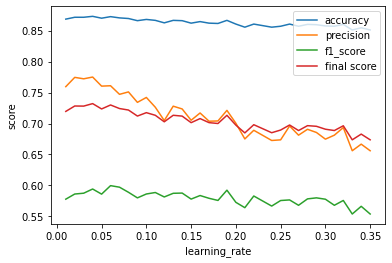

In [29]:
plt.plot(learning_rate, acc, label='accuracy')
plt.plot(learning_rate, prec, label='precision')
plt.plot(learning_rate, F1, label='f1_score')
plt.plot(learning_rate, final_score, label='final score')
plt.legend(loc = "best")
plt.xlabel('learning_rate')
plt.ylabel('score')

In [30]:
(final_score.index(max(final_score))+1)*0.01

0.04

learning_rate 選擇0.04

In [31]:
xgbc = XGBClassifier(learning_rate=0.04)
xgbc.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.04, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
pred=xgbc.predict(x_test)
print('Train Result of XGBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of XGBoost:
Accuracy Score: 87.30%
Precision Score: 77.50%
F1 score: 59.42%


###  max_depth

In [33]:
acc = []
prec = []
F1 = []
for i in range(8):
    xgbc = XGBClassifier(learning_rate=0.04, max_depth=i+3)
    xgbc.fit(x_train,y_train)
    
    pred=xgbc.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    F1.append(f1_score(y_test, pred))

[20:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
max_depth = [i+3 for i in range(8)]
final_score = [0.3*acc[i] + 0.3*prec[i] + 0.4*F1[i] for i in range(8)]

Text(0, 0.5, 'score')

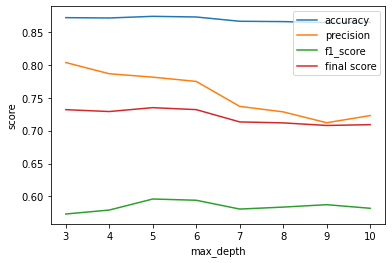

In [35]:
plt.plot(max_depth, acc, label='accuracy')
plt.plot(max_depth, prec, label='precision')
plt.plot(max_depth, F1, label='f1_score')
plt.plot(max_depth, final_score, label='final score')
plt.legend(loc = "best")
plt.xlabel('max_depth')
plt.ylabel('score')

In [36]:
final_score.index(max(final_score))+3

5

max_depth 選擇5

In [37]:
xgbc = XGBClassifier(learning_rate=0.04, max_depth=5)
xgbc.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.04, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
pred=xgbc.predict(x_test)
print('Train Result of XGBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of XGBoost:
Accuracy Score: 87.40%
Precision Score: 78.15%
F1 score: 59.62%


### subsample

In [39]:
acc = []
prec = []
F1 = []
for i in range(21):
    xgbc = XGBClassifier(learning_rate=0.04, max_depth=5, subsample=0.8+(i*0.01))
    xgbc.fit(x_train,y_train)
    
    pred=xgbc.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    F1.append(f1_score(y_test, pred))

[20:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
subsample = [0.8+(i*0.01) for i in range(21)]
final_score = [0.3*acc[i] + 0.3*prec[i] + 0.4*F1[i] for i in range(21)]

Text(0, 0.5, 'score')

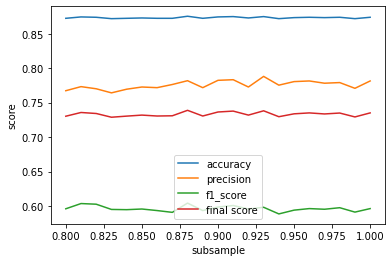

In [41]:
plt.plot(subsample, acc, label='accuracy')
plt.plot(subsample, prec, label='precision')
plt.plot(subsample, F1, label='f1_score')
plt.plot(subsample, final_score, label='final score')
plt.legend(loc = "best")
plt.xlabel('subsample')
plt.ylabel('score')

In [42]:
0.8+(final_score.index(max(final_score))*0.01)

0.88

subsample 選擇0.88

In [43]:
xgbc = XGBClassifier(learning_rate=0.04, max_depth=5, subsample=0.88)
xgbc.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.04, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.88,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
pred=xgbc.predict(x_test)
print('Train Result of XGBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of XGBoost:
Accuracy Score: 87.55%
Precision Score: 78.19%
F1 score: 60.41%


### colsample_bytree

In [45]:
acc = []
prec = []
F1 = []
for i in range(21):
    xgbc = XGBClassifier(learning_rate=0.04, max_depth=5, subsample=0.88, colsample_bytree=0.8+(i*0.01))
    xgbc.fit(x_train,y_train)
    
    pred=xgbc.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    F1.append(f1_score(y_test, pred))

[20:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
colsample_bytree = [0.8+(i*0.01) for i in range(21)]
final_score = [0.3*acc[i] + 0.3*prec[i] + 0.4*F1[i] for i in range(21)]

Text(0, 0.5, 'score')

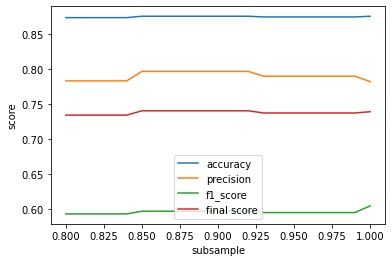

In [47]:
plt.plot(colsample_bytree, acc, label='accuracy')
plt.plot(colsample_bytree, prec, label='precision')
plt.plot(colsample_bytree, F1, label='f1_score')
plt.plot(colsample_bytree, final_score, label='final score')
plt.legend(loc = "best")
plt.xlabel('subsample')
plt.ylabel('score')

In [48]:
0.8+(final_score.index(max(final_score))*0.01)

0.8500000000000001

colsample_bytree 選擇0.85

In [92]:
xgbc = XGBClassifier(learning_rate=0.04, max_depth=5, subsample=0.88, colsample_bytree=0.85)
xgbc.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.88, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [93]:
pred=xgbc.predict(x_test)
print('Train Result of XGBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of XGBoost:
Accuracy Score: 87.55%
Precision Score: 79.65%
F1 score: 59.64%


## CatBoost

In [49]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt

### learning_rate

In [50]:
acc = []
prec = []
F1 = []
for i in range(35):
    cbc = CatBoostClassifier(learning_rate=(i+1)*0.01)
    cbc.fit(x_train,y_train)
    
    pred=cbc.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    F1.append(f1_score(y_test, pred))

0:	learn: 0.6848267	total: 4.19ms	remaining: 4.18s
1:	learn: 0.6766450	total: 8.84ms	remaining: 4.41s
2:	learn: 0.6689526	total: 19.6ms	remaining: 6.51s
3:	learn: 0.6618332	total: 27.8ms	remaining: 6.93s
4:	learn: 0.6546889	total: 34.9ms	remaining: 6.95s
5:	learn: 0.6474082	total: 39.5ms	remaining: 6.54s
6:	learn: 0.6403710	total: 46.8ms	remaining: 6.63s
7:	learn: 0.6332349	total: 55.4ms	remaining: 6.87s
8:	learn: 0.6281602	total: 66.7ms	remaining: 7.34s
9:	learn: 0.6216931	total: 80.9ms	remaining: 8.01s
10:	learn: 0.6151835	total: 96ms	remaining: 8.63s
11:	learn: 0.6087911	total: 102ms	remaining: 8.42s
12:	learn: 0.6028407	total: 112ms	remaining: 8.54s
13:	learn: 0.5974351	total: 123ms	remaining: 8.63s
14:	learn: 0.5930108	total: 133ms	remaining: 8.71s
15:	learn: 0.5883369	total: 142ms	remaining: 8.73s
16:	learn: 0.5829744	total: 153ms	remaining: 8.83s
17:	learn: 0.5776466	total: 161ms	remaining: 8.77s
18:	learn: 0.5722691	total: 175ms	remaining: 9.02s
19:	learn: 0.5667080	total: 180m

170:	learn: 0.3516925	total: 1.42s	remaining: 6.89s
171:	learn: 0.3513584	total: 1.44s	remaining: 6.93s
172:	learn: 0.3510120	total: 1.45s	remaining: 6.92s
173:	learn: 0.3508084	total: 1.46s	remaining: 6.93s
174:	learn: 0.3504683	total: 1.48s	remaining: 6.96s
175:	learn: 0.3502705	total: 1.48s	remaining: 6.92s
176:	learn: 0.3498949	total: 1.48s	remaining: 6.9s
177:	learn: 0.3494829	total: 1.49s	remaining: 6.88s
178:	learn: 0.3491514	total: 1.5s	remaining: 6.89s
179:	learn: 0.3488998	total: 1.51s	remaining: 6.9s
180:	learn: 0.3485127	total: 1.52s	remaining: 6.89s
181:	learn: 0.3482608	total: 1.54s	remaining: 6.91s
182:	learn: 0.3478801	total: 1.55s	remaining: 6.9s
183:	learn: 0.3476111	total: 1.56s	remaining: 6.94s
184:	learn: 0.3473668	total: 1.57s	remaining: 6.93s
185:	learn: 0.3471609	total: 1.58s	remaining: 6.93s
186:	learn: 0.3468954	total: 1.6s	remaining: 6.97s
187:	learn: 0.3467201	total: 1.61s	remaining: 6.96s
188:	learn: 0.3464961	total: 1.61s	remaining: 6.93s
189:	learn: 0.346

339:	learn: 0.3246781	total: 3.05s	remaining: 5.93s
340:	learn: 0.3246136	total: 3.07s	remaining: 5.93s
341:	learn: 0.3245048	total: 3.08s	remaining: 5.92s
342:	learn: 0.3244635	total: 3.09s	remaining: 5.92s
343:	learn: 0.3244037	total: 3.1s	remaining: 5.92s
344:	learn: 0.3243370	total: 3.11s	remaining: 5.9s
345:	learn: 0.3242224	total: 3.13s	remaining: 5.92s
346:	learn: 0.3241007	total: 3.15s	remaining: 5.93s
347:	learn: 0.3240326	total: 3.16s	remaining: 5.92s
348:	learn: 0.3239196	total: 3.17s	remaining: 5.91s
349:	learn: 0.3238220	total: 3.18s	remaining: 5.91s
350:	learn: 0.3236974	total: 3.2s	remaining: 5.91s
351:	learn: 0.3235728	total: 3.21s	remaining: 5.9s
352:	learn: 0.3235292	total: 3.21s	remaining: 5.89s
353:	learn: 0.3234442	total: 3.22s	remaining: 5.88s
354:	learn: 0.3233442	total: 3.22s	remaining: 5.86s
355:	learn: 0.3232350	total: 3.23s	remaining: 5.85s
356:	learn: 0.3231115	total: 3.24s	remaining: 5.84s
357:	learn: 0.3229790	total: 3.25s	remaining: 5.83s
358:	learn: 0.32

508:	learn: 0.3115088	total: 4.82s	remaining: 4.65s
509:	learn: 0.3114944	total: 4.83s	remaining: 4.64s
510:	learn: 0.3114291	total: 4.85s	remaining: 4.64s
511:	learn: 0.3113697	total: 4.87s	remaining: 4.64s
512:	learn: 0.3112670	total: 4.88s	remaining: 4.64s
513:	learn: 0.3112031	total: 4.91s	remaining: 4.64s
514:	learn: 0.3111474	total: 4.92s	remaining: 4.63s
515:	learn: 0.3110820	total: 4.93s	remaining: 4.63s
516:	learn: 0.3109728	total: 4.94s	remaining: 4.62s
517:	learn: 0.3109105	total: 4.96s	remaining: 4.61s
518:	learn: 0.3108820	total: 4.97s	remaining: 4.61s
519:	learn: 0.3108294	total: 4.98s	remaining: 4.6s
520:	learn: 0.3107321	total: 4.99s	remaining: 4.59s
521:	learn: 0.3106628	total: 5s	remaining: 4.58s
522:	learn: 0.3105669	total: 5.02s	remaining: 4.58s
523:	learn: 0.3105145	total: 5.04s	remaining: 4.58s
524:	learn: 0.3104789	total: 5.05s	remaining: 4.57s
525:	learn: 0.3103758	total: 5.06s	remaining: 4.56s
526:	learn: 0.3103454	total: 5.07s	remaining: 4.55s
527:	learn: 0.31

670:	learn: 0.3018991	total: 6.85s	remaining: 3.36s
671:	learn: 0.3018452	total: 6.87s	remaining: 3.35s
672:	learn: 0.3017687	total: 6.88s	remaining: 3.35s
673:	learn: 0.3016999	total: 6.9s	remaining: 3.33s
674:	learn: 0.3016341	total: 6.91s	remaining: 3.33s
675:	learn: 0.3015835	total: 6.93s	remaining: 3.32s
676:	learn: 0.3015802	total: 6.93s	remaining: 3.31s
677:	learn: 0.3015313	total: 6.94s	remaining: 3.3s
678:	learn: 0.3014450	total: 6.95s	remaining: 3.29s
679:	learn: 0.3014117	total: 6.96s	remaining: 3.28s
680:	learn: 0.3013366	total: 6.98s	remaining: 3.27s
681:	learn: 0.3012590	total: 7s	remaining: 3.27s
682:	learn: 0.3012115	total: 7.02s	remaining: 3.26s
683:	learn: 0.3011271	total: 7.05s	remaining: 3.26s
684:	learn: 0.3010710	total: 7.08s	remaining: 3.25s
685:	learn: 0.3009976	total: 7.1s	remaining: 3.25s
686:	learn: 0.3009392	total: 7.12s	remaining: 3.24s
687:	learn: 0.3009137	total: 7.12s	remaining: 3.23s
688:	learn: 0.3008568	total: 7.13s	remaining: 3.22s
689:	learn: 0.3008

838:	learn: 0.2927244	total: 9.06s	remaining: 1.74s
839:	learn: 0.2926880	total: 9.07s	remaining: 1.73s
840:	learn: 0.2925896	total: 9.08s	remaining: 1.72s
841:	learn: 0.2925622	total: 9.09s	remaining: 1.71s
842:	learn: 0.2925197	total: 9.1s	remaining: 1.7s
843:	learn: 0.2924512	total: 9.12s	remaining: 1.69s
844:	learn: 0.2923991	total: 9.13s	remaining: 1.67s
845:	learn: 0.2923525	total: 9.14s	remaining: 1.66s
846:	learn: 0.2922917	total: 9.15s	remaining: 1.65s
847:	learn: 0.2922522	total: 9.17s	remaining: 1.64s
848:	learn: 0.2922163	total: 9.18s	remaining: 1.63s
849:	learn: 0.2921426	total: 9.19s	remaining: 1.62s
850:	learn: 0.2920906	total: 9.2s	remaining: 1.61s
851:	learn: 0.2920055	total: 9.22s	remaining: 1.6s
852:	learn: 0.2919583	total: 9.23s	remaining: 1.59s
853:	learn: 0.2919020	total: 9.24s	remaining: 1.58s
854:	learn: 0.2918520	total: 9.25s	remaining: 1.57s
855:	learn: 0.2917950	total: 9.27s	remaining: 1.56s
856:	learn: 0.2917373	total: 9.29s	remaining: 1.55s
857:	learn: 0.29

0:	learn: 0.6766467	total: 28.1ms	remaining: 28.1s
1:	learn: 0.6608382	total: 37.4ms	remaining: 18.7s
2:	learn: 0.6463657	total: 44.1ms	remaining: 14.6s
3:	learn: 0.6321928	total: 52.5ms	remaining: 13.1s
4:	learn: 0.6194808	total: 57.9ms	remaining: 11.5s
5:	learn: 0.6067742	total: 64.6ms	remaining: 10.7s
6:	learn: 0.5948603	total: 72.5ms	remaining: 10.3s
7:	learn: 0.5834572	total: 84.9ms	remaining: 10.5s
8:	learn: 0.5752924	total: 94.8ms	remaining: 10.4s
9:	learn: 0.5651204	total: 108ms	remaining: 10.7s
10:	learn: 0.5551302	total: 115ms	remaining: 10.3s
11:	learn: 0.5458228	total: 120ms	remaining: 9.84s
12:	learn: 0.5371482	total: 127ms	remaining: 9.64s
13:	learn: 0.5293050	total: 135ms	remaining: 9.49s
14:	learn: 0.5226634	total: 138ms	remaining: 9.08s
15:	learn: 0.5167372	total: 145ms	remaining: 8.92s
16:	learn: 0.5096119	total: 155ms	remaining: 8.94s
17:	learn: 0.5038498	total: 159ms	remaining: 8.69s
18:	learn: 0.4968835	total: 166ms	remaining: 8.58s
19:	learn: 0.4897181	total: 175m

174:	learn: 0.3234603	total: 1.84s	remaining: 8.69s
175:	learn: 0.3232858	total: 1.86s	remaining: 8.72s
176:	learn: 0.3231009	total: 1.88s	remaining: 8.72s
177:	learn: 0.3228376	total: 1.88s	remaining: 8.7s
178:	learn: 0.3226546	total: 1.92s	remaining: 8.8s
179:	learn: 0.3224182	total: 1.93s	remaining: 8.78s
180:	learn: 0.3222723	total: 1.93s	remaining: 8.75s
181:	learn: 0.3220446	total: 1.95s	remaining: 8.76s
182:	learn: 0.3217517	total: 1.96s	remaining: 8.75s
183:	learn: 0.3216491	total: 1.98s	remaining: 8.78s
184:	learn: 0.3214125	total: 1.99s	remaining: 8.75s
185:	learn: 0.3212480	total: 2s	remaining: 8.73s
186:	learn: 0.3210543	total: 2s	remaining: 8.71s
187:	learn: 0.3209001	total: 2.01s	remaining: 8.69s
188:	learn: 0.3207353	total: 2.02s	remaining: 8.67s
189:	learn: 0.3205686	total: 2.03s	remaining: 8.67s
190:	learn: 0.3204528	total: 2.04s	remaining: 8.66s
191:	learn: 0.3202650	total: 2.06s	remaining: 8.66s
192:	learn: 0.3200994	total: 2.06s	remaining: 8.63s
193:	learn: 0.319972

342:	learn: 0.3012846	total: 3.65s	remaining: 6.99s
343:	learn: 0.3011839	total: 3.65s	remaining: 6.97s
344:	learn: 0.3010880	total: 3.66s	remaining: 6.95s
345:	learn: 0.3009960	total: 3.67s	remaining: 6.94s
346:	learn: 0.3008629	total: 3.68s	remaining: 6.92s
347:	learn: 0.3007884	total: 3.68s	remaining: 6.9s
348:	learn: 0.3006935	total: 3.69s	remaining: 6.88s
349:	learn: 0.3005392	total: 3.69s	remaining: 6.86s
350:	learn: 0.3004856	total: 3.71s	remaining: 6.86s
351:	learn: 0.3003984	total: 3.71s	remaining: 6.84s
352:	learn: 0.3002668	total: 3.72s	remaining: 6.82s
353:	learn: 0.3001131	total: 3.73s	remaining: 6.8s
354:	learn: 0.2999366	total: 3.74s	remaining: 6.79s
355:	learn: 0.2997249	total: 3.76s	remaining: 6.8s
356:	learn: 0.2996799	total: 3.78s	remaining: 6.8s
357:	learn: 0.2995039	total: 3.79s	remaining: 6.8s
358:	learn: 0.2994152	total: 3.81s	remaining: 6.8s
359:	learn: 0.2993064	total: 3.82s	remaining: 6.79s
360:	learn: 0.2991801	total: 3.83s	remaining: 6.79s
361:	learn: 0.2991

503:	learn: 0.2837610	total: 5.51s	remaining: 5.42s
504:	learn: 0.2835962	total: 5.51s	remaining: 5.41s
505:	learn: 0.2835097	total: 5.53s	remaining: 5.39s
506:	learn: 0.2834321	total: 5.54s	remaining: 5.39s
507:	learn: 0.2833353	total: 5.56s	remaining: 5.38s
508:	learn: 0.2832235	total: 5.57s	remaining: 5.37s
509:	learn: 0.2831320	total: 5.58s	remaining: 5.36s
510:	learn: 0.2830070	total: 5.59s	remaining: 5.35s
511:	learn: 0.2828191	total: 5.6s	remaining: 5.34s
512:	learn: 0.2827218	total: 5.61s	remaining: 5.32s
513:	learn: 0.2825607	total: 5.62s	remaining: 5.32s
514:	learn: 0.2824611	total: 5.64s	remaining: 5.31s
515:	learn: 0.2823605	total: 5.65s	remaining: 5.3s
516:	learn: 0.2822628	total: 5.66s	remaining: 5.29s
517:	learn: 0.2821317	total: 5.67s	remaining: 5.28s
518:	learn: 0.2820085	total: 5.68s	remaining: 5.27s
519:	learn: 0.2819118	total: 5.7s	remaining: 5.26s
520:	learn: 0.2817876	total: 5.71s	remaining: 5.25s
521:	learn: 0.2816942	total: 5.73s	remaining: 5.25s
522:	learn: 0.2

676:	learn: 0.2659628	total: 7.59s	remaining: 3.62s
677:	learn: 0.2658619	total: 7.61s	remaining: 3.61s
678:	learn: 0.2657617	total: 7.62s	remaining: 3.6s
679:	learn: 0.2657261	total: 7.63s	remaining: 3.59s
680:	learn: 0.2656252	total: 7.65s	remaining: 3.58s
681:	learn: 0.2655361	total: 7.65s	remaining: 3.57s
682:	learn: 0.2654384	total: 7.67s	remaining: 3.56s
683:	learn: 0.2653456	total: 7.68s	remaining: 3.55s
684:	learn: 0.2652307	total: 7.69s	remaining: 3.53s
685:	learn: 0.2651260	total: 7.7s	remaining: 3.52s
686:	learn: 0.2650524	total: 7.7s	remaining: 3.51s
687:	learn: 0.2649886	total: 7.71s	remaining: 3.5s
688:	learn: 0.2649151	total: 7.72s	remaining: 3.48s
689:	learn: 0.2648467	total: 7.73s	remaining: 3.47s
690:	learn: 0.2647854	total: 7.74s	remaining: 3.46s
691:	learn: 0.2646935	total: 7.75s	remaining: 3.45s
692:	learn: 0.2646596	total: 7.76s	remaining: 3.44s
693:	learn: 0.2645417	total: 7.78s	remaining: 3.43s
694:	learn: 0.2644688	total: 7.8s	remaining: 3.42s
695:	learn: 0.264

845:	learn: 0.2512142	total: 9.64s	remaining: 1.75s
846:	learn: 0.2511252	total: 9.65s	remaining: 1.74s
847:	learn: 0.2510155	total: 9.66s	remaining: 1.73s
848:	learn: 0.2509829	total: 9.67s	remaining: 1.72s
849:	learn: 0.2508852	total: 9.7s	remaining: 1.71s
850:	learn: 0.2508067	total: 9.7s	remaining: 1.7s
851:	learn: 0.2507368	total: 9.71s	remaining: 1.69s
852:	learn: 0.2506174	total: 9.74s	remaining: 1.68s
853:	learn: 0.2505529	total: 9.75s	remaining: 1.67s
854:	learn: 0.2505188	total: 9.76s	remaining: 1.66s
855:	learn: 0.2504341	total: 9.77s	remaining: 1.64s
856:	learn: 0.2503758	total: 9.8s	remaining: 1.64s
857:	learn: 0.2503070	total: 9.81s	remaining: 1.62s
858:	learn: 0.2502625	total: 9.82s	remaining: 1.61s
859:	learn: 0.2501951	total: 9.83s	remaining: 1.6s
860:	learn: 0.2501346	total: 9.86s	remaining: 1.59s
861:	learn: 0.2500686	total: 9.88s	remaining: 1.58s
862:	learn: 0.2499947	total: 9.88s	remaining: 1.57s
863:	learn: 0.2499140	total: 9.89s	remaining: 1.56s
864:	learn: 0.249

10:	learn: 0.5106131	total: 190ms	remaining: 17.1s
11:	learn: 0.4999944	total: 200ms	remaining: 16.5s
12:	learn: 0.4910374	total: 222ms	remaining: 16.9s
13:	learn: 0.4808131	total: 235ms	remaining: 16.5s
14:	learn: 0.4741566	total: 249ms	remaining: 16.3s
15:	learn: 0.4668826	total: 260ms	remaining: 16s
16:	learn: 0.4588710	total: 276ms	remaining: 16s
17:	learn: 0.4535479	total: 285ms	remaining: 15.5s
18:	learn: 0.4463829	total: 295ms	remaining: 15.2s
19:	learn: 0.4403927	total: 305ms	remaining: 15s
20:	learn: 0.4354220	total: 321ms	remaining: 15s
21:	learn: 0.4292243	total: 341ms	remaining: 15.1s
22:	learn: 0.4238680	total: 351ms	remaining: 14.9s
23:	learn: 0.4188045	total: 381ms	remaining: 15.5s
24:	learn: 0.4143615	total: 396ms	remaining: 15.4s
25:	learn: 0.4103364	total: 413ms	remaining: 15.5s
26:	learn: 0.4063044	total: 423ms	remaining: 15.3s
27:	learn: 0.4028015	total: 434ms	remaining: 15.1s
28:	learn: 0.3997982	total: 445ms	remaining: 14.9s
29:	learn: 0.3965645	total: 455ms	remai

170:	learn: 0.3109939	total: 2.22s	remaining: 10.8s
171:	learn: 0.3107870	total: 2.24s	remaining: 10.8s
172:	learn: 0.3105712	total: 2.25s	remaining: 10.8s
173:	learn: 0.3103664	total: 2.26s	remaining: 10.7s
174:	learn: 0.3102415	total: 2.28s	remaining: 10.7s
175:	learn: 0.3100153	total: 2.29s	remaining: 10.7s
176:	learn: 0.3099066	total: 2.3s	remaining: 10.7s
177:	learn: 0.3097448	total: 2.32s	remaining: 10.7s
178:	learn: 0.3094236	total: 2.33s	remaining: 10.7s
179:	learn: 0.3092303	total: 2.35s	remaining: 10.7s
180:	learn: 0.3090877	total: 2.35s	remaining: 10.6s
181:	learn: 0.3089573	total: 2.36s	remaining: 10.6s
182:	learn: 0.3088046	total: 2.37s	remaining: 10.6s
183:	learn: 0.3085845	total: 2.38s	remaining: 10.5s
184:	learn: 0.3083150	total: 2.38s	remaining: 10.5s
185:	learn: 0.3081540	total: 2.39s	remaining: 10.5s
186:	learn: 0.3079677	total: 2.4s	remaining: 10.4s
187:	learn: 0.3078197	total: 2.42s	remaining: 10.5s
188:	learn: 0.3075832	total: 2.42s	remaining: 10.4s
189:	learn: 0.

343:	learn: 0.2822999	total: 3.9s	remaining: 7.43s
344:	learn: 0.2820778	total: 3.91s	remaining: 7.43s
345:	learn: 0.2818759	total: 3.92s	remaining: 7.42s
346:	learn: 0.2817019	total: 3.93s	remaining: 7.4s
347:	learn: 0.2815105	total: 3.94s	remaining: 7.39s
348:	learn: 0.2813217	total: 3.95s	remaining: 7.37s
349:	learn: 0.2811886	total: 3.96s	remaining: 7.35s
350:	learn: 0.2810888	total: 3.96s	remaining: 7.33s
351:	learn: 0.2809542	total: 3.97s	remaining: 7.31s
352:	learn: 0.2807411	total: 3.98s	remaining: 7.29s
353:	learn: 0.2805977	total: 3.99s	remaining: 7.28s
354:	learn: 0.2804322	total: 4s	remaining: 7.28s
355:	learn: 0.2801290	total: 4.02s	remaining: 7.27s
356:	learn: 0.2799485	total: 4.03s	remaining: 7.25s
357:	learn: 0.2797286	total: 4.03s	remaining: 7.24s
358:	learn: 0.2795082	total: 4.04s	remaining: 7.21s
359:	learn: 0.2793600	total: 4.05s	remaining: 7.2s
360:	learn: 0.2791883	total: 4.05s	remaining: 7.18s
361:	learn: 0.2790942	total: 4.06s	remaining: 7.16s
362:	learn: 0.2789

519:	learn: 0.2568081	total: 5.55s	remaining: 5.12s
520:	learn: 0.2567039	total: 5.55s	remaining: 5.11s
521:	learn: 0.2566001	total: 5.56s	remaining: 5.09s
522:	learn: 0.2564612	total: 5.57s	remaining: 5.08s
523:	learn: 0.2563105	total: 5.58s	remaining: 5.07s
524:	learn: 0.2562561	total: 5.59s	remaining: 5.06s
525:	learn: 0.2561145	total: 5.61s	remaining: 5.05s
526:	learn: 0.2560120	total: 5.62s	remaining: 5.04s
527:	learn: 0.2558667	total: 5.63s	remaining: 5.03s
528:	learn: 0.2558093	total: 5.64s	remaining: 5.02s
529:	learn: 0.2556286	total: 5.66s	remaining: 5.02s
530:	learn: 0.2556095	total: 5.67s	remaining: 5.01s
531:	learn: 0.2554235	total: 5.68s	remaining: 4.99s
532:	learn: 0.2553433	total: 5.69s	remaining: 4.99s
533:	learn: 0.2551948	total: 5.71s	remaining: 4.98s
534:	learn: 0.2550719	total: 5.72s	remaining: 4.98s
535:	learn: 0.2550024	total: 5.73s	remaining: 4.96s
536:	learn: 0.2548950	total: 5.74s	remaining: 4.95s
537:	learn: 0.2547762	total: 5.75s	remaining: 4.93s
538:	learn: 

682:	learn: 0.2368926	total: 6.97s	remaining: 3.23s
683:	learn: 0.2367608	total: 6.98s	remaining: 3.22s
684:	learn: 0.2366813	total: 7s	remaining: 3.22s
685:	learn: 0.2365175	total: 7.02s	remaining: 3.21s
686:	learn: 0.2364220	total: 7.03s	remaining: 3.2s
687:	learn: 0.2362616	total: 7.04s	remaining: 3.19s
688:	learn: 0.2361182	total: 7.06s	remaining: 3.19s
689:	learn: 0.2360157	total: 7.08s	remaining: 3.18s
690:	learn: 0.2358378	total: 7.09s	remaining: 3.17s
691:	learn: 0.2357144	total: 7.1s	remaining: 3.16s
692:	learn: 0.2355908	total: 7.11s	remaining: 3.15s
693:	learn: 0.2354949	total: 7.12s	remaining: 3.14s
694:	learn: 0.2354091	total: 7.13s	remaining: 3.13s
695:	learn: 0.2352812	total: 7.15s	remaining: 3.12s
696:	learn: 0.2352140	total: 7.15s	remaining: 3.11s
697:	learn: 0.2350691	total: 7.16s	remaining: 3.1s
698:	learn: 0.2349978	total: 7.18s	remaining: 3.09s
699:	learn: 0.2349085	total: 7.2s	remaining: 3.08s
700:	learn: 0.2348028	total: 7.2s	remaining: 3.07s
701:	learn: 0.234722

856:	learn: 0.2177284	total: 8.58s	remaining: 1.43s
857:	learn: 0.2176223	total: 8.6s	remaining: 1.42s
858:	learn: 0.2174303	total: 8.6s	remaining: 1.41s
859:	learn: 0.2173324	total: 8.61s	remaining: 1.4s
860:	learn: 0.2172189	total: 8.62s	remaining: 1.39s
861:	learn: 0.2171646	total: 8.63s	remaining: 1.38s
862:	learn: 0.2170484	total: 8.63s	remaining: 1.37s
863:	learn: 0.2169581	total: 8.64s	remaining: 1.36s
864:	learn: 0.2168533	total: 8.65s	remaining: 1.35s
865:	learn: 0.2166833	total: 8.66s	remaining: 1.34s
866:	learn: 0.2166166	total: 8.67s	remaining: 1.33s
867:	learn: 0.2164732	total: 8.68s	remaining: 1.32s
868:	learn: 0.2163742	total: 8.69s	remaining: 1.31s
869:	learn: 0.2162804	total: 8.7s	remaining: 1.3s
870:	learn: 0.2162360	total: 8.71s	remaining: 1.29s
871:	learn: 0.2161946	total: 8.71s	remaining: 1.28s
872:	learn: 0.2161302	total: 8.72s	remaining: 1.27s
873:	learn: 0.2160669	total: 8.73s	remaining: 1.26s
874:	learn: 0.2160162	total: 8.73s	remaining: 1.25s
875:	learn: 0.215

17:	learn: 0.4198351	total: 184ms	remaining: 10s
18:	learn: 0.4137734	total: 196ms	remaining: 10.1s
19:	learn: 0.4084804	total: 210ms	remaining: 10.3s
20:	learn: 0.4036110	total: 222ms	remaining: 10.3s
21:	learn: 0.3989355	total: 231ms	remaining: 10.3s
22:	learn: 0.3957364	total: 243ms	remaining: 10.3s
23:	learn: 0.3915501	total: 256ms	remaining: 10.4s
24:	learn: 0.3878693	total: 260ms	remaining: 10.2s
25:	learn: 0.3850111	total: 265ms	remaining: 9.93s
26:	learn: 0.3826949	total: 279ms	remaining: 10.1s
27:	learn: 0.3798830	total: 292ms	remaining: 10.1s
28:	learn: 0.3768066	total: 308ms	remaining: 10.3s
29:	learn: 0.3736692	total: 317ms	remaining: 10.3s
30:	learn: 0.3717035	total: 326ms	remaining: 10.2s
31:	learn: 0.3684788	total: 334ms	remaining: 10.1s
32:	learn: 0.3666339	total: 342ms	remaining: 10s
33:	learn: 0.3640205	total: 347ms	remaining: 9.86s
34:	learn: 0.3623239	total: 354ms	remaining: 9.77s
35:	learn: 0.3607597	total: 364ms	remaining: 9.73s
36:	learn: 0.3589657	total: 377ms	r

191:	learn: 0.2951892	total: 1.96s	remaining: 8.26s
192:	learn: 0.2950102	total: 1.98s	remaining: 8.28s
193:	learn: 0.2949211	total: 2s	remaining: 8.29s
194:	learn: 0.2946154	total: 2.01s	remaining: 8.3s
195:	learn: 0.2944554	total: 2.02s	remaining: 8.29s
196:	learn: 0.2942450	total: 2.03s	remaining: 8.28s
197:	learn: 0.2941430	total: 2.04s	remaining: 8.27s
198:	learn: 0.2939984	total: 2.07s	remaining: 8.33s
199:	learn: 0.2937644	total: 2.08s	remaining: 8.31s
200:	learn: 0.2935011	total: 2.09s	remaining: 8.31s
201:	learn: 0.2931918	total: 2.1s	remaining: 8.3s
202:	learn: 0.2930164	total: 2.12s	remaining: 8.31s
203:	learn: 0.2928426	total: 2.13s	remaining: 8.32s
204:	learn: 0.2924237	total: 2.14s	remaining: 8.3s
205:	learn: 0.2920800	total: 2.15s	remaining: 8.29s
206:	learn: 0.2919342	total: 2.16s	remaining: 8.26s
207:	learn: 0.2917837	total: 2.16s	remaining: 8.24s
208:	learn: 0.2916082	total: 2.17s	remaining: 8.21s
209:	learn: 0.2914687	total: 2.18s	remaining: 8.19s
210:	learn: 0.29135

355:	learn: 0.2610932	total: 3.94s	remaining: 7.13s
356:	learn: 0.2609625	total: 3.96s	remaining: 7.13s
357:	learn: 0.2607992	total: 3.97s	remaining: 7.12s
358:	learn: 0.2605406	total: 3.98s	remaining: 7.11s
359:	learn: 0.2604004	total: 3.99s	remaining: 7.1s
360:	learn: 0.2602093	total: 4s	remaining: 7.09s
361:	learn: 0.2601462	total: 4.01s	remaining: 7.08s
362:	learn: 0.2599114	total: 4.04s	remaining: 7.09s
363:	learn: 0.2596795	total: 4.06s	remaining: 7.09s
364:	learn: 0.2595287	total: 4.07s	remaining: 7.08s
365:	learn: 0.2593717	total: 4.09s	remaining: 7.08s
366:	learn: 0.2590597	total: 4.1s	remaining: 7.07s
367:	learn: 0.2588660	total: 4.11s	remaining: 7.06s
368:	learn: 0.2587612	total: 4.12s	remaining: 7.05s
369:	learn: 0.2586121	total: 4.14s	remaining: 7.04s
370:	learn: 0.2583328	total: 4.15s	remaining: 7.04s
371:	learn: 0.2582204	total: 4.17s	remaining: 7.03s
372:	learn: 0.2580741	total: 4.18s	remaining: 7.03s
373:	learn: 0.2578389	total: 4.19s	remaining: 7.01s
374:	learn: 0.257

528:	learn: 0.2327152	total: 5.75s	remaining: 5.12s
529:	learn: 0.2326015	total: 5.76s	remaining: 5.11s
530:	learn: 0.2325172	total: 5.78s	remaining: 5.11s
531:	learn: 0.2324244	total: 5.79s	remaining: 5.09s
532:	learn: 0.2322430	total: 5.81s	remaining: 5.09s
533:	learn: 0.2321783	total: 5.81s	remaining: 5.07s
534:	learn: 0.2320089	total: 5.82s	remaining: 5.06s
535:	learn: 0.2319406	total: 5.83s	remaining: 5.04s
536:	learn: 0.2317375	total: 5.84s	remaining: 5.03s
537:	learn: 0.2316749	total: 5.84s	remaining: 5.02s
538:	learn: 0.2315105	total: 5.85s	remaining: 5.01s
539:	learn: 0.2313716	total: 5.87s	remaining: 5s
540:	learn: 0.2313079	total: 5.88s	remaining: 4.99s
541:	learn: 0.2310962	total: 5.89s	remaining: 4.97s
542:	learn: 0.2309343	total: 5.89s	remaining: 4.96s
543:	learn: 0.2307918	total: 5.9s	remaining: 4.95s
544:	learn: 0.2306791	total: 5.91s	remaining: 4.93s
545:	learn: 0.2305920	total: 5.91s	remaining: 4.92s
546:	learn: 0.2304148	total: 5.92s	remaining: 4.9s
547:	learn: 0.230

689:	learn: 0.2116829	total: 7.4s	remaining: 3.32s
690:	learn: 0.2115204	total: 7.42s	remaining: 3.32s
691:	learn: 0.2114299	total: 7.43s	remaining: 3.31s
692:	learn: 0.2113432	total: 7.44s	remaining: 3.29s
693:	learn: 0.2111763	total: 7.46s	remaining: 3.29s
694:	learn: 0.2110701	total: 7.48s	remaining: 3.28s
695:	learn: 0.2108516	total: 7.49s	remaining: 3.27s
696:	learn: 0.2107886	total: 7.5s	remaining: 3.26s
697:	learn: 0.2107073	total: 7.51s	remaining: 3.25s
698:	learn: 0.2106170	total: 7.52s	remaining: 3.24s
699:	learn: 0.2105506	total: 7.54s	remaining: 3.23s
700:	learn: 0.2103783	total: 7.54s	remaining: 3.22s
701:	learn: 0.2102826	total: 7.55s	remaining: 3.21s
702:	learn: 0.2101280	total: 7.56s	remaining: 3.19s
703:	learn: 0.2099821	total: 7.57s	remaining: 3.18s
704:	learn: 0.2099113	total: 7.57s	remaining: 3.17s
705:	learn: 0.2097889	total: 7.58s	remaining: 3.16s
706:	learn: 0.2097220	total: 7.58s	remaining: 3.14s
707:	learn: 0.2096278	total: 7.6s	remaining: 3.13s
708:	learn: 0.2

852:	learn: 0.1923582	total: 9.23s	remaining: 1.59s
853:	learn: 0.1922236	total: 9.24s	remaining: 1.58s
854:	learn: 0.1921166	total: 9.25s	remaining: 1.57s
855:	learn: 0.1920346	total: 9.26s	remaining: 1.56s
856:	learn: 0.1918684	total: 9.28s	remaining: 1.55s
857:	learn: 0.1918048	total: 9.29s	remaining: 1.54s
858:	learn: 0.1917085	total: 9.3s	remaining: 1.52s
859:	learn: 0.1916727	total: 9.31s	remaining: 1.52s
860:	learn: 0.1915339	total: 9.32s	remaining: 1.5s
861:	learn: 0.1913698	total: 9.33s	remaining: 1.49s
862:	learn: 0.1912362	total: 9.34s	remaining: 1.48s
863:	learn: 0.1910959	total: 9.35s	remaining: 1.47s
864:	learn: 0.1909422	total: 9.36s	remaining: 1.46s
865:	learn: 0.1908469	total: 9.37s	remaining: 1.45s
866:	learn: 0.1908011	total: 9.38s	remaining: 1.44s
867:	learn: 0.1906042	total: 9.4s	remaining: 1.43s
868:	learn: 0.1905132	total: 9.41s	remaining: 1.42s
869:	learn: 0.1904415	total: 9.42s	remaining: 1.41s
870:	learn: 0.1902522	total: 9.43s	remaining: 1.4s
871:	learn: 0.19

24:	learn: 0.3705409	total: 253ms	remaining: 9.86s
25:	learn: 0.3679715	total: 260ms	remaining: 9.76s
26:	learn: 0.3660620	total: 267ms	remaining: 9.62s
27:	learn: 0.3637565	total: 281ms	remaining: 9.74s
28:	learn: 0.3613493	total: 286ms	remaining: 9.56s
29:	learn: 0.3587455	total: 289ms	remaining: 9.36s
30:	learn: 0.3570927	total: 294ms	remaining: 9.18s
31:	learn: 0.3547101	total: 299ms	remaining: 9.05s
32:	learn: 0.3536020	total: 313ms	remaining: 9.16s
33:	learn: 0.3514068	total: 319ms	remaining: 9.06s
34:	learn: 0.3499744	total: 324ms	remaining: 8.93s
35:	learn: 0.3486992	total: 328ms	remaining: 8.79s
36:	learn: 0.3470317	total: 338ms	remaining: 8.8s
37:	learn: 0.3453988	total: 344ms	remaining: 8.7s
38:	learn: 0.3443187	total: 348ms	remaining: 8.56s
39:	learn: 0.3431506	total: 352ms	remaining: 8.44s
40:	learn: 0.3416490	total: 367ms	remaining: 8.58s
41:	learn: 0.3405132	total: 384ms	remaining: 8.75s
42:	learn: 0.3394675	total: 394ms	remaining: 8.76s
43:	learn: 0.3382987	total: 403ms

196:	learn: 0.2843074	total: 2s	remaining: 8.14s
197:	learn: 0.2840281	total: 2.01s	remaining: 8.13s
198:	learn: 0.2836752	total: 2.01s	remaining: 8.1s
199:	learn: 0.2833719	total: 2.02s	remaining: 8.09s
200:	learn: 0.2830846	total: 2.02s	remaining: 8.05s
201:	learn: 0.2828671	total: 2.03s	remaining: 8.03s
202:	learn: 0.2827404	total: 2.04s	remaining: 8.01s
203:	learn: 0.2824885	total: 2.04s	remaining: 7.98s
204:	learn: 0.2821565	total: 2.05s	remaining: 7.95s
205:	learn: 0.2818384	total: 2.06s	remaining: 7.92s
206:	learn: 0.2815760	total: 2.06s	remaining: 7.9s
207:	learn: 0.2812815	total: 2.07s	remaining: 7.88s
208:	learn: 0.2809212	total: 2.08s	remaining: 7.86s
209:	learn: 0.2806637	total: 2.08s	remaining: 7.82s
210:	learn: 0.2803570	total: 2.08s	remaining: 7.79s
211:	learn: 0.2801455	total: 2.09s	remaining: 7.76s
212:	learn: 0.2798576	total: 2.1s	remaining: 7.75s
213:	learn: 0.2795678	total: 2.11s	remaining: 7.74s
214:	learn: 0.2792794	total: 2.11s	remaining: 7.72s
215:	learn: 0.2789

372:	learn: 0.2432785	total: 3.63s	remaining: 6.09s
373:	learn: 0.2431068	total: 3.64s	remaining: 6.09s
374:	learn: 0.2429459	total: 3.66s	remaining: 6.1s
375:	learn: 0.2427123	total: 3.67s	remaining: 6.08s
376:	learn: 0.2425467	total: 3.68s	remaining: 6.08s
377:	learn: 0.2424348	total: 3.7s	remaining: 6.08s
378:	learn: 0.2420548	total: 3.7s	remaining: 6.07s
379:	learn: 0.2418948	total: 3.73s	remaining: 6.08s
380:	learn: 0.2417605	total: 3.74s	remaining: 6.08s
381:	learn: 0.2415913	total: 3.75s	remaining: 6.07s
382:	learn: 0.2414415	total: 3.76s	remaining: 6.06s
383:	learn: 0.2414110	total: 3.77s	remaining: 6.05s
384:	learn: 0.2412782	total: 3.79s	remaining: 6.05s
385:	learn: 0.2409285	total: 3.8s	remaining: 6.04s
386:	learn: 0.2406932	total: 3.82s	remaining: 6.04s
387:	learn: 0.2405284	total: 3.83s	remaining: 6.05s
388:	learn: 0.2403206	total: 3.85s	remaining: 6.04s
389:	learn: 0.2400392	total: 3.89s	remaining: 6.08s
390:	learn: 0.2398582	total: 3.9s	remaining: 6.08s
391:	learn: 0.239

542:	learn: 0.2135308	total: 5.62s	remaining: 4.73s
543:	learn: 0.2133683	total: 5.63s	remaining: 4.72s
544:	learn: 0.2131071	total: 5.65s	remaining: 4.72s
545:	learn: 0.2129417	total: 5.67s	remaining: 4.71s
546:	learn: 0.2127879	total: 5.68s	remaining: 4.7s
547:	learn: 0.2124667	total: 5.69s	remaining: 4.69s
548:	learn: 0.2122599	total: 5.71s	remaining: 4.69s
549:	learn: 0.2121562	total: 5.71s	remaining: 4.67s
550:	learn: 0.2120576	total: 5.73s	remaining: 4.67s
551:	learn: 0.2118674	total: 5.74s	remaining: 4.66s
552:	learn: 0.2117302	total: 5.75s	remaining: 4.65s
553:	learn: 0.2116254	total: 5.76s	remaining: 4.64s
554:	learn: 0.2114105	total: 5.77s	remaining: 4.63s
555:	learn: 0.2112314	total: 5.78s	remaining: 4.62s
556:	learn: 0.2111434	total: 5.8s	remaining: 4.62s
557:	learn: 0.2109642	total: 5.81s	remaining: 4.6s
558:	learn: 0.2108078	total: 5.82s	remaining: 4.59s
559:	learn: 0.2106507	total: 5.84s	remaining: 4.59s
560:	learn: 0.2105471	total: 5.85s	remaining: 4.58s
561:	learn: 0.2

709:	learn: 0.1864546	total: 7.65s	remaining: 3.12s
710:	learn: 0.1862605	total: 7.66s	remaining: 3.12s
711:	learn: 0.1862102	total: 7.68s	remaining: 3.11s
712:	learn: 0.1860627	total: 7.7s	remaining: 3.1s
713:	learn: 0.1859854	total: 7.71s	remaining: 3.09s
714:	learn: 0.1858975	total: 7.72s	remaining: 3.08s
715:	learn: 0.1857365	total: 7.76s	remaining: 3.08s
716:	learn: 0.1855816	total: 7.78s	remaining: 3.07s
717:	learn: 0.1855188	total: 7.79s	remaining: 3.06s
718:	learn: 0.1853853	total: 7.8s	remaining: 3.05s
719:	learn: 0.1852572	total: 7.84s	remaining: 3.05s
720:	learn: 0.1852156	total: 7.85s	remaining: 3.04s
721:	learn: 0.1850612	total: 7.86s	remaining: 3.03s
722:	learn: 0.1849203	total: 7.88s	remaining: 3.02s
723:	learn: 0.1848408	total: 7.89s	remaining: 3.01s
724:	learn: 0.1847312	total: 7.9s	remaining: 3s
725:	learn: 0.1845083	total: 7.91s	remaining: 2.98s
726:	learn: 0.1843357	total: 7.92s	remaining: 2.97s
727:	learn: 0.1842341	total: 7.92s	remaining: 2.96s
728:	learn: 0.18407

880:	learn: 0.1657782	total: 9.68s	remaining: 1.31s
881:	learn: 0.1656965	total: 9.69s	remaining: 1.3s
882:	learn: 0.1654721	total: 9.71s	remaining: 1.29s
883:	learn: 0.1653788	total: 9.72s	remaining: 1.27s
884:	learn: 0.1652520	total: 9.73s	remaining: 1.26s
885:	learn: 0.1651772	total: 9.74s	remaining: 1.25s
886:	learn: 0.1651048	total: 9.75s	remaining: 1.24s
887:	learn: 0.1648636	total: 9.77s	remaining: 1.23s
888:	learn: 0.1647963	total: 9.79s	remaining: 1.22s
889:	learn: 0.1646734	total: 9.8s	remaining: 1.21s
890:	learn: 0.1646063	total: 9.82s	remaining: 1.2s
891:	learn: 0.1645373	total: 9.84s	remaining: 1.19s
892:	learn: 0.1644536	total: 9.85s	remaining: 1.18s
893:	learn: 0.1643182	total: 9.86s	remaining: 1.17s
894:	learn: 0.1641939	total: 9.87s	remaining: 1.16s
895:	learn: 0.1641044	total: 9.88s	remaining: 1.15s
896:	learn: 0.1640532	total: 9.89s	remaining: 1.14s
897:	learn: 0.1638753	total: 9.9s	remaining: 1.12s
898:	learn: 0.1636993	total: 9.91s	remaining: 1.11s
899:	learn: 0.16

57:	learn: 0.3232334	total: 567ms	remaining: 9.21s
58:	learn: 0.3226583	total: 589ms	remaining: 9.39s
59:	learn: 0.3223113	total: 596ms	remaining: 9.34s
60:	learn: 0.3216290	total: 610ms	remaining: 9.39s
61:	learn: 0.3211381	total: 629ms	remaining: 9.52s
62:	learn: 0.3207753	total: 638ms	remaining: 9.49s
63:	learn: 0.3201665	total: 650ms	remaining: 9.5s
64:	learn: 0.3196668	total: 659ms	remaining: 9.48s
65:	learn: 0.3190010	total: 669ms	remaining: 9.47s
66:	learn: 0.3184496	total: 685ms	remaining: 9.54s
67:	learn: 0.3178755	total: 697ms	remaining: 9.55s
68:	learn: 0.3176070	total: 707ms	remaining: 9.54s
69:	learn: 0.3168231	total: 720ms	remaining: 9.56s
70:	learn: 0.3163972	total: 731ms	remaining: 9.57s
71:	learn: 0.3157829	total: 744ms	remaining: 9.58s
72:	learn: 0.3155802	total: 755ms	remaining: 9.59s
73:	learn: 0.3151471	total: 766ms	remaining: 9.58s
74:	learn: 0.3148936	total: 774ms	remaining: 9.55s
75:	learn: 0.3146205	total: 783ms	remaining: 9.52s
76:	learn: 0.3140935	total: 815m

233:	learn: 0.2615262	total: 2.7s	remaining: 8.84s
234:	learn: 0.2611492	total: 2.71s	remaining: 8.81s
235:	learn: 0.2609578	total: 2.71s	remaining: 8.77s
236:	learn: 0.2607061	total: 2.73s	remaining: 8.78s
237:	learn: 0.2603250	total: 2.74s	remaining: 8.76s
238:	learn: 0.2600866	total: 2.75s	remaining: 8.75s
239:	learn: 0.2598066	total: 2.75s	remaining: 8.72s
240:	learn: 0.2596415	total: 2.77s	remaining: 8.73s
241:	learn: 0.2593700	total: 2.78s	remaining: 8.71s
242:	learn: 0.2592313	total: 2.79s	remaining: 8.69s
243:	learn: 0.2589830	total: 2.81s	remaining: 8.69s
244:	learn: 0.2587940	total: 2.81s	remaining: 8.66s
245:	learn: 0.2584952	total: 2.82s	remaining: 8.65s
246:	learn: 0.2582995	total: 2.84s	remaining: 8.65s
247:	learn: 0.2581710	total: 2.84s	remaining: 8.62s
248:	learn: 0.2578858	total: 2.85s	remaining: 8.61s
249:	learn: 0.2576468	total: 2.86s	remaining: 8.59s
250:	learn: 0.2574079	total: 2.87s	remaining: 8.57s
251:	learn: 0.2571084	total: 2.88s	remaining: 8.55s
252:	learn: 0

395:	learn: 0.2225841	total: 4.52s	remaining: 6.89s
396:	learn: 0.2224763	total: 4.53s	remaining: 6.89s
397:	learn: 0.2222819	total: 4.55s	remaining: 6.88s
398:	learn: 0.2221477	total: 4.56s	remaining: 6.86s
399:	learn: 0.2219126	total: 4.57s	remaining: 6.85s
400:	learn: 0.2216651	total: 4.58s	remaining: 6.85s
401:	learn: 0.2215072	total: 4.59s	remaining: 6.84s
402:	learn: 0.2213121	total: 4.6s	remaining: 6.82s
403:	learn: 0.2211029	total: 4.62s	remaining: 6.81s
404:	learn: 0.2208081	total: 4.62s	remaining: 6.79s
405:	learn: 0.2205837	total: 4.63s	remaining: 6.77s
406:	learn: 0.2204119	total: 4.64s	remaining: 6.75s
407:	learn: 0.2202296	total: 4.65s	remaining: 6.74s
408:	learn: 0.2200400	total: 4.66s	remaining: 6.74s
409:	learn: 0.2199059	total: 4.68s	remaining: 6.74s
410:	learn: 0.2196614	total: 4.69s	remaining: 6.73s
411:	learn: 0.2195699	total: 4.71s	remaining: 6.73s
412:	learn: 0.2192863	total: 4.72s	remaining: 6.71s
413:	learn: 0.2189951	total: 4.74s	remaining: 6.7s
414:	learn: 0.

556:	learn: 0.1938522	total: 6.56s	remaining: 5.22s
557:	learn: 0.1937521	total: 6.57s	remaining: 5.21s
558:	learn: 0.1936439	total: 6.58s	remaining: 5.19s
559:	learn: 0.1935275	total: 6.58s	remaining: 5.17s
560:	learn: 0.1934420	total: 6.6s	remaining: 5.16s
561:	learn: 0.1932433	total: 6.61s	remaining: 5.15s
562:	learn: 0.1930760	total: 6.62s	remaining: 5.14s
563:	learn: 0.1929672	total: 6.63s	remaining: 5.13s
564:	learn: 0.1928134	total: 6.64s	remaining: 5.11s
565:	learn: 0.1927223	total: 6.66s	remaining: 5.11s
566:	learn: 0.1924878	total: 6.67s	remaining: 5.09s
567:	learn: 0.1923944	total: 6.69s	remaining: 5.09s
568:	learn: 0.1921228	total: 6.7s	remaining: 5.08s
569:	learn: 0.1919400	total: 6.72s	remaining: 5.07s
570:	learn: 0.1917914	total: 6.73s	remaining: 5.05s
571:	learn: 0.1915612	total: 6.74s	remaining: 5.04s
572:	learn: 0.1914673	total: 6.76s	remaining: 5.04s
573:	learn: 0.1912916	total: 6.77s	remaining: 5.02s
574:	learn: 0.1910871	total: 6.78s	remaining: 5.01s
575:	learn: 0.

717:	learn: 0.1700036	total: 8.58s	remaining: 3.37s
718:	learn: 0.1697313	total: 8.59s	remaining: 3.36s
719:	learn: 0.1696448	total: 8.61s	remaining: 3.35s
720:	learn: 0.1695536	total: 8.62s	remaining: 3.34s
721:	learn: 0.1694269	total: 8.63s	remaining: 3.32s
722:	learn: 0.1693000	total: 8.65s	remaining: 3.31s
723:	learn: 0.1691734	total: 8.66s	remaining: 3.3s
724:	learn: 0.1689795	total: 8.68s	remaining: 3.29s
725:	learn: 0.1687313	total: 8.69s	remaining: 3.28s
726:	learn: 0.1685623	total: 8.7s	remaining: 3.27s
727:	learn: 0.1684172	total: 8.71s	remaining: 3.25s
728:	learn: 0.1682513	total: 8.73s	remaining: 3.24s
729:	learn: 0.1681398	total: 8.74s	remaining: 3.23s
730:	learn: 0.1680085	total: 8.75s	remaining: 3.22s
731:	learn: 0.1678622	total: 8.76s	remaining: 3.21s
732:	learn: 0.1676788	total: 8.78s	remaining: 3.2s
733:	learn: 0.1674476	total: 8.79s	remaining: 3.19s
734:	learn: 0.1673622	total: 8.8s	remaining: 3.17s
735:	learn: 0.1672345	total: 8.81s	remaining: 3.16s
736:	learn: 0.16

887:	learn: 0.1481593	total: 10.6s	remaining: 1.34s
888:	learn: 0.1480394	total: 10.7s	remaining: 1.33s
889:	learn: 0.1479749	total: 10.7s	remaining: 1.32s
890:	learn: 0.1478567	total: 10.7s	remaining: 1.31s
891:	learn: 0.1477536	total: 10.7s	remaining: 1.29s
892:	learn: 0.1475801	total: 10.7s	remaining: 1.28s
893:	learn: 0.1474821	total: 10.7s	remaining: 1.27s
894:	learn: 0.1473579	total: 10.7s	remaining: 1.26s
895:	learn: 0.1473109	total: 10.7s	remaining: 1.25s
896:	learn: 0.1471299	total: 10.8s	remaining: 1.23s
897:	learn: 0.1469788	total: 10.8s	remaining: 1.22s
898:	learn: 0.1468337	total: 10.8s	remaining: 1.21s
899:	learn: 0.1467462	total: 10.8s	remaining: 1.2s
900:	learn: 0.1466470	total: 10.8s	remaining: 1.19s
901:	learn: 0.1464683	total: 10.8s	remaining: 1.17s
902:	learn: 0.1463914	total: 10.8s	remaining: 1.16s
903:	learn: 0.1462791	total: 10.8s	remaining: 1.15s
904:	learn: 0.1461914	total: 10.8s	remaining: 1.14s
905:	learn: 0.1460704	total: 10.8s	remaining: 1.13s
906:	learn: 0

60:	learn: 0.3157824	total: 766ms	remaining: 11.8s
61:	learn: 0.3153212	total: 780ms	remaining: 11.8s
62:	learn: 0.3148804	total: 800ms	remaining: 11.9s
63:	learn: 0.3142219	total: 808ms	remaining: 11.8s
64:	learn: 0.3139926	total: 819ms	remaining: 11.8s
65:	learn: 0.3136827	total: 836ms	remaining: 11.8s
66:	learn: 0.3135762	total: 839ms	remaining: 11.7s
67:	learn: 0.3130557	total: 847ms	remaining: 11.6s
68:	learn: 0.3126149	total: 860ms	remaining: 11.6s
69:	learn: 0.3123572	total: 871ms	remaining: 11.6s
70:	learn: 0.3120073	total: 889ms	remaining: 11.6s
71:	learn: 0.3115837	total: 896ms	remaining: 11.6s
72:	learn: 0.3114483	total: 910ms	remaining: 11.6s
73:	learn: 0.3109458	total: 930ms	remaining: 11.6s
74:	learn: 0.3106032	total: 936ms	remaining: 11.5s
75:	learn: 0.3101992	total: 951ms	remaining: 11.6s
76:	learn: 0.3095919	total: 972ms	remaining: 11.7s
77:	learn: 0.3093267	total: 978ms	remaining: 11.6s
78:	learn: 0.3087182	total: 989ms	remaining: 11.5s
79:	learn: 0.3085500	total: 100

219:	learn: 0.2574317	total: 2.61s	remaining: 9.26s
220:	learn: 0.2570913	total: 2.62s	remaining: 9.25s
221:	learn: 0.2567385	total: 2.63s	remaining: 9.23s
222:	learn: 0.2562869	total: 2.64s	remaining: 9.2s
223:	learn: 0.2560027	total: 2.66s	remaining: 9.21s
224:	learn: 0.2557030	total: 2.67s	remaining: 9.21s
225:	learn: 0.2554007	total: 2.68s	remaining: 9.18s
226:	learn: 0.2551006	total: 2.69s	remaining: 9.15s
227:	learn: 0.2546612	total: 2.7s	remaining: 9.13s
228:	learn: 0.2544288	total: 2.71s	remaining: 9.12s
229:	learn: 0.2542280	total: 2.72s	remaining: 9.11s
230:	learn: 0.2539593	total: 2.73s	remaining: 9.09s
231:	learn: 0.2532820	total: 2.74s	remaining: 9.07s
232:	learn: 0.2530430	total: 2.75s	remaining: 9.05s
233:	learn: 0.2526987	total: 2.76s	remaining: 9.03s
234:	learn: 0.2525235	total: 2.78s	remaining: 9.04s
235:	learn: 0.2522705	total: 2.79s	remaining: 9.02s
236:	learn: 0.2518197	total: 2.79s	remaining: 8.99s
237:	learn: 0.2513275	total: 2.81s	remaining: 8.98s
238:	learn: 0.

378:	learn: 0.2156903	total: 4.41s	remaining: 7.23s
379:	learn: 0.2154158	total: 4.42s	remaining: 7.2s
380:	learn: 0.2153734	total: 4.42s	remaining: 7.18s
381:	learn: 0.2150653	total: 4.42s	remaining: 7.16s
382:	learn: 0.2148704	total: 4.43s	remaining: 7.14s
383:	learn: 0.2146005	total: 4.44s	remaining: 7.12s
384:	learn: 0.2144426	total: 4.45s	remaining: 7.1s
385:	learn: 0.2142530	total: 4.45s	remaining: 7.08s
386:	learn: 0.2139940	total: 4.46s	remaining: 7.06s
387:	learn: 0.2139017	total: 4.46s	remaining: 7.04s
388:	learn: 0.2136455	total: 4.47s	remaining: 7.02s
389:	learn: 0.2133925	total: 4.48s	remaining: 7s
390:	learn: 0.2131017	total: 4.48s	remaining: 6.98s
391:	learn: 0.2129559	total: 4.49s	remaining: 6.96s
392:	learn: 0.2127744	total: 4.51s	remaining: 6.97s
393:	learn: 0.2125911	total: 4.52s	remaining: 6.95s
394:	learn: 0.2123586	total: 4.54s	remaining: 6.96s
395:	learn: 0.2120257	total: 4.56s	remaining: 6.95s
396:	learn: 0.2119179	total: 4.57s	remaining: 6.94s
397:	learn: 0.211

542:	learn: 0.1817053	total: 6.23s	remaining: 5.25s
543:	learn: 0.1814837	total: 6.25s	remaining: 5.24s
544:	learn: 0.1813841	total: 6.25s	remaining: 5.22s
545:	learn: 0.1811107	total: 6.27s	remaining: 5.22s
546:	learn: 0.1809735	total: 6.29s	remaining: 5.21s
547:	learn: 0.1807799	total: 6.3s	remaining: 5.2s
548:	learn: 0.1805853	total: 6.32s	remaining: 5.19s
549:	learn: 0.1804987	total: 6.35s	remaining: 5.2s
550:	learn: 0.1803583	total: 6.36s	remaining: 5.18s
551:	learn: 0.1802548	total: 6.37s	remaining: 5.17s
552:	learn: 0.1799818	total: 6.4s	remaining: 5.18s
553:	learn: 0.1797389	total: 6.43s	remaining: 5.17s
554:	learn: 0.1796042	total: 6.44s	remaining: 5.17s
555:	learn: 0.1794500	total: 6.45s	remaining: 5.15s
556:	learn: 0.1793208	total: 6.47s	remaining: 5.15s
557:	learn: 0.1791838	total: 6.48s	remaining: 5.13s
558:	learn: 0.1790190	total: 6.51s	remaining: 5.14s
559:	learn: 0.1788781	total: 6.52s	remaining: 5.12s
560:	learn: 0.1787218	total: 6.54s	remaining: 5.11s
561:	learn: 0.17

714:	learn: 0.1526498	total: 8.01s	remaining: 3.19s
715:	learn: 0.1525720	total: 8.02s	remaining: 3.18s
716:	learn: 0.1524503	total: 8.03s	remaining: 3.17s
717:	learn: 0.1522253	total: 8.04s	remaining: 3.16s
718:	learn: 0.1520593	total: 8.05s	remaining: 3.15s
719:	learn: 0.1519327	total: 8.06s	remaining: 3.13s
720:	learn: 0.1516953	total: 8.07s	remaining: 3.12s
721:	learn: 0.1516239	total: 8.08s	remaining: 3.11s
722:	learn: 0.1513926	total: 8.09s	remaining: 3.1s
723:	learn: 0.1512472	total: 8.09s	remaining: 3.08s
724:	learn: 0.1510815	total: 8.1s	remaining: 3.07s
725:	learn: 0.1509285	total: 8.11s	remaining: 3.06s
726:	learn: 0.1508130	total: 8.12s	remaining: 3.05s
727:	learn: 0.1505467	total: 8.12s	remaining: 3.04s
728:	learn: 0.1504510	total: 8.13s	remaining: 3.02s
729:	learn: 0.1504132	total: 8.13s	remaining: 3.01s
730:	learn: 0.1502717	total: 8.14s	remaining: 3s
731:	learn: 0.1502157	total: 8.15s	remaining: 2.98s
732:	learn: 0.1498636	total: 8.15s	remaining: 2.97s
733:	learn: 0.149

888:	learn: 0.1289442	total: 9.61s	remaining: 1.2s
889:	learn: 0.1288503	total: 9.62s	remaining: 1.19s
890:	learn: 0.1286847	total: 9.63s	remaining: 1.18s
891:	learn: 0.1286001	total: 9.63s	remaining: 1.17s
892:	learn: 0.1283805	total: 9.64s	remaining: 1.16s
893:	learn: 0.1282566	total: 9.65s	remaining: 1.14s
894:	learn: 0.1280203	total: 9.66s	remaining: 1.13s
895:	learn: 0.1278874	total: 9.66s	remaining: 1.12s
896:	learn: 0.1277799	total: 9.67s	remaining: 1.11s
897:	learn: 0.1277243	total: 9.68s	remaining: 1.1s
898:	learn: 0.1275270	total: 9.7s	remaining: 1.09s
899:	learn: 0.1274163	total: 9.71s	remaining: 1.08s
900:	learn: 0.1273040	total: 9.71s	remaining: 1.07s
901:	learn: 0.1271870	total: 9.72s	remaining: 1.06s
902:	learn: 0.1271037	total: 9.73s	remaining: 1.04s
903:	learn: 0.1270021	total: 9.74s	remaining: 1.03s
904:	learn: 0.1268577	total: 9.75s	remaining: 1.02s
905:	learn: 0.1267396	total: 9.75s	remaining: 1.01s
906:	learn: 0.1265812	total: 9.76s	remaining: 1s
907:	learn: 0.1265

50:	learn: 0.3178159	total: 586ms	remaining: 10.9s
51:	learn: 0.3171639	total: 599ms	remaining: 10.9s
52:	learn: 0.3167351	total: 610ms	remaining: 10.9s
53:	learn: 0.3161321	total: 625ms	remaining: 10.9s
54:	learn: 0.3157705	total: 636ms	remaining: 10.9s
55:	learn: 0.3152616	total: 648ms	remaining: 10.9s
56:	learn: 0.3149334	total: 658ms	remaining: 10.9s
57:	learn: 0.3143792	total: 670ms	remaining: 10.9s
58:	learn: 0.3137583	total: 683ms	remaining: 10.9s
59:	learn: 0.3132103	total: 694ms	remaining: 10.9s
60:	learn: 0.3125836	total: 704ms	remaining: 10.8s
61:	learn: 0.3120793	total: 715ms	remaining: 10.8s
62:	learn: 0.3116743	total: 727ms	remaining: 10.8s
63:	learn: 0.3109528	total: 736ms	remaining: 10.8s
64:	learn: 0.3101066	total: 748ms	remaining: 10.8s
65:	learn: 0.3096750	total: 759ms	remaining: 10.7s
66:	learn: 0.3095650	total: 777ms	remaining: 10.8s
67:	learn: 0.3088572	total: 789ms	remaining: 10.8s
68:	learn: 0.3083670	total: 798ms	remaining: 10.8s
69:	learn: 0.3081003	total: 810

221:	learn: 0.2464299	total: 2.54s	remaining: 8.9s
222:	learn: 0.2458907	total: 2.56s	remaining: 8.91s
223:	learn: 0.2454759	total: 2.58s	remaining: 8.92s
224:	learn: 0.2452693	total: 2.58s	remaining: 8.9s
225:	learn: 0.2448039	total: 2.6s	remaining: 8.9s
226:	learn: 0.2444604	total: 2.61s	remaining: 8.9s
227:	learn: 0.2441189	total: 2.62s	remaining: 8.88s
228:	learn: 0.2438366	total: 2.63s	remaining: 8.86s
229:	learn: 0.2436010	total: 2.64s	remaining: 8.85s
230:	learn: 0.2430219	total: 2.65s	remaining: 8.83s
231:	learn: 0.2426656	total: 2.66s	remaining: 8.82s
232:	learn: 0.2422770	total: 2.67s	remaining: 8.8s
233:	learn: 0.2419934	total: 2.69s	remaining: 8.79s
234:	learn: 0.2417119	total: 2.7s	remaining: 8.78s
235:	learn: 0.2414083	total: 2.71s	remaining: 8.76s
236:	learn: 0.2411175	total: 2.72s	remaining: 8.75s
237:	learn: 0.2408833	total: 2.73s	remaining: 8.74s
238:	learn: 0.2405433	total: 2.74s	remaining: 8.72s
239:	learn: 0.2398848	total: 2.74s	remaining: 8.69s
240:	learn: 0.23940

387:	learn: 0.2004638	total: 4.54s	remaining: 7.16s
388:	learn: 0.2002443	total: 4.55s	remaining: 7.15s
389:	learn: 0.2000739	total: 4.56s	remaining: 7.14s
390:	learn: 0.1998959	total: 4.57s	remaining: 7.12s
391:	learn: 0.1997090	total: 4.58s	remaining: 7.11s
392:	learn: 0.1995401	total: 4.59s	remaining: 7.09s
393:	learn: 0.1995011	total: 4.62s	remaining: 7.11s
394:	learn: 0.1992293	total: 4.63s	remaining: 7.09s
395:	learn: 0.1990177	total: 4.65s	remaining: 7.09s
396:	learn: 0.1988098	total: 4.66s	remaining: 7.07s
397:	learn: 0.1986137	total: 4.67s	remaining: 7.06s
398:	learn: 0.1983891	total: 4.68s	remaining: 7.05s
399:	learn: 0.1981913	total: 4.69s	remaining: 7.04s
400:	learn: 0.1980066	total: 4.71s	remaining: 7.03s
401:	learn: 0.1977273	total: 4.72s	remaining: 7.02s
402:	learn: 0.1974303	total: 4.73s	remaining: 7.01s
403:	learn: 0.1971384	total: 4.74s	remaining: 7s
404:	learn: 0.1970947	total: 4.76s	remaining: 6.99s
405:	learn: 0.1968961	total: 4.77s	remaining: 6.98s
406:	learn: 0.1

556:	learn: 0.1648624	total: 6.58s	remaining: 5.23s
557:	learn: 0.1646653	total: 6.59s	remaining: 5.22s
558:	learn: 0.1645036	total: 6.61s	remaining: 5.22s
559:	learn: 0.1643689	total: 6.63s	remaining: 5.21s
560:	learn: 0.1641711	total: 6.64s	remaining: 5.2s
561:	learn: 0.1639376	total: 6.65s	remaining: 5.18s
562:	learn: 0.1638622	total: 6.66s	remaining: 5.17s
563:	learn: 0.1637966	total: 6.67s	remaining: 5.16s
564:	learn: 0.1634291	total: 6.68s	remaining: 5.15s
565:	learn: 0.1631757	total: 6.7s	remaining: 5.14s
566:	learn: 0.1629361	total: 6.71s	remaining: 5.12s
567:	learn: 0.1625938	total: 6.72s	remaining: 5.11s
568:	learn: 0.1624512	total: 6.74s	remaining: 5.1s
569:	learn: 0.1622825	total: 6.75s	remaining: 5.09s
570:	learn: 0.1621442	total: 6.76s	remaining: 5.08s
571:	learn: 0.1619653	total: 6.77s	remaining: 5.07s
572:	learn: 0.1618259	total: 6.79s	remaining: 5.06s
573:	learn: 0.1616127	total: 6.81s	remaining: 5.05s
574:	learn: 0.1614511	total: 6.83s	remaining: 5.05s
575:	learn: 0.1

721:	learn: 0.1380311	total: 8.57s	remaining: 3.3s
722:	learn: 0.1378428	total: 8.59s	remaining: 3.29s
723:	learn: 0.1376718	total: 8.61s	remaining: 3.28s
724:	learn: 0.1374413	total: 8.61s	remaining: 3.27s
725:	learn: 0.1373679	total: 8.62s	remaining: 3.25s
726:	learn: 0.1372587	total: 8.63s	remaining: 3.24s
727:	learn: 0.1371401	total: 8.63s	remaining: 3.23s
728:	learn: 0.1370988	total: 8.64s	remaining: 3.21s
729:	learn: 0.1368715	total: 8.65s	remaining: 3.2s
730:	learn: 0.1367433	total: 8.65s	remaining: 3.18s
731:	learn: 0.1366198	total: 8.66s	remaining: 3.17s
732:	learn: 0.1363966	total: 8.66s	remaining: 3.16s
733:	learn: 0.1362081	total: 8.67s	remaining: 3.14s
734:	learn: 0.1359928	total: 8.68s	remaining: 3.13s
735:	learn: 0.1357736	total: 8.68s	remaining: 3.11s
736:	learn: 0.1355254	total: 8.69s	remaining: 3.1s
737:	learn: 0.1354099	total: 8.69s	remaining: 3.08s
738:	learn: 0.1351710	total: 8.7s	remaining: 3.07s
739:	learn: 0.1350159	total: 8.7s	remaining: 3.06s
740:	learn: 0.134

885:	learn: 0.1169010	total: 10.2s	remaining: 1.31s
886:	learn: 0.1168334	total: 10.2s	remaining: 1.3s
887:	learn: 0.1167907	total: 10.2s	remaining: 1.29s
888:	learn: 0.1167166	total: 10.2s	remaining: 1.28s
889:	learn: 0.1165346	total: 10.2s	remaining: 1.27s
890:	learn: 0.1164192	total: 10.3s	remaining: 1.25s
891:	learn: 0.1163035	total: 10.3s	remaining: 1.24s
892:	learn: 0.1161787	total: 10.3s	remaining: 1.23s
893:	learn: 0.1161074	total: 10.3s	remaining: 1.22s
894:	learn: 0.1159886	total: 10.3s	remaining: 1.21s
895:	learn: 0.1158548	total: 10.3s	remaining: 1.2s
896:	learn: 0.1156760	total: 10.3s	remaining: 1.19s
897:	learn: 0.1155352	total: 10.4s	remaining: 1.18s
898:	learn: 0.1154148	total: 10.4s	remaining: 1.17s
899:	learn: 0.1152357	total: 10.4s	remaining: 1.15s
900:	learn: 0.1151030	total: 10.4s	remaining: 1.14s
901:	learn: 0.1149592	total: 10.4s	remaining: 1.13s
902:	learn: 0.1148088	total: 10.4s	remaining: 1.12s
903:	learn: 0.1147362	total: 10.4s	remaining: 1.11s
904:	learn: 0.

48:	learn: 0.3146945	total: 536ms	remaining: 10.4s
49:	learn: 0.3139393	total: 547ms	remaining: 10.4s
50:	learn: 0.3134337	total: 559ms	remaining: 10.4s
51:	learn: 0.3127886	total: 574ms	remaining: 10.5s
52:	learn: 0.3122534	total: 591ms	remaining: 10.6s
53:	learn: 0.3116631	total: 601ms	remaining: 10.5s
54:	learn: 0.3113508	total: 611ms	remaining: 10.5s
55:	learn: 0.3107342	total: 625ms	remaining: 10.5s
56:	learn: 0.3104142	total: 633ms	remaining: 10.5s
57:	learn: 0.3098898	total: 649ms	remaining: 10.5s
58:	learn: 0.3095762	total: 680ms	remaining: 10.8s
59:	learn: 0.3091457	total: 692ms	remaining: 10.8s
60:	learn: 0.3084756	total: 703ms	remaining: 10.8s
61:	learn: 0.3082502	total: 713ms	remaining: 10.8s
62:	learn: 0.3074733	total: 753ms	remaining: 11.2s
63:	learn: 0.3071649	total: 759ms	remaining: 11.1s
64:	learn: 0.3063900	total: 765ms	remaining: 11s
65:	learn: 0.3062679	total: 770ms	remaining: 10.9s
66:	learn: 0.3059238	total: 777ms	remaining: 10.8s
67:	learn: 0.3054501	total: 783ms

226:	learn: 0.2337489	total: 2.13s	remaining: 7.25s
227:	learn: 0.2332116	total: 2.14s	remaining: 7.23s
228:	learn: 0.2328890	total: 2.14s	remaining: 7.21s
229:	learn: 0.2325478	total: 2.15s	remaining: 7.2s
230:	learn: 0.2323135	total: 2.15s	remaining: 7.17s
231:	learn: 0.2319623	total: 2.16s	remaining: 7.14s
232:	learn: 0.2317207	total: 2.16s	remaining: 7.12s
233:	learn: 0.2313823	total: 2.17s	remaining: 7.12s
234:	learn: 0.2310954	total: 2.18s	remaining: 7.09s
235:	learn: 0.2307277	total: 2.19s	remaining: 7.08s
236:	learn: 0.2305676	total: 2.19s	remaining: 7.06s
237:	learn: 0.2302061	total: 2.2s	remaining: 7.04s
238:	learn: 0.2297716	total: 2.2s	remaining: 7.02s
239:	learn: 0.2295415	total: 2.21s	remaining: 7s
240:	learn: 0.2291224	total: 2.22s	remaining: 6.99s
241:	learn: 0.2289167	total: 2.22s	remaining: 6.96s
242:	learn: 0.2286551	total: 2.23s	remaining: 6.95s
243:	learn: 0.2284452	total: 2.23s	remaining: 6.93s
244:	learn: 0.2281525	total: 2.24s	remaining: 6.91s
245:	learn: 0.2278

387:	learn: 0.1878571	total: 3.57s	remaining: 5.63s
388:	learn: 0.1875669	total: 3.58s	remaining: 5.62s
389:	learn: 0.1871489	total: 3.59s	remaining: 5.62s
390:	learn: 0.1868483	total: 3.6s	remaining: 5.61s
391:	learn: 0.1866974	total: 3.61s	remaining: 5.6s
392:	learn: 0.1865063	total: 3.62s	remaining: 5.6s
393:	learn: 0.1862124	total: 3.65s	remaining: 5.61s
394:	learn: 0.1858380	total: 3.66s	remaining: 5.6s
395:	learn: 0.1854253	total: 3.67s	remaining: 5.59s
396:	learn: 0.1850972	total: 3.68s	remaining: 5.59s
397:	learn: 0.1848147	total: 3.69s	remaining: 5.58s
398:	learn: 0.1845171	total: 3.7s	remaining: 5.58s
399:	learn: 0.1842365	total: 3.72s	remaining: 5.57s
400:	learn: 0.1840467	total: 3.73s	remaining: 5.57s
401:	learn: 0.1837068	total: 3.73s	remaining: 5.56s
402:	learn: 0.1835138	total: 3.75s	remaining: 5.55s
403:	learn: 0.1832507	total: 3.75s	remaining: 5.54s
404:	learn: 0.1830569	total: 3.76s	remaining: 5.53s
405:	learn: 0.1827562	total: 3.78s	remaining: 5.53s
406:	learn: 0.182

548:	learn: 0.1526389	total: 5.4s	remaining: 4.43s
549:	learn: 0.1523029	total: 5.41s	remaining: 4.42s
550:	learn: 0.1521432	total: 5.42s	remaining: 4.42s
551:	learn: 0.1520256	total: 5.42s	remaining: 4.4s
552:	learn: 0.1518763	total: 5.43s	remaining: 4.39s
553:	learn: 0.1517303	total: 5.44s	remaining: 4.38s
554:	learn: 0.1516088	total: 5.44s	remaining: 4.37s
555:	learn: 0.1514957	total: 5.45s	remaining: 4.36s
556:	learn: 0.1513973	total: 5.46s	remaining: 4.34s
557:	learn: 0.1513145	total: 5.47s	remaining: 4.33s
558:	learn: 0.1511864	total: 5.47s	remaining: 4.32s
559:	learn: 0.1509425	total: 5.48s	remaining: 4.31s
560:	learn: 0.1507452	total: 5.49s	remaining: 4.3s
561:	learn: 0.1505798	total: 5.5s	remaining: 4.29s
562:	learn: 0.1503733	total: 5.51s	remaining: 4.28s
563:	learn: 0.1502584	total: 5.52s	remaining: 4.27s
564:	learn: 0.1500416	total: 5.53s	remaining: 4.25s
565:	learn: 0.1498900	total: 5.54s	remaining: 4.25s
566:	learn: 0.1496872	total: 5.54s	remaining: 4.23s
567:	learn: 0.14

717:	learn: 0.1240662	total: 7.25s	remaining: 2.85s
718:	learn: 0.1239543	total: 7.26s	remaining: 2.84s
719:	learn: 0.1236631	total: 7.27s	remaining: 2.83s
720:	learn: 0.1235694	total: 7.29s	remaining: 2.82s
721:	learn: 0.1233667	total: 7.3s	remaining: 2.81s
722:	learn: 0.1232510	total: 7.3s	remaining: 2.8s
723:	learn: 0.1231412	total: 7.32s	remaining: 2.79s
724:	learn: 0.1229870	total: 7.33s	remaining: 2.78s
725:	learn: 0.1228522	total: 7.34s	remaining: 2.77s
726:	learn: 0.1227190	total: 7.36s	remaining: 2.76s
727:	learn: 0.1224947	total: 7.37s	remaining: 2.75s
728:	learn: 0.1223611	total: 7.38s	remaining: 2.74s
729:	learn: 0.1221705	total: 7.39s	remaining: 2.73s
730:	learn: 0.1220725	total: 7.41s	remaining: 2.73s
731:	learn: 0.1219046	total: 7.42s	remaining: 2.72s
732:	learn: 0.1218229	total: 7.43s	remaining: 2.71s
733:	learn: 0.1217369	total: 7.44s	remaining: 2.69s
734:	learn: 0.1216101	total: 7.45s	remaining: 2.68s
735:	learn: 0.1212980	total: 7.46s	remaining: 2.67s
736:	learn: 0.1

889:	learn: 0.1033148	total: 9.23s	remaining: 1.14s
890:	learn: 0.1032521	total: 9.25s	remaining: 1.13s
891:	learn: 0.1031215	total: 9.25s	remaining: 1.12s
892:	learn: 0.1029885	total: 9.26s	remaining: 1.11s
893:	learn: 0.1028138	total: 9.27s	remaining: 1.1s
894:	learn: 0.1027078	total: 9.28s	remaining: 1.09s
895:	learn: 0.1026300	total: 9.29s	remaining: 1.08s
896:	learn: 0.1025340	total: 9.3s	remaining: 1.07s
897:	learn: 0.1024182	total: 9.31s	remaining: 1.06s
898:	learn: 0.1023255	total: 9.32s	remaining: 1.05s
899:	learn: 0.1022028	total: 9.33s	remaining: 1.04s
900:	learn: 0.1021162	total: 9.34s	remaining: 1.03s
901:	learn: 0.1019742	total: 9.35s	remaining: 1.02s
902:	learn: 0.1018762	total: 9.36s	remaining: 1s
903:	learn: 0.1017655	total: 9.37s	remaining: 995ms
904:	learn: 0.1016237	total: 9.38s	remaining: 985ms
905:	learn: 0.1014889	total: 9.39s	remaining: 974ms
906:	learn: 0.1012969	total: 9.39s	remaining: 963ms
907:	learn: 0.1012332	total: 9.4s	remaining: 953ms
908:	learn: 0.1011

49:	learn: 0.3107727	total: 360ms	remaining: 6.84s
50:	learn: 0.3101609	total: 368ms	remaining: 6.85s
51:	learn: 0.3094366	total: 374ms	remaining: 6.81s
52:	learn: 0.3088419	total: 384ms	remaining: 6.86s
53:	learn: 0.3081457	total: 388ms	remaining: 6.79s
54:	learn: 0.3078147	total: 396ms	remaining: 6.81s
55:	learn: 0.3074615	total: 401ms	remaining: 6.75s
56:	learn: 0.3067170	total: 408ms	remaining: 6.76s
57:	learn: 0.3061717	total: 416ms	remaining: 6.75s
58:	learn: 0.3053447	total: 419ms	remaining: 6.69s
59:	learn: 0.3049321	total: 424ms	remaining: 6.65s
60:	learn: 0.3040200	total: 428ms	remaining: 6.59s
61:	learn: 0.3037791	total: 432ms	remaining: 6.54s
62:	learn: 0.3033247	total: 442ms	remaining: 6.58s
63:	learn: 0.3029405	total: 451ms	remaining: 6.6s
64:	learn: 0.3019229	total: 456ms	remaining: 6.56s
65:	learn: 0.3013888	total: 460ms	remaining: 6.51s
66:	learn: 0.3012594	total: 465ms	remaining: 6.47s
67:	learn: 0.3004666	total: 475ms	remaining: 6.51s
68:	learn: 0.2999386	total: 480m

210:	learn: 0.2333332	total: 1.81s	remaining: 6.79s
211:	learn: 0.2328781	total: 1.82s	remaining: 6.77s
212:	learn: 0.2323966	total: 1.83s	remaining: 6.76s
213:	learn: 0.2320793	total: 1.85s	remaining: 6.78s
214:	learn: 0.2317611	total: 1.87s	remaining: 6.83s
215:	learn: 0.2312218	total: 1.88s	remaining: 6.83s
216:	learn: 0.2305268	total: 1.89s	remaining: 6.82s
217:	learn: 0.2301870	total: 1.9s	remaining: 6.83s
218:	learn: 0.2296724	total: 1.92s	remaining: 6.83s
219:	learn: 0.2289089	total: 1.93s	remaining: 6.85s
220:	learn: 0.2281531	total: 1.94s	remaining: 6.84s
221:	learn: 0.2278572	total: 1.95s	remaining: 6.84s
222:	learn: 0.2273690	total: 1.96s	remaining: 6.84s
223:	learn: 0.2270036	total: 1.98s	remaining: 6.86s
224:	learn: 0.2265650	total: 1.99s	remaining: 6.86s
225:	learn: 0.2261842	total: 2s	remaining: 6.86s
226:	learn: 0.2258169	total: 2.01s	remaining: 6.84s
227:	learn: 0.2253598	total: 2.02s	remaining: 6.86s
228:	learn: 0.2248472	total: 2.04s	remaining: 6.89s
229:	learn: 0.22

369:	learn: 0.1832395	total: 3.62s	remaining: 6.16s
370:	learn: 0.1830484	total: 3.63s	remaining: 6.16s
371:	learn: 0.1827563	total: 3.65s	remaining: 6.16s
372:	learn: 0.1824934	total: 3.66s	remaining: 6.15s
373:	learn: 0.1823088	total: 3.66s	remaining: 6.13s
374:	learn: 0.1820271	total: 3.67s	remaining: 6.12s
375:	learn: 0.1816819	total: 3.68s	remaining: 6.11s
376:	learn: 0.1814805	total: 3.7s	remaining: 6.11s
377:	learn: 0.1812040	total: 3.71s	remaining: 6.1s
378:	learn: 0.1808006	total: 3.72s	remaining: 6.1s
379:	learn: 0.1805569	total: 3.74s	remaining: 6.11s
380:	learn: 0.1802991	total: 3.75s	remaining: 6.09s
381:	learn: 0.1800180	total: 3.76s	remaining: 6.09s
382:	learn: 0.1797524	total: 3.78s	remaining: 6.08s
383:	learn: 0.1793045	total: 3.79s	remaining: 6.07s
384:	learn: 0.1791939	total: 3.79s	remaining: 6.06s
385:	learn: 0.1790186	total: 3.81s	remaining: 6.05s
386:	learn: 0.1788552	total: 3.82s	remaining: 6.05s
387:	learn: 0.1786562	total: 3.83s	remaining: 6.04s
388:	learn: 0.1

546:	learn: 0.1440024	total: 5.4s	remaining: 4.47s
547:	learn: 0.1438431	total: 5.41s	remaining: 4.46s
548:	learn: 0.1436767	total: 5.42s	remaining: 4.45s
549:	learn: 0.1435019	total: 5.43s	remaining: 4.44s
550:	learn: 0.1433621	total: 5.44s	remaining: 4.43s
551:	learn: 0.1431958	total: 5.44s	remaining: 4.42s
552:	learn: 0.1430022	total: 5.45s	remaining: 4.41s
553:	learn: 0.1429028	total: 5.46s	remaining: 4.39s
554:	learn: 0.1427721	total: 5.47s	remaining: 4.39s
555:	learn: 0.1425677	total: 5.48s	remaining: 4.38s
556:	learn: 0.1424011	total: 5.5s	remaining: 4.37s
557:	learn: 0.1422855	total: 5.51s	remaining: 4.36s
558:	learn: 0.1420321	total: 5.51s	remaining: 4.35s
559:	learn: 0.1419117	total: 5.52s	remaining: 4.34s
560:	learn: 0.1417582	total: 5.53s	remaining: 4.33s
561:	learn: 0.1415098	total: 5.54s	remaining: 4.32s
562:	learn: 0.1414357	total: 5.56s	remaining: 4.31s
563:	learn: 0.1412848	total: 5.57s	remaining: 4.3s
564:	learn: 0.1411097	total: 5.58s	remaining: 4.29s
565:	learn: 0.1

714:	learn: 0.1180855	total: 6.83s	remaining: 2.72s
715:	learn: 0.1178447	total: 6.84s	remaining: 2.71s
716:	learn: 0.1177694	total: 6.85s	remaining: 2.7s
717:	learn: 0.1176625	total: 6.86s	remaining: 2.7s
718:	learn: 0.1174766	total: 6.88s	remaining: 2.69s
719:	learn: 0.1172251	total: 6.89s	remaining: 2.68s
720:	learn: 0.1169684	total: 6.91s	remaining: 2.67s
721:	learn: 0.1168404	total: 6.92s	remaining: 2.66s
722:	learn: 0.1167279	total: 6.93s	remaining: 2.66s
723:	learn: 0.1166033	total: 6.94s	remaining: 2.65s
724:	learn: 0.1164355	total: 6.95s	remaining: 2.64s
725:	learn: 0.1162619	total: 6.97s	remaining: 2.63s
726:	learn: 0.1160887	total: 6.99s	remaining: 2.62s
727:	learn: 0.1159993	total: 7s	remaining: 2.61s
728:	learn: 0.1158152	total: 7.01s	remaining: 2.61s
729:	learn: 0.1157137	total: 7.02s	remaining: 2.6s
730:	learn: 0.1154863	total: 7.04s	remaining: 2.59s
731:	learn: 0.1153459	total: 7.05s	remaining: 2.58s
732:	learn: 0.1152713	total: 7.06s	remaining: 2.57s
733:	learn: 0.1151

889:	learn: 0.0958843	total: 8.65s	remaining: 1.07s
890:	learn: 0.0958092	total: 8.66s	remaining: 1.06s
891:	learn: 0.0957060	total: 8.67s	remaining: 1.05s
892:	learn: 0.0955740	total: 8.68s	remaining: 1.04s
893:	learn: 0.0954762	total: 8.7s	remaining: 1.03s
894:	learn: 0.0954209	total: 8.71s	remaining: 1.02s
895:	learn: 0.0953668	total: 8.73s	remaining: 1.01s
896:	learn: 0.0952910	total: 8.74s	remaining: 1s
897:	learn: 0.0951141	total: 8.76s	remaining: 995ms
898:	learn: 0.0950365	total: 8.77s	remaining: 985ms
899:	learn: 0.0949890	total: 8.78s	remaining: 976ms
900:	learn: 0.0949488	total: 8.79s	remaining: 966ms
901:	learn: 0.0948718	total: 8.81s	remaining: 957ms
902:	learn: 0.0947235	total: 8.82s	remaining: 948ms
903:	learn: 0.0945993	total: 8.84s	remaining: 938ms
904:	learn: 0.0944837	total: 8.84s	remaining: 928ms
905:	learn: 0.0942673	total: 8.85s	remaining: 918ms
906:	learn: 0.0942096	total: 8.86s	remaining: 908ms
907:	learn: 0.0941240	total: 8.86s	remaining: 898ms
908:	learn: 0.09

62:	learn: 0.2989302	total: 550ms	remaining: 8.19s
63:	learn: 0.2979908	total: 563ms	remaining: 8.24s
64:	learn: 0.2974068	total: 578ms	remaining: 8.32s
65:	learn: 0.2964449	total: 593ms	remaining: 8.4s
66:	learn: 0.2961728	total: 605ms	remaining: 8.43s
67:	learn: 0.2958793	total: 616ms	remaining: 8.44s
68:	learn: 0.2949486	total: 628ms	remaining: 8.47s
69:	learn: 0.2943944	total: 643ms	remaining: 8.55s
70:	learn: 0.2936614	total: 657ms	remaining: 8.59s
71:	learn: 0.2930221	total: 665ms	remaining: 8.57s
72:	learn: 0.2927355	total: 680ms	remaining: 8.64s
73:	learn: 0.2921607	total: 692ms	remaining: 8.66s
74:	learn: 0.2916488	total: 702ms	remaining: 8.66s
75:	learn: 0.2909909	total: 714ms	remaining: 8.69s
76:	learn: 0.2907688	total: 741ms	remaining: 8.88s
77:	learn: 0.2903470	total: 747ms	remaining: 8.83s
78:	learn: 0.2896662	total: 753ms	remaining: 8.78s
79:	learn: 0.2886388	total: 764ms	remaining: 8.79s
80:	learn: 0.2877958	total: 773ms	remaining: 8.77s
81:	learn: 0.2873967	total: 784m

235:	learn: 0.2149873	total: 2.58s	remaining: 8.37s
236:	learn: 0.2146883	total: 2.59s	remaining: 8.34s
237:	learn: 0.2145184	total: 2.6s	remaining: 8.34s
238:	learn: 0.2141055	total: 2.61s	remaining: 8.31s
239:	learn: 0.2137766	total: 2.61s	remaining: 8.28s
240:	learn: 0.2134744	total: 2.62s	remaining: 8.25s
241:	learn: 0.2128334	total: 2.63s	remaining: 8.22s
242:	learn: 0.2123931	total: 2.64s	remaining: 8.21s
243:	learn: 0.2120521	total: 2.65s	remaining: 8.21s
244:	learn: 0.2118617	total: 2.66s	remaining: 8.21s
245:	learn: 0.2114445	total: 2.68s	remaining: 8.2s
246:	learn: 0.2112406	total: 2.69s	remaining: 8.19s
247:	learn: 0.2109864	total: 2.69s	remaining: 8.16s
248:	learn: 0.2106142	total: 2.7s	remaining: 8.14s
249:	learn: 0.2102013	total: 2.71s	remaining: 8.12s
250:	learn: 0.2097854	total: 2.71s	remaining: 8.09s
251:	learn: 0.2093535	total: 2.72s	remaining: 8.07s
252:	learn: 0.2091013	total: 2.72s	remaining: 8.04s
253:	learn: 0.2088792	total: 2.73s	remaining: 8.02s
254:	learn: 0.2

404:	learn: 0.1627655	total: 3.83s	remaining: 5.63s
405:	learn: 0.1626586	total: 3.84s	remaining: 5.61s
406:	learn: 0.1624195	total: 3.84s	remaining: 5.59s
407:	learn: 0.1622823	total: 3.84s	remaining: 5.58s
408:	learn: 0.1621194	total: 3.85s	remaining: 5.56s
409:	learn: 0.1618952	total: 3.86s	remaining: 5.55s
410:	learn: 0.1616009	total: 3.86s	remaining: 5.53s
411:	learn: 0.1612077	total: 3.86s	remaining: 5.51s
412:	learn: 0.1610337	total: 3.87s	remaining: 5.5s
413:	learn: 0.1605945	total: 3.88s	remaining: 5.49s
414:	learn: 0.1602572	total: 3.88s	remaining: 5.47s
415:	learn: 0.1600778	total: 3.89s	remaining: 5.46s
416:	learn: 0.1599330	total: 3.89s	remaining: 5.44s
417:	learn: 0.1596625	total: 3.9s	remaining: 5.42s
418:	learn: 0.1594611	total: 3.9s	remaining: 5.41s
419:	learn: 0.1592375	total: 3.91s	remaining: 5.4s
420:	learn: 0.1589069	total: 3.91s	remaining: 5.38s
421:	learn: 0.1586727	total: 3.92s	remaining: 5.37s
422:	learn: 0.1583866	total: 3.92s	remaining: 5.35s
423:	learn: 0.15

572:	learn: 0.1269485	total: 4.9s	remaining: 3.65s
573:	learn: 0.1268726	total: 4.91s	remaining: 3.65s
574:	learn: 0.1267041	total: 4.92s	remaining: 3.63s
575:	learn: 0.1263797	total: 4.93s	remaining: 3.63s
576:	learn: 0.1261596	total: 4.94s	remaining: 3.62s
577:	learn: 0.1258897	total: 4.94s	remaining: 3.61s
578:	learn: 0.1256999	total: 4.95s	remaining: 3.6s
579:	learn: 0.1254913	total: 4.96s	remaining: 3.59s
580:	learn: 0.1254190	total: 4.97s	remaining: 3.58s
581:	learn: 0.1253378	total: 4.98s	remaining: 3.58s
582:	learn: 0.1250442	total: 4.99s	remaining: 3.57s
583:	learn: 0.1247313	total: 5s	remaining: 3.56s
584:	learn: 0.1244630	total: 5.01s	remaining: 3.55s
585:	learn: 0.1243497	total: 5.01s	remaining: 3.54s
586:	learn: 0.1242174	total: 5.02s	remaining: 3.53s
587:	learn: 0.1240489	total: 5.04s	remaining: 3.53s
588:	learn: 0.1237464	total: 5.05s	remaining: 3.52s
589:	learn: 0.1235778	total: 5.06s	remaining: 3.51s
590:	learn: 0.1234158	total: 5.07s	remaining: 3.51s
591:	learn: 0.123

736:	learn: 0.1011891	total: 6.85s	remaining: 2.44s
737:	learn: 0.1010299	total: 6.86s	remaining: 2.43s
738:	learn: 0.1008992	total: 6.87s	remaining: 2.42s
739:	learn: 0.1007032	total: 6.87s	remaining: 2.42s
740:	learn: 0.1005991	total: 6.88s	remaining: 2.4s
741:	learn: 0.1004929	total: 6.89s	remaining: 2.4s
742:	learn: 0.1003839	total: 6.89s	remaining: 2.38s
743:	learn: 0.1000156	total: 6.9s	remaining: 2.37s
744:	learn: 0.0998938	total: 6.9s	remaining: 2.36s
745:	learn: 0.0998191	total: 6.91s	remaining: 2.35s
746:	learn: 0.0997358	total: 6.92s	remaining: 2.34s
747:	learn: 0.0996520	total: 6.92s	remaining: 2.33s
748:	learn: 0.0995111	total: 6.93s	remaining: 2.32s
749:	learn: 0.0993543	total: 6.94s	remaining: 2.31s
750:	learn: 0.0990403	total: 6.95s	remaining: 2.3s
751:	learn: 0.0989056	total: 6.96s	remaining: 2.29s
752:	learn: 0.0986811	total: 6.96s	remaining: 2.28s
753:	learn: 0.0985558	total: 6.98s	remaining: 2.28s
754:	learn: 0.0984620	total: 6.99s	remaining: 2.27s
755:	learn: 0.098

907:	learn: 0.0811934	total: 8.46s	remaining: 857ms
908:	learn: 0.0811170	total: 8.46s	remaining: 847ms
909:	learn: 0.0810232	total: 8.48s	remaining: 839ms
910:	learn: 0.0808677	total: 8.49s	remaining: 829ms
911:	learn: 0.0807880	total: 8.49s	remaining: 820ms
912:	learn: 0.0807277	total: 8.5s	remaining: 810ms
913:	learn: 0.0806377	total: 8.51s	remaining: 801ms
914:	learn: 0.0804888	total: 8.53s	remaining: 793ms
915:	learn: 0.0803174	total: 8.54s	remaining: 783ms
916:	learn: 0.0802819	total: 8.55s	remaining: 774ms
917:	learn: 0.0801514	total: 8.56s	remaining: 765ms
918:	learn: 0.0800890	total: 8.57s	remaining: 756ms
919:	learn: 0.0799890	total: 8.59s	remaining: 747ms
920:	learn: 0.0798940	total: 8.6s	remaining: 737ms
921:	learn: 0.0797784	total: 8.61s	remaining: 728ms
922:	learn: 0.0796853	total: 8.61s	remaining: 718ms
923:	learn: 0.0796235	total: 8.62s	remaining: 709ms
924:	learn: 0.0794859	total: 8.63s	remaining: 700ms
925:	learn: 0.0793791	total: 8.64s	remaining: 691ms
926:	learn: 0.

76:	learn: 0.2883692	total: 574ms	remaining: 6.88s
77:	learn: 0.2876514	total: 579ms	remaining: 6.84s
78:	learn: 0.2869792	total: 591ms	remaining: 6.88s
79:	learn: 0.2866060	total: 597ms	remaining: 6.86s
80:	learn: 0.2860455	total: 607ms	remaining: 6.89s
81:	learn: 0.2856094	total: 613ms	remaining: 6.86s
82:	learn: 0.2850715	total: 619ms	remaining: 6.84s
83:	learn: 0.2844879	total: 624ms	remaining: 6.8s
84:	learn: 0.2839289	total: 635ms	remaining: 6.84s
85:	learn: 0.2831260	total: 646ms	remaining: 6.87s
86:	learn: 0.2824936	total: 653ms	remaining: 6.85s
87:	learn: 0.2819234	total: 658ms	remaining: 6.82s
88:	learn: 0.2811492	total: 666ms	remaining: 6.82s
89:	learn: 0.2799630	total: 672ms	remaining: 6.79s
90:	learn: 0.2793318	total: 681ms	remaining: 6.81s
91:	learn: 0.2788414	total: 686ms	remaining: 6.77s
92:	learn: 0.2780155	total: 693ms	remaining: 6.76s
93:	learn: 0.2772007	total: 701ms	remaining: 6.75s
94:	learn: 0.2766648	total: 707ms	remaining: 6.73s
95:	learn: 0.2758794	total: 715m

245:	learn: 0.2044557	total: 2.19s	remaining: 6.72s
246:	learn: 0.2038510	total: 2.2s	remaining: 6.72s
247:	learn: 0.2034785	total: 2.22s	remaining: 6.73s
248:	learn: 0.2032402	total: 2.23s	remaining: 6.72s
249:	learn: 0.2030894	total: 2.24s	remaining: 6.73s
250:	learn: 0.2028480	total: 2.26s	remaining: 6.73s
251:	learn: 0.2024812	total: 2.27s	remaining: 6.75s
252:	learn: 0.2019855	total: 2.29s	remaining: 6.75s
253:	learn: 0.2015832	total: 2.29s	remaining: 6.74s
254:	learn: 0.2012141	total: 2.31s	remaining: 6.74s
255:	learn: 0.2009073	total: 2.32s	remaining: 6.74s
256:	learn: 0.2005261	total: 2.33s	remaining: 6.72s
257:	learn: 0.2001108	total: 2.33s	remaining: 6.71s
258:	learn: 0.1997437	total: 2.35s	remaining: 6.72s
259:	learn: 0.1992999	total: 2.36s	remaining: 6.71s
260:	learn: 0.1991737	total: 2.37s	remaining: 6.7s
261:	learn: 0.1987112	total: 2.38s	remaining: 6.7s
262:	learn: 0.1984674	total: 2.4s	remaining: 6.71s
263:	learn: 0.1981387	total: 2.4s	remaining: 6.71s
264:	learn: 0.197

409:	learn: 0.1555535	total: 3.62s	remaining: 5.21s
410:	learn: 0.1552616	total: 3.63s	remaining: 5.21s
411:	learn: 0.1549930	total: 3.64s	remaining: 5.2s
412:	learn: 0.1547201	total: 3.65s	remaining: 5.19s
413:	learn: 0.1545591	total: 3.66s	remaining: 5.18s
414:	learn: 0.1543544	total: 3.67s	remaining: 5.17s
415:	learn: 0.1541062	total: 3.68s	remaining: 5.16s
416:	learn: 0.1539410	total: 3.7s	remaining: 5.17s
417:	learn: 0.1534879	total: 3.71s	remaining: 5.16s
418:	learn: 0.1534071	total: 3.71s	remaining: 5.15s
419:	learn: 0.1531180	total: 3.72s	remaining: 5.14s
420:	learn: 0.1529128	total: 3.72s	remaining: 5.12s
421:	learn: 0.1528901	total: 3.73s	remaining: 5.11s
422:	learn: 0.1526414	total: 3.74s	remaining: 5.1s
423:	learn: 0.1523988	total: 3.74s	remaining: 5.08s
424:	learn: 0.1521495	total: 3.74s	remaining: 5.07s
425:	learn: 0.1516558	total: 3.75s	remaining: 5.05s
426:	learn: 0.1512362	total: 3.75s	remaining: 5.04s
427:	learn: 0.1510926	total: 3.76s	remaining: 5.03s
428:	learn: 0.1

576:	learn: 0.1193854	total: 5.66s	remaining: 4.15s
577:	learn: 0.1191397	total: 5.67s	remaining: 4.14s
578:	learn: 0.1188983	total: 5.68s	remaining: 4.13s
579:	learn: 0.1187100	total: 5.71s	remaining: 4.13s
580:	learn: 0.1186215	total: 5.72s	remaining: 4.12s
581:	learn: 0.1184339	total: 5.73s	remaining: 4.12s
582:	learn: 0.1182817	total: 5.75s	remaining: 4.12s
583:	learn: 0.1181981	total: 5.77s	remaining: 4.11s
584:	learn: 0.1180234	total: 5.79s	remaining: 4.11s
585:	learn: 0.1179330	total: 5.8s	remaining: 4.1s
586:	learn: 0.1178010	total: 5.81s	remaining: 4.09s
587:	learn: 0.1175306	total: 5.82s	remaining: 4.08s
588:	learn: 0.1174406	total: 5.84s	remaining: 4.07s
589:	learn: 0.1173335	total: 5.85s	remaining: 4.07s
590:	learn: 0.1171877	total: 5.87s	remaining: 4.06s
591:	learn: 0.1169482	total: 5.88s	remaining: 4.05s
592:	learn: 0.1166703	total: 5.9s	remaining: 4.05s
593:	learn: 0.1164247	total: 5.91s	remaining: 4.04s
594:	learn: 0.1162860	total: 5.93s	remaining: 4.04s
595:	learn: 0.1

743:	learn: 0.0935773	total: 7.92s	remaining: 2.73s
744:	learn: 0.0935124	total: 7.94s	remaining: 2.72s
745:	learn: 0.0933516	total: 7.96s	remaining: 2.71s
746:	learn: 0.0931288	total: 7.97s	remaining: 2.7s
747:	learn: 0.0930265	total: 7.99s	remaining: 2.69s
748:	learn: 0.0929280	total: 8s	remaining: 2.68s
749:	learn: 0.0928397	total: 8.02s	remaining: 2.67s
750:	learn: 0.0927559	total: 8.03s	remaining: 2.66s
751:	learn: 0.0926831	total: 8.04s	remaining: 2.65s
752:	learn: 0.0925526	total: 8.06s	remaining: 2.64s
753:	learn: 0.0925150	total: 8.07s	remaining: 2.63s
754:	learn: 0.0924694	total: 8.08s	remaining: 2.62s
755:	learn: 0.0924252	total: 8.1s	remaining: 2.61s
756:	learn: 0.0923319	total: 8.11s	remaining: 2.6s
757:	learn: 0.0922402	total: 8.12s	remaining: 2.59s
758:	learn: 0.0921404	total: 8.13s	remaining: 2.58s
759:	learn: 0.0920691	total: 8.15s	remaining: 2.57s
760:	learn: 0.0918715	total: 8.16s	remaining: 2.56s
761:	learn: 0.0917183	total: 8.18s	remaining: 2.55s
762:	learn: 0.0915

909:	learn: 0.0751741	total: 10.2s	remaining: 1.01s
910:	learn: 0.0751031	total: 10.2s	remaining: 1s
911:	learn: 0.0749952	total: 10.3s	remaining: 989ms
912:	learn: 0.0749300	total: 10.3s	remaining: 978ms
913:	learn: 0.0748289	total: 10.3s	remaining: 967ms
914:	learn: 0.0747204	total: 10.3s	remaining: 955ms
915:	learn: 0.0746363	total: 10.3s	remaining: 944ms
916:	learn: 0.0745266	total: 10.3s	remaining: 932ms
917:	learn: 0.0743783	total: 10.3s	remaining: 921ms
918:	learn: 0.0742789	total: 10.3s	remaining: 909ms
919:	learn: 0.0741796	total: 10.3s	remaining: 898ms
920:	learn: 0.0741449	total: 10.3s	remaining: 887ms
921:	learn: 0.0740600	total: 10.3s	remaining: 875ms
922:	learn: 0.0739735	total: 10.4s	remaining: 864ms
923:	learn: 0.0739036	total: 10.4s	remaining: 853ms
924:	learn: 0.0737569	total: 10.4s	remaining: 841ms
925:	learn: 0.0736248	total: 10.4s	remaining: 830ms
926:	learn: 0.0736002	total: 10.4s	remaining: 818ms
927:	learn: 0.0734739	total: 10.4s	remaining: 807ms
928:	learn: 0.0

85:	learn: 0.2797417	total: 911ms	remaining: 9.69s
86:	learn: 0.2787964	total: 917ms	remaining: 9.63s
87:	learn: 0.2783225	total: 922ms	remaining: 9.56s
88:	learn: 0.2776292	total: 927ms	remaining: 9.49s
89:	learn: 0.2767332	total: 933ms	remaining: 9.43s
90:	learn: 0.2761634	total: 947ms	remaining: 9.46s
91:	learn: 0.2752421	total: 953ms	remaining: 9.4s
92:	learn: 0.2747133	total: 958ms	remaining: 9.34s
93:	learn: 0.2737823	total: 967ms	remaining: 9.32s
94:	learn: 0.2726551	total: 974ms	remaining: 9.28s
95:	learn: 0.2719194	total: 983ms	remaining: 9.25s
96:	learn: 0.2712080	total: 988ms	remaining: 9.2s
97:	learn: 0.2706859	total: 996ms	remaining: 9.17s
98:	learn: 0.2697548	total: 1000ms	remaining: 9.1s
99:	learn: 0.2691392	total: 1s	remaining: 9.04s
100:	learn: 0.2688693	total: 1.01s	remaining: 9.03s
101:	learn: 0.2682543	total: 1.02s	remaining: 9.01s
102:	learn: 0.2675569	total: 1.03s	remaining: 8.97s
103:	learn: 0.2666986	total: 1.03s	remaining: 8.91s
104:	learn: 0.2661286	total: 1.0

257:	learn: 0.1927829	total: 2.35s	remaining: 6.75s
258:	learn: 0.1921186	total: 2.36s	remaining: 6.75s
259:	learn: 0.1917614	total: 2.37s	remaining: 6.74s
260:	learn: 0.1915763	total: 2.38s	remaining: 6.73s
261:	learn: 0.1912830	total: 2.39s	remaining: 6.72s
262:	learn: 0.1908269	total: 2.4s	remaining: 6.74s
263:	learn: 0.1905140	total: 2.41s	remaining: 6.71s
264:	learn: 0.1900683	total: 2.42s	remaining: 6.71s
265:	learn: 0.1895669	total: 2.42s	remaining: 6.69s
266:	learn: 0.1892324	total: 2.43s	remaining: 6.68s
267:	learn: 0.1887292	total: 2.44s	remaining: 6.67s
268:	learn: 0.1883776	total: 2.45s	remaining: 6.66s
269:	learn: 0.1879073	total: 2.46s	remaining: 6.64s
270:	learn: 0.1875874	total: 2.46s	remaining: 6.63s
271:	learn: 0.1871353	total: 2.48s	remaining: 6.63s
272:	learn: 0.1869899	total: 2.49s	remaining: 6.63s
273:	learn: 0.1862428	total: 2.5s	remaining: 6.61s
274:	learn: 0.1859126	total: 2.5s	remaining: 6.59s
275:	learn: 0.1857323	total: 2.51s	remaining: 6.57s
276:	learn: 0.1

421:	learn: 0.1420864	total: 3.99s	remaining: 5.46s
422:	learn: 0.1417749	total: 3.99s	remaining: 5.45s
423:	learn: 0.1413098	total: 4s	remaining: 5.43s
424:	learn: 0.1412119	total: 4.01s	remaining: 5.43s
425:	learn: 0.1410726	total: 4.02s	remaining: 5.42s
426:	learn: 0.1408364	total: 4.03s	remaining: 5.41s
427:	learn: 0.1403634	total: 4.04s	remaining: 5.4s
428:	learn: 0.1401037	total: 4.07s	remaining: 5.41s
429:	learn: 0.1398938	total: 4.08s	remaining: 5.4s
430:	learn: 0.1395853	total: 4.09s	remaining: 5.39s
431:	learn: 0.1391983	total: 4.09s	remaining: 5.38s
432:	learn: 0.1390179	total: 4.11s	remaining: 5.38s
433:	learn: 0.1386372	total: 4.12s	remaining: 5.37s
434:	learn: 0.1380563	total: 4.13s	remaining: 5.36s
435:	learn: 0.1378800	total: 4.13s	remaining: 5.35s
436:	learn: 0.1377760	total: 4.16s	remaining: 5.35s
437:	learn: 0.1376151	total: 4.16s	remaining: 5.34s
438:	learn: 0.1375420	total: 4.17s	remaining: 5.33s
439:	learn: 0.1373297	total: 4.18s	remaining: 5.32s
440:	learn: 0.136

593:	learn: 0.1056143	total: 5.99s	remaining: 4.09s
594:	learn: 0.1054952	total: 6s	remaining: 4.08s
595:	learn: 0.1053584	total: 6s	remaining: 4.07s
596:	learn: 0.1051855	total: 6.01s	remaining: 4.06s
597:	learn: 0.1049546	total: 6.02s	remaining: 4.04s
598:	learn: 0.1048517	total: 6.02s	remaining: 4.03s
599:	learn: 0.1046038	total: 6.03s	remaining: 4.02s
600:	learn: 0.1043726	total: 6.04s	remaining: 4.01s
601:	learn: 0.1041588	total: 6.05s	remaining: 4s
602:	learn: 0.1038969	total: 6.05s	remaining: 3.98s
603:	learn: 0.1038881	total: 6.07s	remaining: 3.98s
604:	learn: 0.1035629	total: 6.07s	remaining: 3.97s
605:	learn: 0.1032248	total: 6.08s	remaining: 3.95s
606:	learn: 0.1029584	total: 6.09s	remaining: 3.94s
607:	learn: 0.1029197	total: 6.09s	remaining: 3.93s
608:	learn: 0.1026505	total: 6.11s	remaining: 3.92s
609:	learn: 0.1025620	total: 6.11s	remaining: 3.91s
610:	learn: 0.1023958	total: 6.12s	remaining: 3.89s
611:	learn: 0.1022822	total: 6.12s	remaining: 3.88s
612:	learn: 0.1020251

764:	learn: 0.0809991	total: 7.39s	remaining: 2.27s
765:	learn: 0.0809577	total: 7.39s	remaining: 2.26s
766:	learn: 0.0808807	total: 7.4s	remaining: 2.25s
767:	learn: 0.0807760	total: 7.41s	remaining: 2.24s
768:	learn: 0.0807363	total: 7.42s	remaining: 2.23s
769:	learn: 0.0806265	total: 7.43s	remaining: 2.22s
770:	learn: 0.0805624	total: 7.44s	remaining: 2.21s
771:	learn: 0.0803718	total: 7.45s	remaining: 2.2s
772:	learn: 0.0802835	total: 7.46s	remaining: 2.19s
773:	learn: 0.0801796	total: 7.46s	remaining: 2.18s
774:	learn: 0.0800206	total: 7.47s	remaining: 2.17s
775:	learn: 0.0799595	total: 7.48s	remaining: 2.16s
776:	learn: 0.0798865	total: 7.49s	remaining: 2.15s
777:	learn: 0.0798336	total: 7.5s	remaining: 2.14s
778:	learn: 0.0796764	total: 7.51s	remaining: 2.13s
779:	learn: 0.0795240	total: 7.52s	remaining: 2.12s
780:	learn: 0.0793093	total: 7.52s	remaining: 2.11s
781:	learn: 0.0791169	total: 7.53s	remaining: 2.1s
782:	learn: 0.0790635	total: 7.54s	remaining: 2.09s
783:	learn: 0.07

932:	learn: 0.0637290	total: 8.8s	remaining: 632ms
933:	learn: 0.0636210	total: 8.81s	remaining: 622ms
934:	learn: 0.0635232	total: 8.81s	remaining: 613ms
935:	learn: 0.0634192	total: 8.82s	remaining: 603ms
936:	learn: 0.0633377	total: 8.83s	remaining: 593ms
937:	learn: 0.0632370	total: 8.83s	remaining: 584ms
938:	learn: 0.0631517	total: 8.84s	remaining: 574ms
939:	learn: 0.0630489	total: 8.84s	remaining: 565ms
940:	learn: 0.0629326	total: 8.85s	remaining: 555ms
941:	learn: 0.0628457	total: 8.86s	remaining: 545ms
942:	learn: 0.0627059	total: 8.86s	remaining: 536ms
943:	learn: 0.0626391	total: 8.87s	remaining: 526ms
944:	learn: 0.0625975	total: 8.88s	remaining: 517ms
945:	learn: 0.0624861	total: 8.89s	remaining: 507ms
946:	learn: 0.0624440	total: 8.89s	remaining: 498ms
947:	learn: 0.0624056	total: 8.9s	remaining: 488ms
948:	learn: 0.0623441	total: 8.91s	remaining: 479ms
949:	learn: 0.0622367	total: 8.91s	remaining: 469ms
950:	learn: 0.0621349	total: 8.93s	remaining: 460ms
951:	learn: 0.

117:	learn: 0.2518529	total: 705ms	remaining: 5.27s
118:	learn: 0.2511846	total: 713ms	remaining: 5.28s
119:	learn: 0.2506477	total: 718ms	remaining: 5.27s
120:	learn: 0.2502026	total: 723ms	remaining: 5.25s
121:	learn: 0.2494994	total: 730ms	remaining: 5.26s
122:	learn: 0.2491395	total: 735ms	remaining: 5.24s
123:	learn: 0.2486890	total: 740ms	remaining: 5.23s
124:	learn: 0.2479891	total: 748ms	remaining: 5.23s
125:	learn: 0.2471777	total: 755ms	remaining: 5.24s
126:	learn: 0.2462408	total: 760ms	remaining: 5.22s
127:	learn: 0.2456691	total: 767ms	remaining: 5.22s
128:	learn: 0.2454379	total: 771ms	remaining: 5.2s
129:	learn: 0.2443143	total: 775ms	remaining: 5.19s
130:	learn: 0.2433473	total: 783ms	remaining: 5.2s
131:	learn: 0.2429599	total: 788ms	remaining: 5.18s
132:	learn: 0.2423335	total: 792ms	remaining: 5.16s
133:	learn: 0.2418028	total: 798ms	remaining: 5.16s
134:	learn: 0.2412231	total: 807ms	remaining: 5.17s
135:	learn: 0.2407751	total: 813ms	remaining: 5.17s
136:	learn: 0.

282:	learn: 0.1745791	total: 1.94s	remaining: 4.91s
283:	learn: 0.1742323	total: 1.95s	remaining: 4.91s
284:	learn: 0.1737103	total: 1.96s	remaining: 4.91s
285:	learn: 0.1730705	total: 1.96s	remaining: 4.9s
286:	learn: 0.1727094	total: 1.97s	remaining: 4.89s
287:	learn: 0.1726390	total: 1.98s	remaining: 4.88s
288:	learn: 0.1723372	total: 1.98s	remaining: 4.88s
289:	learn: 0.1721328	total: 1.99s	remaining: 4.87s
290:	learn: 0.1718282	total: 1.99s	remaining: 4.86s
291:	learn: 0.1713931	total: 2.01s	remaining: 4.87s
292:	learn: 0.1710047	total: 2.02s	remaining: 4.87s
293:	learn: 0.1704870	total: 2.02s	remaining: 4.86s
294:	learn: 0.1696636	total: 2.03s	remaining: 4.84s
295:	learn: 0.1693222	total: 2.03s	remaining: 4.83s
296:	learn: 0.1691737	total: 2.04s	remaining: 4.82s
297:	learn: 0.1688465	total: 2.05s	remaining: 4.83s
298:	learn: 0.1685276	total: 2.06s	remaining: 4.83s
299:	learn: 0.1682300	total: 2.07s	remaining: 4.83s
300:	learn: 0.1680549	total: 2.08s	remaining: 4.83s
301:	learn: 0

461:	learn: 0.1243416	total: 3.35s	remaining: 3.9s
462:	learn: 0.1242844	total: 3.36s	remaining: 3.9s
463:	learn: 0.1239642	total: 3.37s	remaining: 3.89s
464:	learn: 0.1237515	total: 3.37s	remaining: 3.88s
465:	learn: 0.1236490	total: 3.38s	remaining: 3.87s
466:	learn: 0.1235147	total: 3.39s	remaining: 3.87s
467:	learn: 0.1231070	total: 3.39s	remaining: 3.86s
468:	learn: 0.1229336	total: 3.4s	remaining: 3.85s
469:	learn: 0.1225932	total: 3.41s	remaining: 3.85s
470:	learn: 0.1221448	total: 3.42s	remaining: 3.84s
471:	learn: 0.1218758	total: 3.42s	remaining: 3.83s
472:	learn: 0.1216708	total: 3.43s	remaining: 3.82s
473:	learn: 0.1215277	total: 3.44s	remaining: 3.81s
474:	learn: 0.1214263	total: 3.44s	remaining: 3.8s
475:	learn: 0.1209588	total: 3.45s	remaining: 3.8s
476:	learn: 0.1207002	total: 3.46s	remaining: 3.79s
477:	learn: 0.1204654	total: 3.46s	remaining: 3.78s
478:	learn: 0.1203253	total: 3.47s	remaining: 3.77s
479:	learn: 0.1201394	total: 3.47s	remaining: 3.76s
480:	learn: 0.119

648:	learn: 0.0897647	total: 4.54s	remaining: 2.46s
649:	learn: 0.0896418	total: 4.55s	remaining: 2.45s
650:	learn: 0.0894910	total: 4.56s	remaining: 2.44s
651:	learn: 0.0893670	total: 4.56s	remaining: 2.44s
652:	learn: 0.0892237	total: 4.57s	remaining: 2.43s
653:	learn: 0.0891062	total: 4.57s	remaining: 2.42s
654:	learn: 0.0889230	total: 4.58s	remaining: 2.41s
655:	learn: 0.0886926	total: 4.58s	remaining: 2.4s
656:	learn: 0.0885959	total: 4.59s	remaining: 2.4s
657:	learn: 0.0884703	total: 4.6s	remaining: 2.39s
658:	learn: 0.0883209	total: 4.6s	remaining: 2.38s
659:	learn: 0.0881692	total: 4.61s	remaining: 2.37s
660:	learn: 0.0879973	total: 4.61s	remaining: 2.37s
661:	learn: 0.0878715	total: 4.62s	remaining: 2.36s
662:	learn: 0.0877227	total: 4.62s	remaining: 2.35s
663:	learn: 0.0875685	total: 4.63s	remaining: 2.34s
664:	learn: 0.0874025	total: 4.64s	remaining: 2.34s
665:	learn: 0.0871896	total: 4.64s	remaining: 2.33s
666:	learn: 0.0870519	total: 4.65s	remaining: 2.32s
667:	learn: 0.08

819:	learn: 0.0682398	total: 5.81s	remaining: 1.28s
820:	learn: 0.0681888	total: 5.82s	remaining: 1.27s
821:	learn: 0.0681194	total: 5.83s	remaining: 1.26s
822:	learn: 0.0680744	total: 5.83s	remaining: 1.25s
823:	learn: 0.0679987	total: 5.85s	remaining: 1.25s
824:	learn: 0.0678978	total: 5.85s	remaining: 1.24s
825:	learn: 0.0677663	total: 5.86s	remaining: 1.23s
826:	learn: 0.0676212	total: 5.87s	remaining: 1.23s
827:	learn: 0.0675182	total: 5.88s	remaining: 1.22s
828:	learn: 0.0673805	total: 5.89s	remaining: 1.21s
829:	learn: 0.0673170	total: 5.9s	remaining: 1.21s
830:	learn: 0.0672220	total: 5.91s	remaining: 1.2s
831:	learn: 0.0670841	total: 5.92s	remaining: 1.19s
832:	learn: 0.0670198	total: 5.93s	remaining: 1.19s
833:	learn: 0.0669379	total: 5.93s	remaining: 1.18s
834:	learn: 0.0668377	total: 5.94s	remaining: 1.17s
835:	learn: 0.0667470	total: 5.96s	remaining: 1.17s
836:	learn: 0.0667017	total: 5.96s	remaining: 1.16s
837:	learn: 0.0666317	total: 5.97s	remaining: 1.15s
838:	learn: 0.

978:	learn: 0.0541870	total: 7.08s	remaining: 152ms
979:	learn: 0.0541493	total: 7.1s	remaining: 145ms
980:	learn: 0.0541217	total: 7.11s	remaining: 138ms
981:	learn: 0.0540403	total: 7.12s	remaining: 131ms
982:	learn: 0.0539817	total: 7.14s	remaining: 123ms
983:	learn: 0.0539488	total: 7.15s	remaining: 116ms
984:	learn: 0.0539261	total: 7.16s	remaining: 109ms
985:	learn: 0.0538289	total: 7.17s	remaining: 102ms
986:	learn: 0.0537949	total: 7.18s	remaining: 94.6ms
987:	learn: 0.0537371	total: 7.19s	remaining: 87.4ms
988:	learn: 0.0536801	total: 7.2s	remaining: 80.1ms
989:	learn: 0.0536293	total: 7.21s	remaining: 72.8ms
990:	learn: 0.0535486	total: 7.22s	remaining: 65.5ms
991:	learn: 0.0535039	total: 7.23s	remaining: 58.3ms
992:	learn: 0.0534009	total: 7.24s	remaining: 51ms
993:	learn: 0.0533582	total: 7.25s	remaining: 43.8ms
994:	learn: 0.0533202	total: 7.26s	remaining: 36.5ms
995:	learn: 0.0533151	total: 7.27s	remaining: 29.2ms
996:	learn: 0.0532203	total: 7.28s	remaining: 21.9ms
997:	

147:	learn: 0.2326066	total: 1.43s	remaining: 8.24s
148:	learn: 0.2323100	total: 1.45s	remaining: 8.26s
149:	learn: 0.2316992	total: 1.46s	remaining: 8.26s
150:	learn: 0.2313713	total: 1.46s	remaining: 8.23s
151:	learn: 0.2308052	total: 1.47s	remaining: 8.21s
152:	learn: 0.2301377	total: 1.48s	remaining: 8.17s
153:	learn: 0.2296791	total: 1.48s	remaining: 8.13s
154:	learn: 0.2289907	total: 1.49s	remaining: 8.1s
155:	learn: 0.2280908	total: 1.49s	remaining: 8.06s
156:	learn: 0.2275464	total: 1.49s	remaining: 8.02s
157:	learn: 0.2266011	total: 1.5s	remaining: 8s
158:	learn: 0.2259560	total: 1.51s	remaining: 7.99s
159:	learn: 0.2252716	total: 1.52s	remaining: 7.98s
160:	learn: 0.2246875	total: 1.52s	remaining: 7.94s
161:	learn: 0.2241953	total: 1.53s	remaining: 7.94s
162:	learn: 0.2237552	total: 1.54s	remaining: 7.9s
163:	learn: 0.2232049	total: 1.54s	remaining: 7.86s
164:	learn: 0.2227216	total: 1.55s	remaining: 7.83s
165:	learn: 0.2221642	total: 1.55s	remaining: 7.79s
166:	learn: 0.2214

306:	learn: 0.1628824	total: 2.82s	remaining: 6.37s
307:	learn: 0.1624436	total: 2.83s	remaining: 6.36s
308:	learn: 0.1620659	total: 2.84s	remaining: 6.34s
309:	learn: 0.1617357	total: 2.84s	remaining: 6.33s
310:	learn: 0.1614848	total: 2.85s	remaining: 6.31s
311:	learn: 0.1611425	total: 2.86s	remaining: 6.3s
312:	learn: 0.1608220	total: 2.86s	remaining: 6.28s
313:	learn: 0.1604132	total: 2.87s	remaining: 6.28s
314:	learn: 0.1601296	total: 2.88s	remaining: 6.26s
315:	learn: 0.1599058	total: 2.89s	remaining: 6.25s
316:	learn: 0.1593481	total: 2.9s	remaining: 6.24s
317:	learn: 0.1592495	total: 2.91s	remaining: 6.25s
318:	learn: 0.1590460	total: 2.92s	remaining: 6.23s
319:	learn: 0.1586991	total: 2.92s	remaining: 6.21s
320:	learn: 0.1583347	total: 2.93s	remaining: 6.2s
321:	learn: 0.1582575	total: 2.94s	remaining: 6.19s
322:	learn: 0.1578708	total: 2.94s	remaining: 6.17s
323:	learn: 0.1571452	total: 2.95s	remaining: 6.15s
324:	learn: 0.1569530	total: 2.95s	remaining: 6.13s
325:	learn: 0.1

470:	learn: 0.1177528	total: 4.49s	remaining: 5.05s
471:	learn: 0.1175356	total: 4.51s	remaining: 5.04s
472:	learn: 0.1174003	total: 4.53s	remaining: 5.04s
473:	learn: 0.1171210	total: 4.55s	remaining: 5.04s
474:	learn: 0.1166881	total: 4.55s	remaining: 5.03s
475:	learn: 0.1164071	total: 4.57s	remaining: 5.03s
476:	learn: 0.1162256	total: 4.59s	remaining: 5.03s
477:	learn: 0.1159023	total: 4.6s	remaining: 5.02s
478:	learn: 0.1156211	total: 4.61s	remaining: 5.01s
479:	learn: 0.1153534	total: 4.62s	remaining: 5s
480:	learn: 0.1150820	total: 4.63s	remaining: 5s
481:	learn: 0.1149385	total: 4.64s	remaining: 4.98s
482:	learn: 0.1147743	total: 4.66s	remaining: 4.98s
483:	learn: 0.1145556	total: 4.66s	remaining: 4.97s
484:	learn: 0.1142738	total: 4.68s	remaining: 4.97s
485:	learn: 0.1142132	total: 4.69s	remaining: 4.96s
486:	learn: 0.1139294	total: 4.71s	remaining: 4.96s
487:	learn: 0.1137119	total: 4.72s	remaining: 4.96s
488:	learn: 0.1135109	total: 4.73s	remaining: 4.95s
489:	learn: 0.11333

634:	learn: 0.0871862	total: 6.13s	remaining: 3.52s
635:	learn: 0.0870429	total: 6.14s	remaining: 3.51s
636:	learn: 0.0869190	total: 6.14s	remaining: 3.5s
637:	learn: 0.0866091	total: 6.16s	remaining: 3.49s
638:	learn: 0.0864797	total: 6.17s	remaining: 3.48s
639:	learn: 0.0863676	total: 6.18s	remaining: 3.48s
640:	learn: 0.0862843	total: 6.19s	remaining: 3.47s
641:	learn: 0.0861348	total: 6.2s	remaining: 3.46s
642:	learn: 0.0858511	total: 6.21s	remaining: 3.44s
643:	learn: 0.0857174	total: 6.21s	remaining: 3.43s
644:	learn: 0.0855065	total: 6.22s	remaining: 3.42s
645:	learn: 0.0853557	total: 6.22s	remaining: 3.41s
646:	learn: 0.0851475	total: 6.22s	remaining: 3.4s
647:	learn: 0.0851097	total: 6.23s	remaining: 3.38s
648:	learn: 0.0849484	total: 6.23s	remaining: 3.37s
649:	learn: 0.0845627	total: 6.24s	remaining: 3.36s
650:	learn: 0.0843985	total: 6.25s	remaining: 3.35s
651:	learn: 0.0842401	total: 6.25s	remaining: 3.34s
652:	learn: 0.0840555	total: 6.26s	remaining: 3.33s
653:	learn: 0.0

805:	learn: 0.0649152	total: 7.54s	remaining: 1.81s
806:	learn: 0.0648539	total: 7.55s	remaining: 1.8s
807:	learn: 0.0647003	total: 7.56s	remaining: 1.8s
808:	learn: 0.0645242	total: 7.57s	remaining: 1.79s
809:	learn: 0.0644304	total: 7.58s	remaining: 1.78s
810:	learn: 0.0643837	total: 7.58s	remaining: 1.77s
811:	learn: 0.0643102	total: 7.59s	remaining: 1.76s
812:	learn: 0.0642446	total: 7.6s	remaining: 1.75s
813:	learn: 0.0641409	total: 7.61s	remaining: 1.74s
814:	learn: 0.0640582	total: 7.62s	remaining: 1.73s
815:	learn: 0.0639617	total: 7.63s	remaining: 1.72s
816:	learn: 0.0639518	total: 7.63s	remaining: 1.71s
817:	learn: 0.0638682	total: 7.63s	remaining: 1.7s
818:	learn: 0.0637741	total: 7.65s	remaining: 1.69s
819:	learn: 0.0636965	total: 7.66s	remaining: 1.68s
820:	learn: 0.0636079	total: 7.66s	remaining: 1.67s
821:	learn: 0.0634944	total: 7.68s	remaining: 1.66s
822:	learn: 0.0634160	total: 7.68s	remaining: 1.65s
823:	learn: 0.0633172	total: 7.69s	remaining: 1.64s
824:	learn: 0.06

970:	learn: 0.0507802	total: 9.16s	remaining: 273ms
971:	learn: 0.0507201	total: 9.18s	remaining: 264ms
972:	learn: 0.0505562	total: 9.18s	remaining: 255ms
973:	learn: 0.0504541	total: 9.2s	remaining: 245ms
974:	learn: 0.0503952	total: 9.2s	remaining: 236ms
975:	learn: 0.0503563	total: 9.22s	remaining: 227ms
976:	learn: 0.0502732	total: 9.22s	remaining: 217ms
977:	learn: 0.0500745	total: 9.23s	remaining: 208ms
978:	learn: 0.0499970	total: 9.24s	remaining: 198ms
979:	learn: 0.0499406	total: 9.26s	remaining: 189ms
980:	learn: 0.0498842	total: 9.27s	remaining: 180ms
981:	learn: 0.0498060	total: 9.28s	remaining: 170ms
982:	learn: 0.0497608	total: 9.3s	remaining: 161ms
983:	learn: 0.0496997	total: 9.31s	remaining: 151ms
984:	learn: 0.0496174	total: 9.32s	remaining: 142ms
985:	learn: 0.0495956	total: 9.33s	remaining: 133ms
986:	learn: 0.0495840	total: 9.35s	remaining: 123ms
987:	learn: 0.0495333	total: 9.36s	remaining: 114ms
988:	learn: 0.0494565	total: 9.37s	remaining: 104ms
989:	learn: 0.0

149:	learn: 0.2223763	total: 1.43s	remaining: 8.09s
150:	learn: 0.2221124	total: 1.44s	remaining: 8.08s
151:	learn: 0.2213014	total: 1.45s	remaining: 8.09s
152:	learn: 0.2207916	total: 1.46s	remaining: 8.11s
153:	learn: 0.2203362	total: 1.47s	remaining: 8.1s
154:	learn: 0.2195104	total: 1.48s	remaining: 8.07s
155:	learn: 0.2193095	total: 1.49s	remaining: 8.06s
156:	learn: 0.2187763	total: 1.5s	remaining: 8.08s
157:	learn: 0.2181256	total: 1.51s	remaining: 8.04s
158:	learn: 0.2174035	total: 1.53s	remaining: 8.08s
159:	learn: 0.2167133	total: 1.54s	remaining: 8.07s
160:	learn: 0.2160533	total: 1.55s	remaining: 8.08s
161:	learn: 0.2150666	total: 1.55s	remaining: 8.05s
162:	learn: 0.2147587	total: 1.56s	remaining: 8.04s
163:	learn: 0.2143503	total: 1.57s	remaining: 8.03s
164:	learn: 0.2137338	total: 1.58s	remaining: 8s
165:	learn: 0.2129727	total: 1.59s	remaining: 7.98s
166:	learn: 0.2124078	total: 1.6s	remaining: 7.97s
167:	learn: 0.2120188	total: 1.61s	remaining: 7.98s
168:	learn: 0.2114

328:	learn: 0.1468924	total: 3.02s	remaining: 6.17s
329:	learn: 0.1466831	total: 3.03s	remaining: 6.16s
330:	learn: 0.1461647	total: 3.04s	remaining: 6.15s
331:	learn: 0.1458804	total: 3.05s	remaining: 6.13s
332:	learn: 0.1453437	total: 3.06s	remaining: 6.13s
333:	learn: 0.1450388	total: 3.07s	remaining: 6.12s
334:	learn: 0.1448173	total: 3.08s	remaining: 6.12s
335:	learn: 0.1445949	total: 3.09s	remaining: 6.11s
336:	learn: 0.1441411	total: 3.1s	remaining: 6.09s
337:	learn: 0.1439644	total: 3.11s	remaining: 6.09s
338:	learn: 0.1437047	total: 3.12s	remaining: 6.08s
339:	learn: 0.1434940	total: 3.13s	remaining: 6.08s
340:	learn: 0.1433800	total: 3.13s	remaining: 6.06s
341:	learn: 0.1432036	total: 3.15s	remaining: 6.06s
342:	learn: 0.1428338	total: 3.16s	remaining: 6.05s
343:	learn: 0.1424288	total: 3.17s	remaining: 6.05s
344:	learn: 0.1421360	total: 3.18s	remaining: 6.04s
345:	learn: 0.1418421	total: 3.19s	remaining: 6.04s
346:	learn: 0.1415788	total: 3.2s	remaining: 6.02s
347:	learn: 0.

496:	learn: 0.1045240	total: 4.63s	remaining: 4.69s
497:	learn: 0.1042749	total: 4.64s	remaining: 4.67s
498:	learn: 0.1042174	total: 4.66s	remaining: 4.67s
499:	learn: 0.1040470	total: 4.66s	remaining: 4.66s
500:	learn: 0.1038971	total: 4.67s	remaining: 4.65s
501:	learn: 0.1037417	total: 4.68s	remaining: 4.64s
502:	learn: 0.1033781	total: 4.69s	remaining: 4.63s
503:	learn: 0.1030307	total: 4.7s	remaining: 4.63s
504:	learn: 0.1029537	total: 4.7s	remaining: 4.61s
505:	learn: 0.1028129	total: 4.71s	remaining: 4.6s
506:	learn: 0.1026036	total: 4.72s	remaining: 4.59s
507:	learn: 0.1024959	total: 4.72s	remaining: 4.57s
508:	learn: 0.1022962	total: 4.74s	remaining: 4.57s
509:	learn: 0.1020986	total: 4.75s	remaining: 4.56s
510:	learn: 0.1018193	total: 4.75s	remaining: 4.55s
511:	learn: 0.1016523	total: 4.76s	remaining: 4.54s
512:	learn: 0.1015083	total: 4.77s	remaining: 4.53s
513:	learn: 0.1013508	total: 4.78s	remaining: 4.52s
514:	learn: 0.1011252	total: 4.79s	remaining: 4.51s
515:	learn: 0.1

655:	learn: 0.0768863	total: 6.22s	remaining: 3.26s
656:	learn: 0.0766960	total: 6.23s	remaining: 3.25s
657:	learn: 0.0765479	total: 6.24s	remaining: 3.24s
658:	learn: 0.0764176	total: 6.25s	remaining: 3.23s
659:	learn: 0.0763316	total: 6.25s	remaining: 3.22s
660:	learn: 0.0761930	total: 6.26s	remaining: 3.21s
661:	learn: 0.0761236	total: 6.27s	remaining: 3.2s
662:	learn: 0.0759454	total: 6.28s	remaining: 3.19s
663:	learn: 0.0755983	total: 6.29s	remaining: 3.18s
664:	learn: 0.0754652	total: 6.3s	remaining: 3.17s
665:	learn: 0.0753227	total: 6.3s	remaining: 3.16s
666:	learn: 0.0752077	total: 6.32s	remaining: 3.15s
667:	learn: 0.0750483	total: 6.32s	remaining: 3.14s
668:	learn: 0.0749445	total: 6.34s	remaining: 3.13s
669:	learn: 0.0747168	total: 6.34s	remaining: 3.12s
670:	learn: 0.0745100	total: 6.35s	remaining: 3.11s
671:	learn: 0.0744100	total: 6.36s	remaining: 3.1s
672:	learn: 0.0742717	total: 6.37s	remaining: 3.1s
673:	learn: 0.0741377	total: 6.37s	remaining: 3.08s
674:	learn: 0.073

821:	learn: 0.0578916	total: 7.65s	remaining: 1.66s
822:	learn: 0.0578502	total: 7.66s	remaining: 1.65s
823:	learn: 0.0577042	total: 7.66s	remaining: 1.64s
824:	learn: 0.0576233	total: 7.68s	remaining: 1.63s
825:	learn: 0.0574460	total: 7.69s	remaining: 1.62s
826:	learn: 0.0573251	total: 7.69s	remaining: 1.61s
827:	learn: 0.0572884	total: 7.7s	remaining: 1.6s
828:	learn: 0.0571359	total: 7.71s	remaining: 1.59s
829:	learn: 0.0570426	total: 7.72s	remaining: 1.58s
830:	learn: 0.0570025	total: 7.73s	remaining: 1.57s
831:	learn: 0.0568487	total: 7.74s	remaining: 1.56s
832:	learn: 0.0568389	total: 7.75s	remaining: 1.55s
833:	learn: 0.0567409	total: 7.75s	remaining: 1.54s
834:	learn: 0.0565994	total: 7.76s	remaining: 1.53s
835:	learn: 0.0565204	total: 7.77s	remaining: 1.52s
836:	learn: 0.0564316	total: 7.78s	remaining: 1.51s
837:	learn: 0.0563283	total: 7.79s	remaining: 1.5s
838:	learn: 0.0562084	total: 7.8s	remaining: 1.5s
839:	learn: 0.0560393	total: 7.81s	remaining: 1.49s
840:	learn: 0.055

985:	learn: 0.0442555	total: 9.09s	remaining: 129ms
986:	learn: 0.0441955	total: 9.1s	remaining: 120ms
987:	learn: 0.0441494	total: 9.11s	remaining: 111ms
988:	learn: 0.0441171	total: 9.13s	remaining: 101ms
989:	learn: 0.0440896	total: 9.14s	remaining: 92.3ms
990:	learn: 0.0440042	total: 9.14s	remaining: 83ms
991:	learn: 0.0438872	total: 9.15s	remaining: 73.8ms
992:	learn: 0.0437825	total: 9.16s	remaining: 64.6ms
993:	learn: 0.0436828	total: 9.17s	remaining: 55.3ms
994:	learn: 0.0436589	total: 9.19s	remaining: 46.2ms
995:	learn: 0.0435927	total: 9.2s	remaining: 36.9ms
996:	learn: 0.0435524	total: 9.2s	remaining: 27.7ms
997:	learn: 0.0434762	total: 9.21s	remaining: 18.5ms
998:	learn: 0.0434306	total: 9.22s	remaining: 9.23ms
999:	learn: 0.0434118	total: 9.23s	remaining: 0us
0:	learn: 0.5702027	total: 14.6ms	remaining: 14.6s
1:	learn: 0.4948551	total: 21.2ms	remaining: 10.6s
2:	learn: 0.4424838	total: 36.7ms	remaining: 12.2s
3:	learn: 0.4103512	total: 50.4ms	remaining: 12.5s
4:	learn: 0.3

158:	learn: 0.2109571	total: 1.46s	remaining: 7.7s
159:	learn: 0.2103431	total: 1.47s	remaining: 7.7s
160:	learn: 0.2099270	total: 1.47s	remaining: 7.67s
161:	learn: 0.2097055	total: 1.49s	remaining: 7.68s
162:	learn: 0.2093845	total: 1.49s	remaining: 7.67s
163:	learn: 0.2087919	total: 1.51s	remaining: 7.68s
164:	learn: 0.2080889	total: 1.51s	remaining: 7.66s
165:	learn: 0.2073504	total: 1.53s	remaining: 7.67s
166:	learn: 0.2067994	total: 1.53s	remaining: 7.64s
167:	learn: 0.2064357	total: 1.55s	remaining: 7.66s
168:	learn: 0.2058876	total: 1.55s	remaining: 7.63s
169:	learn: 0.2048906	total: 1.56s	remaining: 7.62s
170:	learn: 0.2042965	total: 1.57s	remaining: 7.59s
171:	learn: 0.2037201	total: 1.57s	remaining: 7.57s
172:	learn: 0.2033638	total: 1.58s	remaining: 7.57s
173:	learn: 0.2029117	total: 1.59s	remaining: 7.55s
174:	learn: 0.2027088	total: 1.6s	remaining: 7.53s
175:	learn: 0.2021152	total: 1.61s	remaining: 7.55s
176:	learn: 0.2015567	total: 1.62s	remaining: 7.53s
177:	learn: 0.2

327:	learn: 0.1403613	total: 2.89s	remaining: 5.92s
328:	learn: 0.1401524	total: 2.9s	remaining: 5.91s
329:	learn: 0.1398900	total: 2.9s	remaining: 5.89s
330:	learn: 0.1396089	total: 2.91s	remaining: 5.88s
331:	learn: 0.1391313	total: 2.92s	remaining: 5.87s
332:	learn: 0.1388403	total: 2.93s	remaining: 5.86s
333:	learn: 0.1385518	total: 2.93s	remaining: 5.85s
334:	learn: 0.1381837	total: 2.94s	remaining: 5.83s
335:	learn: 0.1379804	total: 2.94s	remaining: 5.82s
336:	learn: 0.1376942	total: 2.95s	remaining: 5.8s
337:	learn: 0.1373935	total: 2.95s	remaining: 5.78s
338:	learn: 0.1369522	total: 2.96s	remaining: 5.77s
339:	learn: 0.1366486	total: 2.96s	remaining: 5.75s
340:	learn: 0.1364583	total: 2.97s	remaining: 5.74s
341:	learn: 0.1360823	total: 2.97s	remaining: 5.72s
342:	learn: 0.1355177	total: 2.98s	remaining: 5.71s
343:	learn: 0.1350971	total: 2.98s	remaining: 5.69s
344:	learn: 0.1347125	total: 2.99s	remaining: 5.67s
345:	learn: 0.1343368	total: 2.99s	remaining: 5.66s
346:	learn: 0.1

497:	learn: 0.0963390	total: 4.13s	remaining: 4.16s
498:	learn: 0.0962264	total: 4.13s	remaining: 4.15s
499:	learn: 0.0961498	total: 4.14s	remaining: 4.14s
500:	learn: 0.0958896	total: 4.15s	remaining: 4.13s
501:	learn: 0.0958029	total: 4.15s	remaining: 4.12s
502:	learn: 0.0956581	total: 4.15s	remaining: 4.1s
503:	learn: 0.0954140	total: 4.16s	remaining: 4.09s
504:	learn: 0.0952489	total: 4.16s	remaining: 4.08s
505:	learn: 0.0951636	total: 4.17s	remaining: 4.07s
506:	learn: 0.0949314	total: 4.18s	remaining: 4.06s
507:	learn: 0.0948039	total: 4.19s	remaining: 4.06s
508:	learn: 0.0945610	total: 4.2s	remaining: 4.05s
509:	learn: 0.0944253	total: 4.2s	remaining: 4.04s
510:	learn: 0.0943815	total: 4.21s	remaining: 4.03s
511:	learn: 0.0942396	total: 4.22s	remaining: 4.02s
512:	learn: 0.0940087	total: 4.23s	remaining: 4.01s
513:	learn: 0.0938465	total: 4.24s	remaining: 4.01s
514:	learn: 0.0935734	total: 4.25s	remaining: 4s
515:	learn: 0.0934619	total: 4.26s	remaining: 4s
516:	learn: 0.0934175

666:	learn: 0.0693301	total: 5.76s	remaining: 2.88s
667:	learn: 0.0692213	total: 5.76s	remaining: 2.87s
668:	learn: 0.0691653	total: 5.78s	remaining: 2.86s
669:	learn: 0.0690117	total: 5.79s	remaining: 2.85s
670:	learn: 0.0689008	total: 5.79s	remaining: 2.84s
671:	learn: 0.0688576	total: 5.8s	remaining: 2.83s
672:	learn: 0.0687480	total: 5.81s	remaining: 2.82s
673:	learn: 0.0685854	total: 5.82s	remaining: 2.81s
674:	learn: 0.0684775	total: 5.82s	remaining: 2.8s
675:	learn: 0.0683712	total: 5.84s	remaining: 2.8s
676:	learn: 0.0682957	total: 5.84s	remaining: 2.79s
677:	learn: 0.0681586	total: 5.85s	remaining: 2.78s
678:	learn: 0.0680778	total: 5.86s	remaining: 2.77s
679:	learn: 0.0679490	total: 5.87s	remaining: 2.76s
680:	learn: 0.0677155	total: 5.87s	remaining: 2.75s
681:	learn: 0.0676317	total: 5.88s	remaining: 2.74s
682:	learn: 0.0675604	total: 5.89s	remaining: 2.73s
683:	learn: 0.0674712	total: 5.9s	remaining: 2.73s
684:	learn: 0.0673013	total: 5.91s	remaining: 2.72s
685:	learn: 0.06

846:	learn: 0.0512933	total: 7.15s	remaining: 1.29s
847:	learn: 0.0512214	total: 7.16s	remaining: 1.28s
848:	learn: 0.0511517	total: 7.16s	remaining: 1.27s
849:	learn: 0.0511093	total: 7.17s	remaining: 1.26s
850:	learn: 0.0510801	total: 7.18s	remaining: 1.26s
851:	learn: 0.0510671	total: 7.19s	remaining: 1.25s
852:	learn: 0.0510283	total: 7.2s	remaining: 1.24s
853:	learn: 0.0509460	total: 7.2s	remaining: 1.23s
854:	learn: 0.0508714	total: 7.21s	remaining: 1.22s
855:	learn: 0.0508069	total: 7.22s	remaining: 1.21s
856:	learn: 0.0506934	total: 7.23s	remaining: 1.21s
857:	learn: 0.0506175	total: 7.23s	remaining: 1.2s
858:	learn: 0.0505013	total: 7.25s	remaining: 1.19s
859:	learn: 0.0504074	total: 7.25s	remaining: 1.18s
860:	learn: 0.0503215	total: 7.26s	remaining: 1.17s
861:	learn: 0.0502355	total: 7.27s	remaining: 1.16s
862:	learn: 0.0501732	total: 7.28s	remaining: 1.16s
863:	learn: 0.0500909	total: 7.29s	remaining: 1.15s
864:	learn: 0.0500236	total: 7.29s	remaining: 1.14s
865:	learn: 0.0

20:	learn: 0.3232745	total: 202ms	remaining: 9.4s
21:	learn: 0.3224339	total: 210ms	remaining: 9.33s
22:	learn: 0.3211275	total: 233ms	remaining: 9.89s
23:	learn: 0.3200732	total: 239ms	remaining: 9.7s
24:	learn: 0.3188280	total: 252ms	remaining: 9.81s
25:	learn: 0.3177284	total: 261ms	remaining: 9.79s
26:	learn: 0.3173442	total: 266ms	remaining: 9.6s
27:	learn: 0.3168480	total: 284ms	remaining: 9.87s
28:	learn: 0.3153799	total: 294ms	remaining: 9.84s
29:	learn: 0.3135396	total: 300ms	remaining: 9.71s
30:	learn: 0.3127222	total: 308ms	remaining: 9.64s
31:	learn: 0.3119874	total: 322ms	remaining: 9.75s
32:	learn: 0.3113331	total: 339ms	remaining: 9.94s
33:	learn: 0.3096303	total: 344ms	remaining: 9.76s
34:	learn: 0.3091190	total: 352ms	remaining: 9.71s
35:	learn: 0.3083430	total: 358ms	remaining: 9.59s
36:	learn: 0.3069049	total: 368ms	remaining: 9.59s
37:	learn: 0.3058233	total: 377ms	remaining: 9.55s
38:	learn: 0.3044686	total: 383ms	remaining: 9.43s
39:	learn: 0.3034866	total: 389ms	

192:	learn: 0.1912801	total: 1.82s	remaining: 7.6s
193:	learn: 0.1911237	total: 1.82s	remaining: 7.58s
194:	learn: 0.1907308	total: 1.84s	remaining: 7.58s
195:	learn: 0.1902834	total: 1.85s	remaining: 7.57s
196:	learn: 0.1896455	total: 1.85s	remaining: 7.55s
197:	learn: 0.1891315	total: 1.86s	remaining: 7.53s
198:	learn: 0.1887660	total: 1.87s	remaining: 7.52s
199:	learn: 0.1882761	total: 1.87s	remaining: 7.49s
200:	learn: 0.1876926	total: 1.88s	remaining: 7.46s
201:	learn: 0.1870856	total: 1.88s	remaining: 7.44s
202:	learn: 0.1865910	total: 1.89s	remaining: 7.41s
203:	learn: 0.1859878	total: 1.89s	remaining: 7.39s
204:	learn: 0.1853639	total: 1.9s	remaining: 7.36s
205:	learn: 0.1850452	total: 1.9s	remaining: 7.34s
206:	learn: 0.1842778	total: 1.91s	remaining: 7.31s
207:	learn: 0.1836826	total: 1.92s	remaining: 7.3s
208:	learn: 0.1830713	total: 1.93s	remaining: 7.29s
209:	learn: 0.1825885	total: 1.93s	remaining: 7.28s
210:	learn: 0.1822494	total: 1.94s	remaining: 7.25s
211:	learn: 0.18

353:	learn: 0.1252443	total: 3.06s	remaining: 5.58s
354:	learn: 0.1248559	total: 3.06s	remaining: 5.56s
355:	learn: 0.1247217	total: 3.07s	remaining: 5.55s
356:	learn: 0.1244198	total: 3.07s	remaining: 5.54s
357:	learn: 0.1242200	total: 3.08s	remaining: 5.53s
358:	learn: 0.1240106	total: 3.09s	remaining: 5.51s
359:	learn: 0.1236921	total: 3.1s	remaining: 5.5s
360:	learn: 0.1233381	total: 3.1s	remaining: 5.49s
361:	learn: 0.1230716	total: 3.1s	remaining: 5.47s
362:	learn: 0.1228177	total: 3.11s	remaining: 5.46s
363:	learn: 0.1226699	total: 3.11s	remaining: 5.44s
364:	learn: 0.1225511	total: 3.12s	remaining: 5.44s
365:	learn: 0.1222220	total: 3.13s	remaining: 5.42s
366:	learn: 0.1217802	total: 3.13s	remaining: 5.4s
367:	learn: 0.1215154	total: 3.14s	remaining: 5.39s
368:	learn: 0.1208927	total: 3.15s	remaining: 5.38s
369:	learn: 0.1206429	total: 3.16s	remaining: 5.38s
370:	learn: 0.1203633	total: 3.16s	remaining: 5.37s
371:	learn: 0.1201591	total: 3.17s	remaining: 5.35s
372:	learn: 0.119

520:	learn: 0.0860919	total: 4.26s	remaining: 3.92s
521:	learn: 0.0858320	total: 4.27s	remaining: 3.91s
522:	learn: 0.0857244	total: 4.27s	remaining: 3.9s
523:	learn: 0.0856211	total: 4.28s	remaining: 3.89s
524:	learn: 0.0854825	total: 4.29s	remaining: 3.88s
525:	learn: 0.0852917	total: 4.29s	remaining: 3.87s
526:	learn: 0.0851458	total: 4.31s	remaining: 3.87s
527:	learn: 0.0850552	total: 4.31s	remaining: 3.85s
528:	learn: 0.0849863	total: 4.32s	remaining: 3.85s
529:	learn: 0.0848022	total: 4.33s	remaining: 3.84s
530:	learn: 0.0844234	total: 4.33s	remaining: 3.83s
531:	learn: 0.0841461	total: 4.34s	remaining: 3.82s
532:	learn: 0.0840714	total: 4.35s	remaining: 3.81s
533:	learn: 0.0839612	total: 4.36s	remaining: 3.8s
534:	learn: 0.0837517	total: 4.37s	remaining: 3.79s
535:	learn: 0.0834762	total: 4.37s	remaining: 3.79s
536:	learn: 0.0832370	total: 4.38s	remaining: 3.78s
537:	learn: 0.0829457	total: 4.39s	remaining: 3.77s
538:	learn: 0.0827757	total: 4.4s	remaining: 3.76s
539:	learn: 0.0

681:	learn: 0.0616596	total: 5.48s	remaining: 2.56s
682:	learn: 0.0616126	total: 5.49s	remaining: 2.55s
683:	learn: 0.0615000	total: 5.5s	remaining: 2.54s
684:	learn: 0.0613768	total: 5.5s	remaining: 2.53s
685:	learn: 0.0612188	total: 5.51s	remaining: 2.52s
686:	learn: 0.0611007	total: 5.52s	remaining: 2.51s
687:	learn: 0.0610210	total: 5.52s	remaining: 2.5s
688:	learn: 0.0608470	total: 5.53s	remaining: 2.5s
689:	learn: 0.0607728	total: 5.54s	remaining: 2.49s
690:	learn: 0.0605708	total: 5.55s	remaining: 2.48s
691:	learn: 0.0604760	total: 5.56s	remaining: 2.47s
692:	learn: 0.0603475	total: 5.56s	remaining: 2.46s
693:	learn: 0.0602513	total: 5.58s	remaining: 2.46s
694:	learn: 0.0602286	total: 5.59s	remaining: 2.45s
695:	learn: 0.0600721	total: 5.6s	remaining: 2.44s
696:	learn: 0.0600299	total: 5.61s	remaining: 2.44s
697:	learn: 0.0599636	total: 5.62s	remaining: 2.43s
698:	learn: 0.0599569	total: 5.62s	remaining: 2.42s
699:	learn: 0.0597610	total: 5.63s	remaining: 2.41s
700:	learn: 0.059

851:	learn: 0.0457735	total: 6.7s	remaining: 1.16s
852:	learn: 0.0457678	total: 6.71s	remaining: 1.16s
853:	learn: 0.0457152	total: 6.71s	remaining: 1.15s
854:	learn: 0.0456478	total: 6.72s	remaining: 1.14s
855:	learn: 0.0455449	total: 6.73s	remaining: 1.13s
856:	learn: 0.0455149	total: 6.74s	remaining: 1.12s
857:	learn: 0.0454089	total: 6.74s	remaining: 1.11s
858:	learn: 0.0453475	total: 6.75s	remaining: 1.11s
859:	learn: 0.0452202	total: 6.75s	remaining: 1.1s
860:	learn: 0.0451149	total: 6.76s	remaining: 1.09s
861:	learn: 0.0450725	total: 6.77s	remaining: 1.08s
862:	learn: 0.0450429	total: 6.77s	remaining: 1.07s
863:	learn: 0.0449537	total: 6.78s	remaining: 1.07s
864:	learn: 0.0448958	total: 6.78s	remaining: 1.06s
865:	learn: 0.0448509	total: 6.79s	remaining: 1.05s
866:	learn: 0.0448094	total: 6.8s	remaining: 1.04s
867:	learn: 0.0446209	total: 6.81s	remaining: 1.03s
868:	learn: 0.0445655	total: 6.81s	remaining: 1.03s
869:	learn: 0.0444842	total: 6.82s	remaining: 1.02s
870:	learn: 0.0

23:	learn: 0.3154239	total: 184ms	remaining: 7.48s
24:	learn: 0.3134317	total: 188ms	remaining: 7.33s
25:	learn: 0.3119716	total: 193ms	remaining: 7.24s
26:	learn: 0.3104508	total: 202ms	remaining: 7.3s
27:	learn: 0.3095948	total: 209ms	remaining: 7.27s
28:	learn: 0.3083158	total: 217ms	remaining: 7.27s
29:	learn: 0.3063981	total: 222ms	remaining: 7.17s
30:	learn: 0.3046280	total: 231ms	remaining: 7.22s
31:	learn: 0.3038538	total: 239ms	remaining: 7.22s
32:	learn: 0.3025755	total: 243ms	remaining: 7.13s
33:	learn: 0.3008087	total: 250ms	remaining: 7.1s
34:	learn: 0.3001029	total: 254ms	remaining: 7.02s
35:	learn: 0.2986005	total: 260ms	remaining: 6.96s
36:	learn: 0.2975739	total: 267ms	remaining: 6.94s
37:	learn: 0.2962922	total: 273ms	remaining: 6.92s
38:	learn: 0.2951741	total: 279ms	remaining: 6.88s
39:	learn: 0.2942426	total: 285ms	remaining: 6.83s
40:	learn: 0.2933507	total: 295ms	remaining: 6.89s
41:	learn: 0.2929195	total: 301ms	remaining: 6.87s
42:	learn: 0.2923346	total: 305ms

206:	learn: 0.1696934	total: 1.57s	remaining: 6.03s
207:	learn: 0.1692055	total: 1.58s	remaining: 6.04s
208:	learn: 0.1683961	total: 1.59s	remaining: 6.03s
209:	learn: 0.1678662	total: 1.6s	remaining: 6.01s
210:	learn: 0.1673405	total: 1.6s	remaining: 6s
211:	learn: 0.1671051	total: 1.61s	remaining: 5.99s
212:	learn: 0.1666070	total: 1.62s	remaining: 5.98s
213:	learn: 0.1661803	total: 1.62s	remaining: 5.96s
214:	learn: 0.1656693	total: 1.63s	remaining: 5.96s
215:	learn: 0.1653554	total: 1.64s	remaining: 5.94s
216:	learn: 0.1644166	total: 1.65s	remaining: 5.95s
217:	learn: 0.1642405	total: 1.66s	remaining: 5.94s
218:	learn: 0.1635948	total: 1.66s	remaining: 5.92s
219:	learn: 0.1633288	total: 1.67s	remaining: 5.91s
220:	learn: 0.1630127	total: 1.67s	remaining: 5.9s
221:	learn: 0.1624932	total: 1.68s	remaining: 5.89s
222:	learn: 0.1621426	total: 1.69s	remaining: 5.89s
223:	learn: 0.1616116	total: 1.7s	remaining: 5.87s
224:	learn: 0.1613046	total: 1.7s	remaining: 5.87s
225:	learn: 0.160823

373:	learn: 0.1087879	total: 2.79s	remaining: 4.68s
374:	learn: 0.1084703	total: 2.8s	remaining: 4.67s
375:	learn: 0.1082900	total: 2.81s	remaining: 4.66s
376:	learn: 0.1080138	total: 2.81s	remaining: 4.65s
377:	learn: 0.1078489	total: 2.82s	remaining: 4.64s
378:	learn: 0.1077279	total: 2.83s	remaining: 4.63s
379:	learn: 0.1074821	total: 2.83s	remaining: 4.62s
380:	learn: 0.1073774	total: 2.84s	remaining: 4.61s
381:	learn: 0.1071792	total: 2.85s	remaining: 4.61s
382:	learn: 0.1069033	total: 2.85s	remaining: 4.59s
383:	learn: 0.1067646	total: 2.86s	remaining: 4.59s
384:	learn: 0.1066125	total: 2.87s	remaining: 4.58s
385:	learn: 0.1064409	total: 2.88s	remaining: 4.58s
386:	learn: 0.1060380	total: 2.88s	remaining: 4.56s
387:	learn: 0.1057607	total: 2.89s	remaining: 4.56s
388:	learn: 0.1054170	total: 2.89s	remaining: 4.55s
389:	learn: 0.1052524	total: 2.9s	remaining: 4.54s
390:	learn: 0.1051723	total: 2.91s	remaining: 4.53s
391:	learn: 0.1050982	total: 2.92s	remaining: 4.53s
392:	learn: 0.

535:	learn: 0.0767193	total: 3.85s	remaining: 3.33s
536:	learn: 0.0766497	total: 3.85s	remaining: 3.32s
537:	learn: 0.0765553	total: 3.86s	remaining: 3.32s
538:	learn: 0.0764100	total: 3.87s	remaining: 3.31s
539:	learn: 0.0762312	total: 3.88s	remaining: 3.31s
540:	learn: 0.0760543	total: 3.89s	remaining: 3.3s
541:	learn: 0.0759732	total: 3.9s	remaining: 3.29s
542:	learn: 0.0758158	total: 3.9s	remaining: 3.28s
543:	learn: 0.0755780	total: 3.9s	remaining: 3.27s
544:	learn: 0.0754842	total: 3.91s	remaining: 3.27s
545:	learn: 0.0753762	total: 3.92s	remaining: 3.26s
546:	learn: 0.0752035	total: 3.93s	remaining: 3.25s
547:	learn: 0.0750008	total: 3.93s	remaining: 3.24s
548:	learn: 0.0748151	total: 3.94s	remaining: 3.23s
549:	learn: 0.0745339	total: 3.94s	remaining: 3.23s
550:	learn: 0.0743165	total: 3.95s	remaining: 3.22s
551:	learn: 0.0741406	total: 3.95s	remaining: 3.21s
552:	learn: 0.0739352	total: 3.96s	remaining: 3.2s
553:	learn: 0.0738596	total: 3.96s	remaining: 3.19s
554:	learn: 0.073

717:	learn: 0.0541783	total: 5.3s	remaining: 2.08s
718:	learn: 0.0540630	total: 5.31s	remaining: 2.07s
719:	learn: 0.0539521	total: 5.32s	remaining: 2.07s
720:	learn: 0.0538021	total: 5.33s	remaining: 2.06s
721:	learn: 0.0537453	total: 5.33s	remaining: 2.05s
722:	learn: 0.0534925	total: 5.34s	remaining: 2.04s
723:	learn: 0.0533303	total: 5.35s	remaining: 2.04s
724:	learn: 0.0532433	total: 5.36s	remaining: 2.03s
725:	learn: 0.0531373	total: 5.37s	remaining: 2.03s
726:	learn: 0.0529428	total: 5.37s	remaining: 2.02s
727:	learn: 0.0528425	total: 5.38s	remaining: 2.01s
728:	learn: 0.0526822	total: 5.39s	remaining: 2s
729:	learn: 0.0526476	total: 5.4s	remaining: 2s
730:	learn: 0.0526058	total: 5.4s	remaining: 1.99s
731:	learn: 0.0525605	total: 5.41s	remaining: 1.98s
732:	learn: 0.0524002	total: 5.42s	remaining: 1.97s
733:	learn: 0.0523455	total: 5.42s	remaining: 1.97s
734:	learn: 0.0523013	total: 5.43s	remaining: 1.96s
735:	learn: 0.0522199	total: 5.45s	remaining: 1.95s
736:	learn: 0.0520319

890:	learn: 0.0398657	total: 6.73s	remaining: 823ms
891:	learn: 0.0397125	total: 6.73s	remaining: 815ms
892:	learn: 0.0396254	total: 6.74s	remaining: 808ms
893:	learn: 0.0395787	total: 6.75s	remaining: 801ms
894:	learn: 0.0395461	total: 6.76s	remaining: 793ms
895:	learn: 0.0395247	total: 6.77s	remaining: 786ms
896:	learn: 0.0394843	total: 6.78s	remaining: 778ms
897:	learn: 0.0394357	total: 6.78s	remaining: 770ms
898:	learn: 0.0393604	total: 6.79s	remaining: 763ms
899:	learn: 0.0393343	total: 6.8s	remaining: 756ms
900:	learn: 0.0393026	total: 6.81s	remaining: 749ms
901:	learn: 0.0392541	total: 6.82s	remaining: 741ms
902:	learn: 0.0392371	total: 6.84s	remaining: 734ms
903:	learn: 0.0391907	total: 6.84s	remaining: 727ms
904:	learn: 0.0391594	total: 6.85s	remaining: 720ms
905:	learn: 0.0390330	total: 6.86s	remaining: 712ms
906:	learn: 0.0389469	total: 6.87s	remaining: 704ms
907:	learn: 0.0388744	total: 6.88s	remaining: 697ms
908:	learn: 0.0388038	total: 6.89s	remaining: 690ms
909:	learn: 0

60:	learn: 0.2699014	total: 539ms	remaining: 8.29s
61:	learn: 0.2692017	total: 549ms	remaining: 8.3s
62:	learn: 0.2684364	total: 555ms	remaining: 8.26s
63:	learn: 0.2673670	total: 568ms	remaining: 8.31s
64:	learn: 0.2665893	total: 583ms	remaining: 8.39s
65:	learn: 0.2655094	total: 590ms	remaining: 8.35s
66:	learn: 0.2646695	total: 598ms	remaining: 8.32s
67:	learn: 0.2639786	total: 614ms	remaining: 8.42s
68:	learn: 0.2631001	total: 625ms	remaining: 8.43s
69:	learn: 0.2617402	total: 638ms	remaining: 8.48s
70:	learn: 0.2606590	total: 647ms	remaining: 8.47s
71:	learn: 0.2596789	total: 654ms	remaining: 8.44s
72:	learn: 0.2587735	total: 661ms	remaining: 8.39s
73:	learn: 0.2580324	total: 668ms	remaining: 8.36s
74:	learn: 0.2573887	total: 675ms	remaining: 8.33s
75:	learn: 0.2563282	total: 683ms	remaining: 8.3s
76:	learn: 0.2553418	total: 691ms	remaining: 8.28s
77:	learn: 0.2544958	total: 699ms	remaining: 8.26s
78:	learn: 0.2532188	total: 705ms	remaining: 8.22s
79:	learn: 0.2522638	total: 713ms

219:	learn: 0.1608005	total: 1.93s	remaining: 6.84s
220:	learn: 0.1604256	total: 1.94s	remaining: 6.84s
221:	learn: 0.1599436	total: 1.95s	remaining: 6.83s
222:	learn: 0.1595509	total: 1.96s	remaining: 6.81s
223:	learn: 0.1590371	total: 1.96s	remaining: 6.8s
224:	learn: 0.1583548	total: 1.97s	remaining: 6.8s
225:	learn: 0.1578354	total: 1.98s	remaining: 6.79s
226:	learn: 0.1574564	total: 1.99s	remaining: 6.77s
227:	learn: 0.1569708	total: 1.99s	remaining: 6.75s
228:	learn: 0.1565731	total: 2s	remaining: 6.75s
229:	learn: 0.1562227	total: 2.01s	remaining: 6.74s
230:	learn: 0.1558558	total: 2.02s	remaining: 6.73s
231:	learn: 0.1552895	total: 2.03s	remaining: 6.72s
232:	learn: 0.1549768	total: 2.04s	remaining: 6.73s
233:	learn: 0.1543475	total: 2.05s	remaining: 6.71s
234:	learn: 0.1538983	total: 2.06s	remaining: 6.69s
235:	learn: 0.1536154	total: 2.06s	remaining: 6.67s
236:	learn: 0.1532146	total: 2.06s	remaining: 6.65s
237:	learn: 0.1529567	total: 2.07s	remaining: 6.63s
238:	learn: 0.152

391:	learn: 0.1017528	total: 3.34s	remaining: 5.18s
392:	learn: 0.1016662	total: 3.35s	remaining: 5.17s
393:	learn: 0.1013551	total: 3.36s	remaining: 5.16s
394:	learn: 0.1011659	total: 3.36s	remaining: 5.15s
395:	learn: 0.1009103	total: 3.37s	remaining: 5.14s
396:	learn: 0.1005292	total: 3.38s	remaining: 5.14s
397:	learn: 0.1002931	total: 3.4s	remaining: 5.14s
398:	learn: 0.1000937	total: 3.4s	remaining: 5.13s
399:	learn: 0.0998213	total: 3.41s	remaining: 5.12s
400:	learn: 0.0995761	total: 3.42s	remaining: 5.11s
401:	learn: 0.0990633	total: 3.43s	remaining: 5.1s
402:	learn: 0.0987750	total: 3.44s	remaining: 5.09s
403:	learn: 0.0985301	total: 3.45s	remaining: 5.09s
404:	learn: 0.0982518	total: 3.46s	remaining: 5.08s
405:	learn: 0.0981009	total: 3.46s	remaining: 5.07s
406:	learn: 0.0979563	total: 3.48s	remaining: 5.07s
407:	learn: 0.0975905	total: 3.49s	remaining: 5.06s
408:	learn: 0.0973139	total: 3.5s	remaining: 5.05s
409:	learn: 0.0971906	total: 3.5s	remaining: 5.04s
410:	learn: 0.096

556:	learn: 0.0701336	total: 4.96s	remaining: 3.94s
557:	learn: 0.0699312	total: 4.97s	remaining: 3.94s
558:	learn: 0.0697337	total: 4.98s	remaining: 3.93s
559:	learn: 0.0695513	total: 4.99s	remaining: 3.92s
560:	learn: 0.0693201	total: 5s	remaining: 3.91s
561:	learn: 0.0690316	total: 5s	remaining: 3.9s
562:	learn: 0.0688692	total: 5.01s	remaining: 3.89s
563:	learn: 0.0687714	total: 5.03s	remaining: 3.89s
564:	learn: 0.0686084	total: 5.03s	remaining: 3.88s
565:	learn: 0.0684836	total: 5.04s	remaining: 3.87s
566:	learn: 0.0684155	total: 5.05s	remaining: 3.86s
567:	learn: 0.0682109	total: 5.08s	remaining: 3.86s
568:	learn: 0.0680517	total: 5.08s	remaining: 3.85s
569:	learn: 0.0678544	total: 5.09s	remaining: 3.84s
570:	learn: 0.0676570	total: 5.1s	remaining: 3.83s
571:	learn: 0.0675944	total: 5.11s	remaining: 3.83s
572:	learn: 0.0674115	total: 5.12s	remaining: 3.82s
573:	learn: 0.0671432	total: 5.14s	remaining: 3.81s
574:	learn: 0.0669386	total: 5.15s	remaining: 3.81s
575:	learn: 0.066841

718:	learn: 0.0493344	total: 6.79s	remaining: 2.65s
719:	learn: 0.0492416	total: 6.8s	remaining: 2.64s
720:	learn: 0.0491027	total: 6.81s	remaining: 2.64s
721:	learn: 0.0490213	total: 6.82s	remaining: 2.63s
722:	learn: 0.0488937	total: 6.84s	remaining: 2.62s
723:	learn: 0.0488195	total: 6.85s	remaining: 2.61s
724:	learn: 0.0487757	total: 6.88s	remaining: 2.61s
725:	learn: 0.0486689	total: 6.89s	remaining: 2.6s
726:	learn: 0.0485935	total: 6.9s	remaining: 2.59s
727:	learn: 0.0484998	total: 6.91s	remaining: 2.58s
728:	learn: 0.0483831	total: 6.92s	remaining: 2.57s
729:	learn: 0.0482869	total: 6.92s	remaining: 2.56s
730:	learn: 0.0481964	total: 6.93s	remaining: 2.55s
731:	learn: 0.0480704	total: 6.95s	remaining: 2.54s
732:	learn: 0.0480120	total: 6.95s	remaining: 2.53s
733:	learn: 0.0478629	total: 6.96s	remaining: 2.52s
734:	learn: 0.0477813	total: 6.96s	remaining: 2.51s
735:	learn: 0.0477239	total: 6.97s	remaining: 2.5s
736:	learn: 0.0476772	total: 6.98s	remaining: 2.49s
737:	learn: 0.04

886:	learn: 0.0362757	total: 8.19s	remaining: 1.04s
887:	learn: 0.0362654	total: 8.2s	remaining: 1.03s
888:	learn: 0.0361960	total: 8.21s	remaining: 1.02s
889:	learn: 0.0361315	total: 8.22s	remaining: 1.01s
890:	learn: 0.0360919	total: 8.22s	remaining: 1.01s
891:	learn: 0.0360597	total: 8.23s	remaining: 997ms
892:	learn: 0.0359928	total: 8.24s	remaining: 987ms
893:	learn: 0.0358950	total: 8.25s	remaining: 978ms
894:	learn: 0.0358215	total: 8.25s	remaining: 968ms
895:	learn: 0.0357963	total: 8.26s	remaining: 959ms
896:	learn: 0.0357349	total: 8.27s	remaining: 950ms
897:	learn: 0.0356512	total: 8.28s	remaining: 940ms
898:	learn: 0.0355960	total: 8.3s	remaining: 933ms
899:	learn: 0.0355598	total: 8.31s	remaining: 923ms
900:	learn: 0.0355190	total: 8.32s	remaining: 915ms
901:	learn: 0.0354112	total: 8.33s	remaining: 905ms
902:	learn: 0.0353802	total: 8.35s	remaining: 897ms
903:	learn: 0.0353070	total: 8.36s	remaining: 888ms
904:	learn: 0.0352849	total: 8.37s	remaining: 879ms
905:	learn: 0.

48:	learn: 0.2838100	total: 348ms	remaining: 6.76s
49:	learn: 0.2824133	total: 355ms	remaining: 6.74s
50:	learn: 0.2811710	total: 363ms	remaining: 6.76s
51:	learn: 0.2806431	total: 367ms	remaining: 6.7s
52:	learn: 0.2796483	total: 374ms	remaining: 6.68s
53:	learn: 0.2784284	total: 381ms	remaining: 6.68s
54:	learn: 0.2769090	total: 389ms	remaining: 6.69s
55:	learn: 0.2754002	total: 395ms	remaining: 6.66s
56:	learn: 0.2742844	total: 401ms	remaining: 6.64s
57:	learn: 0.2729053	total: 409ms	remaining: 6.65s
58:	learn: 0.2718969	total: 418ms	remaining: 6.67s
59:	learn: 0.2708156	total: 424ms	remaining: 6.64s
60:	learn: 0.2693500	total: 432ms	remaining: 6.64s
61:	learn: 0.2685555	total: 442ms	remaining: 6.68s
62:	learn: 0.2677486	total: 448ms	remaining: 6.66s
63:	learn: 0.2668139	total: 456ms	remaining: 6.67s
64:	learn: 0.2650942	total: 460ms	remaining: 6.62s
65:	learn: 0.2642475	total: 469ms	remaining: 6.63s
66:	learn: 0.2630802	total: 479ms	remaining: 6.67s
67:	learn: 0.2619181	total: 485m

213:	learn: 0.1595586	total: 1.41s	remaining: 5.2s
214:	learn: 0.1590869	total: 1.42s	remaining: 5.18s
215:	learn: 0.1587928	total: 1.43s	remaining: 5.19s
216:	learn: 0.1582498	total: 1.43s	remaining: 5.17s
217:	learn: 0.1578625	total: 1.44s	remaining: 5.16s
218:	learn: 0.1571964	total: 1.44s	remaining: 5.14s
219:	learn: 0.1566161	total: 1.45s	remaining: 5.15s
220:	learn: 0.1561642	total: 1.46s	remaining: 5.16s
221:	learn: 0.1553967	total: 1.47s	remaining: 5.15s
222:	learn: 0.1549580	total: 1.48s	remaining: 5.16s
223:	learn: 0.1544385	total: 1.48s	remaining: 5.14s
224:	learn: 0.1540824	total: 1.49s	remaining: 5.14s
225:	learn: 0.1537478	total: 1.5s	remaining: 5.13s
226:	learn: 0.1536358	total: 1.5s	remaining: 5.12s
227:	learn: 0.1532033	total: 1.51s	remaining: 5.11s
228:	learn: 0.1530578	total: 1.51s	remaining: 5.1s
229:	learn: 0.1526913	total: 1.52s	remaining: 5.09s
230:	learn: 0.1522219	total: 1.52s	remaining: 5.07s
231:	learn: 0.1517362	total: 1.53s	remaining: 5.05s
232:	learn: 0.15

382:	learn: 0.1011800	total: 2.46s	remaining: 3.97s
383:	learn: 0.1010284	total: 2.47s	remaining: 3.96s
384:	learn: 0.1008164	total: 2.48s	remaining: 3.96s
385:	learn: 0.1005352	total: 2.48s	remaining: 3.95s
386:	learn: 0.1002966	total: 2.49s	remaining: 3.95s
387:	learn: 0.1001239	total: 2.5s	remaining: 3.95s
388:	learn: 0.0998092	total: 2.51s	remaining: 3.94s
389:	learn: 0.0996102	total: 2.52s	remaining: 3.94s
390:	learn: 0.0995041	total: 2.52s	remaining: 3.93s
391:	learn: 0.0993617	total: 2.53s	remaining: 3.93s
392:	learn: 0.0990522	total: 2.54s	remaining: 3.92s
393:	learn: 0.0988847	total: 2.54s	remaining: 3.91s
394:	learn: 0.0982975	total: 2.54s	remaining: 3.9s
395:	learn: 0.0980815	total: 2.55s	remaining: 3.89s
396:	learn: 0.0978354	total: 2.56s	remaining: 3.89s
397:	learn: 0.0977037	total: 2.56s	remaining: 3.88s
398:	learn: 0.0974940	total: 2.57s	remaining: 3.87s
399:	learn: 0.0972483	total: 2.57s	remaining: 3.86s
400:	learn: 0.0969437	total: 2.58s	remaining: 3.85s
401:	learn: 0.

554:	learn: 0.0671049	total: 3.88s	remaining: 3.11s
555:	learn: 0.0668590	total: 3.89s	remaining: 3.1s
556:	learn: 0.0667787	total: 3.9s	remaining: 3.1s
557:	learn: 0.0665298	total: 3.91s	remaining: 3.1s
558:	learn: 0.0662354	total: 3.92s	remaining: 3.09s
559:	learn: 0.0661497	total: 3.92s	remaining: 3.08s
560:	learn: 0.0659151	total: 3.93s	remaining: 3.08s
561:	learn: 0.0657871	total: 3.94s	remaining: 3.07s
562:	learn: 0.0655832	total: 3.96s	remaining: 3.07s
563:	learn: 0.0654895	total: 3.96s	remaining: 3.06s
564:	learn: 0.0653288	total: 3.97s	remaining: 3.06s
565:	learn: 0.0651495	total: 3.98s	remaining: 3.05s
566:	learn: 0.0649655	total: 3.99s	remaining: 3.05s
567:	learn: 0.0648605	total: 4s	remaining: 3.04s
568:	learn: 0.0647465	total: 4.01s	remaining: 3.04s
569:	learn: 0.0645818	total: 4.02s	remaining: 3.03s
570:	learn: 0.0644485	total: 4.03s	remaining: 3.03s
571:	learn: 0.0642389	total: 4.04s	remaining: 3.02s
572:	learn: 0.0640146	total: 4.05s	remaining: 3.02s
573:	learn: 0.06390

732:	learn: 0.0465177	total: 5.49s	remaining: 2s
733:	learn: 0.0464411	total: 5.49s	remaining: 1.99s
734:	learn: 0.0463017	total: 5.5s	remaining: 1.98s
735:	learn: 0.0462226	total: 5.51s	remaining: 1.98s
736:	learn: 0.0460382	total: 5.51s	remaining: 1.97s
737:	learn: 0.0459927	total: 5.52s	remaining: 1.96s
738:	learn: 0.0458342	total: 5.53s	remaining: 1.95s
739:	learn: 0.0457878	total: 5.54s	remaining: 1.94s
740:	learn: 0.0457277	total: 5.54s	remaining: 1.94s
741:	learn: 0.0456688	total: 5.55s	remaining: 1.93s
742:	learn: 0.0455848	total: 5.57s	remaining: 1.93s
743:	learn: 0.0455089	total: 5.57s	remaining: 1.92s
744:	learn: 0.0454669	total: 5.58s	remaining: 1.91s
745:	learn: 0.0453377	total: 5.59s	remaining: 1.9s
746:	learn: 0.0452707	total: 5.59s	remaining: 1.9s
747:	learn: 0.0452348	total: 5.6s	remaining: 1.89s
748:	learn: 0.0451958	total: 5.61s	remaining: 1.88s
749:	learn: 0.0451362	total: 5.61s	remaining: 1.87s
750:	learn: 0.0450216	total: 5.62s	remaining: 1.86s
751:	learn: 0.04493

911:	learn: 0.0342783	total: 6.94s	remaining: 669ms
912:	learn: 0.0342345	total: 6.95s	remaining: 662ms
913:	learn: 0.0341962	total: 6.95s	remaining: 654ms
914:	learn: 0.0341705	total: 6.96s	remaining: 647ms
915:	learn: 0.0341276	total: 6.97s	remaining: 639ms
916:	learn: 0.0341111	total: 6.98s	remaining: 632ms
917:	learn: 0.0340839	total: 6.99s	remaining: 625ms
918:	learn: 0.0340420	total: 7.01s	remaining: 618ms
919:	learn: 0.0339835	total: 7.02s	remaining: 610ms
920:	learn: 0.0339602	total: 7.03s	remaining: 603ms
921:	learn: 0.0338988	total: 7.04s	remaining: 595ms
922:	learn: 0.0338249	total: 7.04s	remaining: 588ms
923:	learn: 0.0337616	total: 7.06s	remaining: 580ms
924:	learn: 0.0336882	total: 7.07s	remaining: 573ms
925:	learn: 0.0336468	total: 7.07s	remaining: 565ms
926:	learn: 0.0336034	total: 7.08s	remaining: 557ms
927:	learn: 0.0335688	total: 7.09s	remaining: 550ms
928:	learn: 0.0335094	total: 7.09s	remaining: 542ms
929:	learn: 0.0334415	total: 7.11s	remaining: 535ms
930:	learn: 

88:	learn: 0.2373983	total: 712ms	remaining: 7.28s
89:	learn: 0.2363056	total: 716ms	remaining: 7.24s
90:	learn: 0.2355248	total: 720ms	remaining: 7.19s
91:	learn: 0.2345373	total: 732ms	remaining: 7.23s
92:	learn: 0.2337551	total: 747ms	remaining: 7.28s
93:	learn: 0.2333091	total: 755ms	remaining: 7.28s
94:	learn: 0.2325659	total: 764ms	remaining: 7.27s
95:	learn: 0.2316494	total: 773ms	remaining: 7.28s
96:	learn: 0.2310278	total: 782ms	remaining: 7.28s
97:	learn: 0.2304396	total: 788ms	remaining: 7.25s
98:	learn: 0.2296870	total: 796ms	remaining: 7.24s
99:	learn: 0.2286180	total: 803ms	remaining: 7.23s
100:	learn: 0.2277014	total: 813ms	remaining: 7.24s
101:	learn: 0.2264711	total: 825ms	remaining: 7.26s
102:	learn: 0.2252520	total: 832ms	remaining: 7.25s
103:	learn: 0.2243716	total: 839ms	remaining: 7.23s
104:	learn: 0.2233648	total: 845ms	remaining: 7.2s
105:	learn: 0.2225244	total: 855ms	remaining: 7.21s
106:	learn: 0.2218975	total: 865ms	remaining: 7.22s
107:	learn: 0.2213378	tot

249:	learn: 0.1387311	total: 1.94s	remaining: 5.81s
250:	learn: 0.1381226	total: 1.95s	remaining: 5.81s
251:	learn: 0.1376884	total: 1.96s	remaining: 5.83s
252:	learn: 0.1373945	total: 1.97s	remaining: 5.82s
253:	learn: 0.1370929	total: 1.98s	remaining: 5.81s
254:	learn: 0.1368177	total: 1.98s	remaining: 5.79s
255:	learn: 0.1363147	total: 1.99s	remaining: 5.78s
256:	learn: 0.1360707	total: 2s	remaining: 5.78s
257:	learn: 0.1360265	total: 2s	remaining: 5.77s
258:	learn: 0.1355330	total: 2.01s	remaining: 5.76s
259:	learn: 0.1350649	total: 2.02s	remaining: 5.75s
260:	learn: 0.1347053	total: 2.03s	remaining: 5.75s
261:	learn: 0.1342682	total: 2.04s	remaining: 5.75s
262:	learn: 0.1340009	total: 2.05s	remaining: 5.74s
263:	learn: 0.1337886	total: 2.06s	remaining: 5.74s
264:	learn: 0.1329190	total: 2.06s	remaining: 5.73s
265:	learn: 0.1324695	total: 2.07s	remaining: 5.72s
266:	learn: 0.1319630	total: 2.08s	remaining: 5.71s
267:	learn: 0.1315464	total: 2.08s	remaining: 5.7s
268:	learn: 0.13105

424:	learn: 0.0865305	total: 3.39s	remaining: 4.58s
425:	learn: 0.0863890	total: 3.39s	remaining: 4.57s
426:	learn: 0.0862113	total: 3.4s	remaining: 4.57s
427:	learn: 0.0859954	total: 3.41s	remaining: 4.56s
428:	learn: 0.0857742	total: 3.42s	remaining: 4.55s
429:	learn: 0.0855734	total: 3.43s	remaining: 4.54s
430:	learn: 0.0853327	total: 3.44s	remaining: 4.54s
431:	learn: 0.0852352	total: 3.45s	remaining: 4.54s
432:	learn: 0.0851332	total: 3.46s	remaining: 4.53s
433:	learn: 0.0849175	total: 3.47s	remaining: 4.52s
434:	learn: 0.0846448	total: 3.48s	remaining: 4.51s
435:	learn: 0.0844665	total: 3.48s	remaining: 4.51s
436:	learn: 0.0841207	total: 3.5s	remaining: 4.5s
437:	learn: 0.0838598	total: 3.51s	remaining: 4.51s
438:	learn: 0.0835292	total: 3.52s	remaining: 4.5s
439:	learn: 0.0832089	total: 3.53s	remaining: 4.5s
440:	learn: 0.0830658	total: 3.54s	remaining: 4.49s
441:	learn: 0.0829004	total: 3.54s	remaining: 4.47s
442:	learn: 0.0826912	total: 3.56s	remaining: 4.48s
443:	learn: 0.082

583:	learn: 0.0585666	total: 5.17s	remaining: 3.69s
584:	learn: 0.0584159	total: 5.18s	remaining: 3.68s
585:	learn: 0.0583664	total: 5.2s	remaining: 3.67s
586:	learn: 0.0581634	total: 5.21s	remaining: 3.67s
587:	learn: 0.0579696	total: 5.23s	remaining: 3.67s
588:	learn: 0.0578510	total: 5.25s	remaining: 3.66s
589:	learn: 0.0577662	total: 5.26s	remaining: 3.66s
590:	learn: 0.0577318	total: 5.27s	remaining: 3.65s
591:	learn: 0.0576761	total: 5.28s	remaining: 3.64s
592:	learn: 0.0574992	total: 5.29s	remaining: 3.63s
593:	learn: 0.0572293	total: 5.3s	remaining: 3.62s
594:	learn: 0.0571190	total: 5.32s	remaining: 3.62s
595:	learn: 0.0570826	total: 5.34s	remaining: 3.62s
596:	learn: 0.0568325	total: 5.34s	remaining: 3.61s
597:	learn: 0.0567628	total: 5.36s	remaining: 3.6s
598:	learn: 0.0566627	total: 5.37s	remaining: 3.6s
599:	learn: 0.0565219	total: 5.38s	remaining: 3.59s
600:	learn: 0.0563337	total: 5.39s	remaining: 3.58s
601:	learn: 0.0561753	total: 5.4s	remaining: 3.57s
602:	learn: 0.056

766:	learn: 0.0398415	total: 6.97s	remaining: 2.12s
767:	learn: 0.0397907	total: 6.99s	remaining: 2.11s
768:	learn: 0.0396917	total: 7s	remaining: 2.1s
769:	learn: 0.0395640	total: 7.01s	remaining: 2.09s
770:	learn: 0.0395175	total: 7.03s	remaining: 2.09s
771:	learn: 0.0394511	total: 7.03s	remaining: 2.08s
772:	learn: 0.0393138	total: 7.05s	remaining: 2.07s
773:	learn: 0.0392350	total: 7.05s	remaining: 2.06s
774:	learn: 0.0391427	total: 7.06s	remaining: 2.05s
775:	learn: 0.0390342	total: 7.08s	remaining: 2.04s
776:	learn: 0.0389998	total: 7.09s	remaining: 2.04s
777:	learn: 0.0389541	total: 7.11s	remaining: 2.03s
778:	learn: 0.0388845	total: 7.12s	remaining: 2.02s
779:	learn: 0.0387838	total: 7.12s	remaining: 2.01s
780:	learn: 0.0387426	total: 7.13s	remaining: 2s
781:	learn: 0.0386865	total: 7.14s	remaining: 1.99s
782:	learn: 0.0386451	total: 7.16s	remaining: 1.98s
783:	learn: 0.0385948	total: 7.17s	remaining: 1.97s
784:	learn: 0.0384489	total: 7.18s	remaining: 1.97s
785:	learn: 0.03838

931:	learn: 0.0291853	total: 8.19s	remaining: 597ms
932:	learn: 0.0291254	total: 8.19s	remaining: 588ms
933:	learn: 0.0290912	total: 8.2s	remaining: 579ms
934:	learn: 0.0290459	total: 8.2s	remaining: 570ms
935:	learn: 0.0290082	total: 8.21s	remaining: 561ms
936:	learn: 0.0289851	total: 8.21s	remaining: 552ms
937:	learn: 0.0289449	total: 8.22s	remaining: 543ms
938:	learn: 0.0288714	total: 8.22s	remaining: 534ms
939:	learn: 0.0288001	total: 8.23s	remaining: 525ms
940:	learn: 0.0287374	total: 8.23s	remaining: 516ms
941:	learn: 0.0287197	total: 8.24s	remaining: 507ms
942:	learn: 0.0286959	total: 8.24s	remaining: 498ms
943:	learn: 0.0286304	total: 8.25s	remaining: 489ms
944:	learn: 0.0286264	total: 8.25s	remaining: 480ms
945:	learn: 0.0285896	total: 8.26s	remaining: 471ms
946:	learn: 0.0285805	total: 8.26s	remaining: 462ms
947:	learn: 0.0285141	total: 8.27s	remaining: 453ms
948:	learn: 0.0284996	total: 8.27s	remaining: 444ms
949:	learn: 0.0284680	total: 8.28s	remaining: 436ms
950:	learn: 0.

102:	learn: 0.2234553	total: 540ms	remaining: 4.71s
103:	learn: 0.2226970	total: 545ms	remaining: 4.69s
104:	learn: 0.2219278	total: 549ms	remaining: 4.68s
105:	learn: 0.2207894	total: 555ms	remaining: 4.68s
106:	learn: 0.2200085	total: 559ms	remaining: 4.67s
107:	learn: 0.2191943	total: 564ms	remaining: 4.66s
108:	learn: 0.2182925	total: 569ms	remaining: 4.65s
109:	learn: 0.2172898	total: 573ms	remaining: 4.63s
110:	learn: 0.2164753	total: 578ms	remaining: 4.63s
111:	learn: 0.2154626	total: 587ms	remaining: 4.66s
112:	learn: 0.2145615	total: 592ms	remaining: 4.64s
113:	learn: 0.2136532	total: 599ms	remaining: 4.65s
114:	learn: 0.2130162	total: 603ms	remaining: 4.64s
115:	learn: 0.2123983	total: 607ms	remaining: 4.62s
116:	learn: 0.2117708	total: 615ms	remaining: 4.64s
117:	learn: 0.2107617	total: 620ms	remaining: 4.63s
118:	learn: 0.2101190	total: 624ms	remaining: 4.62s
119:	learn: 0.2092100	total: 630ms	remaining: 4.62s
120:	learn: 0.2086695	total: 634ms	remaining: 4.61s
121:	learn: 

270:	learn: 0.1259852	total: 1.4s	remaining: 3.78s
271:	learn: 0.1258052	total: 1.41s	remaining: 3.77s
272:	learn: 0.1255228	total: 1.41s	remaining: 3.76s
273:	learn: 0.1251305	total: 1.42s	remaining: 3.76s
274:	learn: 0.1247651	total: 1.42s	remaining: 3.75s
275:	learn: 0.1244150	total: 1.43s	remaining: 3.74s
276:	learn: 0.1237762	total: 1.43s	remaining: 3.74s
277:	learn: 0.1233623	total: 1.44s	remaining: 3.73s
278:	learn: 0.1230540	total: 1.44s	remaining: 3.72s
279:	learn: 0.1227718	total: 1.45s	remaining: 3.73s
280:	learn: 0.1224469	total: 1.46s	remaining: 3.73s
281:	learn: 0.1222445	total: 1.46s	remaining: 3.72s
282:	learn: 0.1217867	total: 1.46s	remaining: 3.71s
283:	learn: 0.1215436	total: 1.48s	remaining: 3.72s
284:	learn: 0.1213552	total: 1.48s	remaining: 3.72s
285:	learn: 0.1209472	total: 1.49s	remaining: 3.72s
286:	learn: 0.1203890	total: 1.5s	remaining: 3.72s
287:	learn: 0.1201807	total: 1.51s	remaining: 3.72s
288:	learn: 0.1195757	total: 1.51s	remaining: 3.72s
289:	learn: 0.

445:	learn: 0.0792304	total: 2.77s	remaining: 3.44s
446:	learn: 0.0790369	total: 2.78s	remaining: 3.44s
447:	learn: 0.0788078	total: 2.78s	remaining: 3.43s
448:	learn: 0.0785879	total: 2.79s	remaining: 3.42s
449:	learn: 0.0782222	total: 2.79s	remaining: 3.41s
450:	learn: 0.0780349	total: 2.8s	remaining: 3.41s
451:	learn: 0.0778434	total: 2.8s	remaining: 3.4s
452:	learn: 0.0775376	total: 2.81s	remaining: 3.39s
453:	learn: 0.0774306	total: 2.81s	remaining: 3.39s
454:	learn: 0.0773080	total: 2.82s	remaining: 3.38s
455:	learn: 0.0772042	total: 2.82s	remaining: 3.37s
456:	learn: 0.0770538	total: 2.83s	remaining: 3.36s
457:	learn: 0.0768544	total: 2.83s	remaining: 3.35s
458:	learn: 0.0765091	total: 2.84s	remaining: 3.35s
459:	learn: 0.0763376	total: 2.85s	remaining: 3.34s
460:	learn: 0.0759902	total: 2.85s	remaining: 3.33s
461:	learn: 0.0757405	total: 2.85s	remaining: 3.32s
462:	learn: 0.0755988	total: 2.86s	remaining: 3.32s
463:	learn: 0.0754917	total: 2.87s	remaining: 3.31s
464:	learn: 0.0

613:	learn: 0.0522916	total: 3.64s	remaining: 2.29s
614:	learn: 0.0521852	total: 3.64s	remaining: 2.28s
615:	learn: 0.0520977	total: 3.65s	remaining: 2.27s
616:	learn: 0.0520258	total: 3.65s	remaining: 2.27s
617:	learn: 0.0518444	total: 3.66s	remaining: 2.26s
618:	learn: 0.0517091	total: 3.66s	remaining: 2.25s
619:	learn: 0.0515978	total: 3.67s	remaining: 2.25s
620:	learn: 0.0514717	total: 3.67s	remaining: 2.24s
621:	learn: 0.0513842	total: 3.68s	remaining: 2.23s
622:	learn: 0.0513280	total: 3.68s	remaining: 2.23s
623:	learn: 0.0512602	total: 3.69s	remaining: 2.22s
624:	learn: 0.0511962	total: 3.69s	remaining: 2.21s
625:	learn: 0.0510997	total: 3.69s	remaining: 2.21s
626:	learn: 0.0509955	total: 3.7s	remaining: 2.2s
627:	learn: 0.0507412	total: 3.7s	remaining: 2.19s
628:	learn: 0.0506367	total: 3.71s	remaining: 2.19s
629:	learn: 0.0504631	total: 3.71s	remaining: 2.18s
630:	learn: 0.0503425	total: 3.72s	remaining: 2.17s
631:	learn: 0.0502877	total: 3.72s	remaining: 2.17s
632:	learn: 0.0

781:	learn: 0.0364003	total: 5.03s	remaining: 1.4s
782:	learn: 0.0363553	total: 5.04s	remaining: 1.4s
783:	learn: 0.0363356	total: 5.04s	remaining: 1.39s
784:	learn: 0.0362770	total: 5.05s	remaining: 1.38s
785:	learn: 0.0361579	total: 5.06s	remaining: 1.38s
786:	learn: 0.0361028	total: 5.06s	remaining: 1.37s
787:	learn: 0.0360737	total: 5.07s	remaining: 1.36s
788:	learn: 0.0360257	total: 5.08s	remaining: 1.36s
789:	learn: 0.0359083	total: 5.08s	remaining: 1.35s
790:	learn: 0.0358777	total: 5.09s	remaining: 1.34s
791:	learn: 0.0358454	total: 5.1s	remaining: 1.34s
792:	learn: 0.0357230	total: 5.1s	remaining: 1.33s
793:	learn: 0.0355822	total: 5.11s	remaining: 1.32s
794:	learn: 0.0355052	total: 5.12s	remaining: 1.32s
795:	learn: 0.0354908	total: 5.12s	remaining: 1.31s
796:	learn: 0.0354166	total: 5.13s	remaining: 1.3s
797:	learn: 0.0353511	total: 5.14s	remaining: 1.3s
798:	learn: 0.0352303	total: 5.14s	remaining: 1.29s
799:	learn: 0.0351645	total: 5.15s	remaining: 1.29s
800:	learn: 0.0350

942:	learn: 0.0272706	total: 6.1s	remaining: 369ms
943:	learn: 0.0272460	total: 6.11s	remaining: 362ms
944:	learn: 0.0272170	total: 6.12s	remaining: 356ms
945:	learn: 0.0271662	total: 6.12s	remaining: 350ms
946:	learn: 0.0271074	total: 6.13s	remaining: 343ms
947:	learn: 0.0270917	total: 6.14s	remaining: 337ms
948:	learn: 0.0270472	total: 6.14s	remaining: 330ms
949:	learn: 0.0270089	total: 6.15s	remaining: 324ms
950:	learn: 0.0269383	total: 6.17s	remaining: 318ms
951:	learn: 0.0268956	total: 6.17s	remaining: 311ms
952:	learn: 0.0268225	total: 6.18s	remaining: 305ms
953:	learn: 0.0267650	total: 6.19s	remaining: 298ms
954:	learn: 0.0267140	total: 6.19s	remaining: 292ms
955:	learn: 0.0266534	total: 6.21s	remaining: 286ms
956:	learn: 0.0266194	total: 6.22s	remaining: 279ms
957:	learn: 0.0265731	total: 6.22s	remaining: 273ms
958:	learn: 0.0265072	total: 6.23s	remaining: 266ms
959:	learn: 0.0264618	total: 6.24s	remaining: 260ms
960:	learn: 0.0264079	total: 6.24s	remaining: 253ms
961:	learn: 0

107:	learn: 0.2131399	total: 1.24s	remaining: 10.2s
108:	learn: 0.2120502	total: 1.25s	remaining: 10.2s
109:	learn: 0.2113826	total: 1.26s	remaining: 10.2s
110:	learn: 0.2105304	total: 1.27s	remaining: 10.2s
111:	learn: 0.2099694	total: 1.28s	remaining: 10.1s
112:	learn: 0.2094107	total: 1.29s	remaining: 10.1s
113:	learn: 0.2081051	total: 1.29s	remaining: 10.1s
114:	learn: 0.2077818	total: 1.31s	remaining: 10.1s
115:	learn: 0.2069641	total: 1.31s	remaining: 10s
116:	learn: 0.2061998	total: 1.33s	remaining: 10s
117:	learn: 0.2055073	total: 1.35s	remaining: 10.1s
118:	learn: 0.2044958	total: 1.36s	remaining: 10.1s
119:	learn: 0.2036538	total: 1.38s	remaining: 10.1s
120:	learn: 0.2027299	total: 1.4s	remaining: 10.1s
121:	learn: 0.2018765	total: 1.41s	remaining: 10.2s
122:	learn: 0.2007678	total: 1.42s	remaining: 10.1s
123:	learn: 0.2004188	total: 1.43s	remaining: 10.1s
124:	learn: 0.1996663	total: 1.44s	remaining: 10.1s
125:	learn: 0.1991346	total: 1.46s	remaining: 10.1s
126:	learn: 0.197

268:	learn: 0.1237575	total: 3.21s	remaining: 8.72s
269:	learn: 0.1235229	total: 3.22s	remaining: 8.71s
270:	learn: 0.1226439	total: 3.24s	remaining: 8.71s
271:	learn: 0.1219945	total: 3.26s	remaining: 8.73s
272:	learn: 0.1213741	total: 3.27s	remaining: 8.72s
273:	learn: 0.1211288	total: 3.29s	remaining: 8.7s
274:	learn: 0.1207129	total: 3.3s	remaining: 8.69s
275:	learn: 0.1204790	total: 3.31s	remaining: 8.68s
276:	learn: 0.1200629	total: 3.32s	remaining: 8.66s
277:	learn: 0.1197927	total: 3.33s	remaining: 8.66s
278:	learn: 0.1195058	total: 3.35s	remaining: 8.66s
279:	learn: 0.1192499	total: 3.37s	remaining: 8.65s
280:	learn: 0.1187739	total: 3.39s	remaining: 8.67s
281:	learn: 0.1184275	total: 3.42s	remaining: 8.7s
282:	learn: 0.1180175	total: 3.43s	remaining: 8.69s
283:	learn: 0.1175509	total: 3.44s	remaining: 8.66s
284:	learn: 0.1173405	total: 3.45s	remaining: 8.65s
285:	learn: 0.1170975	total: 3.46s	remaining: 8.63s
286:	learn: 0.1167893	total: 3.47s	remaining: 8.62s
287:	learn: 0.1

437:	learn: 0.0756333	total: 4.96s	remaining: 6.37s
438:	learn: 0.0755589	total: 4.97s	remaining: 6.35s
439:	learn: 0.0751486	total: 4.98s	remaining: 6.34s
440:	learn: 0.0750310	total: 4.99s	remaining: 6.32s
441:	learn: 0.0747601	total: 5s	remaining: 6.32s
442:	learn: 0.0745521	total: 5.01s	remaining: 6.3s
443:	learn: 0.0742909	total: 5.04s	remaining: 6.31s
444:	learn: 0.0739328	total: 5.05s	remaining: 6.29s
445:	learn: 0.0737273	total: 5.06s	remaining: 6.28s
446:	learn: 0.0732578	total: 5.06s	remaining: 6.27s
447:	learn: 0.0731255	total: 5.07s	remaining: 6.25s
448:	learn: 0.0729594	total: 5.09s	remaining: 6.25s
449:	learn: 0.0727285	total: 5.1s	remaining: 6.24s
450:	learn: 0.0725510	total: 5.11s	remaining: 6.22s
451:	learn: 0.0719369	total: 5.14s	remaining: 6.23s
452:	learn: 0.0719060	total: 5.15s	remaining: 6.22s
453:	learn: 0.0718368	total: 5.16s	remaining: 6.2s
454:	learn: 0.0717163	total: 5.17s	remaining: 6.19s
455:	learn: 0.0716349	total: 5.17s	remaining: 6.17s
456:	learn: 0.0714

596:	learn: 0.0505982	total: 6.92s	remaining: 4.67s
597:	learn: 0.0504900	total: 6.95s	remaining: 4.67s
598:	learn: 0.0503985	total: 6.96s	remaining: 4.66s
599:	learn: 0.0502498	total: 6.98s	remaining: 4.65s
600:	learn: 0.0501105	total: 6.98s	remaining: 4.63s
601:	learn: 0.0498387	total: 6.99s	remaining: 4.62s
602:	learn: 0.0497592	total: 6.99s	remaining: 4.61s
603:	learn: 0.0496369	total: 7s	remaining: 4.59s
604:	learn: 0.0495160	total: 7.01s	remaining: 4.58s
605:	learn: 0.0494340	total: 7.02s	remaining: 4.56s
606:	learn: 0.0492651	total: 7.02s	remaining: 4.54s
607:	learn: 0.0492045	total: 7.03s	remaining: 4.53s
608:	learn: 0.0491565	total: 7.04s	remaining: 4.52s
609:	learn: 0.0490800	total: 7.05s	remaining: 4.5s
610:	learn: 0.0489154	total: 7.06s	remaining: 4.49s
611:	learn: 0.0488801	total: 7.07s	remaining: 4.48s
612:	learn: 0.0488197	total: 7.07s	remaining: 4.47s
613:	learn: 0.0486631	total: 7.09s	remaining: 4.46s
614:	learn: 0.0485970	total: 7.09s	remaining: 4.44s
615:	learn: 0.04

784:	learn: 0.0339953	total: 8.37s	remaining: 2.29s
785:	learn: 0.0338827	total: 8.38s	remaining: 2.28s
786:	learn: 0.0338099	total: 8.38s	remaining: 2.27s
787:	learn: 0.0337039	total: 8.39s	remaining: 2.26s
788:	learn: 0.0336548	total: 8.39s	remaining: 2.24s
789:	learn: 0.0335939	total: 8.4s	remaining: 2.23s
790:	learn: 0.0335724	total: 8.41s	remaining: 2.22s
791:	learn: 0.0333601	total: 8.42s	remaining: 2.21s
792:	learn: 0.0333077	total: 8.43s	remaining: 2.2s
793:	learn: 0.0332206	total: 8.43s	remaining: 2.19s
794:	learn: 0.0331745	total: 8.44s	remaining: 2.18s
795:	learn: 0.0330699	total: 8.45s	remaining: 2.17s
796:	learn: 0.0329951	total: 8.45s	remaining: 2.15s
797:	learn: 0.0328606	total: 8.46s	remaining: 2.14s
798:	learn: 0.0328079	total: 8.46s	remaining: 2.13s
799:	learn: 0.0326765	total: 8.47s	remaining: 2.12s
800:	learn: 0.0325964	total: 8.47s	remaining: 2.1s
801:	learn: 0.0325102	total: 8.48s	remaining: 2.09s
802:	learn: 0.0324304	total: 8.48s	remaining: 2.08s
803:	learn: 0.0

960:	learn: 0.0243142	total: 9.43s	remaining: 383ms
961:	learn: 0.0242807	total: 9.44s	remaining: 373ms
962:	learn: 0.0242541	total: 9.45s	remaining: 363ms
963:	learn: 0.0241720	total: 9.46s	remaining: 353ms
964:	learn: 0.0241264	total: 9.46s	remaining: 343ms
965:	learn: 0.0240890	total: 9.47s	remaining: 333ms
966:	learn: 0.0240691	total: 9.48s	remaining: 324ms
967:	learn: 0.0239493	total: 9.49s	remaining: 314ms
968:	learn: 0.0239117	total: 9.49s	remaining: 304ms
969:	learn: 0.0238862	total: 9.5s	remaining: 294ms
970:	learn: 0.0238662	total: 9.5s	remaining: 284ms
971:	learn: 0.0238294	total: 9.51s	remaining: 274ms
972:	learn: 0.0237691	total: 9.51s	remaining: 264ms
973:	learn: 0.0237361	total: 9.52s	remaining: 254ms
974:	learn: 0.0237129	total: 9.52s	remaining: 244ms
975:	learn: 0.0236906	total: 9.53s	remaining: 234ms
976:	learn: 0.0236622	total: 9.53s	remaining: 224ms
977:	learn: 0.0236302	total: 9.54s	remaining: 215ms
978:	learn: 0.0236063	total: 9.55s	remaining: 205ms
979:	learn: 0.

124:	learn: 0.1984809	total: 1.29s	remaining: 9.01s
125:	learn: 0.1977684	total: 1.3s	remaining: 9.01s
126:	learn: 0.1963527	total: 1.33s	remaining: 9.12s
127:	learn: 0.1954430	total: 1.34s	remaining: 9.11s
128:	learn: 0.1949213	total: 1.35s	remaining: 9.14s
129:	learn: 0.1944767	total: 1.37s	remaining: 9.16s
130:	learn: 0.1936772	total: 1.38s	remaining: 9.12s
131:	learn: 0.1930945	total: 1.39s	remaining: 9.12s
132:	learn: 0.1923331	total: 1.41s	remaining: 9.19s
133:	learn: 0.1916118	total: 1.43s	remaining: 9.22s
134:	learn: 0.1907107	total: 1.44s	remaining: 9.23s
135:	learn: 0.1896723	total: 1.46s	remaining: 9.27s
136:	learn: 0.1889996	total: 1.47s	remaining: 9.25s
137:	learn: 0.1877236	total: 1.49s	remaining: 9.31s
138:	learn: 0.1867952	total: 1.5s	remaining: 9.29s
139:	learn: 0.1862038	total: 1.52s	remaining: 9.31s
140:	learn: 0.1854196	total: 1.53s	remaining: 9.33s
141:	learn: 0.1848026	total: 1.55s	remaining: 9.36s
142:	learn: 0.1844582	total: 1.56s	remaining: 9.37s
143:	learn: 0.

285:	learn: 0.1107024	total: 3.35s	remaining: 8.37s
286:	learn: 0.1102767	total: 3.36s	remaining: 8.35s
287:	learn: 0.1098202	total: 3.37s	remaining: 8.34s
288:	learn: 0.1096858	total: 3.39s	remaining: 8.33s
289:	learn: 0.1094420	total: 3.41s	remaining: 8.34s
290:	learn: 0.1091139	total: 3.43s	remaining: 8.35s
291:	learn: 0.1089643	total: 3.44s	remaining: 8.33s
292:	learn: 0.1084673	total: 3.45s	remaining: 8.32s
293:	learn: 0.1081389	total: 3.46s	remaining: 8.31s
294:	learn: 0.1076386	total: 3.47s	remaining: 8.29s
295:	learn: 0.1074441	total: 3.48s	remaining: 8.27s
296:	learn: 0.1070502	total: 3.49s	remaining: 8.26s
297:	learn: 0.1067408	total: 3.5s	remaining: 8.25s
298:	learn: 0.1064826	total: 3.52s	remaining: 8.24s
299:	learn: 0.1059995	total: 3.52s	remaining: 8.22s
300:	learn: 0.1057820	total: 3.54s	remaining: 8.22s
301:	learn: 0.1052893	total: 3.55s	remaining: 8.21s
302:	learn: 0.1051490	total: 3.58s	remaining: 8.25s
303:	learn: 0.1048240	total: 3.62s	remaining: 8.3s
304:	learn: 0.

454:	learn: 0.0679784	total: 4.93s	remaining: 5.91s
455:	learn: 0.0678171	total: 4.94s	remaining: 5.89s
456:	learn: 0.0676493	total: 4.95s	remaining: 5.88s
457:	learn: 0.0674458	total: 4.96s	remaining: 5.87s
458:	learn: 0.0672270	total: 4.97s	remaining: 5.86s
459:	learn: 0.0670997	total: 4.98s	remaining: 5.85s
460:	learn: 0.0667668	total: 4.99s	remaining: 5.83s
461:	learn: 0.0666340	total: 5s	remaining: 5.82s
462:	learn: 0.0665655	total: 5.02s	remaining: 5.82s
463:	learn: 0.0662303	total: 5.02s	remaining: 5.8s
464:	learn: 0.0659997	total: 5.03s	remaining: 5.79s
465:	learn: 0.0658650	total: 5.05s	remaining: 5.79s
466:	learn: 0.0657760	total: 5.05s	remaining: 5.77s
467:	learn: 0.0655062	total: 5.08s	remaining: 5.77s
468:	learn: 0.0654426	total: 5.08s	remaining: 5.75s
469:	learn: 0.0652265	total: 5.09s	remaining: 5.74s
470:	learn: 0.0649921	total: 5.1s	remaining: 5.72s
471:	learn: 0.0649347	total: 5.11s	remaining: 5.71s
472:	learn: 0.0646519	total: 5.11s	remaining: 5.7s
473:	learn: 0.0643

638:	learn: 0.0419474	total: 6.34s	remaining: 3.58s
639:	learn: 0.0418821	total: 6.35s	remaining: 3.57s
640:	learn: 0.0418135	total: 6.35s	remaining: 3.56s
641:	learn: 0.0417421	total: 6.36s	remaining: 3.55s
642:	learn: 0.0415491	total: 6.37s	remaining: 3.54s
643:	learn: 0.0414844	total: 6.37s	remaining: 3.52s
644:	learn: 0.0414234	total: 6.38s	remaining: 3.51s
645:	learn: 0.0413076	total: 6.38s	remaining: 3.5s
646:	learn: 0.0411584	total: 6.39s	remaining: 3.48s
647:	learn: 0.0410158	total: 6.4s	remaining: 3.48s
648:	learn: 0.0409107	total: 6.41s	remaining: 3.46s
649:	learn: 0.0408405	total: 6.41s	remaining: 3.45s
650:	learn: 0.0408051	total: 6.41s	remaining: 3.44s
651:	learn: 0.0407513	total: 6.42s	remaining: 3.43s
652:	learn: 0.0406816	total: 6.43s	remaining: 3.42s
653:	learn: 0.0406476	total: 6.43s	remaining: 3.4s
654:	learn: 0.0404686	total: 6.44s	remaining: 3.39s
655:	learn: 0.0403724	total: 6.44s	remaining: 3.38s
656:	learn: 0.0402857	total: 6.45s	remaining: 3.37s
657:	learn: 0.0

805:	learn: 0.0293861	total: 7.42s	remaining: 1.78s
806:	learn: 0.0293358	total: 7.42s	remaining: 1.77s
807:	learn: 0.0293004	total: 7.43s	remaining: 1.77s
808:	learn: 0.0292445	total: 7.44s	remaining: 1.76s
809:	learn: 0.0291862	total: 7.45s	remaining: 1.75s
810:	learn: 0.0291627	total: 7.45s	remaining: 1.74s
811:	learn: 0.0290796	total: 7.45s	remaining: 1.73s
812:	learn: 0.0290500	total: 7.46s	remaining: 1.72s
813:	learn: 0.0289822	total: 7.46s	remaining: 1.71s
814:	learn: 0.0289358	total: 7.47s	remaining: 1.7s
815:	learn: 0.0288567	total: 7.48s	remaining: 1.69s
816:	learn: 0.0288366	total: 7.48s	remaining: 1.68s
817:	learn: 0.0287916	total: 7.49s	remaining: 1.67s
818:	learn: 0.0286892	total: 7.49s	remaining: 1.66s
819:	learn: 0.0285386	total: 7.51s	remaining: 1.65s
820:	learn: 0.0284765	total: 7.51s	remaining: 1.64s
821:	learn: 0.0284322	total: 7.52s	remaining: 1.63s
822:	learn: 0.0283450	total: 7.52s	remaining: 1.62s
823:	learn: 0.0282858	total: 7.53s	remaining: 1.61s
824:	learn: 0

977:	learn: 0.0213423	total: 8.68s	remaining: 195ms
978:	learn: 0.0212988	total: 8.68s	remaining: 186ms
979:	learn: 0.0212691	total: 8.69s	remaining: 177ms
980:	learn: 0.0212385	total: 8.69s	remaining: 168ms
981:	learn: 0.0211932	total: 8.7s	remaining: 159ms
982:	learn: 0.0211753	total: 8.7s	remaining: 151ms
983:	learn: 0.0211361	total: 8.71s	remaining: 142ms
984:	learn: 0.0210683	total: 8.72s	remaining: 133ms
985:	learn: 0.0210010	total: 8.73s	remaining: 124ms
986:	learn: 0.0209956	total: 8.73s	remaining: 115ms
987:	learn: 0.0209603	total: 8.74s	remaining: 106ms
988:	learn: 0.0209375	total: 8.75s	remaining: 97.3ms
989:	learn: 0.0209121	total: 8.76s	remaining: 88.5ms
990:	learn: 0.0208936	total: 8.77s	remaining: 79.7ms
991:	learn: 0.0208542	total: 8.78s	remaining: 70.8ms
992:	learn: 0.0208101	total: 8.79s	remaining: 61.9ms
993:	learn: 0.0207774	total: 8.79s	remaining: 53.1ms
994:	learn: 0.0207400	total: 8.81s	remaining: 44.3ms
995:	learn: 0.0207315	total: 8.82s	remaining: 35.4ms
996:	l

145:	learn: 0.1820530	total: 1.25s	remaining: 7.34s
146:	learn: 0.1812247	total: 1.26s	remaining: 7.31s
147:	learn: 0.1803962	total: 1.27s	remaining: 7.29s
148:	learn: 0.1797233	total: 1.27s	remaining: 7.27s
149:	learn: 0.1790878	total: 1.28s	remaining: 7.24s
150:	learn: 0.1786046	total: 1.28s	remaining: 7.23s
151:	learn: 0.1779236	total: 1.29s	remaining: 7.2s
152:	learn: 0.1774885	total: 1.3s	remaining: 7.19s
153:	learn: 0.1766792	total: 1.3s	remaining: 7.17s
154:	learn: 0.1759327	total: 1.31s	remaining: 7.17s
155:	learn: 0.1751112	total: 1.32s	remaining: 7.15s
156:	learn: 0.1748397	total: 1.33s	remaining: 7.15s
157:	learn: 0.1739768	total: 1.34s	remaining: 7.13s
158:	learn: 0.1736879	total: 1.34s	remaining: 7.11s
159:	learn: 0.1727560	total: 1.35s	remaining: 7.08s
160:	learn: 0.1721708	total: 1.35s	remaining: 7.06s
161:	learn: 0.1717626	total: 1.36s	remaining: 7.04s
162:	learn: 0.1713186	total: 1.38s	remaining: 7.06s
163:	learn: 0.1701506	total: 1.38s	remaining: 7.04s
164:	learn: 0.1

326:	learn: 0.0942962	total: 2.5s	remaining: 5.15s
327:	learn: 0.0938840	total: 2.51s	remaining: 5.14s
328:	learn: 0.0934290	total: 2.51s	remaining: 5.13s
329:	learn: 0.0930299	total: 2.52s	remaining: 5.12s
330:	learn: 0.0929442	total: 2.53s	remaining: 5.11s
331:	learn: 0.0926961	total: 2.53s	remaining: 5.1s
332:	learn: 0.0922080	total: 2.54s	remaining: 5.09s
333:	learn: 0.0919377	total: 2.55s	remaining: 5.08s
334:	learn: 0.0917047	total: 2.56s	remaining: 5.07s
335:	learn: 0.0913077	total: 2.56s	remaining: 5.06s
336:	learn: 0.0910280	total: 2.57s	remaining: 5.05s
337:	learn: 0.0908476	total: 2.57s	remaining: 5.04s
338:	learn: 0.0906168	total: 2.58s	remaining: 5.02s
339:	learn: 0.0902038	total: 2.58s	remaining: 5.01s
340:	learn: 0.0899810	total: 2.59s	remaining: 5.01s
341:	learn: 0.0897764	total: 2.6s	remaining: 5s
342:	learn: 0.0896668	total: 2.6s	remaining: 4.99s
343:	learn: 0.0893403	total: 2.61s	remaining: 4.98s
344:	learn: 0.0891435	total: 2.62s	remaining: 4.97s
345:	learn: 0.08896

500:	learn: 0.0567697	total: 3.73s	remaining: 3.72s
501:	learn: 0.0565354	total: 3.74s	remaining: 3.71s
502:	learn: 0.0562599	total: 3.74s	remaining: 3.7s
503:	learn: 0.0561405	total: 3.75s	remaining: 3.69s
504:	learn: 0.0559947	total: 3.76s	remaining: 3.68s
505:	learn: 0.0559739	total: 3.77s	remaining: 3.68s
506:	learn: 0.0557599	total: 3.77s	remaining: 3.67s
507:	learn: 0.0556614	total: 3.78s	remaining: 3.66s
508:	learn: 0.0555060	total: 3.79s	remaining: 3.66s
509:	learn: 0.0553148	total: 3.8s	remaining: 3.65s
510:	learn: 0.0551004	total: 3.8s	remaining: 3.64s
511:	learn: 0.0550632	total: 3.81s	remaining: 3.63s
512:	learn: 0.0549958	total: 3.82s	remaining: 3.63s
513:	learn: 0.0549406	total: 3.83s	remaining: 3.62s
514:	learn: 0.0547538	total: 3.83s	remaining: 3.61s
515:	learn: 0.0546298	total: 3.84s	remaining: 3.6s
516:	learn: 0.0544439	total: 3.85s	remaining: 3.59s
517:	learn: 0.0543014	total: 3.85s	remaining: 3.58s
518:	learn: 0.0541016	total: 3.86s	remaining: 3.58s
519:	learn: 0.05

666:	learn: 0.0383713	total: 4.96s	remaining: 2.48s
667:	learn: 0.0382883	total: 4.96s	remaining: 2.47s
668:	learn: 0.0381802	total: 4.97s	remaining: 2.46s
669:	learn: 0.0381172	total: 4.99s	remaining: 2.46s
670:	learn: 0.0379359	total: 5s	remaining: 2.45s
671:	learn: 0.0378480	total: 5s	remaining: 2.44s
672:	learn: 0.0377721	total: 5s	remaining: 2.43s
673:	learn: 0.0376453	total: 5.01s	remaining: 2.42s
674:	learn: 0.0375293	total: 5.02s	remaining: 2.42s
675:	learn: 0.0374072	total: 5.02s	remaining: 2.41s
676:	learn: 0.0372701	total: 5.03s	remaining: 2.4s
677:	learn: 0.0371981	total: 5.04s	remaining: 2.39s
678:	learn: 0.0370997	total: 5.05s	remaining: 2.39s
679:	learn: 0.0370124	total: 5.05s	remaining: 2.38s
680:	learn: 0.0369600	total: 5.06s	remaining: 2.37s
681:	learn: 0.0368718	total: 5.06s	remaining: 2.36s
682:	learn: 0.0367939	total: 5.07s	remaining: 2.35s
683:	learn: 0.0367381	total: 5.08s	remaining: 2.35s
684:	learn: 0.0366244	total: 5.08s	remaining: 2.34s
685:	learn: 0.0364591	

851:	learn: 0.0257315	total: 6.19s	remaining: 1.07s
852:	learn: 0.0256802	total: 6.19s	remaining: 1.07s
853:	learn: 0.0256016	total: 6.2s	remaining: 1.06s
854:	learn: 0.0255862	total: 6.2s	remaining: 1.05s
855:	learn: 0.0255163	total: 6.21s	remaining: 1.04s
856:	learn: 0.0255011	total: 6.22s	remaining: 1.04s
857:	learn: 0.0254694	total: 6.23s	remaining: 1.03s
858:	learn: 0.0254219	total: 6.24s	remaining: 1.02s
859:	learn: 0.0253576	total: 6.25s	remaining: 1.02s
860:	learn: 0.0251974	total: 6.26s	remaining: 1.01s
861:	learn: 0.0251172	total: 6.26s	remaining: 1s
862:	learn: 0.0250643	total: 6.27s	remaining: 995ms
863:	learn: 0.0250198	total: 6.27s	remaining: 987ms
864:	learn: 0.0249676	total: 6.28s	remaining: 980ms
865:	learn: 0.0248757	total: 6.29s	remaining: 973ms
866:	learn: 0.0248179	total: 6.29s	remaining: 965ms
867:	learn: 0.0247859	total: 6.3s	remaining: 958ms
868:	learn: 0.0247541	total: 6.3s	remaining: 950ms
869:	learn: 0.0247426	total: 6.31s	remaining: 943ms
870:	learn: 0.02472

36:	learn: 0.2845613	total: 233ms	remaining: 6.05s
37:	learn: 0.2830437	total: 237ms	remaining: 6s
38:	learn: 0.2819037	total: 243ms	remaining: 5.99s
39:	learn: 0.2805870	total: 250ms	remaining: 6s
40:	learn: 0.2780322	total: 255ms	remaining: 5.96s
41:	learn: 0.2766036	total: 262ms	remaining: 5.97s
42:	learn: 0.2758764	total: 266ms	remaining: 5.92s
43:	learn: 0.2748271	total: 275ms	remaining: 5.98s
44:	learn: 0.2732027	total: 283ms	remaining: 6.01s
45:	learn: 0.2719738	total: 292ms	remaining: 6.05s
46:	learn: 0.2705428	total: 299ms	remaining: 6.06s
47:	learn: 0.2689011	total: 303ms	remaining: 6s
48:	learn: 0.2683521	total: 310ms	remaining: 6.01s
49:	learn: 0.2670332	total: 316ms	remaining: 5.99s
50:	learn: 0.2658987	total: 323ms	remaining: 6s
51:	learn: 0.2646521	total: 330ms	remaining: 6.01s
52:	learn: 0.2637586	total: 334ms	remaining: 5.97s
53:	learn: 0.2623427	total: 342ms	remaining: 5.99s
54:	learn: 0.2611198	total: 348ms	remaining: 5.97s
55:	learn: 0.2592983	total: 352ms	remaining

203:	learn: 0.1394827	total: 1.29s	remaining: 5.04s
204:	learn: 0.1389139	total: 1.3s	remaining: 5.04s
205:	learn: 0.1384433	total: 1.31s	remaining: 5.05s
206:	learn: 0.1381505	total: 1.32s	remaining: 5.06s
207:	learn: 0.1377452	total: 1.33s	remaining: 5.05s
208:	learn: 0.1370677	total: 1.34s	remaining: 5.07s
209:	learn: 0.1366177	total: 1.35s	remaining: 5.07s
210:	learn: 0.1363102	total: 1.36s	remaining: 5.08s
211:	learn: 0.1358228	total: 1.37s	remaining: 5.11s
212:	learn: 0.1355775	total: 1.39s	remaining: 5.13s
213:	learn: 0.1352027	total: 1.4s	remaining: 5.12s
214:	learn: 0.1349613	total: 1.41s	remaining: 5.14s
215:	learn: 0.1345644	total: 1.42s	remaining: 5.15s
216:	learn: 0.1338327	total: 1.43s	remaining: 5.15s
217:	learn: 0.1332696	total: 1.44s	remaining: 5.15s
218:	learn: 0.1328847	total: 1.45s	remaining: 5.17s
219:	learn: 0.1324152	total: 1.45s	remaining: 5.16s
220:	learn: 0.1320359	total: 1.46s	remaining: 5.16s
221:	learn: 0.1315418	total: 1.47s	remaining: 5.16s
222:	learn: 0.

373:	learn: 0.0774029	total: 2.54s	remaining: 4.25s
374:	learn: 0.0769374	total: 2.55s	remaining: 4.26s
375:	learn: 0.0766366	total: 2.56s	remaining: 4.26s
376:	learn: 0.0762030	total: 2.57s	remaining: 4.25s
377:	learn: 0.0759476	total: 2.58s	remaining: 4.24s
378:	learn: 0.0758742	total: 2.59s	remaining: 4.24s
379:	learn: 0.0756993	total: 2.6s	remaining: 4.24s
380:	learn: 0.0752935	total: 2.6s	remaining: 4.23s
381:	learn: 0.0748814	total: 2.62s	remaining: 4.23s
382:	learn: 0.0744431	total: 2.63s	remaining: 4.23s
383:	learn: 0.0741971	total: 2.63s	remaining: 4.22s
384:	learn: 0.0740781	total: 2.64s	remaining: 4.21s
385:	learn: 0.0739512	total: 2.65s	remaining: 4.21s
386:	learn: 0.0737378	total: 2.66s	remaining: 4.21s
387:	learn: 0.0735244	total: 2.66s	remaining: 4.2s
388:	learn: 0.0734448	total: 2.67s	remaining: 4.2s
389:	learn: 0.0732657	total: 2.68s	remaining: 4.19s
390:	learn: 0.0731122	total: 2.69s	remaining: 4.19s
391:	learn: 0.0728856	total: 2.7s	remaining: 4.18s
392:	learn: 0.072

542:	learn: 0.0472527	total: 3.77s	remaining: 3.18s
543:	learn: 0.0471562	total: 3.78s	remaining: 3.17s
544:	learn: 0.0470342	total: 3.79s	remaining: 3.16s
545:	learn: 0.0469426	total: 3.79s	remaining: 3.15s
546:	learn: 0.0468729	total: 3.8s	remaining: 3.15s
547:	learn: 0.0467227	total: 3.81s	remaining: 3.14s
548:	learn: 0.0464215	total: 3.82s	remaining: 3.13s
549:	learn: 0.0462697	total: 3.82s	remaining: 3.13s
550:	learn: 0.0461211	total: 3.83s	remaining: 3.12s
551:	learn: 0.0460710	total: 3.84s	remaining: 3.12s
552:	learn: 0.0459616	total: 3.85s	remaining: 3.11s
553:	learn: 0.0457867	total: 3.85s	remaining: 3.1s
554:	learn: 0.0457721	total: 3.86s	remaining: 3.09s
555:	learn: 0.0456218	total: 3.87s	remaining: 3.09s
556:	learn: 0.0455177	total: 3.87s	remaining: 3.08s
557:	learn: 0.0454261	total: 3.88s	remaining: 3.07s
558:	learn: 0.0453166	total: 3.88s	remaining: 3.06s
559:	learn: 0.0452154	total: 3.89s	remaining: 3.06s
560:	learn: 0.0449980	total: 3.89s	remaining: 3.05s
561:	learn: 0.

715:	learn: 0.0313477	total: 4.82s	remaining: 1.91s
716:	learn: 0.0312872	total: 4.82s	remaining: 1.9s
717:	learn: 0.0312545	total: 4.83s	remaining: 1.9s
718:	learn: 0.0311677	total: 4.84s	remaining: 1.89s
719:	learn: 0.0311488	total: 4.84s	remaining: 1.88s
720:	learn: 0.0311122	total: 4.85s	remaining: 1.88s
721:	learn: 0.0310329	total: 4.85s	remaining: 1.87s
722:	learn: 0.0310058	total: 4.86s	remaining: 1.86s
723:	learn: 0.0309915	total: 4.87s	remaining: 1.85s
724:	learn: 0.0309635	total: 4.87s	remaining: 1.85s
725:	learn: 0.0308792	total: 4.88s	remaining: 1.84s
726:	learn: 0.0308264	total: 4.88s	remaining: 1.83s
727:	learn: 0.0308062	total: 4.88s	remaining: 1.82s
728:	learn: 0.0307629	total: 4.89s	remaining: 1.82s
729:	learn: 0.0307099	total: 4.9s	remaining: 1.81s
730:	learn: 0.0306347	total: 4.91s	remaining: 1.8s
731:	learn: 0.0305758	total: 4.91s	remaining: 1.8s
732:	learn: 0.0305294	total: 4.92s	remaining: 1.79s
733:	learn: 0.0304924	total: 4.92s	remaining: 1.78s
734:	learn: 0.030

877:	learn: 0.0225728	total: 5.89s	remaining: 819ms
878:	learn: 0.0225440	total: 5.91s	remaining: 813ms
879:	learn: 0.0225166	total: 5.91s	remaining: 806ms
880:	learn: 0.0224638	total: 5.92s	remaining: 799ms
881:	learn: 0.0224460	total: 5.93s	remaining: 793ms
882:	learn: 0.0224143	total: 5.93s	remaining: 786ms
883:	learn: 0.0223886	total: 5.94s	remaining: 779ms
884:	learn: 0.0223369	total: 5.94s	remaining: 772ms
885:	learn: 0.0223227	total: 5.95s	remaining: 765ms
886:	learn: 0.0222371	total: 5.95s	remaining: 758ms
887:	learn: 0.0221927	total: 5.96s	remaining: 752ms
888:	learn: 0.0221655	total: 5.97s	remaining: 745ms
889:	learn: 0.0221050	total: 5.97s	remaining: 738ms
890:	learn: 0.0220696	total: 5.98s	remaining: 731ms
891:	learn: 0.0220372	total: 5.98s	remaining: 725ms
892:	learn: 0.0219910	total: 5.99s	remaining: 718ms
893:	learn: 0.0219445	total: 6s	remaining: 711ms
894:	learn: 0.0219247	total: 6s	remaining: 704ms
895:	learn: 0.0218980	total: 6.01s	remaining: 697ms
896:	learn: 0.0218

60:	learn: 0.2508392	total: 357ms	remaining: 5.49s
61:	learn: 0.2493642	total: 364ms	remaining: 5.51s
62:	learn: 0.2481069	total: 369ms	remaining: 5.49s
63:	learn: 0.2456669	total: 376ms	remaining: 5.49s
64:	learn: 0.2441831	total: 380ms	remaining: 5.47s
65:	learn: 0.2433966	total: 388ms	remaining: 5.49s
66:	learn: 0.2426200	total: 394ms	remaining: 5.48s
67:	learn: 0.2419539	total: 398ms	remaining: 5.45s
68:	learn: 0.2404566	total: 404ms	remaining: 5.46s
69:	learn: 0.2394585	total: 409ms	remaining: 5.43s
70:	learn: 0.2382993	total: 413ms	remaining: 5.4s
71:	learn: 0.2375642	total: 418ms	remaining: 5.39s
72:	learn: 0.2366772	total: 426ms	remaining: 5.41s
73:	learn: 0.2349583	total: 432ms	remaining: 5.4s
74:	learn: 0.2341833	total: 438ms	remaining: 5.4s
75:	learn: 0.2326190	total: 442ms	remaining: 5.37s
76:	learn: 0.2308376	total: 446ms	remaining: 5.35s
77:	learn: 0.2293246	total: 454ms	remaining: 5.37s
78:	learn: 0.2281794	total: 462ms	remaining: 5.39s
79:	learn: 0.2272751	total: 468ms	

237:	learn: 0.1193208	total: 1.4s	remaining: 4.49s
238:	learn: 0.1189663	total: 1.41s	remaining: 4.48s
239:	learn: 0.1185776	total: 1.42s	remaining: 4.48s
240:	learn: 0.1179874	total: 1.42s	remaining: 4.47s
241:	learn: 0.1175497	total: 1.43s	remaining: 4.47s
242:	learn: 0.1171057	total: 1.43s	remaining: 4.46s
243:	learn: 0.1164474	total: 1.44s	remaining: 4.45s
244:	learn: 0.1162810	total: 1.44s	remaining: 4.45s
245:	learn: 0.1158486	total: 1.45s	remaining: 4.45s
246:	learn: 0.1152319	total: 1.46s	remaining: 4.44s
247:	learn: 0.1149301	total: 1.46s	remaining: 4.43s
248:	learn: 0.1140734	total: 1.47s	remaining: 4.42s
249:	learn: 0.1138636	total: 1.47s	remaining: 4.42s
250:	learn: 0.1136361	total: 1.48s	remaining: 4.42s
251:	learn: 0.1133747	total: 1.49s	remaining: 4.41s
252:	learn: 0.1132375	total: 1.49s	remaining: 4.41s
253:	learn: 0.1125106	total: 1.5s	remaining: 4.4s
254:	learn: 0.1119917	total: 1.5s	remaining: 4.39s
255:	learn: 0.1116704	total: 1.51s	remaining: 4.39s
256:	learn: 0.11

421:	learn: 0.0650693	total: 2.64s	remaining: 3.61s
422:	learn: 0.0648108	total: 2.64s	remaining: 3.61s
423:	learn: 0.0646570	total: 2.65s	remaining: 3.6s
424:	learn: 0.0644987	total: 2.65s	remaining: 3.59s
425:	learn: 0.0641683	total: 2.66s	remaining: 3.58s
426:	learn: 0.0639626	total: 2.66s	remaining: 3.58s
427:	learn: 0.0638342	total: 2.67s	remaining: 3.57s
428:	learn: 0.0637343	total: 2.68s	remaining: 3.57s
429:	learn: 0.0635931	total: 2.69s	remaining: 3.56s
430:	learn: 0.0634302	total: 2.69s	remaining: 3.55s
431:	learn: 0.0631551	total: 2.69s	remaining: 3.54s
432:	learn: 0.0628351	total: 2.7s	remaining: 3.54s
433:	learn: 0.0627508	total: 2.71s	remaining: 3.53s
434:	learn: 0.0626690	total: 2.71s	remaining: 3.53s
435:	learn: 0.0626223	total: 2.72s	remaining: 3.52s
436:	learn: 0.0624520	total: 2.72s	remaining: 3.51s
437:	learn: 0.0623474	total: 2.73s	remaining: 3.5s
438:	learn: 0.0621772	total: 2.74s	remaining: 3.5s
439:	learn: 0.0618204	total: 2.74s	remaining: 3.49s
440:	learn: 0.06

585:	learn: 0.0409716	total: 3.69s	remaining: 2.61s
586:	learn: 0.0409003	total: 3.7s	remaining: 2.6s
587:	learn: 0.0408393	total: 3.72s	remaining: 2.61s
588:	learn: 0.0406969	total: 3.73s	remaining: 2.6s
589:	learn: 0.0405654	total: 3.73s	remaining: 2.6s
590:	learn: 0.0404969	total: 3.75s	remaining: 2.6s
591:	learn: 0.0404455	total: 3.76s	remaining: 2.59s
592:	learn: 0.0402755	total: 3.76s	remaining: 2.58s
593:	learn: 0.0400993	total: 3.78s	remaining: 2.58s
594:	learn: 0.0400018	total: 3.78s	remaining: 2.57s
595:	learn: 0.0398717	total: 3.79s	remaining: 2.56s
596:	learn: 0.0398015	total: 3.79s	remaining: 2.56s
597:	learn: 0.0397006	total: 3.8s	remaining: 2.55s
598:	learn: 0.0395521	total: 3.8s	remaining: 2.54s
599:	learn: 0.0394787	total: 3.81s	remaining: 2.54s
600:	learn: 0.0394346	total: 3.81s	remaining: 2.53s
601:	learn: 0.0393510	total: 3.82s	remaining: 2.52s
602:	learn: 0.0392690	total: 3.83s	remaining: 2.52s
603:	learn: 0.0392183	total: 3.83s	remaining: 2.51s
604:	learn: 0.03918

762:	learn: 0.0272587	total: 4.89s	remaining: 1.52s
763:	learn: 0.0272217	total: 4.9s	remaining: 1.51s
764:	learn: 0.0271537	total: 4.91s	remaining: 1.51s
765:	learn: 0.0271048	total: 4.92s	remaining: 1.5s
766:	learn: 0.0270761	total: 4.93s	remaining: 1.5s
767:	learn: 0.0270062	total: 4.93s	remaining: 1.49s
768:	learn: 0.0269909	total: 4.94s	remaining: 1.48s
769:	learn: 0.0269504	total: 4.95s	remaining: 1.48s
770:	learn: 0.0268960	total: 4.96s	remaining: 1.47s
771:	learn: 0.0267636	total: 4.96s	remaining: 1.47s
772:	learn: 0.0267120	total: 4.97s	remaining: 1.46s
773:	learn: 0.0266764	total: 4.98s	remaining: 1.45s
774:	learn: 0.0266034	total: 4.98s	remaining: 1.45s
775:	learn: 0.0265213	total: 4.99s	remaining: 1.44s
776:	learn: 0.0264446	total: 5s	remaining: 1.43s
777:	learn: 0.0264170	total: 5s	remaining: 1.43s
778:	learn: 0.0263784	total: 5.01s	remaining: 1.42s
779:	learn: 0.0263271	total: 5.02s	remaining: 1.42s
780:	learn: 0.0262715	total: 5.03s	remaining: 1.41s
781:	learn: 0.0262376

923:	learn: 0.0203064	total: 5.95s	remaining: 489ms
924:	learn: 0.0202684	total: 5.95s	remaining: 483ms
925:	learn: 0.0202367	total: 5.96s	remaining: 476ms
926:	learn: 0.0201901	total: 5.96s	remaining: 470ms
927:	learn: 0.0201367	total: 5.97s	remaining: 463ms
928:	learn: 0.0201280	total: 5.98s	remaining: 457ms
929:	learn: 0.0200984	total: 5.98s	remaining: 450ms
930:	learn: 0.0200810	total: 5.99s	remaining: 444ms
931:	learn: 0.0200486	total: 5.99s	remaining: 437ms
932:	learn: 0.0200055	total: 6s	remaining: 431ms
933:	learn: 0.0199986	total: 6s	remaining: 424ms
934:	learn: 0.0199425	total: 6.01s	remaining: 418ms
935:	learn: 0.0199074	total: 6.01s	remaining: 411ms
936:	learn: 0.0198759	total: 6.02s	remaining: 405ms
937:	learn: 0.0198520	total: 6.03s	remaining: 398ms
938:	learn: 0.0198402	total: 6.03s	remaining: 392ms
939:	learn: 0.0196939	total: 6.04s	remaining: 386ms
940:	learn: 0.0196699	total: 6.05s	remaining: 379ms
941:	learn: 0.0196468	total: 6.05s	remaining: 373ms
942:	learn: 0.0196

101:	learn: 0.2009202	total: 731ms	remaining: 6.43s
102:	learn: 0.1994306	total: 738ms	remaining: 6.43s
103:	learn: 0.1985547	total: 747ms	remaining: 6.44s
104:	learn: 0.1976796	total: 754ms	remaining: 6.42s
105:	learn: 0.1971506	total: 761ms	remaining: 6.42s
106:	learn: 0.1968299	total: 766ms	remaining: 6.39s
107:	learn: 0.1961135	total: 774ms	remaining: 6.39s
108:	learn: 0.1955430	total: 780ms	remaining: 6.37s
109:	learn: 0.1947944	total: 786ms	remaining: 6.36s
110:	learn: 0.1944794	total: 801ms	remaining: 6.41s
111:	learn: 0.1936304	total: 805ms	remaining: 6.38s
112:	learn: 0.1926028	total: 813ms	remaining: 6.38s
113:	learn: 0.1920295	total: 820ms	remaining: 6.37s
114:	learn: 0.1908491	total: 827ms	remaining: 6.37s
115:	learn: 0.1901692	total: 835ms	remaining: 6.36s
116:	learn: 0.1900365	total: 839ms	remaining: 6.33s
117:	learn: 0.1893723	total: 845ms	remaining: 6.32s
118:	learn: 0.1885328	total: 854ms	remaining: 6.32s
119:	learn: 0.1875754	total: 860ms	remaining: 6.3s
120:	learn: 0

272:	learn: 0.0994161	total: 2.12s	remaining: 5.66s
273:	learn: 0.0991829	total: 2.13s	remaining: 5.65s
274:	learn: 0.0987299	total: 2.15s	remaining: 5.66s
275:	learn: 0.0984937	total: 2.15s	remaining: 5.65s
276:	learn: 0.0981398	total: 2.17s	remaining: 5.65s
277:	learn: 0.0976972	total: 2.18s	remaining: 5.65s
278:	learn: 0.0975266	total: 2.18s	remaining: 5.64s
279:	learn: 0.0970460	total: 2.19s	remaining: 5.64s
280:	learn: 0.0966846	total: 2.2s	remaining: 5.63s
281:	learn: 0.0960078	total: 2.21s	remaining: 5.62s
282:	learn: 0.0953662	total: 2.22s	remaining: 5.62s
283:	learn: 0.0951665	total: 2.23s	remaining: 5.61s
284:	learn: 0.0947609	total: 2.23s	remaining: 5.6s
285:	learn: 0.0944782	total: 2.26s	remaining: 5.64s
286:	learn: 0.0943448	total: 2.27s	remaining: 5.63s
287:	learn: 0.0937351	total: 2.27s	remaining: 5.63s
288:	learn: 0.0934135	total: 2.28s	remaining: 5.62s
289:	learn: 0.0932148	total: 2.3s	remaining: 5.62s
290:	learn: 0.0929564	total: 2.31s	remaining: 5.63s
291:	learn: 0.0

437:	learn: 0.0575552	total: 3.39s	remaining: 4.36s
438:	learn: 0.0573543	total: 3.4s	remaining: 4.35s
439:	learn: 0.0572411	total: 3.41s	remaining: 4.33s
440:	learn: 0.0570361	total: 3.41s	remaining: 4.33s
441:	learn: 0.0567936	total: 3.42s	remaining: 4.32s
442:	learn: 0.0562813	total: 3.43s	remaining: 4.31s
443:	learn: 0.0562671	total: 3.44s	remaining: 4.3s
444:	learn: 0.0559914	total: 3.44s	remaining: 4.29s
445:	learn: 0.0559138	total: 3.45s	remaining: 4.28s
446:	learn: 0.0555225	total: 3.46s	remaining: 4.28s
447:	learn: 0.0552762	total: 3.46s	remaining: 4.27s
448:	learn: 0.0550870	total: 3.47s	remaining: 4.26s
449:	learn: 0.0548563	total: 3.48s	remaining: 4.25s
450:	learn: 0.0546529	total: 3.48s	remaining: 4.24s
451:	learn: 0.0544946	total: 3.49s	remaining: 4.23s
452:	learn: 0.0543382	total: 3.49s	remaining: 4.21s
453:	learn: 0.0540662	total: 3.5s	remaining: 4.21s
454:	learn: 0.0539128	total: 3.5s	remaining: 4.2s
455:	learn: 0.0537176	total: 3.51s	remaining: 4.19s
456:	learn: 0.053

609:	learn: 0.0349594	total: 4.62s	remaining: 2.96s
610:	learn: 0.0348920	total: 4.63s	remaining: 2.95s
611:	learn: 0.0347270	total: 4.64s	remaining: 2.94s
612:	learn: 0.0346497	total: 4.66s	remaining: 2.94s
613:	learn: 0.0345035	total: 4.67s	remaining: 2.93s
614:	learn: 0.0344133	total: 4.67s	remaining: 2.92s
615:	learn: 0.0343546	total: 4.69s	remaining: 2.92s
616:	learn: 0.0342327	total: 4.69s	remaining: 2.91s
617:	learn: 0.0341833	total: 4.7s	remaining: 2.91s
618:	learn: 0.0340448	total: 4.71s	remaining: 2.9s
619:	learn: 0.0340201	total: 4.72s	remaining: 2.89s
620:	learn: 0.0338949	total: 4.72s	remaining: 2.88s
621:	learn: 0.0337479	total: 4.73s	remaining: 2.88s
622:	learn: 0.0335899	total: 4.74s	remaining: 2.87s
623:	learn: 0.0335463	total: 4.75s	remaining: 2.86s
624:	learn: 0.0334788	total: 4.75s	remaining: 2.85s
625:	learn: 0.0333944	total: 4.76s	remaining: 2.85s
626:	learn: 0.0333594	total: 4.77s	remaining: 2.83s
627:	learn: 0.0333193	total: 4.78s	remaining: 2.83s
628:	learn: 0.

786:	learn: 0.0235502	total: 6.09s	remaining: 1.65s
787:	learn: 0.0235285	total: 6.1s	remaining: 1.64s
788:	learn: 0.0235002	total: 6.11s	remaining: 1.63s
789:	learn: 0.0234624	total: 6.14s	remaining: 1.63s
790:	learn: 0.0233499	total: 6.14s	remaining: 1.62s
791:	learn: 0.0232717	total: 6.17s	remaining: 1.62s
792:	learn: 0.0232119	total: 6.18s	remaining: 1.61s
793:	learn: 0.0231605	total: 6.18s	remaining: 1.6s
794:	learn: 0.0231255	total: 6.19s	remaining: 1.6s
795:	learn: 0.0230837	total: 6.2s	remaining: 1.59s
796:	learn: 0.0230341	total: 6.22s	remaining: 1.58s
797:	learn: 0.0230080	total: 6.23s	remaining: 1.58s
798:	learn: 0.0229932	total: 6.23s	remaining: 1.57s
799:	learn: 0.0229128	total: 6.25s	remaining: 1.56s
800:	learn: 0.0228709	total: 6.26s	remaining: 1.55s
801:	learn: 0.0228207	total: 6.27s	remaining: 1.55s
802:	learn: 0.0227696	total: 6.28s	remaining: 1.54s
803:	learn: 0.0227322	total: 6.28s	remaining: 1.53s
804:	learn: 0.0227295	total: 6.29s	remaining: 1.52s
805:	learn: 0.02

967:	learn: 0.0168721	total: 7.48s	remaining: 247ms
968:	learn: 0.0168557	total: 7.49s	remaining: 240ms
969:	learn: 0.0168315	total: 7.49s	remaining: 232ms
970:	learn: 0.0167989	total: 7.5s	remaining: 224ms
971:	learn: 0.0167389	total: 7.51s	remaining: 216ms
972:	learn: 0.0166993	total: 7.51s	remaining: 209ms
973:	learn: 0.0166411	total: 7.52s	remaining: 201ms
974:	learn: 0.0165942	total: 7.53s	remaining: 193ms
975:	learn: 0.0165020	total: 7.53s	remaining: 185ms
976:	learn: 0.0164199	total: 7.54s	remaining: 178ms
977:	learn: 0.0163945	total: 7.54s	remaining: 170ms
978:	learn: 0.0163654	total: 7.55s	remaining: 162ms
979:	learn: 0.0163182	total: 7.56s	remaining: 154ms
980:	learn: 0.0162964	total: 7.56s	remaining: 146ms
981:	learn: 0.0162773	total: 7.57s	remaining: 139ms
982:	learn: 0.0162718	total: 7.57s	remaining: 131ms
983:	learn: 0.0162414	total: 7.58s	remaining: 123ms
984:	learn: 0.0162236	total: 7.58s	remaining: 115ms
985:	learn: 0.0161821	total: 7.59s	remaining: 108ms
986:	learn: 0

139:	learn: 0.1663733	total: 963ms	remaining: 5.91s
140:	learn: 0.1657427	total: 970ms	remaining: 5.91s
141:	learn: 0.1650192	total: 976ms	remaining: 5.9s
142:	learn: 0.1645186	total: 984ms	remaining: 5.9s
143:	learn: 0.1643794	total: 994ms	remaining: 5.91s
144:	learn: 0.1638731	total: 997ms	remaining: 5.88s
145:	learn: 0.1633722	total: 1.01s	remaining: 5.92s
146:	learn: 0.1628896	total: 1.02s	remaining: 5.94s
147:	learn: 0.1622166	total: 1.03s	remaining: 5.93s
148:	learn: 0.1615351	total: 1.04s	remaining: 5.96s
149:	learn: 0.1610914	total: 1.05s	remaining: 5.94s
150:	learn: 0.1601736	total: 1.05s	remaining: 5.93s
151:	learn: 0.1597467	total: 1.06s	remaining: 5.94s
152:	learn: 0.1589154	total: 1.07s	remaining: 5.92s
153:	learn: 0.1579532	total: 1.07s	remaining: 5.9s
154:	learn: 0.1572643	total: 1.08s	remaining: 5.9s
155:	learn: 0.1566817	total: 1.09s	remaining: 5.91s
156:	learn: 0.1559770	total: 1.1s	remaining: 5.91s
157:	learn: 0.1552046	total: 1.11s	remaining: 5.89s
158:	learn: 0.154

299:	learn: 0.0875361	total: 2.21s	remaining: 5.17s
300:	learn: 0.0869455	total: 2.22s	remaining: 5.16s
301:	learn: 0.0867741	total: 2.22s	remaining: 5.14s
302:	learn: 0.0864964	total: 2.23s	remaining: 5.13s
303:	learn: 0.0864084	total: 2.24s	remaining: 5.12s
304:	learn: 0.0857935	total: 2.25s	remaining: 5.12s
305:	learn: 0.0855159	total: 2.25s	remaining: 5.1s
306:	learn: 0.0853296	total: 2.26s	remaining: 5.11s
307:	learn: 0.0851199	total: 2.27s	remaining: 5.1s
308:	learn: 0.0846122	total: 2.27s	remaining: 5.08s
309:	learn: 0.0840577	total: 2.28s	remaining: 5.07s
310:	learn: 0.0837891	total: 2.28s	remaining: 5.06s
311:	learn: 0.0836036	total: 2.29s	remaining: 5.05s
312:	learn: 0.0833914	total: 2.3s	remaining: 5.04s
313:	learn: 0.0827390	total: 2.3s	remaining: 5.03s
314:	learn: 0.0825061	total: 2.31s	remaining: 5.01s
315:	learn: 0.0821791	total: 2.31s	remaining: 5.01s
316:	learn: 0.0817939	total: 2.32s	remaining: 5s
317:	learn: 0.0816125	total: 2.33s	remaining: 4.99s
318:	learn: 0.08143

464:	learn: 0.0489844	total: 3.46s	remaining: 3.99s
465:	learn: 0.0488125	total: 3.48s	remaining: 3.98s
466:	learn: 0.0486537	total: 3.49s	remaining: 3.98s
467:	learn: 0.0484567	total: 3.51s	remaining: 3.99s
468:	learn: 0.0483556	total: 3.55s	remaining: 4.01s
469:	learn: 0.0482174	total: 3.56s	remaining: 4.02s
470:	learn: 0.0479382	total: 3.57s	remaining: 4.01s
471:	learn: 0.0477629	total: 3.58s	remaining: 4s
472:	learn: 0.0476614	total: 3.59s	remaining: 4s
473:	learn: 0.0475674	total: 3.59s	remaining: 3.98s
474:	learn: 0.0474405	total: 3.6s	remaining: 3.98s
475:	learn: 0.0474004	total: 3.61s	remaining: 3.97s
476:	learn: 0.0472334	total: 3.62s	remaining: 3.97s
477:	learn: 0.0471035	total: 3.63s	remaining: 3.96s
478:	learn: 0.0470359	total: 3.63s	remaining: 3.95s
479:	learn: 0.0469069	total: 3.64s	remaining: 3.95s
480:	learn: 0.0468563	total: 3.65s	remaining: 3.94s
481:	learn: 0.0467939	total: 3.66s	remaining: 3.94s
482:	learn: 0.0467235	total: 3.67s	remaining: 3.92s
483:	learn: 0.04646

635:	learn: 0.0313346	total: 5.13s	remaining: 2.94s
636:	learn: 0.0312852	total: 5.15s	remaining: 2.93s
637:	learn: 0.0312419	total: 5.16s	remaining: 2.93s
638:	learn: 0.0311524	total: 5.17s	remaining: 2.92s
639:	learn: 0.0311168	total: 5.17s	remaining: 2.91s
640:	learn: 0.0310210	total: 5.18s	remaining: 2.9s
641:	learn: 0.0309842	total: 5.19s	remaining: 2.89s
642:	learn: 0.0309099	total: 5.19s	remaining: 2.88s
643:	learn: 0.0308217	total: 5.21s	remaining: 2.88s
644:	learn: 0.0307381	total: 5.21s	remaining: 2.87s
645:	learn: 0.0305701	total: 5.22s	remaining: 2.86s
646:	learn: 0.0305050	total: 5.23s	remaining: 2.85s
647:	learn: 0.0304007	total: 5.24s	remaining: 2.85s
648:	learn: 0.0303778	total: 5.32s	remaining: 2.88s
649:	learn: 0.0303006	total: 5.34s	remaining: 2.87s
650:	learn: 0.0302469	total: 5.34s	remaining: 2.87s
651:	learn: 0.0301894	total: 5.38s	remaining: 2.87s
652:	learn: 0.0301333	total: 5.39s	remaining: 2.86s
653:	learn: 0.0300268	total: 5.4s	remaining: 2.85s
654:	learn: 0.

794:	learn: 0.0214084	total: 7.03s	remaining: 1.81s
795:	learn: 0.0213797	total: 7.05s	remaining: 1.81s
796:	learn: 0.0213291	total: 7.06s	remaining: 1.8s
797:	learn: 0.0213089	total: 7.07s	remaining: 1.79s
798:	learn: 0.0212869	total: 7.08s	remaining: 1.78s
799:	learn: 0.0212521	total: 7.08s	remaining: 1.77s
800:	learn: 0.0212346	total: 7.09s	remaining: 1.76s
801:	learn: 0.0212009	total: 7.1s	remaining: 1.75s
802:	learn: 0.0211623	total: 7.11s	remaining: 1.74s
803:	learn: 0.0211287	total: 7.13s	remaining: 1.74s
804:	learn: 0.0210982	total: 7.14s	remaining: 1.73s
805:	learn: 0.0210607	total: 7.15s	remaining: 1.72s
806:	learn: 0.0210193	total: 7.16s	remaining: 1.71s
807:	learn: 0.0209886	total: 7.16s	remaining: 1.7s
808:	learn: 0.0209241	total: 7.18s	remaining: 1.69s
809:	learn: 0.0209085	total: 7.18s	remaining: 1.69s
810:	learn: 0.0208621	total: 7.2s	remaining: 1.68s
811:	learn: 0.0207889	total: 7.21s	remaining: 1.67s
812:	learn: 0.0207322	total: 7.22s	remaining: 1.66s
813:	learn: 0.02

954:	learn: 0.0158676	total: 8.75s	remaining: 412ms
955:	learn: 0.0158467	total: 8.76s	remaining: 403ms
956:	learn: 0.0158285	total: 8.76s	remaining: 394ms
957:	learn: 0.0158038	total: 8.77s	remaining: 385ms
958:	learn: 0.0157905	total: 8.78s	remaining: 375ms
959:	learn: 0.0157276	total: 8.79s	remaining: 366ms
960:	learn: 0.0156953	total: 8.8s	remaining: 357ms
961:	learn: 0.0156713	total: 8.81s	remaining: 348ms
962:	learn: 0.0156284	total: 8.81s	remaining: 339ms
963:	learn: 0.0156154	total: 8.82s	remaining: 330ms
964:	learn: 0.0156008	total: 8.85s	remaining: 321ms
965:	learn: 0.0155735	total: 8.86s	remaining: 312ms
966:	learn: 0.0155561	total: 8.88s	remaining: 303ms
967:	learn: 0.0155477	total: 8.88s	remaining: 294ms
968:	learn: 0.0155226	total: 8.89s	remaining: 284ms
969:	learn: 0.0155105	total: 8.89s	remaining: 275ms
970:	learn: 0.0155036	total: 8.92s	remaining: 266ms
971:	learn: 0.0154791	total: 8.92s	remaining: 257ms
972:	learn: 0.0154689	total: 8.93s	remaining: 248ms
973:	learn: 0

122:	learn: 0.1793978	total: 1.31s	remaining: 9.34s
123:	learn: 0.1786554	total: 1.32s	remaining: 9.34s
124:	learn: 0.1781559	total: 1.33s	remaining: 9.3s
125:	learn: 0.1771287	total: 1.34s	remaining: 9.31s
126:	learn: 0.1766909	total: 1.36s	remaining: 9.37s
127:	learn: 0.1757332	total: 1.37s	remaining: 9.33s
128:	learn: 0.1751524	total: 1.38s	remaining: 9.29s
129:	learn: 0.1744401	total: 1.39s	remaining: 9.29s
130:	learn: 0.1736193	total: 1.41s	remaining: 9.36s
131:	learn: 0.1731720	total: 1.42s	remaining: 9.32s
132:	learn: 0.1723949	total: 1.42s	remaining: 9.28s
133:	learn: 0.1713395	total: 1.44s	remaining: 9.28s
134:	learn: 0.1701410	total: 1.44s	remaining: 9.24s
135:	learn: 0.1693140	total: 1.47s	remaining: 9.35s
136:	learn: 0.1685093	total: 1.48s	remaining: 9.33s
137:	learn: 0.1677320	total: 1.49s	remaining: 9.3s
138:	learn: 0.1664854	total: 1.5s	remaining: 9.29s
139:	learn: 0.1659843	total: 1.51s	remaining: 9.26s
140:	learn: 0.1648802	total: 1.53s	remaining: 9.32s
141:	learn: 0.1

295:	learn: 0.0856655	total: 3.35s	remaining: 7.98s
296:	learn: 0.0853940	total: 3.36s	remaining: 7.96s
297:	learn: 0.0850600	total: 3.43s	remaining: 8.09s
298:	learn: 0.0848390	total: 3.44s	remaining: 8.07s
299:	learn: 0.0847246	total: 3.45s	remaining: 8.06s
300:	learn: 0.0843896	total: 3.46s	remaining: 8.04s
301:	learn: 0.0839594	total: 3.48s	remaining: 8.03s
302:	learn: 0.0836228	total: 3.48s	remaining: 8.01s
303:	learn: 0.0832627	total: 3.49s	remaining: 7.98s
304:	learn: 0.0831018	total: 3.5s	remaining: 7.97s
305:	learn: 0.0828379	total: 3.53s	remaining: 8s
306:	learn: 0.0826260	total: 3.54s	remaining: 8s
307:	learn: 0.0825387	total: 3.56s	remaining: 8s
308:	learn: 0.0823116	total: 3.57s	remaining: 7.99s
309:	learn: 0.0821215	total: 3.59s	remaining: 7.98s
310:	learn: 0.0820667	total: 3.59s	remaining: 7.96s
311:	learn: 0.0818702	total: 3.6s	remaining: 7.94s
312:	learn: 0.0815154	total: 3.61s	remaining: 7.93s
313:	learn: 0.0811664	total: 3.62s	remaining: 7.91s
314:	learn: 0.0807746	t

454:	learn: 0.0512492	total: 5.25s	remaining: 6.28s
455:	learn: 0.0511722	total: 5.25s	remaining: 6.26s
456:	learn: 0.0510450	total: 5.26s	remaining: 6.25s
457:	learn: 0.0509395	total: 5.27s	remaining: 6.24s
458:	learn: 0.0508683	total: 5.28s	remaining: 6.22s
459:	learn: 0.0506198	total: 5.29s	remaining: 6.21s
460:	learn: 0.0505167	total: 5.29s	remaining: 6.19s
461:	learn: 0.0503915	total: 5.31s	remaining: 6.18s
462:	learn: 0.0502209	total: 5.31s	remaining: 6.16s
463:	learn: 0.0501247	total: 5.32s	remaining: 6.14s
464:	learn: 0.0500952	total: 5.33s	remaining: 6.13s
465:	learn: 0.0498764	total: 5.33s	remaining: 6.11s
466:	learn: 0.0496649	total: 5.36s	remaining: 6.12s
467:	learn: 0.0495393	total: 5.37s	remaining: 6.11s
468:	learn: 0.0494377	total: 5.38s	remaining: 6.1s
469:	learn: 0.0493640	total: 5.4s	remaining: 6.08s
470:	learn: 0.0493053	total: 5.4s	remaining: 6.07s
471:	learn: 0.0490805	total: 5.41s	remaining: 6.05s
472:	learn: 0.0490477	total: 5.42s	remaining: 6.04s
473:	learn: 0.0

623:	learn: 0.0319773	total: 7.07s	remaining: 4.26s
624:	learn: 0.0318429	total: 7.08s	remaining: 4.25s
625:	learn: 0.0317649	total: 7.1s	remaining: 4.24s
626:	learn: 0.0316673	total: 7.12s	remaining: 4.24s
627:	learn: 0.0315959	total: 7.13s	remaining: 4.22s
628:	learn: 0.0314313	total: 7.14s	remaining: 4.21s
629:	learn: 0.0313690	total: 7.15s	remaining: 4.2s
630:	learn: 0.0313613	total: 7.17s	remaining: 4.19s
631:	learn: 0.0313205	total: 7.18s	remaining: 4.18s
632:	learn: 0.0312900	total: 7.2s	remaining: 4.17s
633:	learn: 0.0312735	total: 7.21s	remaining: 4.16s
634:	learn: 0.0311761	total: 7.22s	remaining: 4.15s
635:	learn: 0.0311202	total: 7.22s	remaining: 4.13s
636:	learn: 0.0310682	total: 7.23s	remaining: 4.12s
637:	learn: 0.0309248	total: 7.26s	remaining: 4.12s
638:	learn: 0.0308922	total: 7.26s	remaining: 4.1s
639:	learn: 0.0308806	total: 7.27s	remaining: 4.09s
640:	learn: 0.0307827	total: 7.28s	remaining: 4.07s
641:	learn: 0.0307121	total: 7.29s	remaining: 4.06s
642:	learn: 0.03

800:	learn: 0.0213843	total: 8.93s	remaining: 2.22s
801:	learn: 0.0213512	total: 8.94s	remaining: 2.21s
802:	learn: 0.0212665	total: 8.95s	remaining: 2.19s
803:	learn: 0.0212046	total: 8.96s	remaining: 2.18s
804:	learn: 0.0211841	total: 8.97s	remaining: 2.17s
805:	learn: 0.0211506	total: 8.98s	remaining: 2.16s
806:	learn: 0.0211176	total: 8.98s	remaining: 2.15s
807:	learn: 0.0210941	total: 9s	remaining: 2.14s
808:	learn: 0.0210770	total: 9.03s	remaining: 2.13s
809:	learn: 0.0210509	total: 9.03s	remaining: 2.12s
810:	learn: 0.0210360	total: 9.04s	remaining: 2.11s
811:	learn: 0.0210088	total: 9.05s	remaining: 2.1s
812:	learn: 0.0209621	total: 9.07s	remaining: 2.08s
813:	learn: 0.0208877	total: 9.1s	remaining: 2.08s
814:	learn: 0.0208474	total: 9.11s	remaining: 2.07s
815:	learn: 0.0207901	total: 9.11s	remaining: 2.05s
816:	learn: 0.0207344	total: 9.12s	remaining: 2.04s
817:	learn: 0.0207013	total: 9.14s	remaining: 2.03s
818:	learn: 0.0206641	total: 9.15s	remaining: 2.02s
819:	learn: 0.020

973:	learn: 0.0154540	total: 10.8s	remaining: 287ms
974:	learn: 0.0154227	total: 10.8s	remaining: 276ms
975:	learn: 0.0154118	total: 10.8s	remaining: 265ms
976:	learn: 0.0153935	total: 10.8s	remaining: 254ms
977:	learn: 0.0153496	total: 10.8s	remaining: 243ms
978:	learn: 0.0153208	total: 10.8s	remaining: 232ms
979:	learn: 0.0153002	total: 10.8s	remaining: 221ms
980:	learn: 0.0152381	total: 10.8s	remaining: 210ms
981:	learn: 0.0152297	total: 10.9s	remaining: 200ms
982:	learn: 0.0152230	total: 10.9s	remaining: 188ms
983:	learn: 0.0152063	total: 10.9s	remaining: 177ms
984:	learn: 0.0151866	total: 10.9s	remaining: 166ms
985:	learn: 0.0151708	total: 10.9s	remaining: 155ms
986:	learn: 0.0151660	total: 10.9s	remaining: 144ms
987:	learn: 0.0151552	total: 11s	remaining: 133ms
988:	learn: 0.0151371	total: 11s	remaining: 122ms
989:	learn: 0.0150837	total: 11s	remaining: 111ms
990:	learn: 0.0150438	total: 11s	remaining: 99.8ms
991:	learn: 0.0150317	total: 11s	remaining: 88.7ms
992:	learn: 0.015005

140:	learn: 0.1619546	total: 1.49s	remaining: 9.1s
141:	learn: 0.1610164	total: 1.5s	remaining: 9.09s
142:	learn: 0.1599040	total: 1.51s	remaining: 9.05s
143:	learn: 0.1592417	total: 1.53s	remaining: 9.08s
144:	learn: 0.1584927	total: 1.54s	remaining: 9.06s
145:	learn: 0.1575957	total: 1.54s	remaining: 9.02s
146:	learn: 0.1564897	total: 1.55s	remaining: 8.99s
147:	learn: 0.1560372	total: 1.55s	remaining: 8.96s
148:	learn: 0.1554439	total: 1.57s	remaining: 8.95s
149:	learn: 0.1542770	total: 1.57s	remaining: 8.91s
150:	learn: 0.1535544	total: 1.58s	remaining: 8.91s
151:	learn: 0.1528922	total: 1.59s	remaining: 8.88s
152:	learn: 0.1521706	total: 1.6s	remaining: 8.85s
153:	learn: 0.1517220	total: 1.61s	remaining: 8.83s
154:	learn: 0.1508562	total: 1.62s	remaining: 8.83s
155:	learn: 0.1499464	total: 1.63s	remaining: 8.8s
156:	learn: 0.1491996	total: 1.64s	remaining: 8.78s
157:	learn: 0.1484869	total: 1.64s	remaining: 8.74s
158:	learn: 0.1482226	total: 1.65s	remaining: 8.73s
159:	learn: 0.14

320:	learn: 0.0771684	total: 3.08s	remaining: 6.53s
321:	learn: 0.0769144	total: 3.09s	remaining: 6.51s
322:	learn: 0.0764591	total: 3.1s	remaining: 6.49s
323:	learn: 0.0762131	total: 3.1s	remaining: 6.48s
324:	learn: 0.0759781	total: 3.11s	remaining: 6.46s
325:	learn: 0.0753436	total: 3.12s	remaining: 6.45s
326:	learn: 0.0751656	total: 3.13s	remaining: 6.45s
327:	learn: 0.0749841	total: 3.14s	remaining: 6.44s
328:	learn: 0.0745916	total: 3.15s	remaining: 6.42s
329:	learn: 0.0745078	total: 3.16s	remaining: 6.41s
330:	learn: 0.0742880	total: 3.17s	remaining: 6.4s
331:	learn: 0.0739894	total: 3.18s	remaining: 6.4s
332:	learn: 0.0737942	total: 3.19s	remaining: 6.38s
333:	learn: 0.0733550	total: 3.19s	remaining: 6.37s
334:	learn: 0.0732046	total: 3.2s	remaining: 6.36s
335:	learn: 0.0730242	total: 3.21s	remaining: 6.34s
336:	learn: 0.0725525	total: 3.21s	remaining: 6.33s
337:	learn: 0.0722865	total: 3.22s	remaining: 6.31s
338:	learn: 0.0721814	total: 3.23s	remaining: 6.31s
339:	learn: 0.071

487:	learn: 0.0434952	total: 5.17s	remaining: 5.42s
488:	learn: 0.0433914	total: 5.2s	remaining: 5.43s
489:	learn: 0.0431613	total: 5.2s	remaining: 5.42s
490:	learn: 0.0431216	total: 5.21s	remaining: 5.4s
491:	learn: 0.0430095	total: 5.22s	remaining: 5.39s
492:	learn: 0.0428289	total: 5.23s	remaining: 5.38s
493:	learn: 0.0427303	total: 5.27s	remaining: 5.4s
494:	learn: 0.0426552	total: 5.3s	remaining: 5.4s
495:	learn: 0.0426204	total: 5.31s	remaining: 5.39s
496:	learn: 0.0424615	total: 5.32s	remaining: 5.38s
497:	learn: 0.0423232	total: 5.32s	remaining: 5.37s
498:	learn: 0.0422253	total: 5.34s	remaining: 5.37s
499:	learn: 0.0420754	total: 5.36s	remaining: 5.36s
500:	learn: 0.0419896	total: 5.36s	remaining: 5.34s
501:	learn: 0.0419064	total: 5.37s	remaining: 5.33s
502:	learn: 0.0416908	total: 5.38s	remaining: 5.32s
503:	learn: 0.0416371	total: 5.4s	remaining: 5.31s
504:	learn: 0.0414673	total: 5.41s	remaining: 5.3s
505:	learn: 0.0414555	total: 5.42s	remaining: 5.29s
506:	learn: 0.041320

649:	learn: 0.0279486	total: 7.22s	remaining: 3.89s
650:	learn: 0.0279244	total: 7.23s	remaining: 3.88s
651:	learn: 0.0278120	total: 7.24s	remaining: 3.86s
652:	learn: 0.0277306	total: 7.25s	remaining: 3.85s
653:	learn: 0.0276981	total: 7.26s	remaining: 3.84s
654:	learn: 0.0276612	total: 7.27s	remaining: 3.83s
655:	learn: 0.0275916	total: 7.28s	remaining: 3.81s
656:	learn: 0.0275555	total: 7.29s	remaining: 3.81s
657:	learn: 0.0274785	total: 7.3s	remaining: 3.79s
658:	learn: 0.0274143	total: 7.3s	remaining: 3.78s
659:	learn: 0.0273553	total: 7.31s	remaining: 3.77s
660:	learn: 0.0272903	total: 7.34s	remaining: 3.76s
661:	learn: 0.0272227	total: 7.34s	remaining: 3.75s
662:	learn: 0.0271248	total: 7.35s	remaining: 3.74s
663:	learn: 0.0270477	total: 7.36s	remaining: 3.73s
664:	learn: 0.0269913	total: 7.37s	remaining: 3.71s
665:	learn: 0.0269708	total: 7.38s	remaining: 3.7s
666:	learn: 0.0269062	total: 7.39s	remaining: 3.69s
667:	learn: 0.0268798	total: 7.39s	remaining: 3.67s
668:	learn: 0.0

814:	learn: 0.0190987	total: 8.88s	remaining: 2.02s
815:	learn: 0.0190441	total: 8.89s	remaining: 2s
816:	learn: 0.0190088	total: 8.9s	remaining: 1.99s
817:	learn: 0.0189554	total: 8.9s	remaining: 1.98s
818:	learn: 0.0189257	total: 8.92s	remaining: 1.97s
819:	learn: 0.0189006	total: 8.93s	remaining: 1.96s
820:	learn: 0.0188544	total: 8.93s	remaining: 1.95s
821:	learn: 0.0188504	total: 8.94s	remaining: 1.94s
822:	learn: 0.0188188	total: 8.95s	remaining: 1.92s
823:	learn: 0.0187654	total: 8.96s	remaining: 1.91s
824:	learn: 0.0187273	total: 8.97s	remaining: 1.9s
825:	learn: 0.0186758	total: 8.98s	remaining: 1.89s
826:	learn: 0.0186191	total: 8.99s	remaining: 1.88s
827:	learn: 0.0185595	total: 9s	remaining: 1.87s
828:	learn: 0.0184716	total: 9.02s	remaining: 1.86s
829:	learn: 0.0184277	total: 9.03s	remaining: 1.85s
830:	learn: 0.0183508	total: 9.04s	remaining: 1.84s
831:	learn: 0.0183181	total: 9.04s	remaining: 1.83s
832:	learn: 0.0182962	total: 9.06s	remaining: 1.82s
833:	learn: 0.0182642

985:	learn: 0.0137269	total: 10.7s	remaining: 152ms
986:	learn: 0.0137080	total: 10.7s	remaining: 141ms
987:	learn: 0.0137080	total: 10.7s	remaining: 130ms
988:	learn: 0.0136785	total: 10.7s	remaining: 119ms
989:	learn: 0.0136372	total: 10.8s	remaining: 109ms
990:	learn: 0.0135978	total: 10.8s	remaining: 97.7ms
991:	learn: 0.0135614	total: 10.8s	remaining: 86.9ms
992:	learn: 0.0135500	total: 10.8s	remaining: 76.1ms
993:	learn: 0.0134933	total: 10.8s	remaining: 65.1ms
994:	learn: 0.0134461	total: 10.8s	remaining: 54.3ms
995:	learn: 0.0134073	total: 10.8s	remaining: 43.5ms
996:	learn: 0.0133802	total: 10.8s	remaining: 32.6ms
997:	learn: 0.0133575	total: 10.8s	remaining: 21.7ms
998:	learn: 0.0133244	total: 10.9s	remaining: 10.9ms
999:	learn: 0.0133129	total: 10.9s	remaining: 0us
0:	learn: 0.4878739	total: 10.4ms	remaining: 10.4s
1:	learn: 0.4158433	total: 21.3ms	remaining: 10.6s
2:	learn: 0.3809989	total: 44.9ms	remaining: 14.9s
3:	learn: 0.3586681	total: 56.2ms	remaining: 14s
4:	learn: 0

153:	learn: 0.1492065	total: 1.63s	remaining: 8.95s
154:	learn: 0.1484131	total: 1.64s	remaining: 8.94s
155:	learn: 0.1479971	total: 1.65s	remaining: 8.9s
156:	learn: 0.1472104	total: 1.66s	remaining: 8.92s
157:	learn: 0.1468385	total: 1.67s	remaining: 8.89s
158:	learn: 0.1455622	total: 1.67s	remaining: 8.85s
159:	learn: 0.1446127	total: 1.68s	remaining: 8.83s
160:	learn: 0.1443283	total: 1.7s	remaining: 8.85s
161:	learn: 0.1437162	total: 1.7s	remaining: 8.81s
162:	learn: 0.1432999	total: 1.71s	remaining: 8.8s
163:	learn: 0.1422842	total: 1.72s	remaining: 8.79s
164:	learn: 0.1414190	total: 1.74s	remaining: 8.78s
165:	learn: 0.1404054	total: 1.75s	remaining: 8.77s
166:	learn: 0.1396199	total: 1.75s	remaining: 8.74s
167:	learn: 0.1390277	total: 1.76s	remaining: 8.71s
168:	learn: 0.1386064	total: 1.76s	remaining: 8.68s
169:	learn: 0.1379538	total: 1.77s	remaining: 8.65s
170:	learn: 0.1377170	total: 1.8s	remaining: 8.74s
171:	learn: 0.1371889	total: 1.81s	remaining: 8.72s
172:	learn: 0.136

317:	learn: 0.0739269	total: 3.44s	remaining: 7.37s
318:	learn: 0.0737053	total: 3.46s	remaining: 7.38s
319:	learn: 0.0734562	total: 3.47s	remaining: 7.37s
320:	learn: 0.0731252	total: 3.47s	remaining: 7.35s
321:	learn: 0.0727828	total: 3.49s	remaining: 7.36s
322:	learn: 0.0723633	total: 3.5s	remaining: 7.35s
323:	learn: 0.0720611	total: 3.53s	remaining: 7.37s
324:	learn: 0.0715590	total: 3.54s	remaining: 7.36s
325:	learn: 0.0711846	total: 3.55s	remaining: 7.34s
326:	learn: 0.0704996	total: 3.56s	remaining: 7.34s
327:	learn: 0.0699655	total: 3.57s	remaining: 7.32s
328:	learn: 0.0698448	total: 3.58s	remaining: 7.3s
329:	learn: 0.0696362	total: 3.59s	remaining: 7.29s
330:	learn: 0.0693538	total: 3.6s	remaining: 7.27s
331:	learn: 0.0691553	total: 3.62s	remaining: 7.28s
332:	learn: 0.0690138	total: 3.63s	remaining: 7.26s
333:	learn: 0.0689397	total: 3.63s	remaining: 7.24s
334:	learn: 0.0687805	total: 3.64s	remaining: 7.23s
335:	learn: 0.0684100	total: 3.65s	remaining: 7.21s
336:	learn: 0.0

496:	learn: 0.0386485	total: 5.26s	remaining: 5.32s
497:	learn: 0.0385033	total: 5.26s	remaining: 5.3s
498:	learn: 0.0384105	total: 5.27s	remaining: 5.29s
499:	learn: 0.0383467	total: 5.28s	remaining: 5.28s
500:	learn: 0.0382460	total: 5.29s	remaining: 5.27s
501:	learn: 0.0381636	total: 5.3s	remaining: 5.26s
502:	learn: 0.0380593	total: 5.31s	remaining: 5.25s
503:	learn: 0.0379780	total: 5.32s	remaining: 5.24s
504:	learn: 0.0378995	total: 5.33s	remaining: 5.22s
505:	learn: 0.0376667	total: 5.34s	remaining: 5.21s
506:	learn: 0.0375985	total: 5.35s	remaining: 5.2s
507:	learn: 0.0373975	total: 5.35s	remaining: 5.18s
508:	learn: 0.0372750	total: 5.36s	remaining: 5.17s
509:	learn: 0.0371782	total: 5.37s	remaining: 5.16s
510:	learn: 0.0370811	total: 5.38s	remaining: 5.14s
511:	learn: 0.0370313	total: 5.38s	remaining: 5.13s
512:	learn: 0.0368540	total: 5.39s	remaining: 5.12s
513:	learn: 0.0367998	total: 5.4s	remaining: 5.11s
514:	learn: 0.0367472	total: 5.42s	remaining: 5.1s
515:	learn: 0.036

667:	learn: 0.0245590	total: 6.89s	remaining: 3.42s
668:	learn: 0.0244424	total: 6.9s	remaining: 3.41s
669:	learn: 0.0243930	total: 6.91s	remaining: 3.4s
670:	learn: 0.0243630	total: 6.92s	remaining: 3.39s
671:	learn: 0.0242408	total: 6.92s	remaining: 3.38s
672:	learn: 0.0241558	total: 6.93s	remaining: 3.37s
673:	learn: 0.0241335	total: 6.95s	remaining: 3.36s
674:	learn: 0.0240548	total: 6.96s	remaining: 3.35s
675:	learn: 0.0240055	total: 6.97s	remaining: 3.34s
676:	learn: 0.0239639	total: 6.98s	remaining: 3.33s
677:	learn: 0.0239484	total: 6.99s	remaining: 3.32s
678:	learn: 0.0238970	total: 7s	remaining: 3.31s
679:	learn: 0.0238522	total: 7.01s	remaining: 3.3s
680:	learn: 0.0237877	total: 7.02s	remaining: 3.29s
681:	learn: 0.0237115	total: 7.03s	remaining: 3.28s
682:	learn: 0.0236824	total: 7.04s	remaining: 3.27s
683:	learn: 0.0235586	total: 7.05s	remaining: 3.26s
684:	learn: 0.0234725	total: 7.06s	remaining: 3.25s
685:	learn: 0.0233419	total: 7.07s	remaining: 3.23s
686:	learn: 0.0232

832:	learn: 0.0165878	total: 8.68s	remaining: 1.74s
833:	learn: 0.0165561	total: 8.7s	remaining: 1.73s
834:	learn: 0.0165263	total: 8.71s	remaining: 1.72s
835:	learn: 0.0164785	total: 8.74s	remaining: 1.71s
836:	learn: 0.0164612	total: 8.75s	remaining: 1.7s
837:	learn: 0.0163893	total: 8.76s	remaining: 1.69s
838:	learn: 0.0163432	total: 8.78s	remaining: 1.68s
839:	learn: 0.0163029	total: 8.79s	remaining: 1.67s
840:	learn: 0.0162503	total: 8.8s	remaining: 1.66s
841:	learn: 0.0162219	total: 8.81s	remaining: 1.65s
842:	learn: 0.0162076	total: 8.83s	remaining: 1.64s
843:	learn: 0.0161818	total: 8.84s	remaining: 1.63s
844:	learn: 0.0161643	total: 8.85s	remaining: 1.62s
845:	learn: 0.0161357	total: 8.86s	remaining: 1.61s
846:	learn: 0.0161219	total: 8.87s	remaining: 1.6s
847:	learn: 0.0160772	total: 8.88s	remaining: 1.59s
848:	learn: 0.0160546	total: 8.88s	remaining: 1.58s
849:	learn: 0.0160278	total: 8.89s	remaining: 1.57s
850:	learn: 0.0160005	total: 8.9s	remaining: 1.56s
851:	learn: 0.015

0:	learn: 0.4836927	total: 15.2ms	remaining: 15.2s
1:	learn: 0.4123176	total: 27.1ms	remaining: 13.5s
2:	learn: 0.3783665	total: 37.8ms	remaining: 12.6s
3:	learn: 0.3566684	total: 48.6ms	remaining: 12.1s
4:	learn: 0.3454703	total: 62.1ms	remaining: 12.4s
5:	learn: 0.3384399	total: 71.8ms	remaining: 11.9s
6:	learn: 0.3334385	total: 83.4ms	remaining: 11.8s
7:	learn: 0.3297043	total: 98.3ms	remaining: 12.2s
8:	learn: 0.3268710	total: 108ms	remaining: 11.8s
9:	learn: 0.3232847	total: 122ms	remaining: 12.1s
10:	learn: 0.3206301	total: 128ms	remaining: 11.5s
11:	learn: 0.3200301	total: 138ms	remaining: 11.4s
12:	learn: 0.3179221	total: 149ms	remaining: 11.3s
13:	learn: 0.3149700	total: 159ms	remaining: 11.2s
14:	learn: 0.3122103	total: 168ms	remaining: 11s
15:	learn: 0.3107708	total: 183ms	remaining: 11.3s
16:	learn: 0.3082963	total: 192ms	remaining: 11.1s
17:	learn: 0.3065370	total: 211ms	remaining: 11.5s
18:	learn: 0.3044157	total: 218ms	remaining: 11.2s
19:	learn: 0.3030720	total: 227ms	r

167:	learn: 0.1320180	total: 1.85s	remaining: 9.15s
168:	learn: 0.1314198	total: 1.85s	remaining: 9.12s
169:	learn: 0.1308963	total: 1.86s	remaining: 9.09s
170:	learn: 0.1294868	total: 1.87s	remaining: 9.07s
171:	learn: 0.1288124	total: 1.88s	remaining: 9.05s
172:	learn: 0.1280455	total: 1.9s	remaining: 9.1s
173:	learn: 0.1273782	total: 1.92s	remaining: 9.12s
174:	learn: 0.1268819	total: 1.95s	remaining: 9.19s
175:	learn: 0.1261563	total: 1.96s	remaining: 9.16s
176:	learn: 0.1255290	total: 1.97s	remaining: 9.14s
177:	learn: 0.1248725	total: 1.97s	remaining: 9.11s
178:	learn: 0.1244973	total: 1.98s	remaining: 9.1s
179:	learn: 0.1242761	total: 1.99s	remaining: 9.09s
180:	learn: 0.1233828	total: 2s	remaining: 9.06s
181:	learn: 0.1228655	total: 2.01s	remaining: 9.04s
182:	learn: 0.1224816	total: 2.02s	remaining: 9.01s
183:	learn: 0.1218755	total: 2.03s	remaining: 9.01s
184:	learn: 0.1214647	total: 2.04s	remaining: 9s
185:	learn: 0.1206409	total: 2.05s	remaining: 8.98s
186:	learn: 0.1202338

327:	learn: 0.0674798	total: 3.65s	remaining: 7.48s
328:	learn: 0.0672268	total: 3.66s	remaining: 7.47s
329:	learn: 0.0670388	total: 3.67s	remaining: 7.46s
330:	learn: 0.0669399	total: 3.68s	remaining: 7.44s
331:	learn: 0.0669142	total: 3.69s	remaining: 7.43s
332:	learn: 0.0666168	total: 3.71s	remaining: 7.44s
333:	learn: 0.0663014	total: 3.73s	remaining: 7.43s
334:	learn: 0.0658554	total: 3.74s	remaining: 7.42s
335:	learn: 0.0656595	total: 3.75s	remaining: 7.4s
336:	learn: 0.0654632	total: 3.76s	remaining: 7.39s
337:	learn: 0.0650091	total: 3.77s	remaining: 7.38s
338:	learn: 0.0647457	total: 3.78s	remaining: 7.36s
339:	learn: 0.0644639	total: 3.79s	remaining: 7.35s
340:	learn: 0.0642142	total: 3.8s	remaining: 7.35s
341:	learn: 0.0638499	total: 3.81s	remaining: 7.33s
342:	learn: 0.0637120	total: 3.83s	remaining: 7.34s
343:	learn: 0.0634062	total: 3.84s	remaining: 7.32s
344:	learn: 0.0631717	total: 3.85s	remaining: 7.31s
345:	learn: 0.0629674	total: 3.86s	remaining: 7.29s
346:	learn: 0.

491:	learn: 0.0377094	total: 5.68s	remaining: 5.87s
492:	learn: 0.0376341	total: 5.7s	remaining: 5.86s
493:	learn: 0.0374034	total: 5.71s	remaining: 5.85s
494:	learn: 0.0372965	total: 5.72s	remaining: 5.83s
495:	learn: 0.0371607	total: 5.73s	remaining: 5.82s
496:	learn: 0.0369944	total: 5.75s	remaining: 5.82s
497:	learn: 0.0368370	total: 5.76s	remaining: 5.81s
498:	learn: 0.0367314	total: 5.78s	remaining: 5.8s
499:	learn: 0.0365223	total: 5.78s	remaining: 5.78s
500:	learn: 0.0364634	total: 5.79s	remaining: 5.76s
501:	learn: 0.0364094	total: 5.8s	remaining: 5.76s
502:	learn: 0.0362722	total: 5.83s	remaining: 5.76s
503:	learn: 0.0360622	total: 5.84s	remaining: 5.75s
504:	learn: 0.0359399	total: 5.85s	remaining: 5.74s
505:	learn: 0.0358185	total: 5.86s	remaining: 5.72s
506:	learn: 0.0357378	total: 5.87s	remaining: 5.71s
507:	learn: 0.0355805	total: 5.88s	remaining: 5.7s
508:	learn: 0.0355227	total: 5.89s	remaining: 5.68s
509:	learn: 0.0354465	total: 5.91s	remaining: 5.68s
510:	learn: 0.03

657:	learn: 0.0236165	total: 7.84s	remaining: 4.07s
658:	learn: 0.0235729	total: 7.85s	remaining: 4.06s
659:	learn: 0.0235516	total: 7.86s	remaining: 4.05s
660:	learn: 0.0234824	total: 7.88s	remaining: 4.04s
661:	learn: 0.0234277	total: 7.88s	remaining: 4.02s
662:	learn: 0.0233389	total: 7.89s	remaining: 4.01s
663:	learn: 0.0232704	total: 7.91s	remaining: 4s
664:	learn: 0.0232209	total: 7.92s	remaining: 3.99s
665:	learn: 0.0231896	total: 7.94s	remaining: 3.98s
666:	learn: 0.0231381	total: 7.95s	remaining: 3.97s
667:	learn: 0.0230508	total: 7.96s	remaining: 3.96s
668:	learn: 0.0230271	total: 7.97s	remaining: 3.94s
669:	learn: 0.0229643	total: 7.98s	remaining: 3.93s
670:	learn: 0.0229163	total: 7.99s	remaining: 3.92s
671:	learn: 0.0228454	total: 8.01s	remaining: 3.91s
672:	learn: 0.0228307	total: 8.02s	remaining: 3.9s
673:	learn: 0.0228003	total: 8.03s	remaining: 3.88s
674:	learn: 0.0227604	total: 8.04s	remaining: 3.87s
675:	learn: 0.0227504	total: 8.06s	remaining: 3.86s
676:	learn: 0.02

822:	learn: 0.0162513	total: 9.62s	remaining: 2.07s
823:	learn: 0.0162126	total: 9.63s	remaining: 2.06s
824:	learn: 0.0161911	total: 9.63s	remaining: 2.04s
825:	learn: 0.0161635	total: 9.64s	remaining: 2.03s
826:	learn: 0.0161284	total: 9.65s	remaining: 2.02s
827:	learn: 0.0160983	total: 9.66s	remaining: 2.01s
828:	learn: 0.0160795	total: 9.67s	remaining: 1.99s
829:	learn: 0.0160766	total: 9.69s	remaining: 1.98s
830:	learn: 0.0160636	total: 9.7s	remaining: 1.97s
831:	learn: 0.0160333	total: 9.71s	remaining: 1.96s
832:	learn: 0.0159961	total: 9.72s	remaining: 1.95s
833:	learn: 0.0159449	total: 9.75s	remaining: 1.94s
834:	learn: 0.0159016	total: 9.76s	remaining: 1.93s
835:	learn: 0.0158523	total: 9.77s	remaining: 1.92s
836:	learn: 0.0158398	total: 9.77s	remaining: 1.9s
837:	learn: 0.0158000	total: 9.81s	remaining: 1.9s
838:	learn: 0.0157634	total: 9.82s	remaining: 1.89s
839:	learn: 0.0157091	total: 9.84s	remaining: 1.87s
840:	learn: 0.0156871	total: 9.84s	remaining: 1.86s
841:	learn: 0.0

990:	learn: 0.0119754	total: 11.6s	remaining: 105ms
991:	learn: 0.0119514	total: 11.6s	remaining: 93.7ms
992:	learn: 0.0119324	total: 11.6s	remaining: 82ms
993:	learn: 0.0119279	total: 11.6s	remaining: 70.2ms
994:	learn: 0.0119107	total: 11.6s	remaining: 58.5ms
995:	learn: 0.0118977	total: 11.7s	remaining: 46.8ms
996:	learn: 0.0118858	total: 11.7s	remaining: 35.1ms
997:	learn: 0.0118538	total: 11.7s	remaining: 23.4ms
998:	learn: 0.0118470	total: 11.7s	remaining: 11.7ms
999:	learn: 0.0118467	total: 11.7s	remaining: 0us
0:	learn: 0.4796139	total: 10.8ms	remaining: 10.8s
1:	learn: 0.4089577	total: 15.2ms	remaining: 7.57s
2:	learn: 0.3758963	total: 22.2ms	remaining: 7.38s
3:	learn: 0.3548050	total: 30ms	remaining: 7.48s
4:	learn: 0.3440913	total: 39.5ms	remaining: 7.85s
5:	learn: 0.3373111	total: 45.2ms	remaining: 7.48s
6:	learn: 0.3324922	total: 50.4ms	remaining: 7.14s
7:	learn: 0.3289384	total: 59.4ms	remaining: 7.37s
8:	learn: 0.3261791	total: 74.1ms	remaining: 8.16s
9:	learn: 0.3226134

161:	learn: 0.1373050	total: 1.63s	remaining: 8.44s
162:	learn: 0.1369862	total: 1.64s	remaining: 8.4s
163:	learn: 0.1357380	total: 1.64s	remaining: 8.36s
164:	learn: 0.1347142	total: 1.64s	remaining: 8.32s
165:	learn: 0.1332487	total: 1.65s	remaining: 8.28s
166:	learn: 0.1328600	total: 1.65s	remaining: 8.24s
167:	learn: 0.1322071	total: 1.66s	remaining: 8.2s
168:	learn: 0.1313015	total: 1.66s	remaining: 8.16s
169:	learn: 0.1308083	total: 1.66s	remaining: 8.12s
170:	learn: 0.1306265	total: 1.67s	remaining: 8.1s
171:	learn: 0.1299871	total: 1.67s	remaining: 8.06s
172:	learn: 0.1295368	total: 1.68s	remaining: 8.02s
173:	learn: 0.1289624	total: 1.68s	remaining: 7.98s
174:	learn: 0.1283927	total: 1.69s	remaining: 7.95s
175:	learn: 0.1274921	total: 1.69s	remaining: 7.91s
176:	learn: 0.1270269	total: 1.7s	remaining: 7.88s
177:	learn: 0.1260867	total: 1.71s	remaining: 7.87s
178:	learn: 0.1252685	total: 1.71s	remaining: 7.85s
179:	learn: 0.1237284	total: 1.72s	remaining: 7.83s
180:	learn: 0.12

321:	learn: 0.0671917	total: 2.69s	remaining: 5.66s
322:	learn: 0.0669621	total: 2.69s	remaining: 5.65s
323:	learn: 0.0666663	total: 2.7s	remaining: 5.63s
324:	learn: 0.0661576	total: 2.71s	remaining: 5.62s
325:	learn: 0.0658896	total: 2.72s	remaining: 5.62s
326:	learn: 0.0655817	total: 2.72s	remaining: 5.6s
327:	learn: 0.0655497	total: 2.73s	remaining: 5.59s
328:	learn: 0.0651024	total: 2.73s	remaining: 5.57s
329:	learn: 0.0647859	total: 2.74s	remaining: 5.56s
330:	learn: 0.0646307	total: 2.75s	remaining: 5.55s
331:	learn: 0.0642338	total: 2.75s	remaining: 5.54s
332:	learn: 0.0638440	total: 2.76s	remaining: 5.52s
333:	learn: 0.0636385	total: 2.76s	remaining: 5.51s
334:	learn: 0.0633856	total: 2.77s	remaining: 5.5s
335:	learn: 0.0629417	total: 2.78s	remaining: 5.49s
336:	learn: 0.0626599	total: 2.78s	remaining: 5.47s
337:	learn: 0.0623074	total: 2.79s	remaining: 5.46s
338:	learn: 0.0620200	total: 2.8s	remaining: 5.46s
339:	learn: 0.0616666	total: 2.8s	remaining: 5.44s
340:	learn: 0.061

483:	learn: 0.0377642	total: 4.09s	remaining: 4.36s
484:	learn: 0.0374844	total: 4.1s	remaining: 4.35s
485:	learn: 0.0374202	total: 4.11s	remaining: 4.34s
486:	learn: 0.0373429	total: 4.12s	remaining: 4.33s
487:	learn: 0.0372089	total: 4.12s	remaining: 4.32s
488:	learn: 0.0371448	total: 4.13s	remaining: 4.31s
489:	learn: 0.0370048	total: 4.13s	remaining: 4.3s
490:	learn: 0.0368773	total: 4.14s	remaining: 4.29s
491:	learn: 0.0368065	total: 4.16s	remaining: 4.29s
492:	learn: 0.0366493	total: 4.16s	remaining: 4.28s
493:	learn: 0.0364546	total: 4.17s	remaining: 4.28s
494:	learn: 0.0362892	total: 4.18s	remaining: 4.26s
495:	learn: 0.0362717	total: 4.18s	remaining: 4.25s
496:	learn: 0.0360839	total: 4.19s	remaining: 4.24s
497:	learn: 0.0359499	total: 4.2s	remaining: 4.24s
498:	learn: 0.0358127	total: 4.21s	remaining: 4.23s
499:	learn: 0.0357123	total: 4.22s	remaining: 4.22s
500:	learn: 0.0356743	total: 4.23s	remaining: 4.21s
501:	learn: 0.0355404	total: 4.24s	remaining: 4.2s
502:	learn: 0.03

661:	learn: 0.0218594	total: 5.52s	remaining: 2.82s
662:	learn: 0.0218225	total: 5.52s	remaining: 2.81s
663:	learn: 0.0217890	total: 5.53s	remaining: 2.8s
664:	learn: 0.0217368	total: 5.54s	remaining: 2.79s
665:	learn: 0.0217198	total: 5.54s	remaining: 2.78s
666:	learn: 0.0215709	total: 5.55s	remaining: 2.77s
667:	learn: 0.0215117	total: 5.55s	remaining: 2.76s
668:	learn: 0.0214824	total: 5.56s	remaining: 2.75s
669:	learn: 0.0214521	total: 5.57s	remaining: 2.74s
670:	learn: 0.0213554	total: 5.57s	remaining: 2.73s
671:	learn: 0.0212818	total: 5.58s	remaining: 2.72s
672:	learn: 0.0212193	total: 5.58s	remaining: 2.71s
673:	learn: 0.0211489	total: 5.59s	remaining: 2.7s
674:	learn: 0.0210752	total: 5.6s	remaining: 2.69s
675:	learn: 0.0210630	total: 5.6s	remaining: 2.69s
676:	learn: 0.0210454	total: 5.61s	remaining: 2.67s
677:	learn: 0.0209632	total: 5.61s	remaining: 2.66s
678:	learn: 0.0209462	total: 5.62s	remaining: 2.66s
679:	learn: 0.0208907	total: 5.62s	remaining: 2.65s
680:	learn: 0.02

829:	learn: 0.0149978	total: 6.57s	remaining: 1.34s
830:	learn: 0.0149852	total: 6.57s	remaining: 1.34s
831:	learn: 0.0149323	total: 6.58s	remaining: 1.33s
832:	learn: 0.0149253	total: 6.59s	remaining: 1.32s
833:	learn: 0.0148755	total: 6.6s	remaining: 1.31s
834:	learn: 0.0148523	total: 6.61s	remaining: 1.3s
835:	learn: 0.0148324	total: 6.61s	remaining: 1.3s
836:	learn: 0.0148191	total: 6.62s	remaining: 1.29s
837:	learn: 0.0148038	total: 6.63s	remaining: 1.28s
838:	learn: 0.0147800	total: 6.63s	remaining: 1.27s
839:	learn: 0.0147456	total: 6.64s	remaining: 1.26s
840:	learn: 0.0147259	total: 6.64s	remaining: 1.25s
841:	learn: 0.0146967	total: 6.65s	remaining: 1.25s
842:	learn: 0.0146583	total: 6.66s	remaining: 1.24s
843:	learn: 0.0146316	total: 6.66s	remaining: 1.23s
844:	learn: 0.0146026	total: 6.67s	remaining: 1.22s
845:	learn: 0.0145549	total: 6.67s	remaining: 1.21s
846:	learn: 0.0145032	total: 6.68s	remaining: 1.21s
847:	learn: 0.0144441	total: 6.69s	remaining: 1.2s
848:	learn: 0.01

995:	learn: 0.0112088	total: 7.84s	remaining: 31.5ms
996:	learn: 0.0111882	total: 7.85s	remaining: 23.6ms
997:	learn: 0.0111770	total: 7.85s	remaining: 15.7ms
998:	learn: 0.0111442	total: 7.86s	remaining: 7.87ms
999:	learn: 0.0111428	total: 7.87s	remaining: 0us


In [51]:
learning_rate = [0.01*(i+1) for i in range(35)]
final_score = [0.3*acc[i] + 0.3*prec[i] + 0.4*F1[i] for i in range(35)]

Text(0, 0.5, 'score')

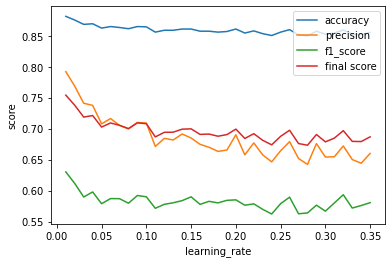

In [52]:
plt.plot(learning_rate, acc, label='accuracy')
plt.plot(learning_rate, prec, label='precision')
plt.plot(learning_rate, F1, label='f1_score')
plt.plot(learning_rate, final_score, label='final score')
plt.legend(loc = "best")
plt.xlabel('learning_rate')
plt.ylabel('score')

In [53]:
(final_score.index(max(final_score))+1)*0.01

0.01

learning_rate 選擇0.01

In [54]:
cbc = CatBoostClassifier(learning_rate=0.01)
cbc.fit(x_train,y_train)

0:	learn: 0.6848267	total: 8.37ms	remaining: 8.36s
1:	learn: 0.6766450	total: 16.6ms	remaining: 8.27s
2:	learn: 0.6689526	total: 25.7ms	remaining: 8.54s
3:	learn: 0.6618332	total: 42.8ms	remaining: 10.7s
4:	learn: 0.6546889	total: 54.9ms	remaining: 10.9s
5:	learn: 0.6474082	total: 60.3ms	remaining: 9.98s
6:	learn: 0.6403710	total: 66.4ms	remaining: 9.41s
7:	learn: 0.6332349	total: 74.2ms	remaining: 9.2s
8:	learn: 0.6281602	total: 81.9ms	remaining: 9.02s
9:	learn: 0.6216931	total: 89.5ms	remaining: 8.86s
10:	learn: 0.6151835	total: 99.1ms	remaining: 8.91s
11:	learn: 0.6087911	total: 107ms	remaining: 8.8s
12:	learn: 0.6028407	total: 115ms	remaining: 8.7s
13:	learn: 0.5974351	total: 119ms	remaining: 8.39s
14:	learn: 0.5930108	total: 127ms	remaining: 8.33s
15:	learn: 0.5883369	total: 134ms	remaining: 8.24s
16:	learn: 0.5829744	total: 143ms	remaining: 8.27s
17:	learn: 0.5776466	total: 150ms	remaining: 8.17s
18:	learn: 0.5722691	total: 155ms	remaining: 7.98s
19:	learn: 0.5667080	total: 159ms

166:	learn: 0.3529253	total: 1.24s	remaining: 6.2s
167:	learn: 0.3525386	total: 1.25s	remaining: 6.19s
168:	learn: 0.3522085	total: 1.26s	remaining: 6.18s
169:	learn: 0.3519371	total: 1.26s	remaining: 6.17s
170:	learn: 0.3516925	total: 1.27s	remaining: 6.17s
171:	learn: 0.3513584	total: 1.28s	remaining: 6.16s
172:	learn: 0.3510120	total: 1.29s	remaining: 6.15s
173:	learn: 0.3508084	total: 1.3s	remaining: 6.19s
174:	learn: 0.3504683	total: 1.31s	remaining: 6.18s
175:	learn: 0.3502705	total: 1.32s	remaining: 6.17s
176:	learn: 0.3498949	total: 1.32s	remaining: 6.15s
177:	learn: 0.3494829	total: 1.33s	remaining: 6.16s
178:	learn: 0.3491514	total: 1.34s	remaining: 6.14s
179:	learn: 0.3488998	total: 1.34s	remaining: 6.12s
180:	learn: 0.3485127	total: 1.35s	remaining: 6.09s
181:	learn: 0.3482608	total: 1.35s	remaining: 6.09s
182:	learn: 0.3478801	total: 1.36s	remaining: 6.08s
183:	learn: 0.3476111	total: 1.37s	remaining: 6.06s
184:	learn: 0.3473668	total: 1.37s	remaining: 6.04s
185:	learn: 0.

340:	learn: 0.3246136	total: 2.3s	remaining: 4.45s
341:	learn: 0.3245048	total: 2.31s	remaining: 4.45s
342:	learn: 0.3244635	total: 2.32s	remaining: 4.45s
343:	learn: 0.3244037	total: 2.33s	remaining: 4.45s
344:	learn: 0.3243370	total: 2.34s	remaining: 4.44s
345:	learn: 0.3242224	total: 2.35s	remaining: 4.44s
346:	learn: 0.3241007	total: 2.35s	remaining: 4.43s
347:	learn: 0.3240326	total: 2.37s	remaining: 4.43s
348:	learn: 0.3239196	total: 2.38s	remaining: 4.44s
349:	learn: 0.3238220	total: 2.39s	remaining: 4.43s
350:	learn: 0.3236974	total: 2.4s	remaining: 4.44s
351:	learn: 0.3235728	total: 2.41s	remaining: 4.44s
352:	learn: 0.3235292	total: 2.42s	remaining: 4.43s
353:	learn: 0.3234442	total: 2.43s	remaining: 4.43s
354:	learn: 0.3233442	total: 2.44s	remaining: 4.43s
355:	learn: 0.3232350	total: 2.45s	remaining: 4.43s
356:	learn: 0.3231115	total: 2.46s	remaining: 4.43s
357:	learn: 0.3229790	total: 2.47s	remaining: 4.42s
358:	learn: 0.3228875	total: 2.47s	remaining: 4.41s
359:	learn: 0.

500:	learn: 0.3121127	total: 3.36s	remaining: 3.35s
501:	learn: 0.3120532	total: 3.37s	remaining: 3.34s
502:	learn: 0.3119570	total: 3.37s	remaining: 3.33s
503:	learn: 0.3118664	total: 3.38s	remaining: 3.32s
504:	learn: 0.3117798	total: 3.38s	remaining: 3.31s
505:	learn: 0.3117472	total: 3.39s	remaining: 3.31s
506:	learn: 0.3116618	total: 3.4s	remaining: 3.3s
507:	learn: 0.3115874	total: 3.4s	remaining: 3.29s
508:	learn: 0.3115088	total: 3.4s	remaining: 3.29s
509:	learn: 0.3114944	total: 3.41s	remaining: 3.28s
510:	learn: 0.3114291	total: 3.42s	remaining: 3.27s
511:	learn: 0.3113697	total: 3.43s	remaining: 3.27s
512:	learn: 0.3112670	total: 3.43s	remaining: 3.26s
513:	learn: 0.3112031	total: 3.44s	remaining: 3.25s
514:	learn: 0.3111474	total: 3.45s	remaining: 3.25s
515:	learn: 0.3110820	total: 3.45s	remaining: 3.24s
516:	learn: 0.3109728	total: 3.46s	remaining: 3.23s
517:	learn: 0.3109105	total: 3.46s	remaining: 3.22s
518:	learn: 0.3108820	total: 3.47s	remaining: 3.22s
519:	learn: 0.31

661:	learn: 0.3025385	total: 4.4s	remaining: 2.25s
662:	learn: 0.3025117	total: 4.41s	remaining: 2.24s
663:	learn: 0.3024509	total: 4.42s	remaining: 2.24s
664:	learn: 0.3023861	total: 4.43s	remaining: 2.23s
665:	learn: 0.3022773	total: 4.44s	remaining: 2.22s
666:	learn: 0.3021853	total: 4.44s	remaining: 2.22s
667:	learn: 0.3021051	total: 4.45s	remaining: 2.21s
668:	learn: 0.3020340	total: 4.46s	remaining: 2.21s
669:	learn: 0.3019671	total: 4.46s	remaining: 2.2s
670:	learn: 0.3018991	total: 4.47s	remaining: 2.19s
671:	learn: 0.3018452	total: 4.48s	remaining: 2.19s
672:	learn: 0.3017687	total: 4.49s	remaining: 2.18s
673:	learn: 0.3016999	total: 4.49s	remaining: 2.17s
674:	learn: 0.3016341	total: 4.5s	remaining: 2.17s
675:	learn: 0.3015835	total: 4.5s	remaining: 2.16s
676:	learn: 0.3015802	total: 4.51s	remaining: 2.15s
677:	learn: 0.3015313	total: 4.51s	remaining: 2.14s
678:	learn: 0.3014450	total: 4.52s	remaining: 2.14s
679:	learn: 0.3014117	total: 4.52s	remaining: 2.13s
680:	learn: 0.30

822:	learn: 0.2935926	total: 5.47s	remaining: 1.18s
823:	learn: 0.2935214	total: 5.48s	remaining: 1.17s
824:	learn: 0.2934851	total: 5.49s	remaining: 1.16s
825:	learn: 0.2934339	total: 5.49s	remaining: 1.16s
826:	learn: 0.2933748	total: 5.5s	remaining: 1.15s
827:	learn: 0.2933055	total: 5.5s	remaining: 1.14s
828:	learn: 0.2932371	total: 5.51s	remaining: 1.14s
829:	learn: 0.2931950	total: 5.52s	remaining: 1.13s
830:	learn: 0.2931472	total: 5.53s	remaining: 1.12s
831:	learn: 0.2930948	total: 5.53s	remaining: 1.12s
832:	learn: 0.2930653	total: 5.54s	remaining: 1.11s
833:	learn: 0.2930151	total: 5.55s	remaining: 1.1s
834:	learn: 0.2929442	total: 5.56s	remaining: 1.1s
835:	learn: 0.2929185	total: 5.57s	remaining: 1.09s
836:	learn: 0.2928807	total: 5.58s	remaining: 1.09s
837:	learn: 0.2927709	total: 5.59s	remaining: 1.08s
838:	learn: 0.2927244	total: 5.6s	remaining: 1.07s
839:	learn: 0.2926880	total: 5.61s	remaining: 1.07s
840:	learn: 0.2925896	total: 5.62s	remaining: 1.06s
841:	learn: 0.292

In [55]:
pred=cbc.predict(x_test)
print('Train Result of CatBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of CatBoost:
Accuracy Score: 88.15%
Precision Score: 79.22%
F1 score: 63.03%


###  max_depth

In [56]:
acc = []
prec = []
F1 = []
for i in range(8):
    cbc = CatBoostClassifier(learning_rate=0.01, max_depth=i+3)
    cbc.fit(x_train,y_train)
    
    pred=cbc.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    F1.append(f1_score(y_test, pred))

0:	learn: 0.6857741	total: 4.62ms	remaining: 4.61s
1:	learn: 0.6785850	total: 7.24ms	remaining: 3.61s
2:	learn: 0.6722357	total: 15.4ms	remaining: 5.13s
3:	learn: 0.6651565	total: 19.7ms	remaining: 4.9s
4:	learn: 0.6597867	total: 22.6ms	remaining: 4.5s
5:	learn: 0.6550767	total: 25.4ms	remaining: 4.2s
6:	learn: 0.6493758	total: 27.8ms	remaining: 3.94s
7:	learn: 0.6438801	total: 30.3ms	remaining: 3.75s
8:	learn: 0.6386312	total: 35.1ms	remaining: 3.86s
9:	learn: 0.6325847	total: 42.4ms	remaining: 4.2s
10:	learn: 0.6266923	total: 48ms	remaining: 4.32s
11:	learn: 0.6220365	total: 50.9ms	remaining: 4.19s
12:	learn: 0.6162732	total: 55.6ms	remaining: 4.22s
13:	learn: 0.6118735	total: 58.2ms	remaining: 4.09s
14:	learn: 0.6064860	total: 60.9ms	remaining: 4s
15:	learn: 0.6019875	total: 63.9ms	remaining: 3.93s
16:	learn: 0.5970098	total: 68.8ms	remaining: 3.98s
17:	learn: 0.5924574	total: 73ms	remaining: 3.98s
18:	learn: 0.5878626	total: 75.5ms	remaining: 3.9s
19:	learn: 0.5836544	total: 78.2ms

160:	learn: 0.3833234	total: 667ms	remaining: 3.48s
161:	learn: 0.3830157	total: 674ms	remaining: 3.49s
162:	learn: 0.3826395	total: 679ms	remaining: 3.48s
163:	learn: 0.3823378	total: 682ms	remaining: 3.48s
164:	learn: 0.3820844	total: 686ms	remaining: 3.47s
165:	learn: 0.3817428	total: 690ms	remaining: 3.47s
166:	learn: 0.3813174	total: 692ms	remaining: 3.45s
167:	learn: 0.3809976	total: 696ms	remaining: 3.45s
168:	learn: 0.3807098	total: 700ms	remaining: 3.44s
169:	learn: 0.3804337	total: 703ms	remaining: 3.43s
170:	learn: 0.3801192	total: 711ms	remaining: 3.45s
171:	learn: 0.3797932	total: 714ms	remaining: 3.44s
172:	learn: 0.3795427	total: 716ms	remaining: 3.42s
173:	learn: 0.3790767	total: 719ms	remaining: 3.41s
174:	learn: 0.3787538	total: 721ms	remaining: 3.4s
175:	learn: 0.3784688	total: 724ms	remaining: 3.39s
176:	learn: 0.3782652	total: 728ms	remaining: 3.38s
177:	learn: 0.3779080	total: 730ms	remaining: 3.37s
178:	learn: 0.3776444	total: 736ms	remaining: 3.37s
179:	learn: 0

330:	learn: 0.3516964	total: 1.33s	remaining: 2.7s
331:	learn: 0.3516721	total: 1.34s	remaining: 2.69s
332:	learn: 0.3515869	total: 1.34s	remaining: 2.69s
333:	learn: 0.3514797	total: 1.35s	remaining: 2.68s
334:	learn: 0.3514068	total: 1.35s	remaining: 2.68s
335:	learn: 0.3513234	total: 1.35s	remaining: 2.67s
336:	learn: 0.3512195	total: 1.36s	remaining: 2.67s
337:	learn: 0.3511272	total: 1.36s	remaining: 2.67s
338:	learn: 0.3509988	total: 1.36s	remaining: 2.66s
339:	learn: 0.3508982	total: 1.37s	remaining: 2.66s
340:	learn: 0.3507857	total: 1.37s	remaining: 2.65s
341:	learn: 0.3507056	total: 1.37s	remaining: 2.64s
342:	learn: 0.3506347	total: 1.38s	remaining: 2.63s
343:	learn: 0.3505704	total: 1.38s	remaining: 2.63s
344:	learn: 0.3505027	total: 1.38s	remaining: 2.62s
345:	learn: 0.3504096	total: 1.38s	remaining: 2.61s
346:	learn: 0.3503164	total: 1.39s	remaining: 2.62s
347:	learn: 0.3502333	total: 1.39s	remaining: 2.61s
348:	learn: 0.3501266	total: 1.4s	remaining: 2.61s
349:	learn: 0.

499:	learn: 0.3390109	total: 2s	remaining: 2s
500:	learn: 0.3389527	total: 2s	remaining: 1.99s
501:	learn: 0.3389203	total: 2s	remaining: 1.99s
502:	learn: 0.3388466	total: 2.01s	remaining: 1.98s
503:	learn: 0.3388049	total: 2.01s	remaining: 1.98s
504:	learn: 0.3387349	total: 2.02s	remaining: 1.98s
505:	learn: 0.3387216	total: 2.02s	remaining: 1.97s
506:	learn: 0.3386948	total: 2.02s	remaining: 1.97s
507:	learn: 0.3386725	total: 2.03s	remaining: 1.96s
508:	learn: 0.3386463	total: 2.03s	remaining: 1.96s
509:	learn: 0.3386179	total: 2.04s	remaining: 1.96s
510:	learn: 0.3385873	total: 2.04s	remaining: 1.96s
511:	learn: 0.3385592	total: 2.05s	remaining: 1.95s
512:	learn: 0.3385229	total: 2.05s	remaining: 1.95s
513:	learn: 0.3384825	total: 2.06s	remaining: 1.95s
514:	learn: 0.3384670	total: 2.06s	remaining: 1.94s
515:	learn: 0.3384159	total: 2.06s	remaining: 1.94s
516:	learn: 0.3383423	total: 2.07s	remaining: 1.93s
517:	learn: 0.3382974	total: 2.07s	remaining: 1.93s
518:	learn: 0.3382535	to

670:	learn: 0.3324339	total: 2.79s	remaining: 1.36s
671:	learn: 0.3324187	total: 2.82s	remaining: 1.38s
672:	learn: 0.3323534	total: 2.83s	remaining: 1.38s
673:	learn: 0.3322646	total: 2.84s	remaining: 1.37s
674:	learn: 0.3322434	total: 2.84s	remaining: 1.37s
675:	learn: 0.3322234	total: 2.85s	remaining: 1.36s
676:	learn: 0.3321963	total: 2.85s	remaining: 1.36s
677:	learn: 0.3321617	total: 2.86s	remaining: 1.36s
678:	learn: 0.3320794	total: 2.88s	remaining: 1.36s
679:	learn: 0.3320605	total: 2.88s	remaining: 1.36s
680:	learn: 0.3320363	total: 2.89s	remaining: 1.35s
681:	learn: 0.3320234	total: 2.89s	remaining: 1.35s
682:	learn: 0.3320035	total: 2.9s	remaining: 1.34s
683:	learn: 0.3319883	total: 2.9s	remaining: 1.34s
684:	learn: 0.3319672	total: 2.9s	remaining: 1.33s
685:	learn: 0.3319466	total: 2.91s	remaining: 1.33s
686:	learn: 0.3319002	total: 2.91s	remaining: 1.33s
687:	learn: 0.3318704	total: 2.92s	remaining: 1.32s
688:	learn: 0.3318518	total: 2.92s	remaining: 1.32s
689:	learn: 0.3

836:	learn: 0.3279794	total: 3.65s	remaining: 710ms
837:	learn: 0.3279113	total: 3.65s	remaining: 706ms
838:	learn: 0.3278977	total: 3.65s	remaining: 701ms
839:	learn: 0.3278755	total: 3.66s	remaining: 697ms
840:	learn: 0.3278086	total: 3.66s	remaining: 692ms
841:	learn: 0.3277917	total: 3.67s	remaining: 688ms
842:	learn: 0.3277584	total: 3.67s	remaining: 684ms
843:	learn: 0.3277458	total: 3.68s	remaining: 680ms
844:	learn: 0.3277294	total: 3.68s	remaining: 675ms
845:	learn: 0.3276963	total: 3.69s	remaining: 671ms
846:	learn: 0.3276695	total: 3.69s	remaining: 666ms
847:	learn: 0.3276522	total: 3.69s	remaining: 662ms
848:	learn: 0.3276369	total: 3.7s	remaining: 658ms
849:	learn: 0.3275918	total: 3.7s	remaining: 654ms
850:	learn: 0.3275778	total: 3.71s	remaining: 649ms
851:	learn: 0.3275494	total: 3.71s	remaining: 645ms
852:	learn: 0.3275266	total: 3.72s	remaining: 641ms
853:	learn: 0.3274992	total: 3.72s	remaining: 636ms
854:	learn: 0.3274785	total: 3.73s	remaining: 632ms
855:	learn: 0.

999:	learn: 0.3239586	total: 4.59s	remaining: 0us
0:	learn: 0.6852146	total: 3.49ms	remaining: 3.48s
1:	learn: 0.6773140	total: 8.16ms	remaining: 4.07s
2:	learn: 0.6703247	total: 11.9ms	remaining: 3.97s
3:	learn: 0.6638421	total: 15.9ms	remaining: 3.95s
4:	learn: 0.6580315	total: 28.4ms	remaining: 5.65s
5:	learn: 0.6508743	total: 33.6ms	remaining: 5.56s
6:	learn: 0.6442135	total: 37.7ms	remaining: 5.34s
7:	learn: 0.6372846	total: 41.8ms	remaining: 5.18s
8:	learn: 0.6305417	total: 51ms	remaining: 5.62s
9:	learn: 0.6250574	total: 56ms	remaining: 5.54s
10:	learn: 0.6190144	total: 68.9ms	remaining: 6.19s
11:	learn: 0.6135240	total: 72.3ms	remaining: 5.96s
12:	learn: 0.6086441	total: 75.9ms	remaining: 5.76s
13:	learn: 0.6029039	total: 82.8ms	remaining: 5.83s
14:	learn: 0.5979889	total: 86.4ms	remaining: 5.67s
15:	learn: 0.5926750	total: 92ms	remaining: 5.66s
16:	learn: 0.5870818	total: 95.9ms	remaining: 5.55s
17:	learn: 0.5819174	total: 114ms	remaining: 6.22s
18:	learn: 0.5777879	total: 127

162:	learn: 0.3702931	total: 1.03s	remaining: 5.29s
163:	learn: 0.3698159	total: 1.04s	remaining: 5.29s
164:	learn: 0.3693704	total: 1.04s	remaining: 5.27s
165:	learn: 0.3690356	total: 1.05s	remaining: 5.28s
166:	learn: 0.3687275	total: 1.06s	remaining: 5.28s
167:	learn: 0.3682061	total: 1.07s	remaining: 5.28s
168:	learn: 0.3679056	total: 1.07s	remaining: 5.28s
169:	learn: 0.3675658	total: 1.08s	remaining: 5.26s
170:	learn: 0.3672223	total: 1.09s	remaining: 5.27s
171:	learn: 0.3668687	total: 1.09s	remaining: 5.26s
172:	learn: 0.3665610	total: 1.09s	remaining: 5.24s
173:	learn: 0.3662110	total: 1.1s	remaining: 5.22s
174:	learn: 0.3657924	total: 1.1s	remaining: 5.21s
175:	learn: 0.3655247	total: 1.11s	remaining: 5.22s
176:	learn: 0.3652710	total: 1.12s	remaining: 5.21s
177:	learn: 0.3650440	total: 1.12s	remaining: 5.19s
178:	learn: 0.3646555	total: 1.13s	remaining: 5.17s
179:	learn: 0.3643495	total: 1.14s	remaining: 5.19s
180:	learn: 0.3641204	total: 1.14s	remaining: 5.18s
181:	learn: 0.

330:	learn: 0.3410899	total: 2.12s	remaining: 4.29s
331:	learn: 0.3409685	total: 2.12s	remaining: 4.28s
332:	learn: 0.3408395	total: 2.13s	remaining: 4.27s
333:	learn: 0.3407792	total: 2.14s	remaining: 4.26s
334:	learn: 0.3407240	total: 2.14s	remaining: 4.25s
335:	learn: 0.3406358	total: 2.15s	remaining: 4.24s
336:	learn: 0.3405013	total: 2.16s	remaining: 4.25s
337:	learn: 0.3404190	total: 2.17s	remaining: 4.24s
338:	learn: 0.3403466	total: 2.17s	remaining: 4.23s
339:	learn: 0.3402639	total: 2.18s	remaining: 4.22s
340:	learn: 0.3402016	total: 2.18s	remaining: 4.22s
341:	learn: 0.3400945	total: 2.19s	remaining: 4.21s
342:	learn: 0.3399934	total: 2.19s	remaining: 4.2s
343:	learn: 0.3399191	total: 2.2s	remaining: 4.19s
344:	learn: 0.3398715	total: 2.2s	remaining: 4.18s
345:	learn: 0.3397240	total: 2.21s	remaining: 4.17s
346:	learn: 0.3396661	total: 2.21s	remaining: 4.16s
347:	learn: 0.3394897	total: 2.21s	remaining: 4.15s
348:	learn: 0.3393909	total: 2.23s	remaining: 4.16s
349:	learn: 0.3

500:	learn: 0.3304853	total: 3.17s	remaining: 3.16s
501:	learn: 0.3304547	total: 3.18s	remaining: 3.15s
502:	learn: 0.3304194	total: 3.18s	remaining: 3.15s
503:	learn: 0.3303864	total: 3.19s	remaining: 3.14s
504:	learn: 0.3303556	total: 3.2s	remaining: 3.14s
505:	learn: 0.3303222	total: 3.2s	remaining: 3.13s
506:	learn: 0.3302554	total: 3.21s	remaining: 3.12s
507:	learn: 0.3302103	total: 3.21s	remaining: 3.11s
508:	learn: 0.3301780	total: 3.22s	remaining: 3.1s
509:	learn: 0.3301461	total: 3.22s	remaining: 3.1s
510:	learn: 0.3301252	total: 3.23s	remaining: 3.09s
511:	learn: 0.3300851	total: 3.24s	remaining: 3.08s
512:	learn: 0.3300496	total: 3.25s	remaining: 3.08s
513:	learn: 0.3299789	total: 3.25s	remaining: 3.08s
514:	learn: 0.3299292	total: 3.26s	remaining: 3.07s
515:	learn: 0.3299089	total: 3.27s	remaining: 3.06s
516:	learn: 0.3298543	total: 3.27s	remaining: 3.06s
517:	learn: 0.3297952	total: 3.29s	remaining: 3.06s
518:	learn: 0.3297821	total: 3.29s	remaining: 3.05s
519:	learn: 0.32

679:	learn: 0.3234439	total: 4.19s	remaining: 1.97s
680:	learn: 0.3234163	total: 4.2s	remaining: 1.97s
681:	learn: 0.3233663	total: 4.2s	remaining: 1.96s
682:	learn: 0.3233413	total: 4.21s	remaining: 1.95s
683:	learn: 0.3233143	total: 4.21s	remaining: 1.95s
684:	learn: 0.3232883	total: 4.22s	remaining: 1.94s
685:	learn: 0.3232541	total: 4.23s	remaining: 1.94s
686:	learn: 0.3232298	total: 4.24s	remaining: 1.93s
687:	learn: 0.3231971	total: 4.25s	remaining: 1.93s
688:	learn: 0.3231634	total: 4.25s	remaining: 1.92s
689:	learn: 0.3231254	total: 4.26s	remaining: 1.92s
690:	learn: 0.3230995	total: 4.27s	remaining: 1.91s
691:	learn: 0.3230640	total: 4.27s	remaining: 1.9s
692:	learn: 0.3230413	total: 4.28s	remaining: 1.9s
693:	learn: 0.3230111	total: 4.28s	remaining: 1.89s
694:	learn: 0.3229884	total: 4.29s	remaining: 1.88s
695:	learn: 0.3229688	total: 4.29s	remaining: 1.88s
696:	learn: 0.3229129	total: 4.3s	remaining: 1.87s
697:	learn: 0.3228957	total: 4.3s	remaining: 1.86s
698:	learn: 0.3228

847:	learn: 0.3180484	total: 5.08s	remaining: 910ms
848:	learn: 0.3180272	total: 5.08s	remaining: 904ms
849:	learn: 0.3180008	total: 5.09s	remaining: 898ms
850:	learn: 0.3179661	total: 5.1s	remaining: 893ms
851:	learn: 0.3179386	total: 5.11s	remaining: 887ms
852:	learn: 0.3179035	total: 5.11s	remaining: 881ms
853:	learn: 0.3178859	total: 5.12s	remaining: 875ms
854:	learn: 0.3178413	total: 5.13s	remaining: 870ms
855:	learn: 0.3178075	total: 5.13s	remaining: 864ms
856:	learn: 0.3177824	total: 5.14s	remaining: 858ms
857:	learn: 0.3177589	total: 5.15s	remaining: 852ms
858:	learn: 0.3177210	total: 5.16s	remaining: 847ms
859:	learn: 0.3176867	total: 5.17s	remaining: 842ms
860:	learn: 0.3176462	total: 5.18s	remaining: 836ms
861:	learn: 0.3176065	total: 5.19s	remaining: 831ms
862:	learn: 0.3175746	total: 5.19s	remaining: 824ms
863:	learn: 0.3175615	total: 5.2s	remaining: 819ms
864:	learn: 0.3175499	total: 5.21s	remaining: 812ms
865:	learn: 0.3175473	total: 5.21s	remaining: 806ms
866:	learn: 0.

6:	learn: 0.6440201	total: 46.7ms	remaining: 6.63s
7:	learn: 0.6370361	total: 50.4ms	remaining: 6.25s
8:	learn: 0.6309735	total: 55.5ms	remaining: 6.12s
9:	learn: 0.6246681	total: 62.3ms	remaining: 6.16s
10:	learn: 0.6189604	total: 72.7ms	remaining: 6.54s
11:	learn: 0.6136882	total: 78.5ms	remaining: 6.46s
12:	learn: 0.6077468	total: 87ms	remaining: 6.6s
13:	learn: 0.6028533	total: 91.1ms	remaining: 6.42s
14:	learn: 0.5970284	total: 94.6ms	remaining: 6.21s
15:	learn: 0.5914495	total: 118ms	remaining: 7.23s
16:	learn: 0.5856815	total: 122ms	remaining: 7.05s
17:	learn: 0.5799228	total: 127ms	remaining: 6.9s
18:	learn: 0.5750403	total: 136ms	remaining: 7s
19:	learn: 0.5700017	total: 142ms	remaining: 6.97s
20:	learn: 0.5646182	total: 149ms	remaining: 6.94s
21:	learn: 0.5602358	total: 153ms	remaining: 6.81s
22:	learn: 0.5555097	total: 159ms	remaining: 6.74s
23:	learn: 0.5519355	total: 166ms	remaining: 6.76s
24:	learn: 0.5478334	total: 170ms	remaining: 6.64s
25:	learn: 0.5433395	total: 179ms

167:	learn: 0.3591641	total: 1.09s	remaining: 5.39s
168:	learn: 0.3587110	total: 1.09s	remaining: 5.39s
169:	learn: 0.3583977	total: 1.1s	remaining: 5.37s
170:	learn: 0.3580757	total: 1.1s	remaining: 5.36s
171:	learn: 0.3578379	total: 1.11s	remaining: 5.34s
172:	learn: 0.3576348	total: 1.11s	remaining: 5.33s
173:	learn: 0.3572813	total: 1.12s	remaining: 5.31s
174:	learn: 0.3570683	total: 1.12s	remaining: 5.3s
175:	learn: 0.3567569	total: 1.13s	remaining: 5.28s
176:	learn: 0.3564252	total: 1.13s	remaining: 5.26s
177:	learn: 0.3560707	total: 1.14s	remaining: 5.25s
178:	learn: 0.3558610	total: 1.15s	remaining: 5.26s
179:	learn: 0.3555985	total: 1.15s	remaining: 5.24s
180:	learn: 0.3553547	total: 1.15s	remaining: 5.22s
181:	learn: 0.3551697	total: 1.16s	remaining: 5.21s
182:	learn: 0.3547996	total: 1.16s	remaining: 5.2s
183:	learn: 0.3543680	total: 1.17s	remaining: 5.2s
184:	learn: 0.3541269	total: 1.18s	remaining: 5.19s
185:	learn: 0.3538924	total: 1.18s	remaining: 5.18s
186:	learn: 0.353

334:	learn: 0.3324137	total: 1.9s	remaining: 3.77s
335:	learn: 0.3322794	total: 1.91s	remaining: 3.77s
336:	learn: 0.3322083	total: 1.91s	remaining: 3.76s
337:	learn: 0.3321071	total: 1.92s	remaining: 3.75s
338:	learn: 0.3320573	total: 1.92s	remaining: 3.74s
339:	learn: 0.3319325	total: 1.92s	remaining: 3.73s
340:	learn: 0.3318812	total: 1.93s	remaining: 3.72s
341:	learn: 0.3318332	total: 1.93s	remaining: 3.72s
342:	learn: 0.3317480	total: 1.94s	remaining: 3.72s
343:	learn: 0.3316595	total: 1.95s	remaining: 3.71s
344:	learn: 0.3316073	total: 1.95s	remaining: 3.7s
345:	learn: 0.3315085	total: 1.95s	remaining: 3.69s
346:	learn: 0.3314646	total: 1.96s	remaining: 3.68s
347:	learn: 0.3314165	total: 1.96s	remaining: 3.67s
348:	learn: 0.3313708	total: 1.97s	remaining: 3.67s
349:	learn: 0.3312381	total: 1.97s	remaining: 3.67s
350:	learn: 0.3311800	total: 1.98s	remaining: 3.66s
351:	learn: 0.3311440	total: 1.98s	remaining: 3.65s
352:	learn: 0.3310297	total: 1.99s	remaining: 3.64s
353:	learn: 0.

513:	learn: 0.3211275	total: 2.78s	remaining: 2.63s
514:	learn: 0.3211023	total: 2.78s	remaining: 2.62s
515:	learn: 0.3210623	total: 2.79s	remaining: 2.61s
516:	learn: 0.3210268	total: 2.79s	remaining: 2.61s
517:	learn: 0.3209654	total: 2.8s	remaining: 2.6s
518:	learn: 0.3209317	total: 2.8s	remaining: 2.6s
519:	learn: 0.3209141	total: 2.81s	remaining: 2.59s
520:	learn: 0.3208568	total: 2.81s	remaining: 2.59s
521:	learn: 0.3208201	total: 2.82s	remaining: 2.58s
522:	learn: 0.3207658	total: 2.82s	remaining: 2.58s
523:	learn: 0.3207261	total: 2.83s	remaining: 2.57s
524:	learn: 0.3206922	total: 2.84s	remaining: 2.57s
525:	learn: 0.3206543	total: 2.84s	remaining: 2.56s
526:	learn: 0.3205505	total: 2.84s	remaining: 2.55s
527:	learn: 0.3205090	total: 2.85s	remaining: 2.55s
528:	learn: 0.3204141	total: 2.85s	remaining: 2.54s
529:	learn: 0.3203183	total: 2.86s	remaining: 2.54s
530:	learn: 0.3202713	total: 2.87s	remaining: 2.53s
531:	learn: 0.3202160	total: 2.87s	remaining: 2.53s
532:	learn: 0.32

673:	learn: 0.3133957	total: 3.64s	remaining: 1.76s
674:	learn: 0.3133381	total: 3.65s	remaining: 1.75s
675:	learn: 0.3132962	total: 3.65s	remaining: 1.75s
676:	learn: 0.3132759	total: 3.66s	remaining: 1.75s
677:	learn: 0.3132570	total: 3.66s	remaining: 1.74s
678:	learn: 0.3132530	total: 3.67s	remaining: 1.74s
679:	learn: 0.3132198	total: 3.68s	remaining: 1.73s
680:	learn: 0.3131735	total: 3.68s	remaining: 1.72s
681:	learn: 0.3131196	total: 3.69s	remaining: 1.72s
682:	learn: 0.3130464	total: 3.69s	remaining: 1.71s
683:	learn: 0.3130248	total: 3.7s	remaining: 1.71s
684:	learn: 0.3129623	total: 3.7s	remaining: 1.7s
685:	learn: 0.3129348	total: 3.71s	remaining: 1.7s
686:	learn: 0.3128914	total: 3.71s	remaining: 1.69s
687:	learn: 0.3128457	total: 3.72s	remaining: 1.69s
688:	learn: 0.3128109	total: 3.73s	remaining: 1.68s
689:	learn: 0.3127732	total: 3.73s	remaining: 1.68s
690:	learn: 0.3127393	total: 3.74s	remaining: 1.67s
691:	learn: 0.3127031	total: 3.75s	remaining: 1.67s
692:	learn: 0.31

840:	learn: 0.3065686	total: 4.65s	remaining: 880ms
841:	learn: 0.3065355	total: 4.66s	remaining: 874ms
842:	learn: 0.3065046	total: 4.67s	remaining: 869ms
843:	learn: 0.3064617	total: 4.67s	remaining: 863ms
844:	learn: 0.3064262	total: 4.68s	remaining: 858ms
845:	learn: 0.3063970	total: 4.68s	remaining: 853ms
846:	learn: 0.3063627	total: 4.69s	remaining: 847ms
847:	learn: 0.3063138	total: 4.69s	remaining: 842ms
848:	learn: 0.3063042	total: 4.7s	remaining: 836ms
849:	learn: 0.3062503	total: 4.71s	remaining: 831ms
850:	learn: 0.3062099	total: 4.71s	remaining: 825ms
851:	learn: 0.3061724	total: 4.71s	remaining: 819ms
852:	learn: 0.3061261	total: 4.72s	remaining: 813ms
853:	learn: 0.3060766	total: 4.74s	remaining: 810ms
854:	learn: 0.3060336	total: 4.75s	remaining: 805ms
855:	learn: 0.3060252	total: 4.75s	remaining: 800ms
856:	learn: 0.3059976	total: 4.76s	remaining: 795ms
857:	learn: 0.3059532	total: 4.77s	remaining: 790ms
858:	learn: 0.3059223	total: 4.78s	remaining: 784ms
859:	learn: 0

999:	learn: 0.3002831	total: 5.88s	remaining: 0us
0:	learn: 0.6848267	total: 13.9ms	remaining: 13.9s
1:	learn: 0.6766450	total: 27.6ms	remaining: 13.8s
2:	learn: 0.6689526	total: 37.9ms	remaining: 12.6s
3:	learn: 0.6618332	total: 48.9ms	remaining: 12.2s
4:	learn: 0.6546889	total: 60ms	remaining: 11.9s
5:	learn: 0.6474082	total: 73.9ms	remaining: 12.2s
6:	learn: 0.6403710	total: 80.9ms	remaining: 11.5s
7:	learn: 0.6332349	total: 91.7ms	remaining: 11.4s
8:	learn: 0.6281602	total: 99.5ms	remaining: 11s
9:	learn: 0.6216931	total: 111ms	remaining: 11s
10:	learn: 0.6151835	total: 121ms	remaining: 10.9s
11:	learn: 0.6087911	total: 129ms	remaining: 10.6s
12:	learn: 0.6028407	total: 150ms	remaining: 11.4s
13:	learn: 0.5974351	total: 161ms	remaining: 11.3s
14:	learn: 0.5930108	total: 171ms	remaining: 11.2s
15:	learn: 0.5883369	total: 183ms	remaining: 11.3s
16:	learn: 0.5829744	total: 198ms	remaining: 11.4s
17:	learn: 0.5776466	total: 217ms	remaining: 11.9s
18:	learn: 0.5722691	total: 227ms	remai

162:	learn: 0.3542822	total: 1.98s	remaining: 10.2s
163:	learn: 0.3539887	total: 2s	remaining: 10.2s
164:	learn: 0.3535219	total: 2.02s	remaining: 10.2s
165:	learn: 0.3532329	total: 2.03s	remaining: 10.2s
166:	learn: 0.3529253	total: 2.04s	remaining: 10.2s
167:	learn: 0.3525386	total: 2.05s	remaining: 10.1s
168:	learn: 0.3522085	total: 2.06s	remaining: 10.1s
169:	learn: 0.3519371	total: 2.07s	remaining: 10.1s
170:	learn: 0.3516925	total: 2.08s	remaining: 10.1s
171:	learn: 0.3513584	total: 2.1s	remaining: 10.1s
172:	learn: 0.3510120	total: 2.1s	remaining: 10.1s
173:	learn: 0.3508084	total: 2.11s	remaining: 10s
174:	learn: 0.3504683	total: 2.13s	remaining: 10s
175:	learn: 0.3502705	total: 2.13s	remaining: 9.97s
176:	learn: 0.3498949	total: 2.14s	remaining: 9.95s
177:	learn: 0.3494829	total: 2.15s	remaining: 9.92s
178:	learn: 0.3491514	total: 2.16s	remaining: 9.9s
179:	learn: 0.3488998	total: 2.16s	remaining: 9.86s
180:	learn: 0.3485127	total: 2.18s	remaining: 9.87s
181:	learn: 0.3482608	

338:	learn: 0.3247671	total: 3.07s	remaining: 5.98s
339:	learn: 0.3246781	total: 3.08s	remaining: 5.97s
340:	learn: 0.3246136	total: 3.09s	remaining: 5.96s
341:	learn: 0.3245048	total: 3.1s	remaining: 5.96s
342:	learn: 0.3244635	total: 3.11s	remaining: 5.96s
343:	learn: 0.3244037	total: 3.13s	remaining: 5.96s
344:	learn: 0.3243370	total: 3.15s	remaining: 5.97s
345:	learn: 0.3242224	total: 3.16s	remaining: 5.97s
346:	learn: 0.3241007	total: 3.19s	remaining: 6s
347:	learn: 0.3240326	total: 3.2s	remaining: 6s
348:	learn: 0.3239196	total: 3.21s	remaining: 5.99s
349:	learn: 0.3238220	total: 3.25s	remaining: 6.04s
350:	learn: 0.3236974	total: 3.28s	remaining: 6.07s
351:	learn: 0.3235728	total: 3.29s	remaining: 6.06s
352:	learn: 0.3235292	total: 3.3s	remaining: 6.05s
353:	learn: 0.3234442	total: 3.34s	remaining: 6.09s
354:	learn: 0.3233442	total: 3.36s	remaining: 6.1s
355:	learn: 0.3232350	total: 3.4s	remaining: 6.14s
356:	learn: 0.3231115	total: 3.42s	remaining: 6.17s
357:	learn: 0.3229790	t

507:	learn: 0.3115874	total: 5.08s	remaining: 4.92s
508:	learn: 0.3115088	total: 5.09s	remaining: 4.91s
509:	learn: 0.3114944	total: 5.09s	remaining: 4.89s
510:	learn: 0.3114291	total: 5.1s	remaining: 4.88s
511:	learn: 0.3113697	total: 5.11s	remaining: 4.87s
512:	learn: 0.3112670	total: 5.11s	remaining: 4.85s
513:	learn: 0.3112031	total: 5.12s	remaining: 4.84s
514:	learn: 0.3111474	total: 5.13s	remaining: 4.83s
515:	learn: 0.3110820	total: 5.14s	remaining: 4.82s
516:	learn: 0.3109728	total: 5.15s	remaining: 4.81s
517:	learn: 0.3109105	total: 5.16s	remaining: 4.8s
518:	learn: 0.3108820	total: 5.17s	remaining: 4.79s
519:	learn: 0.3108294	total: 5.17s	remaining: 4.78s
520:	learn: 0.3107321	total: 5.18s	remaining: 4.76s
521:	learn: 0.3106628	total: 5.18s	remaining: 4.75s
522:	learn: 0.3105669	total: 5.19s	remaining: 4.73s
523:	learn: 0.3105145	total: 5.19s	remaining: 4.72s
524:	learn: 0.3104789	total: 5.2s	remaining: 4.71s
525:	learn: 0.3103758	total: 5.21s	remaining: 4.69s
526:	learn: 0.3

676:	learn: 0.3015802	total: 6.48s	remaining: 3.09s
677:	learn: 0.3015313	total: 6.48s	remaining: 3.08s
678:	learn: 0.3014450	total: 6.49s	remaining: 3.07s
679:	learn: 0.3014117	total: 6.51s	remaining: 3.06s
680:	learn: 0.3013366	total: 6.52s	remaining: 3.05s
681:	learn: 0.3012590	total: 6.52s	remaining: 3.04s
682:	learn: 0.3012115	total: 6.53s	remaining: 3.03s
683:	learn: 0.3011271	total: 6.54s	remaining: 3.02s
684:	learn: 0.3010710	total: 6.55s	remaining: 3.01s
685:	learn: 0.3009976	total: 6.55s	remaining: 3s
686:	learn: 0.3009392	total: 6.57s	remaining: 2.99s
687:	learn: 0.3009137	total: 6.57s	remaining: 2.98s
688:	learn: 0.3008568	total: 6.58s	remaining: 2.97s
689:	learn: 0.3008349	total: 6.58s	remaining: 2.96s
690:	learn: 0.3007967	total: 6.59s	remaining: 2.95s
691:	learn: 0.3007427	total: 6.61s	remaining: 2.94s
692:	learn: 0.3006845	total: 6.61s	remaining: 2.93s
693:	learn: 0.3006396	total: 6.63s	remaining: 2.92s
694:	learn: 0.3005302	total: 6.64s	remaining: 2.91s
695:	learn: 0.3

836:	learn: 0.2928807	total: 7.7s	remaining: 1.5s
837:	learn: 0.2927709	total: 7.71s	remaining: 1.49s
838:	learn: 0.2927244	total: 7.71s	remaining: 1.48s
839:	learn: 0.2926880	total: 7.72s	remaining: 1.47s
840:	learn: 0.2925896	total: 7.72s	remaining: 1.46s
841:	learn: 0.2925622	total: 7.73s	remaining: 1.45s
842:	learn: 0.2925197	total: 7.73s	remaining: 1.44s
843:	learn: 0.2924512	total: 7.74s	remaining: 1.43s
844:	learn: 0.2923991	total: 7.75s	remaining: 1.42s
845:	learn: 0.2923525	total: 7.76s	remaining: 1.41s
846:	learn: 0.2922917	total: 7.76s	remaining: 1.4s
847:	learn: 0.2922522	total: 7.78s	remaining: 1.39s
848:	learn: 0.2922163	total: 7.78s	remaining: 1.38s
849:	learn: 0.2921426	total: 7.79s	remaining: 1.37s
850:	learn: 0.2920906	total: 7.79s	remaining: 1.36s
851:	learn: 0.2920055	total: 7.8s	remaining: 1.35s
852:	learn: 0.2919583	total: 7.81s	remaining: 1.34s
853:	learn: 0.2919020	total: 7.81s	remaining: 1.33s
854:	learn: 0.2918520	total: 7.82s	remaining: 1.32s
855:	learn: 0.29

999:	learn: 0.2841251	total: 8.93s	remaining: 0us
0:	learn: 0.6848240	total: 12.5ms	remaining: 12.5s
1:	learn: 0.6767788	total: 18.8ms	remaining: 9.37s
2:	learn: 0.6691471	total: 30.2ms	remaining: 10.1s
3:	learn: 0.6616779	total: 36.6ms	remaining: 9.12s
4:	learn: 0.6539102	total: 43.7ms	remaining: 8.7s
5:	learn: 0.6467498	total: 49.2ms	remaining: 8.14s
6:	learn: 0.6394739	total: 59.7ms	remaining: 8.46s
7:	learn: 0.6338075	total: 69.2ms	remaining: 8.58s
8:	learn: 0.6272463	total: 75.9ms	remaining: 8.36s
9:	learn: 0.6205425	total: 84.4ms	remaining: 8.36s
10:	learn: 0.6136685	total: 97.1ms	remaining: 8.73s
11:	learn: 0.6074041	total: 104ms	remaining: 8.58s
12:	learn: 0.6012298	total: 110ms	remaining: 8.36s
13:	learn: 0.5954354	total: 125ms	remaining: 8.77s
14:	learn: 0.5895618	total: 134ms	remaining: 8.77s
15:	learn: 0.5833722	total: 141ms	remaining: 8.66s
16:	learn: 0.5771529	total: 153ms	remaining: 8.84s
17:	learn: 0.5728485	total: 161ms	remaining: 8.81s
18:	learn: 0.5674897	total: 173m

161:	learn: 0.3446488	total: 1.97s	remaining: 10.2s
162:	learn: 0.3443022	total: 1.97s	remaining: 10.1s
163:	learn: 0.3439124	total: 1.98s	remaining: 10.1s
164:	learn: 0.3434729	total: 1.99s	remaining: 10.1s
165:	learn: 0.3431140	total: 2.02s	remaining: 10.1s
166:	learn: 0.3427763	total: 2.02s	remaining: 10.1s
167:	learn: 0.3425431	total: 2.03s	remaining: 10.1s
168:	learn: 0.3423366	total: 2.07s	remaining: 10.2s
169:	learn: 0.3421550	total: 2.08s	remaining: 10.1s
170:	learn: 0.3419147	total: 2.09s	remaining: 10.1s
171:	learn: 0.3416677	total: 2.09s	remaining: 10.1s
172:	learn: 0.3413401	total: 2.1s	remaining: 10s
173:	learn: 0.3410117	total: 2.13s	remaining: 10.1s
174:	learn: 0.3407362	total: 2.15s	remaining: 10.1s
175:	learn: 0.3404681	total: 2.18s	remaining: 10.2s
176:	learn: 0.3401492	total: 2.19s	remaining: 10.2s
177:	learn: 0.3398176	total: 2.22s	remaining: 10.3s
178:	learn: 0.3395467	total: 2.23s	remaining: 10.3s
179:	learn: 0.3391506	total: 2.24s	remaining: 10.2s
180:	learn: 0.3

326:	learn: 0.3143082	total: 4.02s	remaining: 8.27s
327:	learn: 0.3142151	total: 4.03s	remaining: 8.25s
328:	learn: 0.3140943	total: 4.04s	remaining: 8.23s
329:	learn: 0.3140166	total: 4.06s	remaining: 8.24s
330:	learn: 0.3138735	total: 4.08s	remaining: 8.24s
331:	learn: 0.3137085	total: 4.09s	remaining: 8.22s
332:	learn: 0.3135955	total: 4.1s	remaining: 8.21s
333:	learn: 0.3135444	total: 4.11s	remaining: 8.19s
334:	learn: 0.3135296	total: 4.11s	remaining: 8.16s
335:	learn: 0.3134650	total: 4.12s	remaining: 8.14s
336:	learn: 0.3133847	total: 4.13s	remaining: 8.13s
337:	learn: 0.3132527	total: 4.14s	remaining: 8.12s
338:	learn: 0.3131713	total: 4.15s	remaining: 8.1s
339:	learn: 0.3130819	total: 4.16s	remaining: 8.08s
340:	learn: 0.3129436	total: 4.17s	remaining: 8.06s
341:	learn: 0.3127419	total: 4.19s	remaining: 8.05s
342:	learn: 0.3126406	total: 4.2s	remaining: 8.04s
343:	learn: 0.3125474	total: 4.2s	remaining: 8.02s
344:	learn: 0.3124015	total: 4.21s	remaining: 8s
345:	learn: 0.31227

488:	learn: 0.2984485	total: 5.71s	remaining: 5.97s
489:	learn: 0.2983965	total: 5.72s	remaining: 5.95s
490:	learn: 0.2982905	total: 5.73s	remaining: 5.94s
491:	learn: 0.2982017	total: 5.74s	remaining: 5.92s
492:	learn: 0.2981314	total: 5.78s	remaining: 5.94s
493:	learn: 0.2980662	total: 5.8s	remaining: 5.94s
494:	learn: 0.2979581	total: 5.81s	remaining: 5.93s
495:	learn: 0.2979008	total: 5.82s	remaining: 5.92s
496:	learn: 0.2977531	total: 5.83s	remaining: 5.9s
497:	learn: 0.2976798	total: 5.86s	remaining: 5.9s
498:	learn: 0.2976057	total: 5.87s	remaining: 5.9s
499:	learn: 0.2975156	total: 5.88s	remaining: 5.88s
500:	learn: 0.2973992	total: 5.89s	remaining: 5.87s
501:	learn: 0.2973115	total: 5.9s	remaining: 5.86s
502:	learn: 0.2972584	total: 5.92s	remaining: 5.85s
503:	learn: 0.2972070	total: 5.93s	remaining: 5.84s
504:	learn: 0.2971106	total: 5.95s	remaining: 5.83s
505:	learn: 0.2969906	total: 5.95s	remaining: 5.81s
506:	learn: 0.2969544	total: 5.97s	remaining: 5.8s
507:	learn: 0.2968

665:	learn: 0.2847952	total: 7.69s	remaining: 3.86s
666:	learn: 0.2847188	total: 7.7s	remaining: 3.84s
667:	learn: 0.2845793	total: 7.7s	remaining: 3.83s
668:	learn: 0.2845126	total: 7.71s	remaining: 3.81s
669:	learn: 0.2844565	total: 7.72s	remaining: 3.8s
670:	learn: 0.2844053	total: 7.72s	remaining: 3.79s
671:	learn: 0.2842793	total: 7.73s	remaining: 3.77s
672:	learn: 0.2842346	total: 7.74s	remaining: 3.76s
673:	learn: 0.2841239	total: 7.75s	remaining: 3.75s
674:	learn: 0.2839656	total: 7.76s	remaining: 3.73s
675:	learn: 0.2838956	total: 7.76s	remaining: 3.72s
676:	learn: 0.2838540	total: 7.77s	remaining: 3.71s
677:	learn: 0.2838311	total: 7.78s	remaining: 3.69s
678:	learn: 0.2837421	total: 7.78s	remaining: 3.68s
679:	learn: 0.2836865	total: 7.79s	remaining: 3.66s
680:	learn: 0.2835842	total: 7.8s	remaining: 3.65s
681:	learn: 0.2835355	total: 7.8s	remaining: 3.64s
682:	learn: 0.2834312	total: 7.81s	remaining: 3.63s
683:	learn: 0.2833564	total: 7.82s	remaining: 3.61s
684:	learn: 0.283

827:	learn: 0.2729498	total: 9.13s	remaining: 1.9s
828:	learn: 0.2729221	total: 9.13s	remaining: 1.88s
829:	learn: 0.2728496	total: 9.14s	remaining: 1.87s
830:	learn: 0.2728148	total: 9.15s	remaining: 1.86s
831:	learn: 0.2727680	total: 9.16s	remaining: 1.85s
832:	learn: 0.2727265	total: 9.17s	remaining: 1.84s
833:	learn: 0.2726359	total: 9.18s	remaining: 1.83s
834:	learn: 0.2725838	total: 9.19s	remaining: 1.82s
835:	learn: 0.2725169	total: 9.2s	remaining: 1.8s
836:	learn: 0.2724474	total: 9.21s	remaining: 1.79s
837:	learn: 0.2723969	total: 9.22s	remaining: 1.78s
838:	learn: 0.2723525	total: 9.22s	remaining: 1.77s
839:	learn: 0.2722466	total: 9.23s	remaining: 1.76s
840:	learn: 0.2720840	total: 9.24s	remaining: 1.75s
841:	learn: 0.2719971	total: 9.24s	remaining: 1.73s
842:	learn: 0.2719023	total: 9.26s	remaining: 1.72s
843:	learn: 0.2718272	total: 9.26s	remaining: 1.71s
844:	learn: 0.2717412	total: 9.27s	remaining: 1.7s
845:	learn: 0.2716345	total: 9.27s	remaining: 1.69s
846:	learn: 0.27

996:	learn: 0.2611364	total: 10.5s	remaining: 31.7ms
997:	learn: 0.2611091	total: 10.6s	remaining: 21.2ms
998:	learn: 0.2610506	total: 10.6s	remaining: 10.6ms
999:	learn: 0.2609638	total: 10.6s	remaining: 0us
0:	learn: 0.6847046	total: 27.7ms	remaining: 27.6s
1:	learn: 0.6766121	total: 56.4ms	remaining: 28.2s
2:	learn: 0.6683121	total: 71ms	remaining: 23.6s
3:	learn: 0.6604827	total: 85.4ms	remaining: 21.3s
4:	learn: 0.6531004	total: 96.2ms	remaining: 19.1s
5:	learn: 0.6450648	total: 105ms	remaining: 17.4s
6:	learn: 0.6379975	total: 122ms	remaining: 17.3s
7:	learn: 0.6305518	total: 133ms	remaining: 16.5s
8:	learn: 0.6230563	total: 149ms	remaining: 16.4s
9:	learn: 0.6165361	total: 160ms	remaining: 15.8s
10:	learn: 0.6100383	total: 171ms	remaining: 15.4s
11:	learn: 0.6039967	total: 184ms	remaining: 15.1s
12:	learn: 0.5980489	total: 193ms	remaining: 14.6s
13:	learn: 0.5917246	total: 212ms	remaining: 14.9s
14:	learn: 0.5859963	total: 220ms	remaining: 14.4s
15:	learn: 0.5799451	total: 253ms

159:	learn: 0.3373866	total: 2.31s	remaining: 12.2s
160:	learn: 0.3370134	total: 2.33s	remaining: 12.1s
161:	learn: 0.3366768	total: 2.34s	remaining: 12.1s
162:	learn: 0.3363686	total: 2.35s	remaining: 12.1s
163:	learn: 0.3361588	total: 2.37s	remaining: 12.1s
164:	learn: 0.3357741	total: 2.38s	remaining: 12.1s
165:	learn: 0.3353663	total: 2.39s	remaining: 12s
166:	learn: 0.3350948	total: 2.41s	remaining: 12s
167:	learn: 0.3347704	total: 2.42s	remaining: 12s
168:	learn: 0.3345006	total: 2.44s	remaining: 12s
169:	learn: 0.3341821	total: 2.45s	remaining: 12s
170:	learn: 0.3338511	total: 2.46s	remaining: 11.9s
171:	learn: 0.3335883	total: 2.48s	remaining: 12s
172:	learn: 0.3331380	total: 2.5s	remaining: 11.9s
173:	learn: 0.3328493	total: 2.52s	remaining: 11.9s
174:	learn: 0.3323954	total: 2.52s	remaining: 11.9s
175:	learn: 0.3322323	total: 2.53s	remaining: 11.8s
176:	learn: 0.3319443	total: 2.55s	remaining: 11.8s
177:	learn: 0.3316574	total: 2.56s	remaining: 11.8s
178:	learn: 0.3314163	tot

325:	learn: 0.3026842	total: 5.03s	remaining: 10.4s
326:	learn: 0.3025465	total: 5.05s	remaining: 10.4s
327:	learn: 0.3023836	total: 5.07s	remaining: 10.4s
328:	learn: 0.3022461	total: 5.1s	remaining: 10.4s
329:	learn: 0.3021577	total: 5.12s	remaining: 10.4s
330:	learn: 0.3019622	total: 5.14s	remaining: 10.4s
331:	learn: 0.3019007	total: 5.16s	remaining: 10.4s
332:	learn: 0.3016916	total: 5.19s	remaining: 10.4s
333:	learn: 0.3015795	total: 5.2s	remaining: 10.4s
334:	learn: 0.3014596	total: 5.21s	remaining: 10.3s
335:	learn: 0.3012407	total: 5.23s	remaining: 10.3s
336:	learn: 0.3011364	total: 5.25s	remaining: 10.3s
337:	learn: 0.3009457	total: 5.26s	remaining: 10.3s
338:	learn: 0.3007729	total: 5.28s	remaining: 10.3s
339:	learn: 0.3006574	total: 5.29s	remaining: 10.3s
340:	learn: 0.3005402	total: 5.3s	remaining: 10.2s
341:	learn: 0.3003692	total: 5.32s	remaining: 10.2s
342:	learn: 0.3002509	total: 5.33s	remaining: 10.2s
343:	learn: 0.3000982	total: 5.35s	remaining: 10.2s
344:	learn: 0.3

493:	learn: 0.2821406	total: 7.49s	remaining: 7.67s
494:	learn: 0.2819853	total: 7.5s	remaining: 7.66s
495:	learn: 0.2819736	total: 7.51s	remaining: 7.63s
496:	learn: 0.2817544	total: 7.53s	remaining: 7.62s
497:	learn: 0.2816822	total: 7.54s	remaining: 7.6s
498:	learn: 0.2816034	total: 7.56s	remaining: 7.59s
499:	learn: 0.2814950	total: 7.58s	remaining: 7.58s
500:	learn: 0.2814292	total: 7.59s	remaining: 7.56s
501:	learn: 0.2812519	total: 7.61s	remaining: 7.55s
502:	learn: 0.2811799	total: 7.62s	remaining: 7.53s
503:	learn: 0.2810386	total: 7.63s	remaining: 7.51s
504:	learn: 0.2809421	total: 7.65s	remaining: 7.5s
505:	learn: 0.2807909	total: 7.67s	remaining: 7.49s
506:	learn: 0.2806689	total: 7.68s	remaining: 7.47s
507:	learn: 0.2805087	total: 7.7s	remaining: 7.45s
508:	learn: 0.2804215	total: 7.71s	remaining: 7.44s
509:	learn: 0.2803328	total: 7.72s	remaining: 7.42s
510:	learn: 0.2802063	total: 7.75s	remaining: 7.41s
511:	learn: 0.2801246	total: 7.76s	remaining: 7.39s
512:	learn: 0.27

653:	learn: 0.2660625	total: 10.2s	remaining: 5.39s
654:	learn: 0.2659657	total: 10.2s	remaining: 5.39s
655:	learn: 0.2658268	total: 10.2s	remaining: 5.37s
656:	learn: 0.2657348	total: 10.3s	remaining: 5.36s
657:	learn: 0.2656482	total: 10.3s	remaining: 5.35s
658:	learn: 0.2655453	total: 10.3s	remaining: 5.34s
659:	learn: 0.2654997	total: 10.3s	remaining: 5.32s
660:	learn: 0.2653993	total: 10.4s	remaining: 5.31s
661:	learn: 0.2653253	total: 10.4s	remaining: 5.3s
662:	learn: 0.2652510	total: 10.4s	remaining: 5.29s
663:	learn: 0.2652118	total: 10.4s	remaining: 5.28s
664:	learn: 0.2651122	total: 10.4s	remaining: 5.26s
665:	learn: 0.2649941	total: 10.5s	remaining: 5.24s
666:	learn: 0.2649450	total: 10.5s	remaining: 5.22s
667:	learn: 0.2648861	total: 10.5s	remaining: 5.2s
668:	learn: 0.2648036	total: 10.5s	remaining: 5.18s
669:	learn: 0.2646677	total: 10.5s	remaining: 5.17s
670:	learn: 0.2645808	total: 10.5s	remaining: 5.15s
671:	learn: 0.2645125	total: 10.5s	remaining: 5.13s
672:	learn: 0.

823:	learn: 0.2505141	total: 13.2s	remaining: 2.83s
824:	learn: 0.2504491	total: 13.2s	remaining: 2.81s
825:	learn: 0.2503757	total: 13.3s	remaining: 2.79s
826:	learn: 0.2502634	total: 13.3s	remaining: 2.78s
827:	learn: 0.2502271	total: 13.3s	remaining: 2.76s
828:	learn: 0.2501262	total: 13.3s	remaining: 2.74s
829:	learn: 0.2500581	total: 13.3s	remaining: 2.73s
830:	learn: 0.2499785	total: 13.3s	remaining: 2.71s
831:	learn: 0.2498790	total: 13.4s	remaining: 2.7s
832:	learn: 0.2497783	total: 13.4s	remaining: 2.68s
833:	learn: 0.2497175	total: 13.4s	remaining: 2.66s
834:	learn: 0.2496708	total: 13.4s	remaining: 2.65s
835:	learn: 0.2495562	total: 13.4s	remaining: 2.63s
836:	learn: 0.2494678	total: 13.4s	remaining: 2.61s
837:	learn: 0.2493824	total: 13.4s	remaining: 2.59s
838:	learn: 0.2492546	total: 13.4s	remaining: 2.58s
839:	learn: 0.2491996	total: 13.4s	remaining: 2.56s
840:	learn: 0.2490977	total: 13.4s	remaining: 2.54s
841:	learn: 0.2490119	total: 13.5s	remaining: 2.52s
842:	learn: 0

992:	learn: 0.2364825	total: 15.1s	remaining: 107ms
993:	learn: 0.2363255	total: 15.1s	remaining: 91.4ms
994:	learn: 0.2362375	total: 15.2s	remaining: 76.2ms
995:	learn: 0.2361691	total: 15.2s	remaining: 60.9ms
996:	learn: 0.2360135	total: 15.2s	remaining: 45.7ms
997:	learn: 0.2358939	total: 15.2s	remaining: 30.4ms
998:	learn: 0.2357591	total: 15.2s	remaining: 15.2ms
999:	learn: 0.2356276	total: 15.2s	remaining: 0us
0:	learn: 0.6846445	total: 36.6ms	remaining: 36.5s
1:	learn: 0.6755004	total: 58.7ms	remaining: 29.3s
2:	learn: 0.6668255	total: 72.8ms	remaining: 24.2s
3:	learn: 0.6587099	total: 104ms	remaining: 25.9s
4:	learn: 0.6500933	total: 137ms	remaining: 27.2s
5:	learn: 0.6427348	total: 146ms	remaining: 24.2s
6:	learn: 0.6351448	total: 177ms	remaining: 25.1s
7:	learn: 0.6287419	total: 183ms	remaining: 22.7s
8:	learn: 0.6219030	total: 206ms	remaining: 22.6s
9:	learn: 0.6140933	total: 232ms	remaining: 22.9s
10:	learn: 0.6070389	total: 259ms	remaining: 23.2s
11:	learn: 0.5998865	total

160:	learn: 0.3261625	total: 3.89s	remaining: 20.3s
161:	learn: 0.3256788	total: 3.92s	remaining: 20.3s
162:	learn: 0.3253487	total: 3.94s	remaining: 20.2s
163:	learn: 0.3249211	total: 3.96s	remaining: 20.2s
164:	learn: 0.3246094	total: 3.98s	remaining: 20.2s
165:	learn: 0.3243336	total: 4s	remaining: 20.1s
166:	learn: 0.3240023	total: 4.01s	remaining: 20s
167:	learn: 0.3236826	total: 4.03s	remaining: 19.9s
168:	learn: 0.3231281	total: 4.05s	remaining: 19.9s
169:	learn: 0.3227150	total: 4.07s	remaining: 19.9s
170:	learn: 0.3223322	total: 4.08s	remaining: 19.8s
171:	learn: 0.3219308	total: 4.11s	remaining: 19.8s
172:	learn: 0.3215842	total: 4.13s	remaining: 19.7s
173:	learn: 0.3210841	total: 4.15s	remaining: 19.7s
174:	learn: 0.3207723	total: 4.17s	remaining: 19.7s
175:	learn: 0.3205559	total: 4.2s	remaining: 19.6s
176:	learn: 0.3202100	total: 4.22s	remaining: 19.6s
177:	learn: 0.3198689	total: 4.24s	remaining: 19.6s
178:	learn: 0.3193716	total: 4.26s	remaining: 19.6s
179:	learn: 0.3190

324:	learn: 0.2843993	total: 7.43s	remaining: 15.4s
325:	learn: 0.2841646	total: 7.46s	remaining: 15.4s
326:	learn: 0.2839138	total: 7.47s	remaining: 15.4s
327:	learn: 0.2837536	total: 7.51s	remaining: 15.4s
328:	learn: 0.2836882	total: 7.52s	remaining: 15.3s
329:	learn: 0.2832381	total: 7.54s	remaining: 15.3s
330:	learn: 0.2829773	total: 7.58s	remaining: 15.3s
331:	learn: 0.2828375	total: 7.6s	remaining: 15.3s
332:	learn: 0.2827272	total: 7.62s	remaining: 15.3s
333:	learn: 0.2825950	total: 7.64s	remaining: 15.2s
334:	learn: 0.2822638	total: 7.66s	remaining: 15.2s
335:	learn: 0.2820387	total: 7.69s	remaining: 15.2s
336:	learn: 0.2818145	total: 7.72s	remaining: 15.2s
337:	learn: 0.2815704	total: 7.76s	remaining: 15.2s
338:	learn: 0.2814248	total: 7.79s	remaining: 15.2s
339:	learn: 0.2811889	total: 7.82s	remaining: 15.2s
340:	learn: 0.2811813	total: 7.83s	remaining: 15.1s
341:	learn: 0.2808882	total: 7.85s	remaining: 15.1s
342:	learn: 0.2807181	total: 7.87s	remaining: 15.1s
343:	learn: 0

488:	learn: 0.2580879	total: 11.5s	remaining: 12s
489:	learn: 0.2579066	total: 11.5s	remaining: 12s
490:	learn: 0.2577965	total: 11.6s	remaining: 12s
491:	learn: 0.2577061	total: 11.6s	remaining: 12s
492:	learn: 0.2576152	total: 11.6s	remaining: 11.9s
493:	learn: 0.2575576	total: 11.6s	remaining: 11.9s
494:	learn: 0.2573880	total: 11.6s	remaining: 11.9s
495:	learn: 0.2572742	total: 11.7s	remaining: 11.9s
496:	learn: 0.2572596	total: 11.7s	remaining: 11.8s
497:	learn: 0.2571969	total: 11.7s	remaining: 11.8s
498:	learn: 0.2570402	total: 11.7s	remaining: 11.8s
499:	learn: 0.2568671	total: 11.8s	remaining: 11.8s
500:	learn: 0.2567671	total: 11.8s	remaining: 11.7s
501:	learn: 0.2566585	total: 11.8s	remaining: 11.7s
502:	learn: 0.2565326	total: 11.8s	remaining: 11.7s
503:	learn: 0.2564210	total: 11.9s	remaining: 11.7s
504:	learn: 0.2563518	total: 11.9s	remaining: 11.7s
505:	learn: 0.2562284	total: 11.9s	remaining: 11.7s
506:	learn: 0.2561018	total: 12s	remaining: 11.6s
507:	learn: 0.2559557	

649:	learn: 0.2385943	total: 15.3s	remaining: 8.21s
650:	learn: 0.2384952	total: 15.3s	remaining: 8.2s
651:	learn: 0.2383928	total: 15.3s	remaining: 8.18s
652:	learn: 0.2383293	total: 15.4s	remaining: 8.16s
653:	learn: 0.2380973	total: 15.4s	remaining: 8.13s
654:	learn: 0.2378408	total: 15.4s	remaining: 8.12s
655:	learn: 0.2377420	total: 15.4s	remaining: 8.1s
656:	learn: 0.2375016	total: 15.5s	remaining: 8.08s
657:	learn: 0.2373605	total: 15.5s	remaining: 8.06s
658:	learn: 0.2372077	total: 15.5s	remaining: 8.04s
659:	learn: 0.2369546	total: 15.5s	remaining: 8.01s
660:	learn: 0.2368568	total: 15.6s	remaining: 7.99s
661:	learn: 0.2367449	total: 15.6s	remaining: 7.97s
662:	learn: 0.2366733	total: 15.6s	remaining: 7.95s
663:	learn: 0.2364655	total: 15.7s	remaining: 7.93s
664:	learn: 0.2362512	total: 15.7s	remaining: 7.91s
665:	learn: 0.2359974	total: 15.7s	remaining: 7.89s
666:	learn: 0.2358633	total: 15.8s	remaining: 7.87s
667:	learn: 0.2357258	total: 15.8s	remaining: 7.84s
668:	learn: 0.

811:	learn: 0.2188454	total: 19.8s	remaining: 4.58s
812:	learn: 0.2187617	total: 19.8s	remaining: 4.55s
813:	learn: 0.2186952	total: 19.8s	remaining: 4.53s
814:	learn: 0.2185166	total: 19.8s	remaining: 4.5s
815:	learn: 0.2184219	total: 19.9s	remaining: 4.48s
816:	learn: 0.2183200	total: 19.9s	remaining: 4.45s
817:	learn: 0.2182065	total: 19.9s	remaining: 4.42s
818:	learn: 0.2180573	total: 19.9s	remaining: 4.4s
819:	learn: 0.2179411	total: 19.9s	remaining: 4.38s
820:	learn: 0.2178327	total: 20s	remaining: 4.35s
821:	learn: 0.2177333	total: 20s	remaining: 4.33s
822:	learn: 0.2176160	total: 20s	remaining: 4.3s
823:	learn: 0.2174487	total: 20s	remaining: 4.28s
824:	learn: 0.2173875	total: 20.1s	remaining: 4.25s
825:	learn: 0.2171956	total: 20.1s	remaining: 4.23s
826:	learn: 0.2170359	total: 20.1s	remaining: 4.2s
827:	learn: 0.2169438	total: 20.1s	remaining: 4.18s
828:	learn: 0.2168752	total: 20.1s	remaining: 4.16s
829:	learn: 0.2167034	total: 20.2s	remaining: 4.13s
830:	learn: 0.2165620	to

974:	learn: 0.2017626	total: 24.7s	remaining: 634ms
975:	learn: 0.2016586	total: 24.8s	remaining: 609ms
976:	learn: 0.2014894	total: 24.8s	remaining: 584ms
977:	learn: 0.2013682	total: 24.8s	remaining: 559ms
978:	learn: 0.2013070	total: 24.9s	remaining: 533ms
979:	learn: 0.2012257	total: 24.9s	remaining: 508ms
980:	learn: 0.2011715	total: 24.9s	remaining: 483ms
981:	learn: 0.2010465	total: 25s	remaining: 458ms
982:	learn: 0.2009693	total: 25s	remaining: 433ms
983:	learn: 0.2008665	total: 25.1s	remaining: 408ms
984:	learn: 0.2007472	total: 25.1s	remaining: 382ms
985:	learn: 0.2006544	total: 25.1s	remaining: 357ms
986:	learn: 0.2005413	total: 25.1s	remaining: 331ms
987:	learn: 0.2004743	total: 25.2s	remaining: 306ms
988:	learn: 0.2003738	total: 25.2s	remaining: 280ms
989:	learn: 0.2002330	total: 25.2s	remaining: 255ms
990:	learn: 0.2001230	total: 25.3s	remaining: 230ms
991:	learn: 0.2000402	total: 25.3s	remaining: 204ms
992:	learn: 0.1999684	total: 25.4s	remaining: 179ms
993:	learn: 0.19

138:	learn: 0.3253557	total: 8.82s	remaining: 54.6s
139:	learn: 0.3247730	total: 8.89s	remaining: 54.6s
140:	learn: 0.3240995	total: 8.94s	remaining: 54.5s
141:	learn: 0.3235426	total: 9s	remaining: 54.4s
142:	learn: 0.3229702	total: 9.09s	remaining: 54.5s
143:	learn: 0.3221564	total: 9.15s	remaining: 54.4s
144:	learn: 0.3216815	total: 9.24s	remaining: 54.5s
145:	learn: 0.3212365	total: 9.32s	remaining: 54.5s
146:	learn: 0.3207517	total: 9.38s	remaining: 54.4s
147:	learn: 0.3199820	total: 9.43s	remaining: 54.3s
148:	learn: 0.3193126	total: 9.48s	remaining: 54.2s
149:	learn: 0.3187627	total: 9.53s	remaining: 54s
150:	learn: 0.3184306	total: 9.57s	remaining: 53.8s
151:	learn: 0.3177964	total: 9.61s	remaining: 53.6s
152:	learn: 0.3174004	total: 9.65s	remaining: 53.4s
153:	learn: 0.3168595	total: 9.7s	remaining: 53.3s
154:	learn: 0.3164448	total: 9.77s	remaining: 53.3s
155:	learn: 0.3160301	total: 9.82s	remaining: 53.1s
156:	learn: 0.3154047	total: 9.87s	remaining: 53s
157:	learn: 0.314834

298:	learn: 0.2705072	total: 17s	remaining: 39.9s
299:	learn: 0.2701452	total: 17.1s	remaining: 39.8s
300:	learn: 0.2699252	total: 17.1s	remaining: 39.7s
301:	learn: 0.2698235	total: 17.1s	remaining: 39.6s
302:	learn: 0.2695706	total: 17.2s	remaining: 39.5s
303:	learn: 0.2693808	total: 17.2s	remaining: 39.4s
304:	learn: 0.2692216	total: 17.3s	remaining: 39.3s
305:	learn: 0.2690990	total: 17.3s	remaining: 39.2s
306:	learn: 0.2688782	total: 17.3s	remaining: 39.2s
307:	learn: 0.2686093	total: 17.4s	remaining: 39.1s
308:	learn: 0.2684312	total: 17.4s	remaining: 39s
309:	learn: 0.2684156	total: 17.4s	remaining: 38.8s
310:	learn: 0.2680407	total: 17.5s	remaining: 38.8s
311:	learn: 0.2676146	total: 17.5s	remaining: 38.7s
312:	learn: 0.2673659	total: 17.6s	remaining: 38.6s
313:	learn: 0.2671961	total: 17.6s	remaining: 38.5s
314:	learn: 0.2670125	total: 17.7s	remaining: 38.4s
315:	learn: 0.2668137	total: 17.7s	remaining: 38.3s
316:	learn: 0.2666200	total: 17.7s	remaining: 38.2s
317:	learn: 0.26

458:	learn: 0.2391405	total: 29.7s	remaining: 35s
459:	learn: 0.2389482	total: 29.7s	remaining: 34.9s
460:	learn: 0.2387974	total: 29.8s	remaining: 34.9s
461:	learn: 0.2387016	total: 29.9s	remaining: 34.9s
462:	learn: 0.2386054	total: 30s	remaining: 34.8s
463:	learn: 0.2383739	total: 30.1s	remaining: 34.8s
464:	learn: 0.2381618	total: 30.2s	remaining: 34.8s
465:	learn: 0.2380704	total: 30.3s	remaining: 34.7s
466:	learn: 0.2378457	total: 30.4s	remaining: 34.7s
467:	learn: 0.2377526	total: 30.5s	remaining: 34.7s
468:	learn: 0.2376091	total: 30.5s	remaining: 34.6s
469:	learn: 0.2375192	total: 30.6s	remaining: 34.5s
470:	learn: 0.2373685	total: 30.7s	remaining: 34.5s
471:	learn: 0.2372039	total: 30.8s	remaining: 34.5s
472:	learn: 0.2368479	total: 30.9s	remaining: 34.4s
473:	learn: 0.2366448	total: 30.9s	remaining: 34.3s
474:	learn: 0.2364050	total: 31s	remaining: 34.3s
475:	learn: 0.2361087	total: 31.1s	remaining: 34.2s
476:	learn: 0.2359800	total: 31.2s	remaining: 34.2s
477:	learn: 0.2358

620:	learn: 0.2131649	total: 38.4s	remaining: 23.4s
621:	learn: 0.2129479	total: 38.5s	remaining: 23.4s
622:	learn: 0.2128565	total: 38.5s	remaining: 23.3s
623:	learn: 0.2127713	total: 38.6s	remaining: 23.2s
624:	learn: 0.2126181	total: 38.6s	remaining: 23.2s
625:	learn: 0.2126089	total: 38.6s	remaining: 23.1s
626:	learn: 0.2124944	total: 38.7s	remaining: 23s
627:	learn: 0.2122924	total: 38.8s	remaining: 23s
628:	learn: 0.2121895	total: 38.8s	remaining: 22.9s
629:	learn: 0.2121147	total: 38.9s	remaining: 22.8s
630:	learn: 0.2117335	total: 38.9s	remaining: 22.7s
631:	learn: 0.2115807	total: 38.9s	remaining: 22.7s
632:	learn: 0.2113847	total: 39s	remaining: 22.6s
633:	learn: 0.2111774	total: 39s	remaining: 22.5s
634:	learn: 0.2109796	total: 39.1s	remaining: 22.5s
635:	learn: 0.2108149	total: 39.1s	remaining: 22.4s
636:	learn: 0.2106997	total: 39.2s	remaining: 22.3s
637:	learn: 0.2105552	total: 39.2s	remaining: 22.2s
638:	learn: 0.2104672	total: 39.2s	remaining: 22.2s
639:	learn: 0.210463

781:	learn: 0.1916595	total: 48.6s	remaining: 13.5s
782:	learn: 0.1915976	total: 48.6s	remaining: 13.5s
783:	learn: 0.1915444	total: 48.6s	remaining: 13.4s
784:	learn: 0.1913746	total: 48.7s	remaining: 13.3s
785:	learn: 0.1912261	total: 48.8s	remaining: 13.3s
786:	learn: 0.1912185	total: 48.8s	remaining: 13.2s
787:	learn: 0.1911515	total: 48.8s	remaining: 13.1s
788:	learn: 0.1910041	total: 48.8s	remaining: 13.1s
789:	learn: 0.1908935	total: 48.9s	remaining: 13s
790:	learn: 0.1907851	total: 48.9s	remaining: 12.9s
791:	learn: 0.1906982	total: 49s	remaining: 12.9s
792:	learn: 0.1905973	total: 49s	remaining: 12.8s
793:	learn: 0.1905497	total: 49.1s	remaining: 12.7s
794:	learn: 0.1903836	total: 49.1s	remaining: 12.7s
795:	learn: 0.1902192	total: 49.1s	remaining: 12.6s
796:	learn: 0.1901151	total: 49.2s	remaining: 12.5s
797:	learn: 0.1900388	total: 49.2s	remaining: 12.5s
798:	learn: 0.1898815	total: 49.3s	remaining: 12.4s
799:	learn: 0.1897505	total: 49.3s	remaining: 12.3s
800:	learn: 0.1895

942:	learn: 0.1732268	total: 56s	remaining: 3.38s
943:	learn: 0.1731417	total: 56.1s	remaining: 3.33s
944:	learn: 0.1730374	total: 56.1s	remaining: 3.27s
945:	learn: 0.1729619	total: 56.2s	remaining: 3.21s
946:	learn: 0.1728962	total: 56.2s	remaining: 3.15s
947:	learn: 0.1728054	total: 56.3s	remaining: 3.09s
948:	learn: 0.1727179	total: 56.3s	remaining: 3.03s
949:	learn: 0.1726038	total: 56.4s	remaining: 2.97s
950:	learn: 0.1725091	total: 56.4s	remaining: 2.9s
951:	learn: 0.1724216	total: 56.4s	remaining: 2.85s
952:	learn: 0.1722798	total: 56.5s	remaining: 2.79s
953:	learn: 0.1721845	total: 56.5s	remaining: 2.73s
954:	learn: 0.1720852	total: 56.6s	remaining: 2.67s
955:	learn: 0.1719830	total: 56.6s	remaining: 2.61s
956:	learn: 0.1718532	total: 56.7s	remaining: 2.55s
957:	learn: 0.1717393	total: 56.7s	remaining: 2.49s
958:	learn: 0.1716264	total: 56.8s	remaining: 2.43s
959:	learn: 0.1715637	total: 56.8s	remaining: 2.37s
960:	learn: 0.1713894	total: 56.9s	remaining: 2.31s
961:	learn: 0.1

In [57]:
max_depth = [i+3 for i in range(8)]
final_score = [0.3*acc[i] + 0.3*prec[i] + 0.4*F1[i] for i in range(8)]

Text(0, 0.5, 'score')

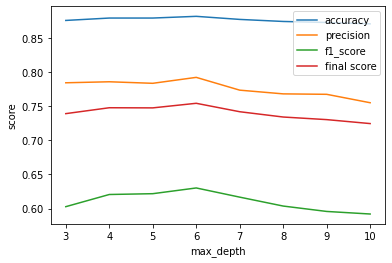

In [58]:
plt.plot(max_depth, acc, label='accuracy')
plt.plot(max_depth, prec, label='precision')
plt.plot(max_depth, F1, label='f1_score')
plt.plot(max_depth, final_score, label='final score')
plt.legend(loc = "best")
plt.xlabel('max_depth')
plt.ylabel('score')

In [59]:
final_score.index(max(final_score))+3

6

max_depth 選擇6

In [60]:
cbc = CatBoostClassifier(learning_rate=0.01, max_depth=6)
cbc.fit(x_train,y_train)

0:	learn: 0.6848267	total: 5.63ms	remaining: 5.62s
1:	learn: 0.6766450	total: 9.77ms	remaining: 4.87s
2:	learn: 0.6689526	total: 16.2ms	remaining: 5.37s
3:	learn: 0.6618332	total: 24.9ms	remaining: 6.2s
4:	learn: 0.6546889	total: 31.3ms	remaining: 6.24s
5:	learn: 0.6474082	total: 35.8ms	remaining: 5.93s
6:	learn: 0.6403710	total: 43ms	remaining: 6.1s
7:	learn: 0.6332349	total: 49.3ms	remaining: 6.11s
8:	learn: 0.6281602	total: 54ms	remaining: 5.95s
9:	learn: 0.6216931	total: 62.3ms	remaining: 6.17s
10:	learn: 0.6151835	total: 66.7ms	remaining: 5.99s
11:	learn: 0.6087911	total: 71.1ms	remaining: 5.85s
12:	learn: 0.6028407	total: 79.9ms	remaining: 6.07s
13:	learn: 0.5974351	total: 86.3ms	remaining: 6.08s
14:	learn: 0.5930108	total: 93.5ms	remaining: 6.14s
15:	learn: 0.5883369	total: 102ms	remaining: 6.28s
16:	learn: 0.5829744	total: 125ms	remaining: 7.22s
17:	learn: 0.5776466	total: 131ms	remaining: 7.14s
18:	learn: 0.5722691	total: 135ms	remaining: 6.98s
19:	learn: 0.5667080	total: 141m

162:	learn: 0.3542822	total: 1.48s	remaining: 7.58s
163:	learn: 0.3539887	total: 1.48s	remaining: 7.56s
164:	learn: 0.3535219	total: 1.49s	remaining: 7.54s
165:	learn: 0.3532329	total: 1.5s	remaining: 7.56s
166:	learn: 0.3529253	total: 1.51s	remaining: 7.54s
167:	learn: 0.3525386	total: 1.52s	remaining: 7.52s
168:	learn: 0.3522085	total: 1.52s	remaining: 7.5s
169:	learn: 0.3519371	total: 1.54s	remaining: 7.5s
170:	learn: 0.3516925	total: 1.54s	remaining: 7.48s
171:	learn: 0.3513584	total: 1.55s	remaining: 7.46s
172:	learn: 0.3510120	total: 1.55s	remaining: 7.44s
173:	learn: 0.3508084	total: 1.56s	remaining: 7.42s
174:	learn: 0.3504683	total: 1.57s	remaining: 7.43s
175:	learn: 0.3502705	total: 1.58s	remaining: 7.4s
176:	learn: 0.3498949	total: 1.59s	remaining: 7.39s
177:	learn: 0.3494829	total: 1.6s	remaining: 7.37s
178:	learn: 0.3491514	total: 1.61s	remaining: 7.38s
179:	learn: 0.3488998	total: 1.61s	remaining: 7.36s
180:	learn: 0.3485127	total: 1.63s	remaining: 7.36s
181:	learn: 0.348

325:	learn: 0.3262453	total: 2.89s	remaining: 5.98s
326:	learn: 0.3261319	total: 2.9s	remaining: 5.98s
327:	learn: 0.3260001	total: 2.91s	remaining: 5.97s
328:	learn: 0.3258282	total: 2.92s	remaining: 5.95s
329:	learn: 0.3257433	total: 2.92s	remaining: 5.94s
330:	learn: 0.3256593	total: 2.93s	remaining: 5.93s
331:	learn: 0.3255147	total: 2.94s	remaining: 5.92s
332:	learn: 0.3254680	total: 2.95s	remaining: 5.91s
333:	learn: 0.3253416	total: 2.96s	remaining: 5.9s
334:	learn: 0.3252041	total: 2.97s	remaining: 5.89s
335:	learn: 0.3250464	total: 2.98s	remaining: 5.88s
336:	learn: 0.3249643	total: 2.98s	remaining: 5.87s
337:	learn: 0.3248817	total: 2.99s	remaining: 5.86s
338:	learn: 0.3247671	total: 3s	remaining: 5.85s
339:	learn: 0.3246781	total: 3.01s	remaining: 5.84s
340:	learn: 0.3246136	total: 3.02s	remaining: 5.84s
341:	learn: 0.3245048	total: 3.03s	remaining: 5.83s
342:	learn: 0.3244635	total: 3.04s	remaining: 5.82s
343:	learn: 0.3244037	total: 3.05s	remaining: 5.81s
344:	learn: 0.324

501:	learn: 0.3120532	total: 4.43s	remaining: 4.4s
502:	learn: 0.3119570	total: 4.44s	remaining: 4.39s
503:	learn: 0.3118664	total: 4.45s	remaining: 4.38s
504:	learn: 0.3117798	total: 4.45s	remaining: 4.37s
505:	learn: 0.3117472	total: 4.47s	remaining: 4.36s
506:	learn: 0.3116618	total: 4.47s	remaining: 4.35s
507:	learn: 0.3115874	total: 4.49s	remaining: 4.35s
508:	learn: 0.3115088	total: 4.5s	remaining: 4.34s
509:	learn: 0.3114944	total: 4.5s	remaining: 4.33s
510:	learn: 0.3114291	total: 4.53s	remaining: 4.33s
511:	learn: 0.3113697	total: 4.54s	remaining: 4.33s
512:	learn: 0.3112670	total: 4.55s	remaining: 4.32s
513:	learn: 0.3112031	total: 4.55s	remaining: 4.31s
514:	learn: 0.3111474	total: 4.56s	remaining: 4.3s
515:	learn: 0.3110820	total: 4.57s	remaining: 4.29s
516:	learn: 0.3109728	total: 4.58s	remaining: 4.28s
517:	learn: 0.3109105	total: 4.59s	remaining: 4.27s
518:	learn: 0.3108820	total: 4.6s	remaining: 4.26s
519:	learn: 0.3108294	total: 4.6s	remaining: 4.25s
520:	learn: 0.3107

660:	learn: 0.3025689	total: 5.85s	remaining: 3s
661:	learn: 0.3025385	total: 5.85s	remaining: 2.99s
662:	learn: 0.3025117	total: 5.86s	remaining: 2.98s
663:	learn: 0.3024509	total: 5.87s	remaining: 2.97s
664:	learn: 0.3023861	total: 5.88s	remaining: 2.96s
665:	learn: 0.3022773	total: 5.88s	remaining: 2.95s
666:	learn: 0.3021853	total: 5.89s	remaining: 2.94s
667:	learn: 0.3021051	total: 5.9s	remaining: 2.93s
668:	learn: 0.3020340	total: 5.91s	remaining: 2.92s
669:	learn: 0.3019671	total: 5.92s	remaining: 2.91s
670:	learn: 0.3018991	total: 5.92s	remaining: 2.9s
671:	learn: 0.3018452	total: 5.93s	remaining: 2.89s
672:	learn: 0.3017687	total: 5.94s	remaining: 2.89s
673:	learn: 0.3016999	total: 5.95s	remaining: 2.88s
674:	learn: 0.3016341	total: 5.95s	remaining: 2.87s
675:	learn: 0.3015835	total: 5.96s	remaining: 2.86s
676:	learn: 0.3015802	total: 5.97s	remaining: 2.85s
677:	learn: 0.3015313	total: 5.98s	remaining: 2.84s
678:	learn: 0.3014450	total: 5.98s	remaining: 2.83s
679:	learn: 0.301

822:	learn: 0.2935926	total: 7.26s	remaining: 1.56s
823:	learn: 0.2935214	total: 7.27s	remaining: 1.55s
824:	learn: 0.2934851	total: 7.28s	remaining: 1.54s
825:	learn: 0.2934339	total: 7.29s	remaining: 1.53s
826:	learn: 0.2933748	total: 7.29s	remaining: 1.52s
827:	learn: 0.2933055	total: 7.3s	remaining: 1.52s
828:	learn: 0.2932371	total: 7.31s	remaining: 1.51s
829:	learn: 0.2931950	total: 7.32s	remaining: 1.5s
830:	learn: 0.2931472	total: 7.32s	remaining: 1.49s
831:	learn: 0.2930948	total: 7.33s	remaining: 1.48s
832:	learn: 0.2930653	total: 7.34s	remaining: 1.47s
833:	learn: 0.2930151	total: 7.35s	remaining: 1.46s
834:	learn: 0.2929442	total: 7.36s	remaining: 1.45s
835:	learn: 0.2929185	total: 7.36s	remaining: 1.44s
836:	learn: 0.2928807	total: 7.37s	remaining: 1.44s
837:	learn: 0.2927709	total: 7.38s	remaining: 1.43s
838:	learn: 0.2927244	total: 7.39s	remaining: 1.42s
839:	learn: 0.2926880	total: 7.39s	remaining: 1.41s
840:	learn: 0.2925896	total: 7.4s	remaining: 1.4s
841:	learn: 0.29

982:	learn: 0.2851150	total: 8.53s	remaining: 147ms
983:	learn: 0.2850503	total: 8.53s	remaining: 139ms
984:	learn: 0.2850125	total: 8.54s	remaining: 130ms
985:	learn: 0.2849253	total: 8.55s	remaining: 121ms
986:	learn: 0.2848688	total: 8.56s	remaining: 113ms
987:	learn: 0.2848116	total: 8.57s	remaining: 104ms
988:	learn: 0.2847633	total: 8.58s	remaining: 95.4ms
989:	learn: 0.2846978	total: 8.59s	remaining: 86.7ms
990:	learn: 0.2846689	total: 8.59s	remaining: 78ms
991:	learn: 0.2845718	total: 8.6s	remaining: 69.4ms
992:	learn: 0.2845294	total: 8.61s	remaining: 60.7ms
993:	learn: 0.2844568	total: 8.62s	remaining: 52.1ms
994:	learn: 0.2843962	total: 8.63s	remaining: 43.4ms
995:	learn: 0.2843503	total: 8.64s	remaining: 34.7ms
996:	learn: 0.2842720	total: 8.65s	remaining: 26ms
997:	learn: 0.2842148	total: 8.66s	remaining: 17.4ms
998:	learn: 0.2841676	total: 8.66s	remaining: 8.67ms
999:	learn: 0.2841251	total: 8.67s	remaining: 0us


In [61]:
pred=cbc.predict(x_test)
print('Train Result of CatBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of CatBoost:
Accuracy Score: 88.15%
Precision Score: 79.22%
F1 score: 63.03%


### subsample

In [77]:
acc = []
prec = []
F1 = []
for i in range(21):
    cbc = CatBoostClassifier(learning_rate=0.01, max_depth=6, subsample=0.8+(i*0.01))
    cbc.fit(x_train,y_train)
    
    pred=cbc.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    F1.append(f1_score(y_test, pred))

0:	learn: 0.6848267	total: 13.7ms	remaining: 13.7s
1:	learn: 0.6766450	total: 22.5ms	remaining: 11.2s
2:	learn: 0.6689526	total: 32ms	remaining: 10.6s
3:	learn: 0.6618332	total: 40.9ms	remaining: 10.2s
4:	learn: 0.6546889	total: 48.2ms	remaining: 9.6s
5:	learn: 0.6474082	total: 57.4ms	remaining: 9.5s
6:	learn: 0.6403710	total: 65.2ms	remaining: 9.25s
7:	learn: 0.6332349	total: 71.1ms	remaining: 8.82s
8:	learn: 0.6281602	total: 77.7ms	remaining: 8.55s
9:	learn: 0.6216931	total: 82.4ms	remaining: 8.16s
10:	learn: 0.6151835	total: 89.1ms	remaining: 8.01s
11:	learn: 0.6087911	total: 103ms	remaining: 8.5s
12:	learn: 0.6028407	total: 115ms	remaining: 8.73s
13:	learn: 0.5974351	total: 122ms	remaining: 8.56s
14:	learn: 0.5930108	total: 128ms	remaining: 8.42s
15:	learn: 0.5883369	total: 133ms	remaining: 8.15s
16:	learn: 0.5829744	total: 138ms	remaining: 8s
17:	learn: 0.5776466	total: 153ms	remaining: 8.34s
18:	learn: 0.5722691	total: 161ms	remaining: 8.31s
19:	learn: 0.5667080	total: 167ms	rema

177:	learn: 0.3494829	total: 1.65s	remaining: 7.61s
178:	learn: 0.3491514	total: 1.66s	remaining: 7.59s
179:	learn: 0.3488998	total: 1.67s	remaining: 7.62s
180:	learn: 0.3485127	total: 1.68s	remaining: 7.61s
181:	learn: 0.3482608	total: 1.69s	remaining: 7.59s
182:	learn: 0.3478801	total: 1.7s	remaining: 7.6s
183:	learn: 0.3476111	total: 1.71s	remaining: 7.58s
184:	learn: 0.3473668	total: 1.72s	remaining: 7.56s
185:	learn: 0.3471609	total: 1.74s	remaining: 7.59s
186:	learn: 0.3468954	total: 1.74s	remaining: 7.56s
187:	learn: 0.3467201	total: 1.75s	remaining: 7.54s
188:	learn: 0.3464961	total: 1.76s	remaining: 7.57s
189:	learn: 0.3461939	total: 1.77s	remaining: 7.55s
190:	learn: 0.3459965	total: 1.78s	remaining: 7.54s
191:	learn: 0.3457918	total: 1.79s	remaining: 7.52s
192:	learn: 0.3454407	total: 1.79s	remaining: 7.5s
193:	learn: 0.3451418	total: 1.8s	remaining: 7.47s
194:	learn: 0.3448922	total: 1.81s	remaining: 7.5s
195:	learn: 0.3445676	total: 1.82s	remaining: 7.49s
196:	learn: 0.344

339:	learn: 0.3246781	total: 3.1s	remaining: 6.02s
340:	learn: 0.3246136	total: 3.11s	remaining: 6.01s
341:	learn: 0.3245048	total: 3.12s	remaining: 6s
342:	learn: 0.3244635	total: 3.14s	remaining: 6.01s
343:	learn: 0.3244037	total: 3.14s	remaining: 6s
344:	learn: 0.3243370	total: 3.15s	remaining: 5.98s
345:	learn: 0.3242224	total: 3.17s	remaining: 5.98s
346:	learn: 0.3241007	total: 3.17s	remaining: 5.97s
347:	learn: 0.3240326	total: 3.19s	remaining: 5.97s
348:	learn: 0.3239196	total: 3.19s	remaining: 5.96s
349:	learn: 0.3238220	total: 3.2s	remaining: 5.95s
350:	learn: 0.3236974	total: 3.21s	remaining: 5.93s
351:	learn: 0.3235728	total: 3.21s	remaining: 5.92s
352:	learn: 0.3235292	total: 3.23s	remaining: 5.92s
353:	learn: 0.3234442	total: 3.24s	remaining: 5.92s
354:	learn: 0.3233442	total: 3.25s	remaining: 5.9s
355:	learn: 0.3232350	total: 3.26s	remaining: 5.89s
356:	learn: 0.3231115	total: 3.27s	remaining: 5.88s
357:	learn: 0.3229790	total: 3.27s	remaining: 5.87s
358:	learn: 0.3228875

500:	learn: 0.3121127	total: 4.57s	remaining: 4.55s
501:	learn: 0.3120532	total: 4.58s	remaining: 4.54s
502:	learn: 0.3119570	total: 4.58s	remaining: 4.53s
503:	learn: 0.3118664	total: 4.6s	remaining: 4.52s
504:	learn: 0.3117798	total: 4.6s	remaining: 4.51s
505:	learn: 0.3117472	total: 4.61s	remaining: 4.5s
506:	learn: 0.3116618	total: 4.62s	remaining: 4.49s
507:	learn: 0.3115874	total: 4.63s	remaining: 4.49s
508:	learn: 0.3115088	total: 4.64s	remaining: 4.47s
509:	learn: 0.3114944	total: 4.64s	remaining: 4.46s
510:	learn: 0.3114291	total: 4.65s	remaining: 4.45s
511:	learn: 0.3113697	total: 4.66s	remaining: 4.44s
512:	learn: 0.3112670	total: 4.67s	remaining: 4.43s
513:	learn: 0.3112031	total: 4.68s	remaining: 4.42s
514:	learn: 0.3111474	total: 4.68s	remaining: 4.41s
515:	learn: 0.3110820	total: 4.69s	remaining: 4.4s
516:	learn: 0.3109728	total: 4.7s	remaining: 4.39s
517:	learn: 0.3109105	total: 4.71s	remaining: 4.38s
518:	learn: 0.3108820	total: 4.72s	remaining: 4.37s
519:	learn: 0.310

663:	learn: 0.3024509	total: 6.01s	remaining: 3.04s
664:	learn: 0.3023861	total: 6.02s	remaining: 3.03s
665:	learn: 0.3022773	total: 6.03s	remaining: 3.02s
666:	learn: 0.3021853	total: 6.04s	remaining: 3.01s
667:	learn: 0.3021051	total: 6.05s	remaining: 3.01s
668:	learn: 0.3020340	total: 6.06s	remaining: 3s
669:	learn: 0.3019671	total: 6.08s	remaining: 3s
670:	learn: 0.3018991	total: 6.09s	remaining: 2.99s
671:	learn: 0.3018452	total: 6.1s	remaining: 2.98s
672:	learn: 0.3017687	total: 6.11s	remaining: 2.97s
673:	learn: 0.3016999	total: 6.13s	remaining: 2.96s
674:	learn: 0.3016341	total: 6.14s	remaining: 2.96s
675:	learn: 0.3015835	total: 6.16s	remaining: 2.95s
676:	learn: 0.3015802	total: 6.16s	remaining: 2.94s
677:	learn: 0.3015313	total: 6.17s	remaining: 2.93s
678:	learn: 0.3014450	total: 6.18s	remaining: 2.92s
679:	learn: 0.3014117	total: 6.2s	remaining: 2.92s
680:	learn: 0.3013366	total: 6.2s	remaining: 2.91s
681:	learn: 0.3012590	total: 6.21s	remaining: 2.9s
682:	learn: 0.3012115	

822:	learn: 0.2935926	total: 7.66s	remaining: 1.65s
823:	learn: 0.2935214	total: 7.67s	remaining: 1.64s
824:	learn: 0.2934851	total: 7.69s	remaining: 1.63s
825:	learn: 0.2934339	total: 7.69s	remaining: 1.62s
826:	learn: 0.2933748	total: 7.7s	remaining: 1.61s
827:	learn: 0.2933055	total: 7.71s	remaining: 1.6s
828:	learn: 0.2932371	total: 7.72s	remaining: 1.59s
829:	learn: 0.2931950	total: 7.73s	remaining: 1.58s
830:	learn: 0.2931472	total: 7.74s	remaining: 1.57s
831:	learn: 0.2930948	total: 7.75s	remaining: 1.56s
832:	learn: 0.2930653	total: 7.75s	remaining: 1.55s
833:	learn: 0.2930151	total: 7.76s	remaining: 1.54s
834:	learn: 0.2929442	total: 7.77s	remaining: 1.53s
835:	learn: 0.2929185	total: 7.78s	remaining: 1.53s
836:	learn: 0.2928807	total: 7.79s	remaining: 1.52s
837:	learn: 0.2927709	total: 7.8s	remaining: 1.51s
838:	learn: 0.2927244	total: 7.81s	remaining: 1.5s
839:	learn: 0.2926880	total: 7.82s	remaining: 1.49s
840:	learn: 0.2925896	total: 7.83s	remaining: 1.48s
841:	learn: 0.29

997:	learn: 0.2842148	total: 9.27s	remaining: 18.6ms
998:	learn: 0.2841676	total: 9.27s	remaining: 9.28ms
999:	learn: 0.2841251	total: 9.28s	remaining: 0us
0:	learn: 0.6848267	total: 17.7ms	remaining: 17.7s
1:	learn: 0.6766450	total: 30.2ms	remaining: 15.1s
2:	learn: 0.6689526	total: 42.1ms	remaining: 14s
3:	learn: 0.6618332	total: 46.7ms	remaining: 11.6s
4:	learn: 0.6546889	total: 52.1ms	remaining: 10.4s
5:	learn: 0.6474082	total: 65.1ms	remaining: 10.8s
6:	learn: 0.6403710	total: 71.9ms	remaining: 10.2s
7:	learn: 0.6336375	total: 79.6ms	remaining: 9.87s
8:	learn: 0.6285523	total: 85ms	remaining: 9.35s
9:	learn: 0.6220814	total: 96.4ms	remaining: 9.54s
10:	learn: 0.6155687	total: 101ms	remaining: 9.11s
11:	learn: 0.6091696	total: 107ms	remaining: 8.83s
12:	learn: 0.6032100	total: 117ms	remaining: 8.88s
13:	learn: 0.5977943	total: 124ms	remaining: 8.75s
14:	learn: 0.5930492	total: 133ms	remaining: 8.75s
15:	learn: 0.5883809	total: 141ms	remaining: 8.67s
16:	learn: 0.5830228	total: 147m

174:	learn: 0.3507541	total: 1.68s	remaining: 7.92s
175:	learn: 0.3505520	total: 1.69s	remaining: 7.89s
176:	learn: 0.3501687	total: 1.7s	remaining: 7.91s
177:	learn: 0.3497458	total: 1.71s	remaining: 7.87s
178:	learn: 0.3494845	total: 1.71s	remaining: 7.86s
179:	learn: 0.3492356	total: 1.72s	remaining: 7.83s
180:	learn: 0.3488372	total: 1.73s	remaining: 7.83s
181:	learn: 0.3485862	total: 1.74s	remaining: 7.81s
182:	learn: 0.3481978	total: 1.74s	remaining: 7.79s
183:	learn: 0.3478169	total: 1.75s	remaining: 7.75s
184:	learn: 0.3475734	total: 1.76s	remaining: 7.77s
185:	learn: 0.3473703	total: 1.77s	remaining: 7.75s
186:	learn: 0.3471060	total: 1.77s	remaining: 7.72s
187:	learn: 0.3469323	total: 1.79s	remaining: 7.71s
188:	learn: 0.3466837	total: 1.79s	remaining: 7.7s
189:	learn: 0.3463770	total: 1.8s	remaining: 7.69s
190:	learn: 0.3461781	total: 1.81s	remaining: 7.69s
191:	learn: 0.3459755	total: 1.82s	remaining: 7.66s
192:	learn: 0.3456199	total: 1.82s	remaining: 7.63s
193:	learn: 0.3

340:	learn: 0.3241635	total: 3.09s	remaining: 5.97s
341:	learn: 0.3240492	total: 3.1s	remaining: 5.96s
342:	learn: 0.3239915	total: 3.1s	remaining: 5.95s
343:	learn: 0.3238687	total: 3.11s	remaining: 5.93s
344:	learn: 0.3237415	total: 3.11s	remaining: 5.91s
345:	learn: 0.3236487	total: 3.12s	remaining: 5.89s
346:	learn: 0.3235768	total: 3.13s	remaining: 5.89s
347:	learn: 0.3234535	total: 3.14s	remaining: 5.88s
348:	learn: 0.3233616	total: 3.15s	remaining: 5.87s
349:	learn: 0.3232775	total: 3.16s	remaining: 5.87s
350:	learn: 0.3231868	total: 3.17s	remaining: 5.86s
351:	learn: 0.3231282	total: 3.17s	remaining: 5.84s
352:	learn: 0.3230312	total: 3.18s	remaining: 5.82s
353:	learn: 0.3229183	total: 3.18s	remaining: 5.81s
354:	learn: 0.3229010	total: 3.19s	remaining: 5.79s
355:	learn: 0.3228326	total: 3.2s	remaining: 5.78s
356:	learn: 0.3227474	total: 3.2s	remaining: 5.77s
357:	learn: 0.3227050	total: 3.21s	remaining: 5.75s
358:	learn: 0.3226310	total: 3.22s	remaining: 5.75s
359:	learn: 0.32

518:	learn: 0.3105249	total: 4.52s	remaining: 4.19s
519:	learn: 0.3104846	total: 4.52s	remaining: 4.17s
520:	learn: 0.3104460	total: 4.53s	remaining: 4.17s
521:	learn: 0.3103606	total: 4.54s	remaining: 4.16s
522:	learn: 0.3102965	total: 4.55s	remaining: 4.15s
523:	learn: 0.3101954	total: 4.56s	remaining: 4.14s
524:	learn: 0.3101262	total: 4.58s	remaining: 4.14s
525:	learn: 0.3100700	total: 4.59s	remaining: 4.13s
526:	learn: 0.3099541	total: 4.6s	remaining: 4.13s
527:	learn: 0.3098593	total: 4.61s	remaining: 4.12s
528:	learn: 0.3097798	total: 4.61s	remaining: 4.11s
529:	learn: 0.3097513	total: 4.62s	remaining: 4.1s
530:	learn: 0.3097086	total: 4.63s	remaining: 4.08s
531:	learn: 0.3096659	total: 4.65s	remaining: 4.09s
532:	learn: 0.3096023	total: 4.65s	remaining: 4.08s
533:	learn: 0.3095878	total: 4.66s	remaining: 4.07s
534:	learn: 0.3095453	total: 4.67s	remaining: 4.05s
535:	learn: 0.3094523	total: 4.68s	remaining: 4.05s
536:	learn: 0.3093477	total: 4.69s	remaining: 4.04s
537:	learn: 0.

682:	learn: 0.3003257	total: 6.16s	remaining: 2.86s
683:	learn: 0.3002426	total: 6.16s	remaining: 2.85s
684:	learn: 0.3001581	total: 6.18s	remaining: 2.84s
685:	learn: 0.3000860	total: 6.19s	remaining: 2.83s
686:	learn: 0.3000279	total: 6.2s	remaining: 2.82s
687:	learn: 0.3000102	total: 6.21s	remaining: 2.81s
688:	learn: 0.2999542	total: 6.21s	remaining: 2.8s
689:	learn: 0.2999315	total: 6.22s	remaining: 2.8s
690:	learn: 0.2998929	total: 6.24s	remaining: 2.79s
691:	learn: 0.2998401	total: 6.25s	remaining: 2.78s
692:	learn: 0.2997858	total: 6.25s	remaining: 2.77s
693:	learn: 0.2997410	total: 6.26s	remaining: 2.76s
694:	learn: 0.2996320	total: 6.27s	remaining: 2.75s
695:	learn: 0.2995856	total: 6.29s	remaining: 2.75s
696:	learn: 0.2995465	total: 6.31s	remaining: 2.74s
697:	learn: 0.2995058	total: 6.32s	remaining: 2.73s
698:	learn: 0.2994528	total: 6.33s	remaining: 2.73s
699:	learn: 0.2994079	total: 6.35s	remaining: 2.72s
700:	learn: 0.2993518	total: 6.36s	remaining: 2.71s
701:	learn: 0.2

845:	learn: 0.2914015	total: 7.63s	remaining: 1.39s
846:	learn: 0.2913559	total: 7.64s	remaining: 1.38s
847:	learn: 0.2912898	total: 7.64s	remaining: 1.37s
848:	learn: 0.2912298	total: 7.65s	remaining: 1.36s
849:	learn: 0.2912122	total: 7.66s	remaining: 1.35s
850:	learn: 0.2911939	total: 7.67s	remaining: 1.34s
851:	learn: 0.2911387	total: 7.67s	remaining: 1.33s
852:	learn: 0.2910649	total: 7.68s	remaining: 1.32s
853:	learn: 0.2910192	total: 7.69s	remaining: 1.31s
854:	learn: 0.2909538	total: 7.69s	remaining: 1.3s
855:	learn: 0.2908430	total: 7.71s	remaining: 1.3s
856:	learn: 0.2908081	total: 7.71s	remaining: 1.29s
857:	learn: 0.2907129	total: 7.72s	remaining: 1.28s
858:	learn: 0.2906789	total: 7.73s	remaining: 1.27s
859:	learn: 0.2906465	total: 7.74s	remaining: 1.26s
860:	learn: 0.2906013	total: 7.74s	remaining: 1.25s
861:	learn: 0.2905167	total: 7.75s	remaining: 1.24s
862:	learn: 0.2904738	total: 7.76s	remaining: 1.23s
863:	learn: 0.2904362	total: 7.77s	remaining: 1.22s
864:	learn: 0.

29:	learn: 0.5235257	total: 202ms	remaining: 6.54s
30:	learn: 0.5193407	total: 215ms	remaining: 6.71s
31:	learn: 0.5154084	total: 225ms	remaining: 6.8s
32:	learn: 0.5114535	total: 229ms	remaining: 6.72s
33:	learn: 0.5083256	total: 239ms	remaining: 6.78s
34:	learn: 0.5050542	total: 244ms	remaining: 6.72s
35:	learn: 0.5013128	total: 248ms	remaining: 6.64s
36:	learn: 0.4978909	total: 258ms	remaining: 6.72s
37:	learn: 0.4952732	total: 268ms	remaining: 6.79s
38:	learn: 0.4920976	total: 276ms	remaining: 6.79s
39:	learn: 0.4892267	total: 283ms	remaining: 6.8s
40:	learn: 0.4863352	total: 289ms	remaining: 6.75s
41:	learn: 0.4836940	total: 303ms	remaining: 6.91s
42:	learn: 0.4813726	total: 307ms	remaining: 6.82s
43:	learn: 0.4782162	total: 311ms	remaining: 6.76s
44:	learn: 0.4752974	total: 318ms	remaining: 6.76s
45:	learn: 0.4722729	total: 332ms	remaining: 6.89s
46:	learn: 0.4697904	total: 337ms	remaining: 6.83s
47:	learn: 0.4678034	total: 343ms	remaining: 6.8s
48:	learn: 0.4650332	total: 349ms	

198:	learn: 0.3440389	total: 1.43s	remaining: 5.75s
199:	learn: 0.3438442	total: 1.43s	remaining: 5.74s
200:	learn: 0.3436376	total: 1.45s	remaining: 5.75s
201:	learn: 0.3434516	total: 1.45s	remaining: 5.73s
202:	learn: 0.3432056	total: 1.46s	remaining: 5.71s
203:	learn: 0.3430524	total: 1.47s	remaining: 5.72s
204:	learn: 0.3428564	total: 1.47s	remaining: 5.7s
205:	learn: 0.3426770	total: 1.48s	remaining: 5.69s
206:	learn: 0.3424845	total: 1.49s	remaining: 5.69s
207:	learn: 0.3422599	total: 1.5s	remaining: 5.7s
208:	learn: 0.3419967	total: 1.5s	remaining: 5.69s
209:	learn: 0.3418216	total: 1.51s	remaining: 5.67s
210:	learn: 0.3416589	total: 1.51s	remaining: 5.66s
211:	learn: 0.3414523	total: 1.52s	remaining: 5.64s
212:	learn: 0.3412654	total: 1.52s	remaining: 5.62s
213:	learn: 0.3411242	total: 1.53s	remaining: 5.63s
214:	learn: 0.3408749	total: 1.54s	remaining: 5.63s
215:	learn: 0.3407037	total: 1.54s	remaining: 5.61s
216:	learn: 0.3405438	total: 1.55s	remaining: 5.6s
217:	learn: 0.340

374:	learn: 0.3209476	total: 2.68s	remaining: 4.46s
375:	learn: 0.3208698	total: 2.69s	remaining: 4.46s
376:	learn: 0.3208015	total: 2.69s	remaining: 4.45s
377:	learn: 0.3206728	total: 2.7s	remaining: 4.45s
378:	learn: 0.3205610	total: 2.71s	remaining: 4.44s
379:	learn: 0.3204965	total: 2.72s	remaining: 4.43s
380:	learn: 0.3204183	total: 2.73s	remaining: 4.43s
381:	learn: 0.3203477	total: 2.73s	remaining: 4.42s
382:	learn: 0.3202424	total: 2.74s	remaining: 4.41s
383:	learn: 0.3201680	total: 2.75s	remaining: 4.42s
384:	learn: 0.3200839	total: 2.76s	remaining: 4.4s
385:	learn: 0.3199944	total: 2.76s	remaining: 4.39s
386:	learn: 0.3199325	total: 2.77s	remaining: 4.39s
387:	learn: 0.3198450	total: 2.77s	remaining: 4.37s
388:	learn: 0.3197797	total: 2.78s	remaining: 4.36s
389:	learn: 0.3196628	total: 2.79s	remaining: 4.36s
390:	learn: 0.3195596	total: 2.8s	remaining: 4.36s
391:	learn: 0.3194851	total: 2.81s	remaining: 4.35s
392:	learn: 0.3193632	total: 2.81s	remaining: 4.35s
393:	learn: 0.3

546:	learn: 0.3086779	total: 3.92s	remaining: 3.25s
547:	learn: 0.3086139	total: 3.93s	remaining: 3.24s
548:	learn: 0.3085302	total: 3.94s	remaining: 3.24s
549:	learn: 0.3085020	total: 3.95s	remaining: 3.23s
550:	learn: 0.3084112	total: 3.96s	remaining: 3.23s
551:	learn: 0.3083454	total: 3.97s	remaining: 3.22s
552:	learn: 0.3082836	total: 3.98s	remaining: 3.22s
553:	learn: 0.3082472	total: 3.99s	remaining: 3.21s
554:	learn: 0.3082108	total: 4s	remaining: 3.21s
555:	learn: 0.3081020	total: 4.02s	remaining: 3.21s
556:	learn: 0.3080885	total: 4.03s	remaining: 3.2s
557:	learn: 0.3079985	total: 4.03s	remaining: 3.19s
558:	learn: 0.3079052	total: 4.04s	remaining: 3.19s
559:	learn: 0.3078441	total: 4.05s	remaining: 3.18s
560:	learn: 0.3078147	total: 4.06s	remaining: 3.18s
561:	learn: 0.3077042	total: 4.07s	remaining: 3.17s
562:	learn: 0.3076137	total: 4.08s	remaining: 3.16s
563:	learn: 0.3075685	total: 4.08s	remaining: 3.15s
564:	learn: 0.3075315	total: 4.09s	remaining: 3.15s
565:	learn: 0.30

712:	learn: 0.2994932	total: 5.13s	remaining: 2.06s
713:	learn: 0.2994100	total: 5.14s	remaining: 2.06s
714:	learn: 0.2993513	total: 5.15s	remaining: 2.05s
715:	learn: 0.2993297	total: 5.16s	remaining: 2.04s
716:	learn: 0.2992478	total: 5.17s	remaining: 2.04s
717:	learn: 0.2991877	total: 5.18s	remaining: 2.03s
718:	learn: 0.2991120	total: 5.19s	remaining: 2.03s
719:	learn: 0.2990810	total: 5.19s	remaining: 2.02s
720:	learn: 0.2990328	total: 5.21s	remaining: 2.01s
721:	learn: 0.2990060	total: 5.21s	remaining: 2.01s
722:	learn: 0.2989825	total: 5.22s	remaining: 2s
723:	learn: 0.2989269	total: 5.23s	remaining: 2s
724:	learn: 0.2988569	total: 5.24s	remaining: 1.99s
725:	learn: 0.2988162	total: 5.25s	remaining: 1.98s
726:	learn: 0.2987874	total: 5.26s	remaining: 1.98s
727:	learn: 0.2987358	total: 5.27s	remaining: 1.97s
728:	learn: 0.2986444	total: 5.28s	remaining: 1.96s
729:	learn: 0.2986099	total: 5.29s	remaining: 1.96s
730:	learn: 0.2985757	total: 5.3s	remaining: 1.95s
731:	learn: 0.29851

892:	learn: 0.2894728	total: 6.52s	remaining: 781ms
893:	learn: 0.2894277	total: 6.52s	remaining: 774ms
894:	learn: 0.2893706	total: 6.53s	remaining: 766ms
895:	learn: 0.2892886	total: 6.54s	remaining: 759ms
896:	learn: 0.2892579	total: 6.55s	remaining: 752ms
897:	learn: 0.2891744	total: 6.55s	remaining: 744ms
898:	learn: 0.2891380	total: 6.56s	remaining: 737ms
899:	learn: 0.2890879	total: 6.57s	remaining: 730ms
900:	learn: 0.2890369	total: 6.57s	remaining: 722ms
901:	learn: 0.2890011	total: 6.58s	remaining: 714ms
902:	learn: 0.2889681	total: 6.59s	remaining: 708ms
903:	learn: 0.2889314	total: 6.6s	remaining: 700ms
904:	learn: 0.2888904	total: 6.6s	remaining: 693ms
905:	learn: 0.2888566	total: 6.62s	remaining: 686ms
906:	learn: 0.2888033	total: 6.62s	remaining: 679ms
907:	learn: 0.2887127	total: 6.62s	remaining: 671ms
908:	learn: 0.2886588	total: 6.64s	remaining: 664ms
909:	learn: 0.2886263	total: 6.64s	remaining: 657ms
910:	learn: 0.2885963	total: 6.65s	remaining: 649ms
911:	learn: 0.

72:	learn: 0.4189384	total: 545ms	remaining: 6.92s
73:	learn: 0.4175173	total: 549ms	remaining: 6.87s
74:	learn: 0.4159657	total: 559ms	remaining: 6.89s
75:	learn: 0.4149265	total: 568ms	remaining: 6.9s
76:	learn: 0.4136153	total: 573ms	remaining: 6.87s
77:	learn: 0.4119894	total: 581ms	remaining: 6.87s
78:	learn: 0.4107706	total: 589ms	remaining: 6.87s
79:	learn: 0.4092802	total: 594ms	remaining: 6.83s
80:	learn: 0.4078733	total: 602ms	remaining: 6.83s
81:	learn: 0.4067046	total: 606ms	remaining: 6.78s
82:	learn: 0.4056072	total: 611ms	remaining: 6.75s
83:	learn: 0.4044985	total: 620ms	remaining: 6.76s
84:	learn: 0.4029580	total: 635ms	remaining: 6.84s
85:	learn: 0.4020056	total: 640ms	remaining: 6.8s
86:	learn: 0.4006156	total: 648ms	remaining: 6.8s
87:	learn: 0.3993551	total: 656ms	remaining: 6.8s
88:	learn: 0.3979792	total: 661ms	remaining: 6.76s
89:	learn: 0.3967732	total: 668ms	remaining: 6.75s
90:	learn: 0.3959261	total: 676ms	remaining: 6.75s
91:	learn: 0.3951276	total: 683ms	r

251:	learn: 0.3345619	total: 1.98s	remaining: 5.88s
252:	learn: 0.3343893	total: 1.99s	remaining: 5.87s
253:	learn: 0.3341986	total: 1.99s	remaining: 5.85s
254:	learn: 0.3340590	total: 2s	remaining: 5.84s
255:	learn: 0.3338492	total: 2.01s	remaining: 5.83s
256:	learn: 0.3336806	total: 2.01s	remaining: 5.83s
257:	learn: 0.3335846	total: 2.02s	remaining: 5.81s
258:	learn: 0.3334154	total: 2.03s	remaining: 5.82s
259:	learn: 0.3332688	total: 2.04s	remaining: 5.8s
260:	learn: 0.3331376	total: 2.04s	remaining: 5.78s
261:	learn: 0.3330075	total: 2.05s	remaining: 5.79s
262:	learn: 0.3329039	total: 2.06s	remaining: 5.76s
263:	learn: 0.3327405	total: 2.07s	remaining: 5.76s
264:	learn: 0.3326329	total: 2.07s	remaining: 5.75s
265:	learn: 0.3324615	total: 2.08s	remaining: 5.74s
266:	learn: 0.3324116	total: 2.08s	remaining: 5.72s
267:	learn: 0.3323024	total: 2.09s	remaining: 5.7s
268:	learn: 0.3322185	total: 2.1s	remaining: 5.7s
269:	learn: 0.3321361	total: 2.11s	remaining: 5.71s
270:	learn: 0.33200

419:	learn: 0.3177360	total: 3.2s	remaining: 4.42s
420:	learn: 0.3176785	total: 3.21s	remaining: 4.41s
421:	learn: 0.3175579	total: 3.22s	remaining: 4.41s
422:	learn: 0.3175130	total: 3.23s	remaining: 4.4s
423:	learn: 0.3174161	total: 3.23s	remaining: 4.39s
424:	learn: 0.3173116	total: 3.25s	remaining: 4.39s
425:	learn: 0.3171962	total: 3.25s	remaining: 4.38s
426:	learn: 0.3171409	total: 3.26s	remaining: 4.38s
427:	learn: 0.3170785	total: 3.26s	remaining: 4.36s
428:	learn: 0.3170222	total: 3.27s	remaining: 4.35s
429:	learn: 0.3169118	total: 3.28s	remaining: 4.35s
430:	learn: 0.3168564	total: 3.28s	remaining: 4.33s
431:	learn: 0.3167851	total: 3.29s	remaining: 4.32s
432:	learn: 0.3167176	total: 3.3s	remaining: 4.32s
433:	learn: 0.3166622	total: 3.31s	remaining: 4.32s
434:	learn: 0.3166007	total: 3.32s	remaining: 4.31s
435:	learn: 0.3165369	total: 3.33s	remaining: 4.3s
436:	learn: 0.3164462	total: 3.33s	remaining: 4.29s
437:	learn: 0.3163615	total: 3.34s	remaining: 4.28s
438:	learn: 0.31

594:	learn: 0.3055383	total: 4.64s	remaining: 3.16s
595:	learn: 0.3054502	total: 4.64s	remaining: 3.15s
596:	learn: 0.3054333	total: 4.65s	remaining: 3.14s
597:	learn: 0.3053755	total: 4.66s	remaining: 3.13s
598:	learn: 0.3053161	total: 4.66s	remaining: 3.12s
599:	learn: 0.3052606	total: 4.67s	remaining: 3.11s
600:	learn: 0.3051516	total: 4.68s	remaining: 3.11s
601:	learn: 0.3050983	total: 4.69s	remaining: 3.1s
602:	learn: 0.3050202	total: 4.7s	remaining: 3.09s
603:	learn: 0.3050034	total: 4.7s	remaining: 3.08s
604:	learn: 0.3049587	total: 4.71s	remaining: 3.07s
605:	learn: 0.3049113	total: 4.71s	remaining: 3.06s
606:	learn: 0.3048339	total: 4.72s	remaining: 3.06s
607:	learn: 0.3047528	total: 4.73s	remaining: 3.05s
608:	learn: 0.3046892	total: 4.74s	remaining: 3.04s
609:	learn: 0.3046443	total: 4.75s	remaining: 3.04s
610:	learn: 0.3045887	total: 4.75s	remaining: 3.03s
611:	learn: 0.3045173	total: 4.76s	remaining: 3.02s
612:	learn: 0.3044083	total: 4.76s	remaining: 3s
613:	learn: 0.3043

760:	learn: 0.2956901	total: 5.89s	remaining: 1.85s
761:	learn: 0.2956469	total: 5.9s	remaining: 1.84s
762:	learn: 0.2955964	total: 5.91s	remaining: 1.83s
763:	learn: 0.2954743	total: 5.91s	remaining: 1.83s
764:	learn: 0.2953831	total: 5.92s	remaining: 1.82s
765:	learn: 0.2953315	total: 5.92s	remaining: 1.81s
766:	learn: 0.2952525	total: 5.93s	remaining: 1.8s
767:	learn: 0.2952323	total: 5.95s	remaining: 1.8s
768:	learn: 0.2952087	total: 5.96s	remaining: 1.79s
769:	learn: 0.2951545	total: 5.97s	remaining: 1.78s
770:	learn: 0.2950769	total: 5.97s	remaining: 1.77s
771:	learn: 0.2950391	total: 5.98s	remaining: 1.76s
772:	learn: 0.2950091	total: 5.98s	remaining: 1.76s
773:	learn: 0.2949769	total: 5.99s	remaining: 1.75s
774:	learn: 0.2949183	total: 5.99s	remaining: 1.74s
775:	learn: 0.2948595	total: 6.01s	remaining: 1.73s
776:	learn: 0.2948217	total: 6.01s	remaining: 1.73s
777:	learn: 0.2947754	total: 6.02s	remaining: 1.72s
778:	learn: 0.2947317	total: 6.02s	remaining: 1.71s
779:	learn: 0.2

936:	learn: 0.2863357	total: 7.71s	remaining: 519ms
937:	learn: 0.2862488	total: 7.72s	remaining: 510ms
938:	learn: 0.2862033	total: 7.72s	remaining: 502ms
939:	learn: 0.2861454	total: 7.74s	remaining: 494ms
940:	learn: 0.2860972	total: 7.75s	remaining: 486ms
941:	learn: 0.2860580	total: 7.76s	remaining: 478ms
942:	learn: 0.2859977	total: 7.78s	remaining: 470ms
943:	learn: 0.2859530	total: 7.79s	remaining: 462ms
944:	learn: 0.2859052	total: 7.79s	remaining: 454ms
945:	learn: 0.2858800	total: 7.8s	remaining: 445ms
946:	learn: 0.2858206	total: 7.8s	remaining: 437ms
947:	learn: 0.2857595	total: 7.81s	remaining: 429ms
948:	learn: 0.2857294	total: 7.82s	remaining: 420ms
949:	learn: 0.2856530	total: 7.83s	remaining: 412ms
950:	learn: 0.2855938	total: 7.83s	remaining: 404ms
951:	learn: 0.2854974	total: 7.84s	remaining: 396ms
952:	learn: 0.2854518	total: 7.85s	remaining: 387ms
953:	learn: 0.2854119	total: 7.86s	remaining: 379ms
954:	learn: 0.2853365	total: 7.87s	remaining: 371ms
955:	learn: 0.

111:	learn: 0.3784513	total: 912ms	remaining: 7.23s
112:	learn: 0.3777493	total: 918ms	remaining: 7.21s
113:	learn: 0.3769223	total: 928ms	remaining: 7.21s
114:	learn: 0.3761812	total: 940ms	remaining: 7.23s
115:	learn: 0.3755256	total: 947ms	remaining: 7.22s
116:	learn: 0.3749711	total: 958ms	remaining: 7.23s
117:	learn: 0.3744108	total: 970ms	remaining: 7.25s
118:	learn: 0.3738397	total: 982ms	remaining: 7.27s
119:	learn: 0.3729702	total: 990ms	remaining: 7.26s
120:	learn: 0.3724114	total: 1s	remaining: 7.3s
121:	learn: 0.3718398	total: 1.01s	remaining: 7.29s
122:	learn: 0.3710390	total: 1.02s	remaining: 7.31s
123:	learn: 0.3704189	total: 1.03s	remaining: 7.28s
124:	learn: 0.3698288	total: 1.04s	remaining: 7.28s
125:	learn: 0.3691636	total: 1.05s	remaining: 7.26s
126:	learn: 0.3686730	total: 1.05s	remaining: 7.26s
127:	learn: 0.3679507	total: 1.07s	remaining: 7.26s
128:	learn: 0.3673567	total: 1.07s	remaining: 7.23s
129:	learn: 0.3668437	total: 1.08s	remaining: 7.2s
130:	learn: 0.366

271:	learn: 0.3319358	total: 2.14s	remaining: 5.72s
272:	learn: 0.3318150	total: 2.14s	remaining: 5.71s
273:	learn: 0.3317150	total: 2.15s	remaining: 5.69s
274:	learn: 0.3316218	total: 2.15s	remaining: 5.68s
275:	learn: 0.3314320	total: 2.16s	remaining: 5.66s
276:	learn: 0.3312826	total: 2.17s	remaining: 5.68s
277:	learn: 0.3311112	total: 2.18s	remaining: 5.66s
278:	learn: 0.3310253	total: 2.19s	remaining: 5.65s
279:	learn: 0.3308839	total: 2.19s	remaining: 5.64s
280:	learn: 0.3307463	total: 2.2s	remaining: 5.63s
281:	learn: 0.3305989	total: 2.21s	remaining: 5.62s
282:	learn: 0.3304350	total: 2.21s	remaining: 5.61s
283:	learn: 0.3302265	total: 2.22s	remaining: 5.6s
284:	learn: 0.3300695	total: 2.23s	remaining: 5.58s
285:	learn: 0.3299830	total: 2.23s	remaining: 5.57s
286:	learn: 0.3298743	total: 2.23s	remaining: 5.55s
287:	learn: 0.3297073	total: 2.25s	remaining: 5.56s
288:	learn: 0.3296230	total: 2.25s	remaining: 5.55s
289:	learn: 0.3294674	total: 2.26s	remaining: 5.54s
290:	learn: 0.

440:	learn: 0.3158536	total: 3.39s	remaining: 4.29s
441:	learn: 0.3157630	total: 3.4s	remaining: 4.29s
442:	learn: 0.3156656	total: 3.4s	remaining: 4.28s
443:	learn: 0.3155893	total: 3.41s	remaining: 4.27s
444:	learn: 0.3154947	total: 3.42s	remaining: 4.26s
445:	learn: 0.3154003	total: 3.43s	remaining: 4.26s
446:	learn: 0.3153269	total: 3.44s	remaining: 4.25s
447:	learn: 0.3152526	total: 3.44s	remaining: 4.24s
448:	learn: 0.3151786	total: 3.47s	remaining: 4.25s
449:	learn: 0.3151156	total: 3.47s	remaining: 4.25s
450:	learn: 0.3150383	total: 3.48s	remaining: 4.24s
451:	learn: 0.3149356	total: 3.49s	remaining: 4.23s
452:	learn: 0.3148359	total: 3.5s	remaining: 4.22s
453:	learn: 0.3147242	total: 3.5s	remaining: 4.22s
454:	learn: 0.3146579	total: 3.51s	remaining: 4.21s
455:	learn: 0.3145891	total: 3.52s	remaining: 4.2s
456:	learn: 0.3144891	total: 3.52s	remaining: 4.19s
457:	learn: 0.3144265	total: 3.53s	remaining: 4.17s
458:	learn: 0.3143759	total: 3.53s	remaining: 4.16s
459:	learn: 0.314

615:	learn: 0.3043737	total: 4.8s	remaining: 2.99s
616:	learn: 0.3043299	total: 4.81s	remaining: 2.98s
617:	learn: 0.3042352	total: 4.81s	remaining: 2.97s
618:	learn: 0.3041553	total: 4.82s	remaining: 2.97s
619:	learn: 0.3041125	total: 4.83s	remaining: 2.96s
620:	learn: 0.3040363	total: 4.84s	remaining: 2.95s
621:	learn: 0.3039705	total: 4.84s	remaining: 2.94s
622:	learn: 0.3039131	total: 4.85s	remaining: 2.94s
623:	learn: 0.3038837	total: 4.87s	remaining: 2.93s
624:	learn: 0.3038375	total: 4.87s	remaining: 2.92s
625:	learn: 0.3037967	total: 4.88s	remaining: 2.91s
626:	learn: 0.3037420	total: 4.88s	remaining: 2.9s
627:	learn: 0.3036994	total: 4.89s	remaining: 2.9s
628:	learn: 0.3036351	total: 4.9s	remaining: 2.89s
629:	learn: 0.3035698	total: 4.91s	remaining: 2.88s
630:	learn: 0.3035200	total: 4.91s	remaining: 2.87s
631:	learn: 0.3034801	total: 4.92s	remaining: 2.87s
632:	learn: 0.3034475	total: 4.93s	remaining: 2.86s
633:	learn: 0.3034018	total: 4.94s	remaining: 2.85s
634:	learn: 0.30

795:	learn: 0.2941092	total: 6.03s	remaining: 1.54s
796:	learn: 0.2940740	total: 6.04s	remaining: 1.54s
797:	learn: 0.2940370	total: 6.04s	remaining: 1.53s
798:	learn: 0.2939736	total: 6.04s	remaining: 1.52s
799:	learn: 0.2939029	total: 6.05s	remaining: 1.51s
800:	learn: 0.2938256	total: 6.06s	remaining: 1.5s
801:	learn: 0.2937431	total: 6.06s	remaining: 1.5s
802:	learn: 0.2937037	total: 6.07s	remaining: 1.49s
803:	learn: 0.2936267	total: 6.07s	remaining: 1.48s
804:	learn: 0.2935870	total: 6.08s	remaining: 1.47s
805:	learn: 0.2935078	total: 6.08s	remaining: 1.46s
806:	learn: 0.2934445	total: 6.08s	remaining: 1.46s
807:	learn: 0.2933669	total: 6.09s	remaining: 1.45s
808:	learn: 0.2933059	total: 6.09s	remaining: 1.44s
809:	learn: 0.2932502	total: 6.1s	remaining: 1.43s
810:	learn: 0.2931839	total: 6.11s	remaining: 1.42s
811:	learn: 0.2931153	total: 6.11s	remaining: 1.41s
812:	learn: 0.2930840	total: 6.12s	remaining: 1.41s
813:	learn: 0.2930261	total: 6.12s	remaining: 1.4s
814:	learn: 0.29

959:	learn: 0.2854307	total: 6.9s	remaining: 287ms
960:	learn: 0.2853827	total: 6.9s	remaining: 280ms
961:	learn: 0.2853396	total: 6.91s	remaining: 273ms
962:	learn: 0.2852965	total: 6.91s	remaining: 266ms
963:	learn: 0.2852262	total: 6.92s	remaining: 258ms
964:	learn: 0.2851512	total: 6.92s	remaining: 251ms
965:	learn: 0.2850808	total: 6.93s	remaining: 244ms
966:	learn: 0.2850203	total: 6.93s	remaining: 237ms
967:	learn: 0.2849656	total: 6.94s	remaining: 229ms
968:	learn: 0.2849206	total: 6.94s	remaining: 222ms
969:	learn: 0.2848761	total: 6.95s	remaining: 215ms
970:	learn: 0.2848318	total: 6.95s	remaining: 208ms
971:	learn: 0.2847808	total: 6.96s	remaining: 201ms
972:	learn: 0.2847188	total: 6.96s	remaining: 193ms
973:	learn: 0.2846486	total: 6.97s	remaining: 186ms
974:	learn: 0.2846029	total: 6.99s	remaining: 179ms
975:	learn: 0.2845400	total: 7s	remaining: 172ms
976:	learn: 0.2844790	total: 7s	remaining: 165ms
977:	learn: 0.2844388	total: 7.01s	remaining: 158ms
978:	learn: 0.284398

130:	learn: 0.3670983	total: 707ms	remaining: 4.69s
131:	learn: 0.3665667	total: 717ms	remaining: 4.72s
132:	learn: 0.3661617	total: 733ms	remaining: 4.78s
133:	learn: 0.3657028	total: 741ms	remaining: 4.79s
134:	learn: 0.3653031	total: 749ms	remaining: 4.8s
135:	learn: 0.3648106	total: 768ms	remaining: 4.88s
136:	learn: 0.3642683	total: 778ms	remaining: 4.9s
137:	learn: 0.3637930	total: 787ms	remaining: 4.92s
138:	learn: 0.3635990	total: 791ms	remaining: 4.9s
139:	learn: 0.3633683	total: 804ms	remaining: 4.94s
140:	learn: 0.3628176	total: 813ms	remaining: 4.95s
141:	learn: 0.3624639	total: 825ms	remaining: 4.99s
142:	learn: 0.3619942	total: 832ms	remaining: 4.99s
143:	learn: 0.3615774	total: 845ms	remaining: 5.02s
144:	learn: 0.3610839	total: 852ms	remaining: 5.03s
145:	learn: 0.3605866	total: 867ms	remaining: 5.07s
146:	learn: 0.3602629	total: 872ms	remaining: 5.06s
147:	learn: 0.3598798	total: 880ms	remaining: 5.07s
148:	learn: 0.3595276	total: 897ms	remaining: 5.12s
149:	learn: 0.3

290:	learn: 0.3295132	total: 1.96s	remaining: 4.78s
291:	learn: 0.3294073	total: 1.96s	remaining: 4.76s
292:	learn: 0.3292160	total: 1.97s	remaining: 4.76s
293:	learn: 0.3290988	total: 1.97s	remaining: 4.74s
294:	learn: 0.3289874	total: 1.98s	remaining: 4.73s
295:	learn: 0.3288269	total: 1.98s	remaining: 4.72s
296:	learn: 0.3287399	total: 1.99s	remaining: 4.71s
297:	learn: 0.3286278	total: 1.99s	remaining: 4.69s
298:	learn: 0.3285181	total: 2s	remaining: 4.68s
299:	learn: 0.3284490	total: 2s	remaining: 4.67s
300:	learn: 0.3283882	total: 2s	remaining: 4.65s
301:	learn: 0.3282527	total: 2.01s	remaining: 4.64s
302:	learn: 0.3280570	total: 2.01s	remaining: 4.63s
303:	learn: 0.3279352	total: 2.02s	remaining: 4.63s
304:	learn: 0.3278617	total: 2.02s	remaining: 4.61s
305:	learn: 0.3277507	total: 2.03s	remaining: 4.61s
306:	learn: 0.3275976	total: 2.04s	remaining: 4.59s
307:	learn: 0.3274892	total: 2.04s	remaining: 4.58s
308:	learn: 0.3273222	total: 2.05s	remaining: 4.58s
309:	learn: 0.3272416

455:	learn: 0.3148039	total: 3.02s	remaining: 3.61s
456:	learn: 0.3146754	total: 3.03s	remaining: 3.6s
457:	learn: 0.3145999	total: 3.04s	remaining: 3.6s
458:	learn: 0.3145375	total: 3.05s	remaining: 3.6s
459:	learn: 0.3144698	total: 3.06s	remaining: 3.59s
460:	learn: 0.3144326	total: 3.07s	remaining: 3.59s
461:	learn: 0.3143765	total: 3.08s	remaining: 3.58s
462:	learn: 0.3143125	total: 3.08s	remaining: 3.57s
463:	learn: 0.3142767	total: 3.09s	remaining: 3.57s
464:	learn: 0.3141966	total: 3.1s	remaining: 3.57s
465:	learn: 0.3141614	total: 3.11s	remaining: 3.56s
466:	learn: 0.3140100	total: 3.11s	remaining: 3.55s
467:	learn: 0.3139605	total: 3.12s	remaining: 3.54s
468:	learn: 0.3138371	total: 3.12s	remaining: 3.53s
469:	learn: 0.3137686	total: 3.13s	remaining: 3.53s
470:	learn: 0.3136998	total: 3.13s	remaining: 3.52s
471:	learn: 0.3136427	total: 3.14s	remaining: 3.51s
472:	learn: 0.3135809	total: 3.14s	remaining: 3.5s
473:	learn: 0.3135546	total: 3.15s	remaining: 3.49s
474:	learn: 0.313

621:	learn: 0.3038819	total: 3.88s	remaining: 2.36s
622:	learn: 0.3038089	total: 3.89s	remaining: 2.35s
623:	learn: 0.3037415	total: 3.9s	remaining: 2.35s
624:	learn: 0.3036733	total: 3.9s	remaining: 2.34s
625:	learn: 0.3036160	total: 3.91s	remaining: 2.33s
626:	learn: 0.3035266	total: 3.91s	remaining: 2.33s
627:	learn: 0.3034510	total: 3.92s	remaining: 2.32s
628:	learn: 0.3033600	total: 3.92s	remaining: 2.31s
629:	learn: 0.3032837	total: 3.92s	remaining: 2.3s
630:	learn: 0.3032230	total: 3.93s	remaining: 2.3s
631:	learn: 0.3031814	total: 3.93s	remaining: 2.29s
632:	learn: 0.3031365	total: 3.94s	remaining: 2.28s
633:	learn: 0.3030797	total: 3.95s	remaining: 2.28s
634:	learn: 0.3030368	total: 3.95s	remaining: 2.27s
635:	learn: 0.3029239	total: 3.96s	remaining: 2.26s
636:	learn: 0.3028112	total: 3.96s	remaining: 2.26s
637:	learn: 0.3027671	total: 3.97s	remaining: 2.25s
638:	learn: 0.3027100	total: 3.98s	remaining: 2.25s
639:	learn: 0.3026203	total: 3.98s	remaining: 2.24s
640:	learn: 0.30

785:	learn: 0.2942531	total: 4.95s	remaining: 1.35s
786:	learn: 0.2942028	total: 4.96s	remaining: 1.34s
787:	learn: 0.2941649	total: 4.97s	remaining: 1.34s
788:	learn: 0.2941284	total: 4.98s	remaining: 1.33s
789:	learn: 0.2941222	total: 4.99s	remaining: 1.32s
790:	learn: 0.2940851	total: 5s	remaining: 1.32s
791:	learn: 0.2940106	total: 5.01s	remaining: 1.32s
792:	learn: 0.2939344	total: 5.02s	remaining: 1.31s
793:	learn: 0.2939296	total: 5.02s	remaining: 1.3s
794:	learn: 0.2939083	total: 5.03s	remaining: 1.3s
795:	learn: 0.2938627	total: 5.04s	remaining: 1.29s
796:	learn: 0.2938197	total: 5.04s	remaining: 1.28s
797:	learn: 0.2937793	total: 5.05s	remaining: 1.28s
798:	learn: 0.2937650	total: 5.06s	remaining: 1.27s
799:	learn: 0.2937316	total: 5.06s	remaining: 1.26s
800:	learn: 0.2937118	total: 5.07s	remaining: 1.26s
801:	learn: 0.2936797	total: 5.08s	remaining: 1.25s
802:	learn: 0.2936250	total: 5.08s	remaining: 1.25s
803:	learn: 0.2935450	total: 5.08s	remaining: 1.24s
804:	learn: 0.293

960:	learn: 0.2852085	total: 6.18s	remaining: 251ms
961:	learn: 0.2851614	total: 6.19s	remaining: 244ms
962:	learn: 0.2851046	total: 6.2s	remaining: 238ms
963:	learn: 0.2850621	total: 6.21s	remaining: 232ms
964:	learn: 0.2850195	total: 6.21s	remaining: 225ms
965:	learn: 0.2849767	total: 6.22s	remaining: 219ms
966:	learn: 0.2849014	total: 6.23s	remaining: 213ms
967:	learn: 0.2848331	total: 6.25s	remaining: 206ms
968:	learn: 0.2847703	total: 6.25s	remaining: 200ms
969:	learn: 0.2847181	total: 6.26s	remaining: 194ms
970:	learn: 0.2846594	total: 6.26s	remaining: 187ms
971:	learn: 0.2846164	total: 6.26s	remaining: 180ms
972:	learn: 0.2845636	total: 6.27s	remaining: 174ms
973:	learn: 0.2844774	total: 6.28s	remaining: 168ms
974:	learn: 0.2844187	total: 6.28s	remaining: 161ms
975:	learn: 0.2843814	total: 6.29s	remaining: 155ms
976:	learn: 0.2843386	total: 6.31s	remaining: 148ms
977:	learn: 0.2842526	total: 6.31s	remaining: 142ms
978:	learn: 0.2841819	total: 6.32s	remaining: 136ms
979:	learn: 0

139:	learn: 0.3625450	total: 875ms	remaining: 5.38s
140:	learn: 0.3621333	total: 882ms	remaining: 5.37s
141:	learn: 0.3615045	total: 891ms	remaining: 5.38s
142:	learn: 0.3610891	total: 900ms	remaining: 5.39s
143:	learn: 0.3605991	total: 924ms	remaining: 5.49s
144:	learn: 0.3601035	total: 929ms	remaining: 5.48s
145:	learn: 0.3597784	total: 936ms	remaining: 5.47s
146:	learn: 0.3594012	total: 944ms	remaining: 5.48s
147:	learn: 0.3591420	total: 951ms	remaining: 5.47s
148:	learn: 0.3587409	total: 957ms	remaining: 5.47s
149:	learn: 0.3583896	total: 964ms	remaining: 5.46s
150:	learn: 0.3580617	total: 977ms	remaining: 5.49s
151:	learn: 0.3577622	total: 984ms	remaining: 5.49s
152:	learn: 0.3576165	total: 987ms	remaining: 5.46s
153:	learn: 0.3573079	total: 994ms	remaining: 5.46s
154:	learn: 0.3570549	total: 999ms	remaining: 5.45s
155:	learn: 0.3567036	total: 1s	remaining: 5.43s
156:	learn: 0.3564216	total: 1.01s	remaining: 5.42s
157:	learn: 0.3561374	total: 1.01s	remaining: 5.4s
158:	learn: 0.35

319:	learn: 0.3265744	total: 2.29s	remaining: 4.87s
320:	learn: 0.3265036	total: 2.3s	remaining: 4.86s
321:	learn: 0.3264477	total: 2.31s	remaining: 4.85s
322:	learn: 0.3263698	total: 2.31s	remaining: 4.85s
323:	learn: 0.3263075	total: 2.33s	remaining: 4.86s
324:	learn: 0.3261648	total: 2.34s	remaining: 4.85s
325:	learn: 0.3260433	total: 2.34s	remaining: 4.84s
326:	learn: 0.3259314	total: 2.35s	remaining: 4.84s
327:	learn: 0.3258036	total: 2.35s	remaining: 4.82s
328:	learn: 0.3256412	total: 2.36s	remaining: 4.81s
329:	learn: 0.3255557	total: 2.37s	remaining: 4.81s
330:	learn: 0.3254706	total: 2.38s	remaining: 4.81s
331:	learn: 0.3253293	total: 2.38s	remaining: 4.8s
332:	learn: 0.3252828	total: 2.39s	remaining: 4.78s
333:	learn: 0.3251755	total: 2.39s	remaining: 4.77s
334:	learn: 0.3250444	total: 2.4s	remaining: 4.76s
335:	learn: 0.3249527	total: 2.41s	remaining: 4.77s
336:	learn: 0.3248840	total: 2.42s	remaining: 4.76s
337:	learn: 0.3248016	total: 2.43s	remaining: 4.76s
338:	learn: 0.3

513:	learn: 0.3110499	total: 3.67s	remaining: 3.47s
514:	learn: 0.3110160	total: 3.67s	remaining: 3.46s
515:	learn: 0.3109462	total: 3.68s	remaining: 3.45s
516:	learn: 0.3108804	total: 3.69s	remaining: 3.44s
517:	learn: 0.3108168	total: 3.69s	remaining: 3.43s
518:	learn: 0.3107115	total: 3.69s	remaining: 3.42s
519:	learn: 0.3106621	total: 3.7s	remaining: 3.41s
520:	learn: 0.3105864	total: 3.7s	remaining: 3.41s
521:	learn: 0.3105270	total: 3.71s	remaining: 3.4s
522:	learn: 0.3104945	total: 3.72s	remaining: 3.39s
523:	learn: 0.3104737	total: 3.72s	remaining: 3.38s
524:	learn: 0.3104018	total: 3.73s	remaining: 3.38s
525:	learn: 0.3103136	total: 3.74s	remaining: 3.37s
526:	learn: 0.3102712	total: 3.74s	remaining: 3.36s
527:	learn: 0.3101825	total: 3.75s	remaining: 3.35s
528:	learn: 0.3101020	total: 3.76s	remaining: 3.35s
529:	learn: 0.3100394	total: 3.77s	remaining: 3.34s
530:	learn: 0.3099399	total: 3.78s	remaining: 3.33s
531:	learn: 0.3098542	total: 3.78s	remaining: 3.33s
532:	learn: 0.3

675:	learn: 0.3014655	total: 4.7s	remaining: 2.25s
676:	learn: 0.3014226	total: 4.71s	remaining: 2.25s
677:	learn: 0.3013716	total: 4.71s	remaining: 2.24s
678:	learn: 0.3012721	total: 4.72s	remaining: 2.23s
679:	learn: 0.3012022	total: 4.72s	remaining: 2.22s
680:	learn: 0.3011266	total: 4.73s	remaining: 2.22s
681:	learn: 0.3010282	total: 4.74s	remaining: 2.21s
682:	learn: 0.3009647	total: 4.74s	remaining: 2.2s
683:	learn: 0.3009356	total: 4.75s	remaining: 2.19s
684:	learn: 0.3008676	total: 4.75s	remaining: 2.19s
685:	learn: 0.3008142	total: 4.76s	remaining: 2.18s
686:	learn: 0.3007577	total: 4.76s	remaining: 2.17s
687:	learn: 0.3007058	total: 4.77s	remaining: 2.16s
688:	learn: 0.3006450	total: 4.77s	remaining: 2.15s
689:	learn: 0.3005741	total: 4.78s	remaining: 2.15s
690:	learn: 0.3005290	total: 4.78s	remaining: 2.14s
691:	learn: 0.3004367	total: 4.78s	remaining: 2.13s
692:	learn: 0.3003484	total: 4.79s	remaining: 2.12s
693:	learn: 0.3003178	total: 4.79s	remaining: 2.11s
694:	learn: 0.

841:	learn: 0.2917272	total: 5.94s	remaining: 1.11s
842:	learn: 0.2916545	total: 5.96s	remaining: 1.11s
843:	learn: 0.2915991	total: 5.97s	remaining: 1.1s
844:	learn: 0.2915649	total: 5.98s	remaining: 1.1s
845:	learn: 0.2915175	total: 5.99s	remaining: 1.09s
846:	learn: 0.2914747	total: 6s	remaining: 1.08s
847:	learn: 0.2914579	total: 6.01s	remaining: 1.08s
848:	learn: 0.2914175	total: 6.02s	remaining: 1.07s
849:	learn: 0.2913752	total: 6.02s	remaining: 1.06s
850:	learn: 0.2913305	total: 6.03s	remaining: 1.05s
851:	learn: 0.2912731	total: 6.03s	remaining: 1.05s
852:	learn: 0.2912163	total: 6.04s	remaining: 1.04s
853:	learn: 0.2911460	total: 6.06s	remaining: 1.03s
854:	learn: 0.2910789	total: 6.06s	remaining: 1.03s
855:	learn: 0.2910186	total: 6.07s	remaining: 1.02s
856:	learn: 0.2909842	total: 6.07s	remaining: 1.01s
857:	learn: 0.2909394	total: 6.08s	remaining: 1.01s
858:	learn: 0.2908818	total: 6.09s	remaining: 1000ms
859:	learn: 0.2908317	total: 6.1s	remaining: 994ms
860:	learn: 0.290

1:	learn: 0.6768319	total: 11.6ms	remaining: 5.8s
2:	learn: 0.6691351	total: 16.9ms	remaining: 5.62s
3:	learn: 0.6620092	total: 26.2ms	remaining: 6.54s
4:	learn: 0.6548547	total: 38.5ms	remaining: 7.66s
5:	learn: 0.6475701	total: 51.4ms	remaining: 8.52s
6:	learn: 0.6405274	total: 55.9ms	remaining: 7.93s
7:	learn: 0.6335885	total: 64.4ms	remaining: 7.99s
8:	learn: 0.6285059	total: 69.6ms	remaining: 7.66s
9:	learn: 0.6220369	total: 73.8ms	remaining: 7.3s
10:	learn: 0.6155192	total: 78.7ms	remaining: 7.07s
11:	learn: 0.6091201	total: 82.6ms	remaining: 6.8s
12:	learn: 0.6031601	total: 87.4ms	remaining: 6.64s
13:	learn: 0.5977449	total: 100ms	remaining: 7.07s
14:	learn: 0.5930030	total: 116ms	remaining: 7.59s
15:	learn: 0.5883279	total: 119ms	remaining: 7.34s
16:	learn: 0.5829655	total: 124ms	remaining: 7.16s
17:	learn: 0.5783166	total: 130ms	remaining: 7.07s
18:	learn: 0.5729107	total: 138ms	remaining: 7.11s
19:	learn: 0.5673350	total: 142ms	remaining: 6.94s
20:	learn: 0.5627100	total: 147

163:	learn: 0.3540426	total: 1.23s	remaining: 6.29s
164:	learn: 0.3535650	total: 1.24s	remaining: 6.27s
165:	learn: 0.3532630	total: 1.25s	remaining: 6.28s
166:	learn: 0.3529571	total: 1.26s	remaining: 6.3s
167:	learn: 0.3525484	total: 1.27s	remaining: 6.28s
168:	learn: 0.3522155	total: 1.27s	remaining: 6.25s
169:	learn: 0.3519441	total: 1.28s	remaining: 6.24s
170:	learn: 0.3516979	total: 1.28s	remaining: 6.22s
171:	learn: 0.3512803	total: 1.29s	remaining: 6.24s
172:	learn: 0.3509309	total: 1.3s	remaining: 6.22s
173:	learn: 0.3506727	total: 1.31s	remaining: 6.23s
174:	learn: 0.3503887	total: 1.32s	remaining: 6.25s
175:	learn: 0.3501947	total: 1.33s	remaining: 6.22s
176:	learn: 0.3498150	total: 1.33s	remaining: 6.2s
177:	learn: 0.3494009	total: 1.34s	remaining: 6.18s
178:	learn: 0.3490114	total: 1.34s	remaining: 6.16s
179:	learn: 0.3487620	total: 1.35s	remaining: 6.14s
180:	learn: 0.3483720	total: 1.36s	remaining: 6.16s
181:	learn: 0.3481246	total: 1.37s	remaining: 6.17s
182:	learn: 0.3

348:	learn: 0.3235040	total: 2.49s	remaining: 4.64s
349:	learn: 0.3233854	total: 2.49s	remaining: 4.63s
350:	learn: 0.3233231	total: 2.5s	remaining: 4.62s
351:	learn: 0.3232482	total: 2.5s	remaining: 4.6s
352:	learn: 0.3231520	total: 2.51s	remaining: 4.6s
353:	learn: 0.3230758	total: 2.51s	remaining: 4.59s
354:	learn: 0.3230213	total: 2.52s	remaining: 4.57s
355:	learn: 0.3229044	total: 2.52s	remaining: 4.56s
356:	learn: 0.3228383	total: 2.53s	remaining: 4.55s
357:	learn: 0.3227331	total: 2.53s	remaining: 4.54s
358:	learn: 0.3225918	total: 2.53s	remaining: 4.52s
359:	learn: 0.3225188	total: 2.54s	remaining: 4.51s
360:	learn: 0.3223714	total: 2.54s	remaining: 4.5s
361:	learn: 0.3223289	total: 2.55s	remaining: 4.49s
362:	learn: 0.3222180	total: 2.56s	remaining: 4.5s
363:	learn: 0.3221228	total: 2.58s	remaining: 4.5s
364:	learn: 0.3220392	total: 2.58s	remaining: 4.49s
365:	learn: 0.3219644	total: 2.58s	remaining: 4.48s
366:	learn: 0.3218619	total: 2.59s	remaining: 4.46s
367:	learn: 0.32176

517:	learn: 0.3107118	total: 3.36s	remaining: 3.13s
518:	learn: 0.3106646	total: 3.36s	remaining: 3.12s
519:	learn: 0.3105745	total: 3.37s	remaining: 3.11s
520:	learn: 0.3105361	total: 3.37s	remaining: 3.1s
521:	learn: 0.3104488	total: 3.38s	remaining: 3.09s
522:	learn: 0.3103892	total: 3.38s	remaining: 3.08s
523:	learn: 0.3102845	total: 3.39s	remaining: 3.08s
524:	learn: 0.3102008	total: 3.39s	remaining: 3.07s
525:	learn: 0.3101454	total: 3.4s	remaining: 3.06s
526:	learn: 0.3100282	total: 3.4s	remaining: 3.05s
527:	learn: 0.3099330	total: 3.4s	remaining: 3.04s
528:	learn: 0.3098595	total: 3.41s	remaining: 3.04s
529:	learn: 0.3098309	total: 3.42s	remaining: 3.03s
530:	learn: 0.3098043	total: 3.42s	remaining: 3.02s
531:	learn: 0.3097407	total: 3.42s	remaining: 3.01s
532:	learn: 0.3096760	total: 3.43s	remaining: 3s
533:	learn: 0.3096613	total: 3.43s	remaining: 2.99s
534:	learn: 0.3096148	total: 3.44s	remaining: 2.99s
535:	learn: 0.3095214	total: 3.44s	remaining: 2.98s
536:	learn: 0.30947

680:	learn: 0.3003928	total: 4.24s	remaining: 1.98s
681:	learn: 0.3003255	total: 4.24s	remaining: 1.98s
682:	learn: 0.3002528	total: 4.25s	remaining: 1.97s
683:	learn: 0.3001578	total: 4.25s	remaining: 1.97s
684:	learn: 0.3000982	total: 4.27s	remaining: 1.96s
685:	learn: 0.3000684	total: 4.28s	remaining: 1.96s
686:	learn: 0.2999954	total: 4.28s	remaining: 1.95s
687:	learn: 0.2999656	total: 4.29s	remaining: 1.94s
688:	learn: 0.2999096	total: 4.29s	remaining: 1.94s
689:	learn: 0.2998578	total: 4.3s	remaining: 1.93s
690:	learn: 0.2997953	total: 4.31s	remaining: 1.93s
691:	learn: 0.2997244	total: 4.31s	remaining: 1.92s
692:	learn: 0.2996781	total: 4.32s	remaining: 1.91s
693:	learn: 0.2995848	total: 4.32s	remaining: 1.91s
694:	learn: 0.2994969	total: 4.33s	remaining: 1.9s
695:	learn: 0.2994316	total: 4.33s	remaining: 1.89s
696:	learn: 0.2993611	total: 4.34s	remaining: 1.89s
697:	learn: 0.2993265	total: 4.34s	remaining: 1.88s
698:	learn: 0.2992876	total: 4.34s	remaining: 1.87s
699:	learn: 0.

855:	learn: 0.2905864	total: 5.1s	remaining: 858ms
856:	learn: 0.2905252	total: 5.11s	remaining: 853ms
857:	learn: 0.2904798	total: 5.12s	remaining: 848ms
858:	learn: 0.2904352	total: 5.13s	remaining: 842ms
859:	learn: 0.2903783	total: 5.13s	remaining: 836ms
860:	learn: 0.2903241	total: 5.14s	remaining: 831ms
861:	learn: 0.2902947	total: 5.15s	remaining: 824ms
862:	learn: 0.2902344	total: 5.16s	remaining: 820ms
863:	learn: 0.2901202	total: 5.17s	remaining: 814ms
864:	learn: 0.2900430	total: 5.18s	remaining: 809ms
865:	learn: 0.2899691	total: 5.19s	remaining: 803ms
866:	learn: 0.2899214	total: 5.21s	remaining: 799ms
867:	learn: 0.2898868	total: 5.21s	remaining: 792ms
868:	learn: 0.2898307	total: 5.22s	remaining: 787ms
869:	learn: 0.2897908	total: 5.23s	remaining: 781ms
870:	learn: 0.2897207	total: 5.23s	remaining: 775ms
871:	learn: 0.2896606	total: 5.25s	remaining: 770ms
872:	learn: 0.2896143	total: 5.25s	remaining: 764ms
873:	learn: 0.2895569	total: 5.26s	remaining: 758ms
874:	learn: 0

18:	learn: 0.5722579	total: 88.2ms	remaining: 4.55s
19:	learn: 0.5667029	total: 92.6ms	remaining: 4.54s
20:	learn: 0.5623713	total: 98.6ms	remaining: 4.6s
21:	learn: 0.5574917	total: 102ms	remaining: 4.54s
22:	learn: 0.5531997	total: 105ms	remaining: 4.46s
23:	learn: 0.5479612	total: 109ms	remaining: 4.44s
24:	learn: 0.5431031	total: 116ms	remaining: 4.54s
25:	learn: 0.5392708	total: 130ms	remaining: 4.86s
26:	learn: 0.5354097	total: 133ms	remaining: 4.8s
27:	learn: 0.5317728	total: 138ms	remaining: 4.79s
28:	learn: 0.5273145	total: 142ms	remaining: 4.76s
29:	learn: 0.5228829	total: 147ms	remaining: 4.76s
30:	learn: 0.5187075	total: 162ms	remaining: 5.07s
31:	learn: 0.5147891	total: 166ms	remaining: 5.01s
32:	learn: 0.5108403	total: 170ms	remaining: 4.99s
33:	learn: 0.5077194	total: 175ms	remaining: 4.97s
34:	learn: 0.5038303	total: 180ms	remaining: 4.95s
35:	learn: 0.5001216	total: 185ms	remaining: 4.95s
36:	learn: 0.4967124	total: 190ms	remaining: 4.96s
37:	learn: 0.4941039	total: 19

205:	learn: 0.3421972	total: 966ms	remaining: 3.72s
206:	learn: 0.3419558	total: 970ms	remaining: 3.71s
207:	learn: 0.3417595	total: 975ms	remaining: 3.71s
208:	learn: 0.3416416	total: 982ms	remaining: 3.72s
209:	learn: 0.3414906	total: 987ms	remaining: 3.71s
210:	learn: 0.3412249	total: 993ms	remaining: 3.71s
211:	learn: 0.3410333	total: 997ms	remaining: 3.71s
212:	learn: 0.3409360	total: 1s	remaining: 3.7s
213:	learn: 0.3407220	total: 1.01s	remaining: 3.7s
214:	learn: 0.3405360	total: 1.01s	remaining: 3.69s
215:	learn: 0.3403174	total: 1.01s	remaining: 3.69s
216:	learn: 0.3401227	total: 1.02s	remaining: 3.68s
217:	learn: 0.3399288	total: 1.03s	remaining: 3.68s
218:	learn: 0.3397666	total: 1.03s	remaining: 3.67s
219:	learn: 0.3395081	total: 1.03s	remaining: 3.66s
220:	learn: 0.3393323	total: 1.04s	remaining: 3.67s
221:	learn: 0.3390835	total: 1.04s	remaining: 3.65s
222:	learn: 0.3389169	total: 1.05s	remaining: 3.65s
223:	learn: 0.3387555	total: 1.05s	remaining: 3.64s
224:	learn: 0.338

369:	learn: 0.3212158	total: 2.11s	remaining: 3.6s
370:	learn: 0.3211639	total: 2.12s	remaining: 3.59s
371:	learn: 0.3211039	total: 2.13s	remaining: 3.6s
372:	learn: 0.3209947	total: 2.14s	remaining: 3.59s
373:	learn: 0.3209365	total: 2.14s	remaining: 3.59s
374:	learn: 0.3208268	total: 2.15s	remaining: 3.58s
375:	learn: 0.3207517	total: 2.16s	remaining: 3.58s
376:	learn: 0.3206585	total: 2.19s	remaining: 3.61s
377:	learn: 0.3205340	total: 2.19s	remaining: 3.61s
378:	learn: 0.3204809	total: 2.2s	remaining: 3.6s
379:	learn: 0.3204065	total: 2.2s	remaining: 3.6s
380:	learn: 0.3203292	total: 2.21s	remaining: 3.59s
381:	learn: 0.3202114	total: 2.21s	remaining: 3.58s
382:	learn: 0.3201592	total: 2.23s	remaining: 3.6s
383:	learn: 0.3200499	total: 2.24s	remaining: 3.59s
384:	learn: 0.3199207	total: 2.25s	remaining: 3.59s
385:	learn: 0.3198627	total: 2.25s	remaining: 3.58s
386:	learn: 0.3197431	total: 2.26s	remaining: 3.58s
387:	learn: 0.3196835	total: 2.28s	remaining: 3.59s
388:	learn: 0.31960

546:	learn: 0.3085957	total: 3.73s	remaining: 3.09s
547:	learn: 0.3085308	total: 3.74s	remaining: 3.08s
548:	learn: 0.3085133	total: 3.74s	remaining: 3.07s
549:	learn: 0.3084489	total: 3.75s	remaining: 3.07s
550:	learn: 0.3083640	total: 3.76s	remaining: 3.06s
551:	learn: 0.3082974	total: 3.77s	remaining: 3.06s
552:	learn: 0.3082531	total: 3.77s	remaining: 3.05s
553:	learn: 0.3081837	total: 3.79s	remaining: 3.05s
554:	learn: 0.3081230	total: 3.8s	remaining: 3.04s
555:	learn: 0.3080359	total: 3.81s	remaining: 3.04s
556:	learn: 0.3079915	total: 3.81s	remaining: 3.03s
557:	learn: 0.3079031	total: 3.82s	remaining: 3.03s
558:	learn: 0.3078540	total: 3.83s	remaining: 3.02s
559:	learn: 0.3077799	total: 3.83s	remaining: 3.01s
560:	learn: 0.3077434	total: 3.84s	remaining: 3.01s
561:	learn: 0.3076815	total: 3.85s	remaining: 3s
562:	learn: 0.3076091	total: 3.86s	remaining: 3s
563:	learn: 0.3075614	total: 3.86s	remaining: 2.99s
564:	learn: 0.3074972	total: 3.88s	remaining: 2.98s
565:	learn: 0.30742

712:	learn: 0.2988401	total: 5.18s	remaining: 2.08s
713:	learn: 0.2988111	total: 5.18s	remaining: 2.08s
714:	learn: 0.2987555	total: 5.19s	remaining: 2.07s
715:	learn: 0.2987041	total: 5.2s	remaining: 2.06s
716:	learn: 0.2986577	total: 5.21s	remaining: 2.06s
717:	learn: 0.2986130	total: 5.22s	remaining: 2.05s
718:	learn: 0.2985804	total: 5.23s	remaining: 2.04s
719:	learn: 0.2985344	total: 5.24s	remaining: 2.04s
720:	learn: 0.2984693	total: 5.25s	remaining: 2.03s
721:	learn: 0.2984408	total: 5.25s	remaining: 2.02s
722:	learn: 0.2984000	total: 5.27s	remaining: 2.02s
723:	learn: 0.2983313	total: 5.27s	remaining: 2.01s
724:	learn: 0.2982876	total: 5.28s	remaining: 2s
725:	learn: 0.2982244	total: 5.29s	remaining: 2s
726:	learn: 0.2981843	total: 5.3s	remaining: 1.99s
727:	learn: 0.2981338	total: 5.3s	remaining: 1.98s
728:	learn: 0.2980567	total: 5.31s	remaining: 1.97s
729:	learn: 0.2979991	total: 5.32s	remaining: 1.97s
730:	learn: 0.2979455	total: 5.32s	remaining: 1.96s
731:	learn: 0.2978526

887:	learn: 0.2890800	total: 6.59s	remaining: 831ms
888:	learn: 0.2890361	total: 6.59s	remaining: 824ms
889:	learn: 0.2889747	total: 6.6s	remaining: 816ms
890:	learn: 0.2889334	total: 6.61s	remaining: 809ms
891:	learn: 0.2888811	total: 6.62s	remaining: 801ms
892:	learn: 0.2888205	total: 6.62s	remaining: 794ms
893:	learn: 0.2887759	total: 6.63s	remaining: 786ms
894:	learn: 0.2887208	total: 6.63s	remaining: 778ms
895:	learn: 0.2886930	total: 6.64s	remaining: 771ms
896:	learn: 0.2886104	total: 6.65s	remaining: 764ms
897:	learn: 0.2885613	total: 6.66s	remaining: 756ms
898:	learn: 0.2885308	total: 6.66s	remaining: 748ms
899:	learn: 0.2884887	total: 6.67s	remaining: 741ms
900:	learn: 0.2884362	total: 6.67s	remaining: 733ms
901:	learn: 0.2883633	total: 6.68s	remaining: 726ms
902:	learn: 0.2883159	total: 6.7s	remaining: 719ms
903:	learn: 0.2882409	total: 6.7s	remaining: 712ms
904:	learn: 0.2882044	total: 6.71s	remaining: 704ms
905:	learn: 0.2881470	total: 6.72s	remaining: 698ms
906:	learn: 0.2

48:	learn: 0.4654971	total: 361ms	remaining: 7.01s
49:	learn: 0.4631199	total: 367ms	remaining: 6.97s
50:	learn: 0.4607466	total: 372ms	remaining: 6.92s
51:	learn: 0.4580881	total: 377ms	remaining: 6.87s
52:	learn: 0.4561098	total: 385ms	remaining: 6.88s
53:	learn: 0.4539828	total: 390ms	remaining: 6.83s
54:	learn: 0.4514337	total: 396ms	remaining: 6.8s
55:	learn: 0.4493044	total: 400ms	remaining: 6.74s
56:	learn: 0.4472646	total: 405ms	remaining: 6.7s
57:	learn: 0.4451313	total: 409ms	remaining: 6.65s
58:	learn: 0.4430219	total: 416ms	remaining: 6.63s
59:	learn: 0.4408214	total: 420ms	remaining: 6.58s
60:	learn: 0.4387688	total: 426ms	remaining: 6.55s
61:	learn: 0.4365936	total: 430ms	remaining: 6.5s
62:	learn: 0.4346265	total: 435ms	remaining: 6.46s
63:	learn: 0.4331990	total: 439ms	remaining: 6.42s
64:	learn: 0.4315739	total: 450ms	remaining: 6.47s
65:	learn: 0.4296342	total: 455ms	remaining: 6.43s
66:	learn: 0.4282061	total: 461ms	remaining: 6.42s
67:	learn: 0.4268916	total: 465ms	

212:	learn: 0.3405017	total: 1.6s	remaining: 5.9s
213:	learn: 0.3402893	total: 1.62s	remaining: 5.95s
214:	learn: 0.3400899	total: 1.64s	remaining: 5.97s
215:	learn: 0.3398804	total: 1.65s	remaining: 5.98s
216:	learn: 0.3396873	total: 1.65s	remaining: 5.96s
217:	learn: 0.3394947	total: 1.7s	remaining: 6.09s
218:	learn: 0.3393332	total: 1.72s	remaining: 6.13s
219:	learn: 0.3390812	total: 1.73s	remaining: 6.13s
220:	learn: 0.3389052	total: 1.74s	remaining: 6.12s
221:	learn: 0.3386657	total: 1.75s	remaining: 6.14s
222:	learn: 0.3384989	total: 1.76s	remaining: 6.14s
223:	learn: 0.3383361	total: 1.77s	remaining: 6.15s
224:	learn: 0.3381618	total: 1.78s	remaining: 6.14s
225:	learn: 0.3379628	total: 1.79s	remaining: 6.13s
226:	learn: 0.3378376	total: 1.8s	remaining: 6.12s
227:	learn: 0.3377121	total: 1.81s	remaining: 6.13s
228:	learn: 0.3376386	total: 1.82s	remaining: 6.13s
229:	learn: 0.3374017	total: 1.84s	remaining: 6.15s
230:	learn: 0.3372888	total: 1.85s	remaining: 6.15s
231:	learn: 0.33

371:	learn: 0.3209383	total: 2.83s	remaining: 4.78s
372:	learn: 0.3208298	total: 2.84s	remaining: 4.77s
373:	learn: 0.3207386	total: 2.84s	remaining: 4.76s
374:	learn: 0.3206297	total: 2.85s	remaining: 4.76s
375:	learn: 0.3205551	total: 2.86s	remaining: 4.75s
376:	learn: 0.3204623	total: 2.87s	remaining: 4.74s
377:	learn: 0.3203905	total: 2.87s	remaining: 4.73s
378:	learn: 0.3203383	total: 2.88s	remaining: 4.72s
379:	learn: 0.3202635	total: 2.88s	remaining: 4.71s
380:	learn: 0.3201874	total: 2.89s	remaining: 4.7s
381:	learn: 0.3200718	total: 2.9s	remaining: 4.68s
382:	learn: 0.3200061	total: 2.9s	remaining: 4.67s
383:	learn: 0.3199406	total: 2.91s	remaining: 4.67s
384:	learn: 0.3198136	total: 2.91s	remaining: 4.65s
385:	learn: 0.3197556	total: 2.92s	remaining: 4.64s
386:	learn: 0.3196338	total: 2.93s	remaining: 4.64s
387:	learn: 0.3195737	total: 2.94s	remaining: 4.63s
388:	learn: 0.3194922	total: 2.94s	remaining: 4.62s
389:	learn: 0.3194233	total: 2.95s	remaining: 4.61s
390:	learn: 0.3

543:	learn: 0.3086930	total: 4.08s	remaining: 3.42s
544:	learn: 0.3086544	total: 4.08s	remaining: 3.41s
545:	learn: 0.3085781	total: 4.09s	remaining: 3.4s
546:	learn: 0.3085346	total: 4.1s	remaining: 3.4s
547:	learn: 0.3084696	total: 4.11s	remaining: 3.39s
548:	learn: 0.3084522	total: 4.12s	remaining: 3.38s
549:	learn: 0.3083857	total: 4.13s	remaining: 3.38s
550:	learn: 0.3083005	total: 4.13s	remaining: 3.37s
551:	learn: 0.3082646	total: 4.14s	remaining: 3.36s
552:	learn: 0.3082362	total: 4.14s	remaining: 3.35s
553:	learn: 0.3081673	total: 4.15s	remaining: 3.34s
554:	learn: 0.3081042	total: 4.17s	remaining: 3.34s
555:	learn: 0.3080168	total: 4.18s	remaining: 3.34s
556:	learn: 0.3079582	total: 4.19s	remaining: 3.33s
557:	learn: 0.3079071	total: 4.2s	remaining: 3.33s
558:	learn: 0.3078581	total: 4.21s	remaining: 3.32s
559:	learn: 0.3077848	total: 4.22s	remaining: 3.32s
560:	learn: 0.3077167	total: 4.23s	remaining: 3.31s
561:	learn: 0.3076747	total: 4.24s	remaining: 3.3s
562:	learn: 0.307

718:	learn: 0.2984012	total: 5.71s	remaining: 2.23s
719:	learn: 0.2983731	total: 5.71s	remaining: 2.22s
720:	learn: 0.2983154	total: 5.73s	remaining: 2.22s
721:	learn: 0.2982767	total: 5.75s	remaining: 2.21s
722:	learn: 0.2982009	total: 5.77s	remaining: 2.21s
723:	learn: 0.2981539	total: 5.78s	remaining: 2.2s
724:	learn: 0.2980620	total: 5.79s	remaining: 2.19s
725:	learn: 0.2979830	total: 5.8s	remaining: 2.19s
726:	learn: 0.2979710	total: 5.81s	remaining: 2.18s
727:	learn: 0.2979219	total: 5.82s	remaining: 2.17s
728:	learn: 0.2978442	total: 5.82s	remaining: 2.16s
729:	learn: 0.2977865	total: 5.83s	remaining: 2.16s
730:	learn: 0.2977164	total: 5.84s	remaining: 2.15s
731:	learn: 0.2976674	total: 5.86s	remaining: 2.14s
732:	learn: 0.2975764	total: 5.86s	remaining: 2.13s
733:	learn: 0.2975113	total: 5.87s	remaining: 2.13s
734:	learn: 0.2974359	total: 5.88s	remaining: 2.12s
735:	learn: 0.2973847	total: 5.88s	remaining: 2.11s
736:	learn: 0.2973291	total: 5.89s	remaining: 2.1s
737:	learn: 0.2

895:	learn: 0.2883281	total: 7.15s	remaining: 830ms
896:	learn: 0.2882701	total: 7.16s	remaining: 822ms
897:	learn: 0.2882292	total: 7.17s	remaining: 815ms
898:	learn: 0.2881991	total: 7.18s	remaining: 807ms
899:	learn: 0.2881565	total: 7.19s	remaining: 799ms
900:	learn: 0.2881167	total: 7.19s	remaining: 790ms
901:	learn: 0.2880644	total: 7.21s	remaining: 783ms
902:	learn: 0.2880170	total: 7.22s	remaining: 776ms
903:	learn: 0.2879683	total: 7.23s	remaining: 767ms
904:	learn: 0.2879099	total: 7.24s	remaining: 760ms
905:	learn: 0.2878455	total: 7.25s	remaining: 752ms
906:	learn: 0.2877862	total: 7.26s	remaining: 744ms
907:	learn: 0.2877495	total: 7.26s	remaining: 736ms
908:	learn: 0.2877066	total: 7.27s	remaining: 728ms
909:	learn: 0.2876489	total: 7.28s	remaining: 720ms
910:	learn: 0.2876040	total: 7.29s	remaining: 712ms
911:	learn: 0.2875313	total: 7.3s	remaining: 704ms
912:	learn: 0.2875003	total: 7.31s	remaining: 697ms
913:	learn: 0.2874314	total: 7.32s	remaining: 689ms
914:	learn: 0

58:	learn: 0.4430957	total: 806ms	remaining: 12.9s
59:	learn: 0.4408892	total: 815ms	remaining: 12.8s
60:	learn: 0.4388364	total: 821ms	remaining: 12.6s
61:	learn: 0.4366671	total: 834ms	remaining: 12.6s
62:	learn: 0.4346970	total: 853ms	remaining: 12.7s
63:	learn: 0.4326482	total: 861ms	remaining: 12.6s
64:	learn: 0.4310331	total: 869ms	remaining: 12.5s
65:	learn: 0.4291088	total: 877ms	remaining: 12.4s
66:	learn: 0.4276868	total: 884ms	remaining: 12.3s
67:	learn: 0.4263807	total: 900ms	remaining: 12.3s
68:	learn: 0.4244216	total: 906ms	remaining: 12.2s
69:	learn: 0.4229862	total: 914ms	remaining: 12.1s
70:	learn: 0.4211635	total: 921ms	remaining: 12.1s
71:	learn: 0.4199705	total: 947ms	remaining: 12.2s
72:	learn: 0.4180835	total: 957ms	remaining: 12.2s
73:	learn: 0.4165792	total: 974ms	remaining: 12.2s
74:	learn: 0.4150422	total: 984ms	remaining: 12.1s
75:	learn: 0.4140817	total: 995ms	remaining: 12.1s
76:	learn: 0.4128729	total: 1s	remaining: 12s
77:	learn: 0.4112627	total: 1.01s	re

231:	learn: 0.3372167	total: 2.75s	remaining: 9.11s
232:	learn: 0.3370762	total: 2.77s	remaining: 9.12s
233:	learn: 0.3369357	total: 2.78s	remaining: 9.09s
234:	learn: 0.3367795	total: 2.79s	remaining: 9.07s
235:	learn: 0.3365070	total: 2.79s	remaining: 9.04s
236:	learn: 0.3362556	total: 2.81s	remaining: 9.06s
237:	learn: 0.3360869	total: 2.82s	remaining: 9.03s
238:	learn: 0.3358945	total: 2.83s	remaining: 9.01s
239:	learn: 0.3357663	total: 2.84s	remaining: 9.01s
240:	learn: 0.3355583	total: 2.85s	remaining: 8.98s
241:	learn: 0.3354543	total: 2.86s	remaining: 8.97s
242:	learn: 0.3352981	total: 2.87s	remaining: 8.94s
243:	learn: 0.3351960	total: 2.88s	remaining: 8.92s
244:	learn: 0.3350835	total: 2.88s	remaining: 8.89s
245:	learn: 0.3348854	total: 2.89s	remaining: 8.86s
246:	learn: 0.3347800	total: 2.9s	remaining: 8.84s
247:	learn: 0.3346593	total: 2.91s	remaining: 8.83s
248:	learn: 0.3345085	total: 2.93s	remaining: 8.85s
249:	learn: 0.3342823	total: 2.95s	remaining: 8.85s
250:	learn: 0

403:	learn: 0.3185719	total: 4.4s	remaining: 6.49s
404:	learn: 0.3185066	total: 4.4s	remaining: 6.47s
405:	learn: 0.3184212	total: 4.42s	remaining: 6.47s
406:	learn: 0.3183117	total: 4.43s	remaining: 6.45s
407:	learn: 0.3181968	total: 4.43s	remaining: 6.43s
408:	learn: 0.3181388	total: 4.44s	remaining: 6.42s
409:	learn: 0.3180739	total: 4.46s	remaining: 6.42s
410:	learn: 0.3179626	total: 4.47s	remaining: 6.4s
411:	learn: 0.3178728	total: 4.47s	remaining: 6.39s
412:	learn: 0.3178127	total: 4.48s	remaining: 6.37s
413:	learn: 0.3177146	total: 4.5s	remaining: 6.36s
414:	learn: 0.3176257	total: 4.5s	remaining: 6.35s
415:	learn: 0.3175510	total: 4.51s	remaining: 6.33s
416:	learn: 0.3174662	total: 4.52s	remaining: 6.33s
417:	learn: 0.3173829	total: 4.53s	remaining: 6.31s
418:	learn: 0.3172971	total: 4.54s	remaining: 6.29s
419:	learn: 0.3172251	total: 4.54s	remaining: 6.27s
420:	learn: 0.3171529	total: 4.56s	remaining: 6.27s
421:	learn: 0.3171015	total: 4.56s	remaining: 6.25s
422:	learn: 0.317

579:	learn: 0.3065804	total: 6.09s	remaining: 4.41s
580:	learn: 0.3065283	total: 6.09s	remaining: 4.39s
581:	learn: 0.3064736	total: 6.1s	remaining: 4.38s
582:	learn: 0.3064214	total: 6.11s	remaining: 4.37s
583:	learn: 0.3063727	total: 6.11s	remaining: 4.35s
584:	learn: 0.3063030	total: 6.12s	remaining: 4.34s
585:	learn: 0.3062345	total: 6.13s	remaining: 4.33s
586:	learn: 0.3061565	total: 6.13s	remaining: 4.31s
587:	learn: 0.3061144	total: 6.14s	remaining: 4.3s
588:	learn: 0.3060448	total: 6.14s	remaining: 4.29s
589:	learn: 0.3060113	total: 6.15s	remaining: 4.27s
590:	learn: 0.3059456	total: 6.15s	remaining: 4.26s
591:	learn: 0.3058839	total: 6.16s	remaining: 4.24s
592:	learn: 0.3057955	total: 6.16s	remaining: 4.23s
593:	learn: 0.3057269	total: 6.17s	remaining: 4.22s
594:	learn: 0.3056954	total: 6.18s	remaining: 4.2s
595:	learn: 0.3056591	total: 6.18s	remaining: 4.19s
596:	learn: 0.3055773	total: 6.19s	remaining: 4.18s
597:	learn: 0.3055015	total: 6.19s	remaining: 4.16s
598:	learn: 0.3

764:	learn: 0.2954467	total: 7.33s	remaining: 2.25s
765:	learn: 0.2953911	total: 7.33s	remaining: 2.24s
766:	learn: 0.2953380	total: 7.34s	remaining: 2.23s
767:	learn: 0.2952607	total: 7.35s	remaining: 2.22s
768:	learn: 0.2952288	total: 7.35s	remaining: 2.21s
769:	learn: 0.2952038	total: 7.36s	remaining: 2.2s
770:	learn: 0.2951453	total: 7.36s	remaining: 2.19s
771:	learn: 0.2950568	total: 7.37s	remaining: 2.18s
772:	learn: 0.2950240	total: 7.38s	remaining: 2.17s
773:	learn: 0.2949803	total: 7.38s	remaining: 2.15s
774:	learn: 0.2949131	total: 7.39s	remaining: 2.15s
775:	learn: 0.2948699	total: 7.4s	remaining: 2.13s
776:	learn: 0.2948002	total: 7.4s	remaining: 2.12s
777:	learn: 0.2947446	total: 7.41s	remaining: 2.11s
778:	learn: 0.2946720	total: 7.42s	remaining: 2.1s
779:	learn: 0.2946032	total: 7.42s	remaining: 2.09s
780:	learn: 0.2945615	total: 7.43s	remaining: 2.08s
781:	learn: 0.2944548	total: 7.43s	remaining: 2.07s
782:	learn: 0.2943787	total: 7.44s	remaining: 2.06s
783:	learn: 0.29

948:	learn: 0.2852701	total: 8.53s	remaining: 458ms
949:	learn: 0.2852306	total: 8.53s	remaining: 449ms
950:	learn: 0.2851887	total: 8.54s	remaining: 440ms
951:	learn: 0.2851541	total: 8.54s	remaining: 431ms
952:	learn: 0.2850666	total: 8.55s	remaining: 422ms
953:	learn: 0.2850278	total: 8.56s	remaining: 413ms
954:	learn: 0.2849667	total: 8.56s	remaining: 403ms
955:	learn: 0.2849126	total: 8.57s	remaining: 395ms
956:	learn: 0.2848454	total: 8.58s	remaining: 385ms
957:	learn: 0.2847806	total: 8.59s	remaining: 376ms
958:	learn: 0.2847403	total: 8.59s	remaining: 367ms
959:	learn: 0.2847022	total: 8.6s	remaining: 358ms
960:	learn: 0.2846704	total: 8.61s	remaining: 349ms
961:	learn: 0.2846249	total: 8.61s	remaining: 340ms
962:	learn: 0.2845578	total: 8.62s	remaining: 331ms
963:	learn: 0.2845127	total: 8.62s	remaining: 322ms
964:	learn: 0.2844766	total: 8.63s	remaining: 313ms
965:	learn: 0.2844119	total: 8.63s	remaining: 304ms
966:	learn: 0.2843649	total: 8.64s	remaining: 295ms
967:	learn: 0

132:	learn: 0.3651715	total: 934ms	remaining: 6.09s
133:	learn: 0.3647344	total: 942ms	remaining: 6.09s
134:	learn: 0.3641501	total: 948ms	remaining: 6.08s
135:	learn: 0.3637771	total: 965ms	remaining: 6.13s
136:	learn: 0.3633726	total: 974ms	remaining: 6.14s
137:	learn: 0.3629292	total: 982ms	remaining: 6.14s
138:	learn: 0.3623927	total: 992ms	remaining: 6.14s
139:	learn: 0.3620865	total: 1s	remaining: 6.14s
140:	learn: 0.3616149	total: 1.01s	remaining: 6.14s
141:	learn: 0.3612249	total: 1.01s	remaining: 6.13s
142:	learn: 0.3606433	total: 1.02s	remaining: 6.11s
143:	learn: 0.3603773	total: 1.02s	remaining: 6.09s
144:	learn: 0.3599303	total: 1.03s	remaining: 6.06s
145:	learn: 0.3595469	total: 1.04s	remaining: 6.08s
146:	learn: 0.3592035	total: 1.05s	remaining: 6.09s
147:	learn: 0.3589135	total: 1.05s	remaining: 6.07s
148:	learn: 0.3585076	total: 1.06s	remaining: 6.05s
149:	learn: 0.3581982	total: 1.07s	remaining: 6.05s
150:	learn: 0.3579441	total: 1.07s	remaining: 6.05s
151:	learn: 0.3

303:	learn: 0.3279811	total: 2.14s	remaining: 4.9s
304:	learn: 0.3278840	total: 2.14s	remaining: 4.89s
305:	learn: 0.3277870	total: 2.16s	remaining: 4.89s
306:	learn: 0.3277011	total: 2.16s	remaining: 4.88s
307:	learn: 0.3276035	total: 2.17s	remaining: 4.88s
308:	learn: 0.3275350	total: 2.18s	remaining: 4.88s
309:	learn: 0.3274487	total: 2.19s	remaining: 4.87s
310:	learn: 0.3273775	total: 2.19s	remaining: 4.86s
311:	learn: 0.3273062	total: 2.2s	remaining: 4.86s
312:	learn: 0.3271877	total: 2.21s	remaining: 4.84s
313:	learn: 0.3271152	total: 2.22s	remaining: 4.84s
314:	learn: 0.3269669	total: 2.22s	remaining: 4.83s
315:	learn: 0.3268294	total: 2.23s	remaining: 4.84s
316:	learn: 0.3268020	total: 2.24s	remaining: 4.82s
317:	learn: 0.3266952	total: 2.24s	remaining: 4.81s
318:	learn: 0.3266066	total: 2.26s	remaining: 4.82s
319:	learn: 0.3265418	total: 2.26s	remaining: 4.8s
320:	learn: 0.3264102	total: 2.27s	remaining: 4.79s
321:	learn: 0.3262672	total: 2.27s	remaining: 4.79s
322:	learn: 0.3

472:	learn: 0.3138746	total: 3.37s	remaining: 3.76s
473:	learn: 0.3138486	total: 3.38s	remaining: 3.75s
474:	learn: 0.3138061	total: 3.39s	remaining: 3.75s
475:	learn: 0.3137093	total: 3.4s	remaining: 3.74s
476:	learn: 0.3136499	total: 3.41s	remaining: 3.74s
477:	learn: 0.3135620	total: 3.42s	remaining: 3.73s
478:	learn: 0.3135018	total: 3.43s	remaining: 3.73s
479:	learn: 0.3134333	total: 3.44s	remaining: 3.72s
480:	learn: 0.3133741	total: 3.44s	remaining: 3.71s
481:	learn: 0.3133351	total: 3.45s	remaining: 3.71s
482:	learn: 0.3132967	total: 3.46s	remaining: 3.7s
483:	learn: 0.3132344	total: 3.46s	remaining: 3.69s
484:	learn: 0.3131703	total: 3.47s	remaining: 3.69s
485:	learn: 0.3130860	total: 3.48s	remaining: 3.69s
486:	learn: 0.3130316	total: 3.49s	remaining: 3.68s
487:	learn: 0.3129616	total: 3.5s	remaining: 3.67s
488:	learn: 0.3129542	total: 3.51s	remaining: 3.67s
489:	learn: 0.3128478	total: 3.51s	remaining: 3.66s
490:	learn: 0.3128166	total: 3.52s	remaining: 3.65s
491:	learn: 0.3

633:	learn: 0.3037182	total: 4.61s	remaining: 2.66s
634:	learn: 0.3036751	total: 4.62s	remaining: 2.65s
635:	learn: 0.3036274	total: 4.63s	remaining: 2.65s
636:	learn: 0.3035949	total: 4.63s	remaining: 2.64s
637:	learn: 0.3035870	total: 4.63s	remaining: 2.63s
638:	learn: 0.3035309	total: 4.64s	remaining: 2.62s
639:	learn: 0.3034910	total: 4.66s	remaining: 2.62s
640:	learn: 0.3034320	total: 4.66s	remaining: 2.61s
641:	learn: 0.3033952	total: 4.67s	remaining: 2.6s
642:	learn: 0.3033171	total: 4.67s	remaining: 2.6s
643:	learn: 0.3032101	total: 4.68s	remaining: 2.59s
644:	learn: 0.3031661	total: 4.69s	remaining: 2.58s
645:	learn: 0.3030444	total: 4.7s	remaining: 2.57s
646:	learn: 0.3029982	total: 4.71s	remaining: 2.57s
647:	learn: 0.3029401	total: 4.71s	remaining: 2.56s
648:	learn: 0.3028787	total: 4.72s	remaining: 2.55s
649:	learn: 0.3028367	total: 4.73s	remaining: 2.55s
650:	learn: 0.3027966	total: 4.74s	remaining: 2.54s
651:	learn: 0.3027228	total: 4.74s	remaining: 2.53s
652:	learn: 0.3

803:	learn: 0.2941105	total: 6.22s	remaining: 1.52s
804:	learn: 0.2940244	total: 6.24s	remaining: 1.51s
805:	learn: 0.2939577	total: 6.25s	remaining: 1.5s
806:	learn: 0.2939023	total: 6.26s	remaining: 1.5s
807:	learn: 0.2938662	total: 6.26s	remaining: 1.49s
808:	learn: 0.2938276	total: 6.28s	remaining: 1.48s
809:	learn: 0.2937426	total: 6.29s	remaining: 1.47s
810:	learn: 0.2937096	total: 6.3s	remaining: 1.47s
811:	learn: 0.2936543	total: 6.32s	remaining: 1.46s
812:	learn: 0.2935834	total: 6.33s	remaining: 1.46s
813:	learn: 0.2935133	total: 6.33s	remaining: 1.45s
814:	learn: 0.2934701	total: 6.34s	remaining: 1.44s
815:	learn: 0.2933891	total: 6.35s	remaining: 1.43s
816:	learn: 0.2933465	total: 6.36s	remaining: 1.42s
817:	learn: 0.2932558	total: 6.37s	remaining: 1.42s
818:	learn: 0.2932200	total: 6.38s	remaining: 1.41s
819:	learn: 0.2930935	total: 6.39s	remaining: 1.4s
820:	learn: 0.2929827	total: 6.4s	remaining: 1.4s
821:	learn: 0.2929315	total: 6.41s	remaining: 1.39s
822:	learn: 0.2928

980:	learn: 0.2839792	total: 8.4s	remaining: 163ms
981:	learn: 0.2838932	total: 8.41s	remaining: 154ms
982:	learn: 0.2838333	total: 8.42s	remaining: 146ms
983:	learn: 0.2837867	total: 8.44s	remaining: 137ms
984:	learn: 0.2837349	total: 8.44s	remaining: 129ms
985:	learn: 0.2836961	total: 8.45s	remaining: 120ms
986:	learn: 0.2836692	total: 8.46s	remaining: 111ms
987:	learn: 0.2836225	total: 8.46s	remaining: 103ms
988:	learn: 0.2835647	total: 8.47s	remaining: 94.2ms
989:	learn: 0.2835263	total: 8.48s	remaining: 85.7ms
990:	learn: 0.2834748	total: 8.49s	remaining: 77.1ms
991:	learn: 0.2834319	total: 8.5s	remaining: 68.5ms
992:	learn: 0.2833984	total: 8.51s	remaining: 60ms
993:	learn: 0.2833566	total: 8.52s	remaining: 51.4ms
994:	learn: 0.2832916	total: 8.53s	remaining: 42.8ms
995:	learn: 0.2832303	total: 8.54s	remaining: 34.3ms
996:	learn: 0.2831703	total: 8.55s	remaining: 25.7ms
997:	learn: 0.2831196	total: 8.56s	remaining: 17.1ms
998:	learn: 0.2830916	total: 8.56s	remaining: 8.57ms
999:	

150:	learn: 0.3577703	total: 1.82s	remaining: 10.2s
151:	learn: 0.3573020	total: 1.83s	remaining: 10.2s
152:	learn: 0.3567913	total: 1.84s	remaining: 10.2s
153:	learn: 0.3562918	total: 1.85s	remaining: 10.2s
154:	learn: 0.3559341	total: 1.86s	remaining: 10.1s
155:	learn: 0.3555535	total: 1.87s	remaining: 10.1s
156:	learn: 0.3552542	total: 1.87s	remaining: 10.1s
157:	learn: 0.3548189	total: 1.88s	remaining: 10s
158:	learn: 0.3544680	total: 1.89s	remaining: 10s
159:	learn: 0.3540663	total: 1.9s	remaining: 9.98s
160:	learn: 0.3537741	total: 1.91s	remaining: 9.94s
161:	learn: 0.3532787	total: 1.92s	remaining: 9.91s
162:	learn: 0.3530275	total: 1.92s	remaining: 9.88s
163:	learn: 0.3527231	total: 1.93s	remaining: 9.84s
164:	learn: 0.3523343	total: 1.94s	remaining: 9.8s
165:	learn: 0.3520401	total: 1.95s	remaining: 9.79s
166:	learn: 0.3516593	total: 1.96s	remaining: 9.78s
167:	learn: 0.3513346	total: 1.97s	remaining: 9.73s
168:	learn: 0.3509434	total: 1.98s	remaining: 9.72s
169:	learn: 0.3505

317:	learn: 0.3260258	total: 3.48s	remaining: 7.46s
318:	learn: 0.3259020	total: 3.49s	remaining: 7.44s
319:	learn: 0.3258322	total: 3.5s	remaining: 7.43s
320:	learn: 0.3257773	total: 3.5s	remaining: 7.41s
321:	learn: 0.3257021	total: 3.51s	remaining: 7.39s
322:	learn: 0.3256486	total: 3.54s	remaining: 7.43s
323:	learn: 0.3254883	total: 3.56s	remaining: 7.44s
324:	learn: 0.3253739	total: 3.57s	remaining: 7.42s
325:	learn: 0.3253043	total: 3.58s	remaining: 7.41s
326:	learn: 0.3251743	total: 3.59s	remaining: 7.39s
327:	learn: 0.3250192	total: 3.64s	remaining: 7.47s
328:	learn: 0.3249126	total: 3.65s	remaining: 7.45s
329:	learn: 0.3248305	total: 3.66s	remaining: 7.44s
330:	learn: 0.3246902	total: 3.67s	remaining: 7.42s
331:	learn: 0.3246435	total: 3.68s	remaining: 7.41s
332:	learn: 0.3245669	total: 3.74s	remaining: 7.49s
333:	learn: 0.3244385	total: 3.75s	remaining: 7.47s
334:	learn: 0.3243137	total: 3.76s	remaining: 7.46s
335:	learn: 0.3242456	total: 3.79s	remaining: 7.48s
336:	learn: 0.

483:	learn: 0.3125749	total: 5.32s	remaining: 5.67s
484:	learn: 0.3125001	total: 5.33s	remaining: 5.65s
485:	learn: 0.3124358	total: 5.33s	remaining: 5.64s
486:	learn: 0.3123603	total: 5.34s	remaining: 5.62s
487:	learn: 0.3122878	total: 5.4s	remaining: 5.67s
488:	learn: 0.3122290	total: 5.41s	remaining: 5.65s
489:	learn: 0.3121591	total: 5.42s	remaining: 5.64s
490:	learn: 0.3120884	total: 5.42s	remaining: 5.62s
491:	learn: 0.3120268	total: 5.46s	remaining: 5.64s
492:	learn: 0.3119255	total: 5.47s	remaining: 5.63s
493:	learn: 0.3118651	total: 5.48s	remaining: 5.62s
494:	learn: 0.3118327	total: 5.49s	remaining: 5.6s
495:	learn: 0.3117639	total: 5.52s	remaining: 5.61s
496:	learn: 0.3117156	total: 5.53s	remaining: 5.59s
497:	learn: 0.3116606	total: 5.54s	remaining: 5.58s
498:	learn: 0.3115640	total: 5.58s	remaining: 5.6s
499:	learn: 0.3115358	total: 5.59s	remaining: 5.59s
500:	learn: 0.3114818	total: 5.59s	remaining: 5.57s
501:	learn: 0.3113943	total: 5.6s	remaining: 5.56s
502:	learn: 0.31

654:	learn: 0.3017423	total: 7.12s	remaining: 3.75s
655:	learn: 0.3017022	total: 7.13s	remaining: 3.74s
656:	learn: 0.3016364	total: 7.14s	remaining: 3.73s
657:	learn: 0.3016120	total: 7.18s	remaining: 3.73s
658:	learn: 0.3015413	total: 7.21s	remaining: 3.73s
659:	learn: 0.3014977	total: 7.22s	remaining: 3.72s
660:	learn: 0.3014412	total: 7.22s	remaining: 3.7s
661:	learn: 0.3014111	total: 7.23s	remaining: 3.69s
662:	learn: 0.3013562	total: 7.24s	remaining: 3.68s
663:	learn: 0.3012689	total: 7.25s	remaining: 3.67s
664:	learn: 0.3012125	total: 7.26s	remaining: 3.65s
665:	learn: 0.3011484	total: 7.26s	remaining: 3.64s
666:	learn: 0.3011063	total: 7.27s	remaining: 3.63s
667:	learn: 0.3010295	total: 7.28s	remaining: 3.62s
668:	learn: 0.3009747	total: 7.29s	remaining: 3.6s
669:	learn: 0.3008887	total: 7.3s	remaining: 3.6s
670:	learn: 0.3008242	total: 7.31s	remaining: 3.58s
671:	learn: 0.3007815	total: 7.34s	remaining: 3.58s
672:	learn: 0.3007307	total: 7.36s	remaining: 3.57s
673:	learn: 0.30

828:	learn: 0.2918067	total: 9.34s	remaining: 1.93s
829:	learn: 0.2917451	total: 9.35s	remaining: 1.91s
830:	learn: 0.2916851	total: 9.36s	remaining: 1.9s
831:	learn: 0.2916121	total: 9.37s	remaining: 1.89s
832:	learn: 0.2915658	total: 9.37s	remaining: 1.88s
833:	learn: 0.2915396	total: 9.39s	remaining: 1.87s
834:	learn: 0.2914631	total: 9.39s	remaining: 1.86s
835:	learn: 0.2914088	total: 9.4s	remaining: 1.84s
836:	learn: 0.2913491	total: 9.42s	remaining: 1.83s
837:	learn: 0.2913023	total: 9.44s	remaining: 1.82s
838:	learn: 0.2912648	total: 9.44s	remaining: 1.81s
839:	learn: 0.2911918	total: 9.45s	remaining: 1.8s
840:	learn: 0.2911113	total: 9.47s	remaining: 1.79s
841:	learn: 0.2910783	total: 9.48s	remaining: 1.78s
842:	learn: 0.2910334	total: 9.48s	remaining: 1.77s
843:	learn: 0.2910022	total: 9.5s	remaining: 1.75s
844:	learn: 0.2909598	total: 9.51s	remaining: 1.74s
845:	learn: 0.2909395	total: 9.53s	remaining: 1.74s
846:	learn: 0.2908834	total: 9.54s	remaining: 1.72s
847:	learn: 0.29

991:	learn: 0.2829438	total: 11.1s	remaining: 89.6ms
992:	learn: 0.2828850	total: 11.1s	remaining: 78.4ms
993:	learn: 0.2828522	total: 11.1s	remaining: 67.2ms
994:	learn: 0.2828002	total: 11.1s	remaining: 56ms
995:	learn: 0.2827712	total: 11.1s	remaining: 44.7ms
996:	learn: 0.2827250	total: 11.2s	remaining: 33.6ms
997:	learn: 0.2826828	total: 11.2s	remaining: 22.4ms
998:	learn: 0.2826200	total: 11.2s	remaining: 11.2ms
999:	learn: 0.2825647	total: 11.2s	remaining: 0us
0:	learn: 0.6850229	total: 12.4ms	remaining: 12.3s
1:	learn: 0.6771779	total: 21.6ms	remaining: 10.8s
2:	learn: 0.6694760	total: 28.1ms	remaining: 9.35s
3:	learn: 0.6623400	total: 45.1ms	remaining: 11.2s
4:	learn: 0.6551763	total: 76ms	remaining: 15.1s
5:	learn: 0.6478883	total: 88.3ms	remaining: 14.6s
6:	learn: 0.6408322	total: 97.4ms	remaining: 13.8s
7:	learn: 0.6338791	total: 104ms	remaining: 12.9s
8:	learn: 0.6287961	total: 108ms	remaining: 11.9s
9:	learn: 0.6223070	total: 122ms	remaining: 12.1s
10:	learn: 0.6157773	to

153:	learn: 0.3574364	total: 1.45s	remaining: 7.99s
154:	learn: 0.3569764	total: 1.46s	remaining: 7.95s
155:	learn: 0.3567243	total: 1.47s	remaining: 7.95s
156:	learn: 0.3563710	total: 1.48s	remaining: 7.92s
157:	learn: 0.3560825	total: 1.49s	remaining: 7.94s
158:	learn: 0.3558033	total: 1.5s	remaining: 7.93s
159:	learn: 0.3554112	total: 1.5s	remaining: 7.89s
160:	learn: 0.3551147	total: 1.51s	remaining: 7.89s
161:	learn: 0.3548345	total: 1.52s	remaining: 7.88s
162:	learn: 0.3545859	total: 1.54s	remaining: 7.92s
163:	learn: 0.3541420	total: 1.55s	remaining: 7.89s
164:	learn: 0.3538370	total: 1.56s	remaining: 7.88s
165:	learn: 0.3533604	total: 1.56s	remaining: 7.85s
166:	learn: 0.3530218	total: 1.57s	remaining: 7.83s
167:	learn: 0.3527156	total: 1.59s	remaining: 7.86s
168:	learn: 0.3523008	total: 1.59s	remaining: 7.84s
169:	learn: 0.3519721	total: 1.6s	remaining: 7.83s
170:	learn: 0.3516995	total: 1.61s	remaining: 7.8s
171:	learn: 0.3514674	total: 1.63s	remaining: 7.86s
172:	learn: 0.35

312:	learn: 0.3270638	total: 3.1s	remaining: 6.81s
313:	learn: 0.3269460	total: 3.11s	remaining: 6.79s
314:	learn: 0.3267750	total: 3.12s	remaining: 6.78s
315:	learn: 0.3267188	total: 3.12s	remaining: 6.76s
316:	learn: 0.3266863	total: 3.14s	remaining: 6.76s
317:	learn: 0.3265910	total: 3.14s	remaining: 6.74s
318:	learn: 0.3264754	total: 3.15s	remaining: 6.73s
319:	learn: 0.3263805	total: 3.16s	remaining: 6.72s
320:	learn: 0.3262597	total: 3.18s	remaining: 6.72s
321:	learn: 0.3261899	total: 3.19s	remaining: 6.72s
322:	learn: 0.3261338	total: 3.2s	remaining: 6.71s
323:	learn: 0.3260569	total: 3.21s	remaining: 6.7s
324:	learn: 0.3260024	total: 3.21s	remaining: 6.67s
325:	learn: 0.3258458	total: 3.23s	remaining: 6.68s
326:	learn: 0.3257282	total: 3.24s	remaining: 6.67s
327:	learn: 0.3256182	total: 3.25s	remaining: 6.65s
328:	learn: 0.3254896	total: 3.26s	remaining: 6.65s
329:	learn: 0.3253258	total: 3.28s	remaining: 6.65s
330:	learn: 0.3252413	total: 3.29s	remaining: 6.65s
331:	learn: 0.3

485:	learn: 0.3129295	total: 4.72s	remaining: 5s
486:	learn: 0.3128552	total: 4.73s	remaining: 4.98s
487:	learn: 0.3127907	total: 4.74s	remaining: 4.97s
488:	learn: 0.3127149	total: 4.76s	remaining: 4.97s
489:	learn: 0.3126565	total: 4.78s	remaining: 4.97s
490:	learn: 0.3125820	total: 4.79s	remaining: 4.96s
491:	learn: 0.3125102	total: 4.79s	remaining: 4.95s
492:	learn: 0.3124391	total: 4.81s	remaining: 4.95s
493:	learn: 0.3123767	total: 4.82s	remaining: 4.93s
494:	learn: 0.3123174	total: 4.82s	remaining: 4.92s
495:	learn: 0.3122694	total: 4.84s	remaining: 4.92s
496:	learn: 0.3122020	total: 4.85s	remaining: 4.91s
497:	learn: 0.3121503	total: 4.86s	remaining: 4.89s
498:	learn: 0.3120558	total: 4.86s	remaining: 4.88s
499:	learn: 0.3119755	total: 4.87s	remaining: 4.87s
500:	learn: 0.3118549	total: 4.88s	remaining: 4.86s
501:	learn: 0.3118122	total: 4.89s	remaining: 4.85s
502:	learn: 0.3117826	total: 4.9s	remaining: 4.84s
503:	learn: 0.3117084	total: 4.9s	remaining: 4.83s
504:	learn: 0.311

649:	learn: 0.3030009	total: 6.31s	remaining: 3.4s
650:	learn: 0.3029505	total: 6.32s	remaining: 3.39s
651:	learn: 0.3029201	total: 6.33s	remaining: 3.38s
652:	learn: 0.3029175	total: 6.33s	remaining: 3.36s
653:	learn: 0.3028165	total: 6.33s	remaining: 3.35s
654:	learn: 0.3027100	total: 6.34s	remaining: 3.34s
655:	learn: 0.3026606	total: 6.36s	remaining: 3.33s
656:	learn: 0.3026154	total: 6.38s	remaining: 3.33s
657:	learn: 0.3025577	total: 6.38s	remaining: 3.32s
658:	learn: 0.3025140	total: 6.39s	remaining: 3.31s
659:	learn: 0.3024275	total: 6.4s	remaining: 3.3s
660:	learn: 0.3023948	total: 6.4s	remaining: 3.28s
661:	learn: 0.3023660	total: 6.42s	remaining: 3.28s
662:	learn: 0.3022875	total: 6.42s	remaining: 3.27s
663:	learn: 0.3022215	total: 6.45s	remaining: 3.26s
664:	learn: 0.3021076	total: 6.45s	remaining: 3.25s
665:	learn: 0.3020157	total: 6.46s	remaining: 3.24s
666:	learn: 0.3019352	total: 6.47s	remaining: 3.23s
667:	learn: 0.3018740	total: 6.48s	remaining: 3.22s
668:	learn: 0.30

818:	learn: 0.2932020	total: 7.75s	remaining: 1.71s
819:	learn: 0.2931260	total: 7.75s	remaining: 1.7s
820:	learn: 0.2930654	total: 7.76s	remaining: 1.69s
821:	learn: 0.2930156	total: 7.77s	remaining: 1.68s
822:	learn: 0.2929674	total: 7.78s	remaining: 1.67s
823:	learn: 0.2928826	total: 7.79s	remaining: 1.66s
824:	learn: 0.2928420	total: 7.8s	remaining: 1.65s
825:	learn: 0.2927796	total: 7.8s	remaining: 1.64s
826:	learn: 0.2927164	total: 7.81s	remaining: 1.63s
827:	learn: 0.2926490	total: 7.82s	remaining: 1.62s
828:	learn: 0.2925887	total: 7.83s	remaining: 1.61s
829:	learn: 0.2925420	total: 7.84s	remaining: 1.6s
830:	learn: 0.2924701	total: 7.85s	remaining: 1.6s
831:	learn: 0.2924223	total: 7.86s	remaining: 1.59s
832:	learn: 0.2923615	total: 7.86s	remaining: 1.58s
833:	learn: 0.2922882	total: 7.87s	remaining: 1.56s
834:	learn: 0.2922420	total: 7.87s	remaining: 1.55s
835:	learn: 0.2922157	total: 7.88s	remaining: 1.54s
836:	learn: 0.2921569	total: 7.89s	remaining: 1.54s
837:	learn: 0.292

982:	learn: 0.2840194	total: 9.15s	remaining: 158ms
983:	learn: 0.2839700	total: 9.17s	remaining: 149ms
984:	learn: 0.2839216	total: 9.17s	remaining: 140ms
985:	learn: 0.2838941	total: 9.18s	remaining: 130ms
986:	learn: 0.2838481	total: 9.19s	remaining: 121ms
987:	learn: 0.2837918	total: 9.2s	remaining: 112ms
988:	learn: 0.2837477	total: 9.2s	remaining: 102ms
989:	learn: 0.2836920	total: 9.21s	remaining: 93ms
990:	learn: 0.2836486	total: 9.23s	remaining: 83.8ms
991:	learn: 0.2836151	total: 9.23s	remaining: 74.5ms
992:	learn: 0.2835736	total: 9.24s	remaining: 65.1ms
993:	learn: 0.2835063	total: 9.24s	remaining: 55.8ms
994:	learn: 0.2834192	total: 9.25s	remaining: 46.5ms
995:	learn: 0.2833647	total: 9.27s	remaining: 37.2ms
996:	learn: 0.2832828	total: 9.27s	remaining: 27.9ms
997:	learn: 0.2832576	total: 9.28s	remaining: 18.6ms
998:	learn: 0.2832097	total: 9.28s	remaining: 9.29ms
999:	learn: 0.2831675	total: 9.29s	remaining: 0us
0:	learn: 0.6850229	total: 13.6ms	remaining: 13.6s
1:	learn:

155:	learn: 0.3554042	total: 1.27s	remaining: 6.89s
156:	learn: 0.3551060	total: 1.29s	remaining: 6.92s
157:	learn: 0.3546174	total: 1.3s	remaining: 6.91s
158:	learn: 0.3542649	total: 1.3s	remaining: 6.88s
159:	learn: 0.3538673	total: 1.31s	remaining: 6.91s
160:	learn: 0.3535776	total: 1.32s	remaining: 6.89s
161:	learn: 0.3531336	total: 1.33s	remaining: 6.89s
162:	learn: 0.3528667	total: 1.34s	remaining: 6.86s
163:	learn: 0.3525639	total: 1.34s	remaining: 6.83s
164:	learn: 0.3521781	total: 1.35s	remaining: 6.82s
165:	learn: 0.3518715	total: 1.35s	remaining: 6.79s
166:	learn: 0.3514932	total: 1.37s	remaining: 6.82s
167:	learn: 0.3512051	total: 1.37s	remaining: 6.8s
168:	learn: 0.3508164	total: 1.38s	remaining: 6.78s
169:	learn: 0.3504403	total: 1.39s	remaining: 6.78s
170:	learn: 0.3502686	total: 1.4s	remaining: 6.78s
171:	learn: 0.3498293	total: 1.4s	remaining: 6.75s
172:	learn: 0.3495185	total: 1.41s	remaining: 6.74s
173:	learn: 0.3491803	total: 1.42s	remaining: 6.72s
174:	learn: 0.348

326:	learn: 0.3251217	total: 2.71s	remaining: 5.57s
327:	learn: 0.3249656	total: 2.73s	remaining: 5.6s
328:	learn: 0.3248811	total: 2.74s	remaining: 5.58s
329:	learn: 0.3247990	total: 2.75s	remaining: 5.58s
330:	learn: 0.3246592	total: 2.75s	remaining: 5.57s
331:	learn: 0.3246205	total: 2.76s	remaining: 5.55s
332:	learn: 0.3245443	total: 2.77s	remaining: 5.54s
333:	learn: 0.3244172	total: 2.77s	remaining: 5.53s
334:	learn: 0.3242940	total: 2.78s	remaining: 5.52s
335:	learn: 0.3242128	total: 2.79s	remaining: 5.52s
336:	learn: 0.3241297	total: 2.81s	remaining: 5.53s
337:	learn: 0.3240135	total: 2.81s	remaining: 5.51s
338:	learn: 0.3239256	total: 2.82s	remaining: 5.51s
339:	learn: 0.3238654	total: 2.83s	remaining: 5.49s
340:	learn: 0.3237572	total: 2.84s	remaining: 5.49s
341:	learn: 0.3237154	total: 2.86s	remaining: 5.5s
342:	learn: 0.3236271	total: 2.86s	remaining: 5.48s
343:	learn: 0.3235605	total: 2.88s	remaining: 5.49s
344:	learn: 0.3234514	total: 2.89s	remaining: 5.48s
345:	learn: 0.

503:	learn: 0.3112197	total: 4.14s	remaining: 4.08s
504:	learn: 0.3111618	total: 4.15s	remaining: 4.06s
505:	learn: 0.3110655	total: 4.17s	remaining: 4.07s
506:	learn: 0.3110035	total: 4.17s	remaining: 4.06s
507:	learn: 0.3109630	total: 4.18s	remaining: 4.05s
508:	learn: 0.3109132	total: 4.19s	remaining: 4.04s
509:	learn: 0.3108403	total: 4.2s	remaining: 4.03s
510:	learn: 0.3108052	total: 4.2s	remaining: 4.02s
511:	learn: 0.3107075	total: 4.21s	remaining: 4.01s
512:	learn: 0.3106522	total: 4.22s	remaining: 4s
513:	learn: 0.3105721	total: 4.22s	remaining: 3.99s
514:	learn: 0.3104805	total: 4.25s	remaining: 4s
515:	learn: 0.3103854	total: 4.25s	remaining: 3.98s
516:	learn: 0.3103250	total: 4.25s	remaining: 3.97s
517:	learn: 0.3102905	total: 4.26s	remaining: 3.96s
518:	learn: 0.3102054	total: 4.27s	remaining: 3.96s
519:	learn: 0.3101342	total: 4.28s	remaining: 3.95s
520:	learn: 0.3100368	total: 4.28s	remaining: 3.94s
521:	learn: 0.3099457	total: 4.29s	remaining: 3.92s
522:	learn: 0.309891

666:	learn: 0.3008586	total: 5.54s	remaining: 2.77s
667:	learn: 0.3007822	total: 5.55s	remaining: 2.76s
668:	learn: 0.3007041	total: 5.57s	remaining: 2.75s
669:	learn: 0.3006201	total: 5.58s	remaining: 2.75s
670:	learn: 0.3005570	total: 5.59s	remaining: 2.74s
671:	learn: 0.3005137	total: 5.6s	remaining: 2.73s
672:	learn: 0.3004639	total: 5.61s	remaining: 2.72s
673:	learn: 0.3004611	total: 5.61s	remaining: 2.71s
674:	learn: 0.3003863	total: 5.61s	remaining: 2.7s
675:	learn: 0.3003005	total: 5.62s	remaining: 2.69s
676:	learn: 0.3002812	total: 5.63s	remaining: 2.69s
677:	learn: 0.3001996	total: 5.65s	remaining: 2.68s
678:	learn: 0.3001247	total: 5.65s	remaining: 2.67s
679:	learn: 0.3000704	total: 5.66s	remaining: 2.66s
680:	learn: 0.2999888	total: 5.67s	remaining: 2.65s
681:	learn: 0.2999052	total: 5.67s	remaining: 2.65s
682:	learn: 0.2998309	total: 5.68s	remaining: 2.64s
683:	learn: 0.2997736	total: 5.69s	remaining: 2.63s
684:	learn: 0.2997536	total: 5.7s	remaining: 2.62s
685:	learn: 0.2

830:	learn: 0.2913863	total: 7.19s	remaining: 1.46s
831:	learn: 0.2913482	total: 7.19s	remaining: 1.45s
832:	learn: 0.2912934	total: 7.21s	remaining: 1.44s
833:	learn: 0.2912035	total: 7.22s	remaining: 1.44s
834:	learn: 0.2911667	total: 7.22s	remaining: 1.43s
835:	learn: 0.2911310	total: 7.24s	remaining: 1.42s
836:	learn: 0.2910461	total: 7.24s	remaining: 1.41s
837:	learn: 0.2910189	total: 7.25s	remaining: 1.4s
838:	learn: 0.2909613	total: 7.26s	remaining: 1.39s
839:	learn: 0.2909105	total: 7.27s	remaining: 1.38s
840:	learn: 0.2908663	total: 7.28s	remaining: 1.38s
841:	learn: 0.2908269	total: 7.28s	remaining: 1.37s
842:	learn: 0.2907664	total: 7.3s	remaining: 1.36s
843:	learn: 0.2907166	total: 7.31s	remaining: 1.35s
844:	learn: 0.2906855	total: 7.32s	remaining: 1.34s
845:	learn: 0.2906317	total: 7.33s	remaining: 1.33s
846:	learn: 0.2905809	total: 7.34s	remaining: 1.33s
847:	learn: 0.2904987	total: 7.36s	remaining: 1.32s
848:	learn: 0.2904485	total: 7.37s	remaining: 1.31s
849:	learn: 0.

991:	learn: 0.2830400	total: 8.64s	remaining: 69.7ms
992:	learn: 0.2829967	total: 8.64s	remaining: 60.9ms
993:	learn: 0.2829087	total: 8.65s	remaining: 52.2ms
994:	learn: 0.2828569	total: 8.66s	remaining: 43.5ms
995:	learn: 0.2828050	total: 8.67s	remaining: 34.8ms
996:	learn: 0.2827476	total: 8.68s	remaining: 26.1ms
997:	learn: 0.2826627	total: 8.69s	remaining: 17.4ms
998:	learn: 0.2826148	total: 8.7s	remaining: 8.71ms
999:	learn: 0.2825580	total: 8.7s	remaining: 0us
0:	learn: 0.6850229	total: 11.1ms	remaining: 11.1s
1:	learn: 0.6771779	total: 15.8ms	remaining: 7.88s
2:	learn: 0.6694760	total: 20.2ms	remaining: 6.71s
3:	learn: 0.6623400	total: 29.6ms	remaining: 7.37s
4:	learn: 0.6551763	total: 33.9ms	remaining: 6.75s
5:	learn: 0.6478883	total: 38.8ms	remaining: 6.42s
6:	learn: 0.6408322	total: 51.6ms	remaining: 7.31s
7:	learn: 0.6338791	total: 64.7ms	remaining: 8.02s
8:	learn: 0.6287961	total: 68.1ms	remaining: 7.5s
9:	learn: 0.6223070	total: 74.8ms	remaining: 7.4s
10:	learn: 0.6157773

160:	learn: 0.3534726	total: 1.51s	remaining: 7.85s
161:	learn: 0.3530340	total: 1.53s	remaining: 7.9s
162:	learn: 0.3527682	total: 1.54s	remaining: 7.9s
163:	learn: 0.3524631	total: 1.55s	remaining: 7.89s
164:	learn: 0.3520803	total: 1.55s	remaining: 7.85s
165:	learn: 0.3517856	total: 1.56s	remaining: 7.83s
166:	learn: 0.3514079	total: 1.58s	remaining: 7.86s
167:	learn: 0.3511427	total: 1.59s	remaining: 7.86s
168:	learn: 0.3507545	total: 1.6s	remaining: 7.85s
169:	learn: 0.3503793	total: 1.61s	remaining: 7.85s
170:	learn: 0.3502083	total: 1.61s	remaining: 7.83s
171:	learn: 0.3497701	total: 1.62s	remaining: 7.8s
172:	learn: 0.3494592	total: 1.64s	remaining: 7.83s
173:	learn: 0.3491226	total: 1.64s	remaining: 7.8s
174:	learn: 0.3488740	total: 1.65s	remaining: 7.78s
175:	learn: 0.3484923	total: 1.66s	remaining: 7.79s
176:	learn: 0.3482904	total: 1.67s	remaining: 7.76s
177:	learn: 0.3479977	total: 1.68s	remaining: 7.74s
178:	learn: 0.3476612	total: 1.69s	remaining: 7.75s
179:	learn: 0.347

336:	learn: 0.3239953	total: 3.1s	remaining: 6.1s
337:	learn: 0.3238805	total: 3.1s	remaining: 6.08s
338:	learn: 0.3237947	total: 3.11s	remaining: 6.07s
339:	learn: 0.3237339	total: 3.12s	remaining: 6.05s
340:	learn: 0.3236259	total: 3.13s	remaining: 6.05s
341:	learn: 0.3235835	total: 3.13s	remaining: 6.03s
342:	learn: 0.3234946	total: 3.15s	remaining: 6.03s
343:	learn: 0.3234282	total: 3.15s	remaining: 6.02s
344:	learn: 0.3233294	total: 3.16s	remaining: 6.01s
345:	learn: 0.3232098	total: 3.18s	remaining: 6.01s
346:	learn: 0.3231368	total: 3.19s	remaining: 6s
347:	learn: 0.3230248	total: 3.19s	remaining: 5.99s
348:	learn: 0.3229331	total: 3.21s	remaining: 5.99s
349:	learn: 0.3228122	total: 3.22s	remaining: 5.97s
350:	learn: 0.3226888	total: 3.24s	remaining: 5.99s
351:	learn: 0.3226101	total: 3.24s	remaining: 5.97s
352:	learn: 0.3225134	total: 3.25s	remaining: 5.96s
353:	learn: 0.3224130	total: 3.27s	remaining: 5.96s
354:	learn: 0.3223035	total: 3.28s	remaining: 5.95s
355:	learn: 0.3221

518:	learn: 0.3100545	total: 4.5s	remaining: 4.17s
519:	learn: 0.3099832	total: 4.5s	remaining: 4.16s
520:	learn: 0.3098853	total: 4.51s	remaining: 4.15s
521:	learn: 0.3097911	total: 4.52s	remaining: 4.14s
522:	learn: 0.3097341	total: 4.53s	remaining: 4.13s
523:	learn: 0.3096179	total: 4.54s	remaining: 4.12s
524:	learn: 0.3095088	total: 4.54s	remaining: 4.11s
525:	learn: 0.3094370	total: 4.55s	remaining: 4.1s
526:	learn: 0.3094081	total: 4.56s	remaining: 4.09s
527:	learn: 0.3093508	total: 4.57s	remaining: 4.08s
528:	learn: 0.3092872	total: 4.57s	remaining: 4.07s
529:	learn: 0.3092247	total: 4.58s	remaining: 4.07s
530:	learn: 0.3091769	total: 4.59s	remaining: 4.05s
531:	learn: 0.3091050	total: 4.6s	remaining: 4.05s
532:	learn: 0.3090172	total: 4.61s	remaining: 4.04s
533:	learn: 0.3089629	total: 4.61s	remaining: 4.02s
534:	learn: 0.3088870	total: 4.62s	remaining: 4.01s
535:	learn: 0.3088293	total: 4.62s	remaining: 4s
536:	learn: 0.3088092	total: 4.63s	remaining: 3.99s
537:	learn: 0.30874

687:	learn: 0.2996842	total: 5.69s	remaining: 2.58s
688:	learn: 0.2996185	total: 5.7s	remaining: 2.57s
689:	learn: 0.2995415	total: 5.7s	remaining: 2.56s
690:	learn: 0.2995111	total: 5.71s	remaining: 2.56s
691:	learn: 0.2994038	total: 5.72s	remaining: 2.55s
692:	learn: 0.2993488	total: 5.73s	remaining: 2.54s
693:	learn: 0.2993184	total: 5.74s	remaining: 2.53s
694:	learn: 0.2992498	total: 5.74s	remaining: 2.52s
695:	learn: 0.2992072	total: 5.75s	remaining: 2.51s
696:	learn: 0.2991391	total: 5.75s	remaining: 2.5s
697:	learn: 0.2990862	total: 5.76s	remaining: 2.49s
698:	learn: 0.2990423	total: 5.77s	remaining: 2.48s
699:	learn: 0.2989739	total: 5.78s	remaining: 2.48s
700:	learn: 0.2989375	total: 5.78s	remaining: 2.46s
701:	learn: 0.2988918	total: 5.79s	remaining: 2.46s
702:	learn: 0.2987979	total: 5.79s	remaining: 2.45s
703:	learn: 0.2987347	total: 5.8s	remaining: 2.44s
704:	learn: 0.2986447	total: 5.81s	remaining: 2.43s
705:	learn: 0.2986049	total: 5.81s	remaining: 2.42s
706:	learn: 0.29

857:	learn: 0.2900313	total: 6.95s	remaining: 1.15s
858:	learn: 0.2899465	total: 6.95s	remaining: 1.14s
859:	learn: 0.2898679	total: 6.96s	remaining: 1.13s
860:	learn: 0.2897803	total: 6.97s	remaining: 1.12s
861:	learn: 0.2897291	total: 6.97s	remaining: 1.12s
862:	learn: 0.2896789	total: 6.98s	remaining: 1.11s
863:	learn: 0.2896262	total: 6.99s	remaining: 1.1s
864:	learn: 0.2895952	total: 6.99s	remaining: 1.09s
865:	learn: 0.2895474	total: 7s	remaining: 1.08s
866:	learn: 0.2894779	total: 7.01s	remaining: 1.07s
867:	learn: 0.2893700	total: 7.01s	remaining: 1.07s
868:	learn: 0.2892901	total: 7.02s	remaining: 1.06s
869:	learn: 0.2892419	total: 7.03s	remaining: 1.05s
870:	learn: 0.2891958	total: 7.04s	remaining: 1.04s
871:	learn: 0.2891443	total: 7.04s	remaining: 1.03s
872:	learn: 0.2890997	total: 7.05s	remaining: 1.02s
873:	learn: 0.2890469	total: 7.05s	remaining: 1.02s
874:	learn: 0.2890045	total: 7.06s	remaining: 1.01s
875:	learn: 0.2889503	total: 7.07s	remaining: 1s
876:	learn: 0.28891

30:	learn: 0.5185461	total: 190ms	remaining: 5.94s
31:	learn: 0.5146343	total: 194ms	remaining: 5.88s
32:	learn: 0.5106951	total: 206ms	remaining: 6.03s
33:	learn: 0.5075704	total: 210ms	remaining: 5.96s
34:	learn: 0.5042340	total: 216ms	remaining: 5.94s
35:	learn: 0.5005042	total: 223ms	remaining: 5.98s
36:	learn: 0.4971010	total: 228ms	remaining: 5.93s
37:	learn: 0.4944910	total: 232ms	remaining: 5.86s
38:	learn: 0.4913287	total: 243ms	remaining: 5.99s
39:	learn: 0.4887442	total: 248ms	remaining: 5.95s
40:	learn: 0.4858730	total: 252ms	remaining: 5.9s
41:	learn: 0.4832283	total: 264ms	remaining: 6.03s
42:	learn: 0.4804447	total: 269ms	remaining: 5.98s
43:	learn: 0.4773134	total: 274ms	remaining: 5.95s
44:	learn: 0.4744184	total: 285ms	remaining: 6.05s
45:	learn: 0.4714124	total: 290ms	remaining: 6s
46:	learn: 0.4689355	total: 295ms	remaining: 5.97s
47:	learn: 0.4669498	total: 301ms	remaining: 5.96s
48:	learn: 0.4649480	total: 306ms	remaining: 5.93s
49:	learn: 0.4625887	total: 315ms	r

195:	learn: 0.3438817	total: 1.26s	remaining: 5.17s
196:	learn: 0.3436977	total: 1.26s	remaining: 5.16s
197:	learn: 0.3434130	total: 1.27s	remaining: 5.15s
198:	learn: 0.3431417	total: 1.27s	remaining: 5.13s
199:	learn: 0.3429782	total: 1.28s	remaining: 5.12s
200:	learn: 0.3427364	total: 1.28s	remaining: 5.1s
201:	learn: 0.3424901	total: 1.29s	remaining: 5.09s
202:	learn: 0.3423259	total: 1.29s	remaining: 5.07s
203:	learn: 0.3421004	total: 1.3s	remaining: 5.06s
204:	learn: 0.3418477	total: 1.3s	remaining: 5.04s
205:	learn: 0.3416267	total: 1.32s	remaining: 5.08s
206:	learn: 0.3414277	total: 1.32s	remaining: 5.06s
207:	learn: 0.3412772	total: 1.32s	remaining: 5.04s
208:	learn: 0.3411089	total: 1.33s	remaining: 5.03s
209:	learn: 0.3409218	total: 1.34s	remaining: 5.04s
210:	learn: 0.3407266	total: 1.34s	remaining: 5.03s
211:	learn: 0.3404592	total: 1.35s	remaining: 5.04s
212:	learn: 0.3403233	total: 1.36s	remaining: 5.02s
213:	learn: 0.3400853	total: 1.37s	remaining: 5.03s
214:	learn: 0.3

367:	learn: 0.3212467	total: 2.48s	remaining: 4.26s
368:	learn: 0.3211585	total: 2.49s	remaining: 4.26s
369:	learn: 0.3210090	total: 2.5s	remaining: 4.25s
370:	learn: 0.3209572	total: 2.52s	remaining: 4.26s
371:	learn: 0.3208981	total: 2.52s	remaining: 4.25s
372:	learn: 0.3207928	total: 2.52s	remaining: 4.24s
373:	learn: 0.3207362	total: 2.54s	remaining: 4.26s
374:	learn: 0.3206260	total: 2.55s	remaining: 4.25s
375:	learn: 0.3205517	total: 2.56s	remaining: 4.25s
376:	learn: 0.3204578	total: 2.57s	remaining: 4.25s
377:	learn: 0.3203882	total: 2.58s	remaining: 4.24s
378:	learn: 0.3203359	total: 2.58s	remaining: 4.23s
379:	learn: 0.3202679	total: 2.6s	remaining: 4.23s
380:	learn: 0.3201864	total: 2.6s	remaining: 4.23s
381:	learn: 0.3200717	total: 2.61s	remaining: 4.23s
382:	learn: 0.3200041	total: 2.62s	remaining: 4.23s
383:	learn: 0.3199301	total: 2.63s	remaining: 4.23s
384:	learn: 0.3198063	total: 2.65s	remaining: 4.24s
385:	learn: 0.3197489	total: 2.66s	remaining: 4.23s
386:	learn: 0.3

531:	learn: 0.3092392	total: 4.13s	remaining: 3.63s
532:	learn: 0.3092285	total: 4.13s	remaining: 3.62s
533:	learn: 0.3091466	total: 4.14s	remaining: 3.61s
534:	learn: 0.3091043	total: 4.14s	remaining: 3.6s
535:	learn: 0.3090394	total: 4.15s	remaining: 3.59s
536:	learn: 0.3089837	total: 4.17s	remaining: 3.59s
537:	learn: 0.3088912	total: 4.17s	remaining: 3.58s
538:	learn: 0.3088024	total: 4.19s	remaining: 3.58s
539:	learn: 0.3087705	total: 4.2s	remaining: 3.57s
540:	learn: 0.3086910	total: 4.21s	remaining: 3.57s
541:	learn: 0.3086191	total: 4.21s	remaining: 3.56s
542:	learn: 0.3085692	total: 4.23s	remaining: 3.56s
543:	learn: 0.3085249	total: 4.24s	remaining: 3.55s
544:	learn: 0.3084872	total: 4.24s	remaining: 3.54s
545:	learn: 0.3084114	total: 4.26s	remaining: 3.54s
546:	learn: 0.3083678	total: 4.26s	remaining: 3.53s
547:	learn: 0.3082844	total: 4.29s	remaining: 3.54s
548:	learn: 0.3082671	total: 4.29s	remaining: 3.52s
549:	learn: 0.3081988	total: 4.3s	remaining: 3.52s
550:	learn: 0.3

691:	learn: 0.2997204	total: 5.55s	remaining: 2.47s
692:	learn: 0.2996907	total: 5.56s	remaining: 2.46s
693:	learn: 0.2996023	total: 5.57s	remaining: 2.45s
694:	learn: 0.2995677	total: 5.58s	remaining: 2.45s
695:	learn: 0.2995296	total: 5.58s	remaining: 2.44s
696:	learn: 0.2994901	total: 5.59s	remaining: 2.43s
697:	learn: 0.2994241	total: 5.6s	remaining: 2.42s
698:	learn: 0.2993572	total: 5.61s	remaining: 2.41s
699:	learn: 0.2992925	total: 5.61s	remaining: 2.4s
700:	learn: 0.2992330	total: 5.62s	remaining: 2.4s
701:	learn: 0.2991868	total: 5.62s	remaining: 2.39s
702:	learn: 0.2991112	total: 5.63s	remaining: 2.38s
703:	learn: 0.2990512	total: 5.64s	remaining: 2.37s
704:	learn: 0.2989657	total: 5.64s	remaining: 2.36s
705:	learn: 0.2989374	total: 5.65s	remaining: 2.35s
706:	learn: 0.2989143	total: 5.66s	remaining: 2.34s
707:	learn: 0.2988693	total: 5.66s	remaining: 2.34s
708:	learn: 0.2988332	total: 5.67s	remaining: 2.33s
709:	learn: 0.2987716	total: 5.68s	remaining: 2.32s
710:	learn: 0.2

863:	learn: 0.2899289	total: 6.63s	remaining: 1.04s
864:	learn: 0.2898945	total: 6.63s	remaining: 1.03s
865:	learn: 0.2898373	total: 6.64s	remaining: 1.03s
866:	learn: 0.2897899	total: 6.64s	remaining: 1.02s
867:	learn: 0.2897194	total: 6.65s	remaining: 1.01s
868:	learn: 0.2896678	total: 6.65s	remaining: 1s
869:	learn: 0.2896366	total: 6.67s	remaining: 996ms
870:	learn: 0.2895770	total: 6.67s	remaining: 989ms
871:	learn: 0.2895200	total: 6.68s	remaining: 980ms
872:	learn: 0.2894843	total: 6.68s	remaining: 972ms
873:	learn: 0.2894472	total: 6.69s	remaining: 965ms
874:	learn: 0.2894019	total: 6.7s	remaining: 958ms
875:	learn: 0.2893722	total: 6.71s	remaining: 949ms
876:	learn: 0.2893311	total: 6.71s	remaining: 941ms
877:	learn: 0.2892793	total: 6.72s	remaining: 933ms
878:	learn: 0.2892323	total: 6.73s	remaining: 926ms
879:	learn: 0.2891405	total: 6.73s	remaining: 918ms
880:	learn: 0.2890749	total: 6.74s	remaining: 910ms
881:	learn: 0.2890108	total: 6.74s	remaining: 902ms
882:	learn: 0.28

28:	learn: 0.5258534	total: 173ms	remaining: 5.79s
29:	learn: 0.5216862	total: 178ms	remaining: 5.74s
30:	learn: 0.5175294	total: 187ms	remaining: 5.85s
31:	learn: 0.5136273	total: 196ms	remaining: 5.94s
32:	learn: 0.5097056	total: 203ms	remaining: 5.96s
33:	learn: 0.5061635	total: 208ms	remaining: 5.9s
34:	learn: 0.5029229	total: 212ms	remaining: 5.84s
35:	learn: 0.4992310	total: 226ms	remaining: 6.06s
36:	learn: 0.4958586	total: 231ms	remaining: 6.01s
37:	learn: 0.4932591	total: 236ms	remaining: 5.97s
38:	learn: 0.4901101	total: 240ms	remaining: 5.92s
39:	learn: 0.4875414	total: 244ms	remaining: 5.85s
40:	learn: 0.4846930	total: 250ms	remaining: 5.84s
41:	learn: 0.4820662	total: 254ms	remaining: 5.8s
42:	learn: 0.4797030	total: 259ms	remaining: 5.76s
43:	learn: 0.4765867	total: 268ms	remaining: 5.82s
44:	learn: 0.4737033	total: 278ms	remaining: 5.89s
45:	learn: 0.4707142	total: 282ms	remaining: 5.84s
46:	learn: 0.4684640	total: 286ms	remaining: 5.81s
47:	learn: 0.4664807	total: 296ms

192:	learn: 0.3445118	total: 1.22s	remaining: 5.12s
193:	learn: 0.3442229	total: 1.23s	remaining: 5.11s
194:	learn: 0.3440505	total: 1.23s	remaining: 5.09s
195:	learn: 0.3438239	total: 1.24s	remaining: 5.07s
196:	learn: 0.3436115	total: 1.24s	remaining: 5.06s
197:	learn: 0.3433677	total: 1.25s	remaining: 5.04s
198:	learn: 0.3431864	total: 1.26s	remaining: 5.06s
199:	learn: 0.3429538	total: 1.26s	remaining: 5.05s
200:	learn: 0.3427484	total: 1.27s	remaining: 5.04s
201:	learn: 0.3425334	total: 1.27s	remaining: 5.04s
202:	learn: 0.3422971	total: 1.28s	remaining: 5.02s
203:	learn: 0.3419813	total: 1.28s	remaining: 5.01s
204:	learn: 0.3418180	total: 1.29s	remaining: 4.99s
205:	learn: 0.3415994	total: 1.29s	remaining: 4.98s
206:	learn: 0.3414424	total: 1.3s	remaining: 5s
207:	learn: 0.3412381	total: 1.31s	remaining: 4.99s
208:	learn: 0.3411217	total: 1.31s	remaining: 4.98s
209:	learn: 0.3409759	total: 1.32s	remaining: 4.98s
210:	learn: 0.3407230	total: 1.33s	remaining: 4.96s
211:	learn: 0.34

357:	learn: 0.3219336	total: 2.26s	remaining: 4.06s
358:	learn: 0.3218898	total: 2.27s	remaining: 4.05s
359:	learn: 0.3218137	total: 2.28s	remaining: 4.05s
360:	learn: 0.3217404	total: 2.28s	remaining: 4.04s
361:	learn: 0.3216348	total: 2.29s	remaining: 4.04s
362:	learn: 0.3215484	total: 2.3s	remaining: 4.04s
363:	learn: 0.3214741	total: 2.31s	remaining: 4.03s
364:	learn: 0.3213759	total: 2.32s	remaining: 4.03s
365:	learn: 0.3213017	total: 2.33s	remaining: 4.04s
366:	learn: 0.3212453	total: 2.34s	remaining: 4.04s
367:	learn: 0.3211894	total: 2.35s	remaining: 4.03s
368:	learn: 0.3211005	total: 2.36s	remaining: 4.04s
369:	learn: 0.3209607	total: 2.37s	remaining: 4.03s
370:	learn: 0.3209096	total: 2.38s	remaining: 4.04s
371:	learn: 0.3208515	total: 2.39s	remaining: 4.04s
372:	learn: 0.3207471	total: 2.4s	remaining: 4.03s
373:	learn: 0.3206898	total: 2.41s	remaining: 4.04s
374:	learn: 0.3205822	total: 2.42s	remaining: 4.03s
375:	learn: 0.3205083	total: 2.43s	remaining: 4.03s
376:	learn: 0.

522:	learn: 0.3099492	total: 3.48s	remaining: 3.17s
523:	learn: 0.3098789	total: 3.48s	remaining: 3.16s
524:	learn: 0.3097925	total: 3.49s	remaining: 3.16s
525:	learn: 0.3097496	total: 3.5s	remaining: 3.15s
526:	learn: 0.3096613	total: 3.51s	remaining: 3.15s
527:	learn: 0.3095818	total: 3.52s	remaining: 3.14s
528:	learn: 0.3095195	total: 3.52s	remaining: 3.13s
529:	learn: 0.3094204	total: 3.53s	remaining: 3.13s
530:	learn: 0.3093353	total: 3.54s	remaining: 3.12s
531:	learn: 0.3092401	total: 3.54s	remaining: 3.12s
532:	learn: 0.3092299	total: 3.54s	remaining: 3.1s
533:	learn: 0.3091692	total: 3.55s	remaining: 3.1s
534:	learn: 0.3091272	total: 3.56s	remaining: 3.09s
535:	learn: 0.3090625	total: 3.56s	remaining: 3.08s
536:	learn: 0.3090070	total: 3.57s	remaining: 3.08s
537:	learn: 0.3089138	total: 3.58s	remaining: 3.07s
538:	learn: 0.3088256	total: 3.58s	remaining: 3.06s
539:	learn: 0.3087938	total: 3.59s	remaining: 3.06s
540:	learn: 0.3087388	total: 3.59s	remaining: 3.05s
541:	learn: 0.3

699:	learn: 0.2994697	total: 4.69s	remaining: 2.01s
700:	learn: 0.2993899	total: 4.69s	remaining: 2s
701:	learn: 0.2993559	total: 4.7s	remaining: 1.99s
702:	learn: 0.2992809	total: 4.71s	remaining: 1.99s
703:	learn: 0.2992203	total: 4.71s	remaining: 1.98s
704:	learn: 0.2991356	total: 4.72s	remaining: 1.98s
705:	learn: 0.2991079	total: 4.73s	remaining: 1.97s
706:	learn: 0.2990848	total: 4.73s	remaining: 1.96s
707:	learn: 0.2990396	total: 4.74s	remaining: 1.96s
708:	learn: 0.2990035	total: 4.75s	remaining: 1.95s
709:	learn: 0.2989421	total: 4.75s	remaining: 1.94s
710:	learn: 0.2988903	total: 4.76s	remaining: 1.93s
711:	learn: 0.2988268	total: 4.76s	remaining: 1.93s
712:	learn: 0.2987824	total: 4.78s	remaining: 1.92s
713:	learn: 0.2986831	total: 4.78s	remaining: 1.91s
714:	learn: 0.2985758	total: 4.79s	remaining: 1.91s
715:	learn: 0.2985048	total: 4.8s	remaining: 1.9s
716:	learn: 0.2984646	total: 4.8s	remaining: 1.9s
717:	learn: 0.2984258	total: 4.82s	remaining: 1.89s
718:	learn: 0.298351

873:	learn: 0.2896868	total: 5.93s	remaining: 855ms
874:	learn: 0.2896434	total: 5.93s	remaining: 847ms
875:	learn: 0.2896136	total: 5.94s	remaining: 841ms
876:	learn: 0.2895713	total: 5.95s	remaining: 834ms
877:	learn: 0.2895188	total: 5.96s	remaining: 828ms
878:	learn: 0.2894704	total: 5.96s	remaining: 821ms
879:	learn: 0.2893780	total: 5.97s	remaining: 814ms
880:	learn: 0.2893123	total: 5.98s	remaining: 807ms
881:	learn: 0.2892480	total: 5.98s	remaining: 801ms
882:	learn: 0.2891917	total: 5.99s	remaining: 794ms
883:	learn: 0.2891336	total: 6s	remaining: 787ms
884:	learn: 0.2890667	total: 6s	remaining: 780ms
885:	learn: 0.2890149	total: 6.01s	remaining: 774ms
886:	learn: 0.2889550	total: 6.02s	remaining: 767ms
887:	learn: 0.2889151	total: 6.02s	remaining: 760ms
888:	learn: 0.2888783	total: 6.04s	remaining: 754ms
889:	learn: 0.2888195	total: 6.04s	remaining: 747ms
890:	learn: 0.2887692	total: 6.05s	remaining: 740ms
891:	learn: 0.2887226	total: 6.05s	remaining: 733ms
892:	learn: 0.2886

58:	learn: 0.4423597	total: 398ms	remaining: 6.35s
59:	learn: 0.4401779	total: 402ms	remaining: 6.3s
60:	learn: 0.4384108	total: 406ms	remaining: 6.25s
61:	learn: 0.4362403	total: 411ms	remaining: 6.21s
62:	learn: 0.4342727	total: 421ms	remaining: 6.27s
63:	learn: 0.4322327	total: 429ms	remaining: 6.28s
64:	learn: 0.4306251	total: 434ms	remaining: 6.25s
65:	learn: 0.4287002	total: 444ms	remaining: 6.28s
66:	learn: 0.4271577	total: 450ms	remaining: 6.27s
67:	learn: 0.4258606	total: 456ms	remaining: 6.25s
68:	learn: 0.4239100	total: 460ms	remaining: 6.21s
69:	learn: 0.4224787	total: 470ms	remaining: 6.25s
70:	learn: 0.4206696	total: 475ms	remaining: 6.22s
71:	learn: 0.4194808	total: 480ms	remaining: 6.19s
72:	learn: 0.4176080	total: 489ms	remaining: 6.21s
73:	learn: 0.4161194	total: 495ms	remaining: 6.2s
74:	learn: 0.4145898	total: 500ms	remaining: 6.17s
75:	learn: 0.4134463	total: 504ms	remaining: 6.13s
76:	learn: 0.4121516	total: 510ms	remaining: 6.11s
77:	learn: 0.4105551	total: 522ms

235:	learn: 0.3363040	total: 1.43s	remaining: 4.63s
236:	learn: 0.3361737	total: 1.44s	remaining: 4.64s
237:	learn: 0.3360338	total: 1.45s	remaining: 4.63s
238:	learn: 0.3359230	total: 1.45s	remaining: 4.62s
239:	learn: 0.3357437	total: 1.46s	remaining: 4.61s
240:	learn: 0.3356436	total: 1.46s	remaining: 4.6s
241:	learn: 0.3354911	total: 1.46s	remaining: 4.58s
242:	learn: 0.3352513	total: 1.47s	remaining: 4.57s
243:	learn: 0.3350563	total: 1.47s	remaining: 4.56s
244:	learn: 0.3348925	total: 1.48s	remaining: 4.55s
245:	learn: 0.3347644	total: 1.48s	remaining: 4.54s
246:	learn: 0.3346028	total: 1.49s	remaining: 4.53s
247:	learn: 0.3345081	total: 1.49s	remaining: 4.52s
248:	learn: 0.3343176	total: 1.5s	remaining: 4.51s
249:	learn: 0.3341732	total: 1.5s	remaining: 4.5s
250:	learn: 0.3340468	total: 1.5s	remaining: 4.48s
251:	learn: 0.3338875	total: 1.51s	remaining: 4.47s
252:	learn: 0.3337533	total: 1.51s	remaining: 4.46s
253:	learn: 0.3336188	total: 1.51s	remaining: 4.45s
254:	learn: 0.333

404:	learn: 0.3184686	total: 2.3s	remaining: 3.38s
405:	learn: 0.3183855	total: 2.31s	remaining: 3.37s
406:	learn: 0.3183395	total: 2.31s	remaining: 3.37s
407:	learn: 0.3182229	total: 2.31s	remaining: 3.36s
408:	learn: 0.3181448	total: 2.32s	remaining: 3.35s
409:	learn: 0.3180945	total: 2.32s	remaining: 3.34s
410:	learn: 0.3180471	total: 2.33s	remaining: 3.34s
411:	learn: 0.3179202	total: 2.33s	remaining: 3.33s
412:	learn: 0.3178181	total: 2.33s	remaining: 3.32s
413:	learn: 0.3177540	total: 2.34s	remaining: 3.31s
414:	learn: 0.3176862	total: 2.34s	remaining: 3.3s
415:	learn: 0.3176147	total: 2.35s	remaining: 3.29s
416:	learn: 0.3175305	total: 2.35s	remaining: 3.29s
417:	learn: 0.3174338	total: 2.36s	remaining: 3.28s
418:	learn: 0.3173233	total: 2.36s	remaining: 3.27s
419:	learn: 0.3172814	total: 2.37s	remaining: 3.27s
420:	learn: 0.3172304	total: 2.37s	remaining: 3.26s
421:	learn: 0.3171792	total: 2.38s	remaining: 3.26s
422:	learn: 0.3171218	total: 2.38s	remaining: 3.25s
423:	learn: 0.

568:	learn: 0.3074566	total: 3.35s	remaining: 2.54s
569:	learn: 0.3074198	total: 3.36s	remaining: 2.53s
570:	learn: 0.3073430	total: 3.37s	remaining: 2.53s
571:	learn: 0.3072948	total: 3.37s	remaining: 2.52s
572:	learn: 0.3072316	total: 3.38s	remaining: 2.52s
573:	learn: 0.3071941	total: 3.39s	remaining: 2.52s
574:	learn: 0.3071382	total: 3.4s	remaining: 2.51s
575:	learn: 0.3070407	total: 3.41s	remaining: 2.51s
576:	learn: 0.3069909	total: 3.42s	remaining: 2.51s
577:	learn: 0.3069453	total: 3.42s	remaining: 2.5s
578:	learn: 0.3068020	total: 3.44s	remaining: 2.5s
579:	learn: 0.3067346	total: 3.45s	remaining: 2.5s
580:	learn: 0.3066622	total: 3.46s	remaining: 2.49s
581:	learn: 0.3066068	total: 3.46s	remaining: 2.48s
582:	learn: 0.3065544	total: 3.47s	remaining: 2.48s
583:	learn: 0.3065070	total: 3.47s	remaining: 2.47s
584:	learn: 0.3064365	total: 3.48s	remaining: 2.47s
585:	learn: 0.3063671	total: 3.49s	remaining: 2.46s
586:	learn: 0.3062885	total: 3.49s	remaining: 2.46s
587:	learn: 0.30

752:	learn: 0.2969590	total: 4.77s	remaining: 1.57s
753:	learn: 0.2969152	total: 4.78s	remaining: 1.56s
754:	learn: 0.2968431	total: 4.78s	remaining: 1.55s
755:	learn: 0.2968010	total: 4.79s	remaining: 1.55s
756:	learn: 0.2967343	total: 4.8s	remaining: 1.54s
757:	learn: 0.2967116	total: 4.81s	remaining: 1.53s
758:	learn: 0.2966531	total: 4.81s	remaining: 1.53s
759:	learn: 0.2965950	total: 4.82s	remaining: 1.52s
760:	learn: 0.2965589	total: 4.82s	remaining: 1.51s
761:	learn: 0.2965187	total: 4.82s	remaining: 1.51s
762:	learn: 0.2964843	total: 4.83s	remaining: 1.5s
763:	learn: 0.2964337	total: 4.84s	remaining: 1.49s
764:	learn: 0.2963375	total: 4.85s	remaining: 1.49s
765:	learn: 0.2962580	total: 4.85s	remaining: 1.48s
766:	learn: 0.2961877	total: 4.86s	remaining: 1.48s
767:	learn: 0.2961210	total: 4.86s	remaining: 1.47s
768:	learn: 0.2960374	total: 4.87s	remaining: 1.46s
769:	learn: 0.2959945	total: 4.87s	remaining: 1.46s
770:	learn: 0.2959499	total: 4.88s	remaining: 1.45s
771:	learn: 0.

923:	learn: 0.2874714	total: 5.82s	remaining: 479ms
924:	learn: 0.2873975	total: 5.83s	remaining: 473ms
925:	learn: 0.2873499	total: 5.84s	remaining: 467ms
926:	learn: 0.2872896	total: 5.84s	remaining: 460ms
927:	learn: 0.2872492	total: 5.85s	remaining: 454ms
928:	learn: 0.2872033	total: 5.86s	remaining: 448ms
929:	learn: 0.2871366	total: 5.87s	remaining: 441ms
930:	learn: 0.2870826	total: 5.87s	remaining: 435ms
931:	learn: 0.2870225	total: 5.87s	remaining: 429ms
932:	learn: 0.2869854	total: 5.88s	remaining: 422ms
933:	learn: 0.2869357	total: 5.89s	remaining: 416ms
934:	learn: 0.2868840	total: 5.89s	remaining: 410ms
935:	learn: 0.2868149	total: 5.9s	remaining: 403ms
936:	learn: 0.2867669	total: 5.9s	remaining: 397ms
937:	learn: 0.2867024	total: 5.91s	remaining: 391ms
938:	learn: 0.2866538	total: 5.92s	remaining: 384ms
939:	learn: 0.2865828	total: 5.92s	remaining: 378ms
940:	learn: 0.2864927	total: 5.93s	remaining: 372ms
941:	learn: 0.2864371	total: 5.93s	remaining: 365ms
942:	learn: 0.

97:	learn: 0.3881782	total: 561ms	remaining: 5.16s
98:	learn: 0.3873952	total: 565ms	remaining: 5.15s
99:	learn: 0.3867774	total: 572ms	remaining: 5.14s
100:	learn: 0.3860679	total: 575ms	remaining: 5.12s
101:	learn: 0.3851965	total: 581ms	remaining: 5.12s
102:	learn: 0.3844744	total: 588ms	remaining: 5.12s
103:	learn: 0.3835683	total: 593ms	remaining: 5.11s
104:	learn: 0.3826773	total: 603ms	remaining: 5.14s
105:	learn: 0.3819841	total: 608ms	remaining: 5.13s
106:	learn: 0.3812868	total: 612ms	remaining: 5.11s
107:	learn: 0.3806403	total: 618ms	remaining: 5.1s
108:	learn: 0.3798455	total: 622ms	remaining: 5.08s
109:	learn: 0.3790744	total: 627ms	remaining: 5.07s
110:	learn: 0.3783397	total: 636ms	remaining: 5.09s
111:	learn: 0.3776765	total: 640ms	remaining: 5.08s
112:	learn: 0.3769653	total: 645ms	remaining: 5.06s
113:	learn: 0.3761459	total: 651ms	remaining: 5.06s
114:	learn: 0.3754219	total: 656ms	remaining: 5.04s
115:	learn: 0.3746836	total: 662ms	remaining: 5.04s
116:	learn: 0.37

255:	learn: 0.3335359	total: 1.42s	remaining: 4.14s
256:	learn: 0.3333396	total: 1.43s	remaining: 4.13s
257:	learn: 0.3332496	total: 1.43s	remaining: 4.12s
258:	learn: 0.3331200	total: 1.44s	remaining: 4.11s
259:	learn: 0.3329741	total: 1.44s	remaining: 4.11s
260:	learn: 0.3328574	total: 1.45s	remaining: 4.1s
261:	learn: 0.3326962	total: 1.46s	remaining: 4.11s
262:	learn: 0.3325955	total: 1.46s	remaining: 4.1s
263:	learn: 0.3324369	total: 1.47s	remaining: 4.09s
264:	learn: 0.3322428	total: 1.47s	remaining: 4.08s
265:	learn: 0.3320723	total: 1.48s	remaining: 4.08s
266:	learn: 0.3320124	total: 1.49s	remaining: 4.08s
267:	learn: 0.3319077	total: 1.49s	remaining: 4.07s
268:	learn: 0.3318232	total: 1.5s	remaining: 4.06s
269:	learn: 0.3317150	total: 1.5s	remaining: 4.06s
270:	learn: 0.3315834	total: 1.5s	remaining: 4.05s
271:	learn: 0.3314896	total: 1.51s	remaining: 4.05s
272:	learn: 0.3313649	total: 1.52s	remaining: 4.04s
273:	learn: 0.3312942	total: 1.52s	remaining: 4.03s
274:	learn: 0.331

438:	learn: 0.3159610	total: 2.47s	remaining: 3.16s
439:	learn: 0.3159326	total: 2.48s	remaining: 3.15s
440:	learn: 0.3158992	total: 2.48s	remaining: 3.15s
441:	learn: 0.3158750	total: 2.49s	remaining: 3.14s
442:	learn: 0.3158110	total: 2.49s	remaining: 3.13s
443:	learn: 0.3157224	total: 2.5s	remaining: 3.13s
444:	learn: 0.3156062	total: 2.5s	remaining: 3.12s
445:	learn: 0.3155092	total: 2.51s	remaining: 3.12s
446:	learn: 0.3154182	total: 2.51s	remaining: 3.11s
447:	learn: 0.3153489	total: 2.52s	remaining: 3.1s
448:	learn: 0.3153082	total: 2.52s	remaining: 3.1s
449:	learn: 0.3152385	total: 2.53s	remaining: 3.1s
450:	learn: 0.3151676	total: 2.54s	remaining: 3.09s
451:	learn: 0.3150896	total: 2.54s	remaining: 3.08s
452:	learn: 0.3150517	total: 2.55s	remaining: 3.08s
453:	learn: 0.3149586	total: 2.55s	remaining: 3.07s
454:	learn: 0.3149025	total: 2.56s	remaining: 3.07s
455:	learn: 0.3148465	total: 2.56s	remaining: 3.06s
456:	learn: 0.3147595	total: 2.57s	remaining: 3.06s
457:	learn: 0.314

625:	learn: 0.3041624	total: 3.51s	remaining: 2.09s
626:	learn: 0.3040339	total: 3.51s	remaining: 2.09s
627:	learn: 0.3039848	total: 3.52s	remaining: 2.08s
628:	learn: 0.3039326	total: 3.52s	remaining: 2.08s
629:	learn: 0.3038968	total: 3.53s	remaining: 2.07s
630:	learn: 0.3038454	total: 3.54s	remaining: 2.07s
631:	learn: 0.3038039	total: 3.54s	remaining: 2.06s
632:	learn: 0.3037619	total: 3.55s	remaining: 2.06s
633:	learn: 0.3037162	total: 3.55s	remaining: 2.05s
634:	learn: 0.3036710	total: 3.56s	remaining: 2.05s
635:	learn: 0.3036267	total: 3.57s	remaining: 2.04s
636:	learn: 0.3035687	total: 3.57s	remaining: 2.03s
637:	learn: 0.3034974	total: 3.58s	remaining: 2.03s
638:	learn: 0.3034344	total: 3.58s	remaining: 2.02s
639:	learn: 0.3033639	total: 3.59s	remaining: 2.02s
640:	learn: 0.3033457	total: 3.59s	remaining: 2.01s
641:	learn: 0.3032966	total: 3.6s	remaining: 2.01s
642:	learn: 0.3032589	total: 3.6s	remaining: 2s
643:	learn: 0.3032231	total: 3.61s	remaining: 2s
644:	learn: 0.303159

808:	learn: 0.2939523	total: 4.59s	remaining: 1.08s
809:	learn: 0.2938950	total: 4.59s	remaining: 1.08s
810:	learn: 0.2938239	total: 4.6s	remaining: 1.07s
811:	learn: 0.2937523	total: 4.61s	remaining: 1.07s
812:	learn: 0.2937109	total: 4.61s	remaining: 1.06s
813:	learn: 0.2936289	total: 4.62s	remaining: 1.05s
814:	learn: 0.2935827	total: 4.62s	remaining: 1.05s
815:	learn: 0.2934568	total: 4.62s	remaining: 1.04s
816:	learn: 0.2934030	total: 4.63s	remaining: 1.04s
817:	learn: 0.2933336	total: 4.64s	remaining: 1.03s
818:	learn: 0.2932229	total: 4.64s	remaining: 1.02s
819:	learn: 0.2931724	total: 4.65s	remaining: 1.02s
820:	learn: 0.2931074	total: 4.65s	remaining: 1.01s
821:	learn: 0.2930597	total: 4.66s	remaining: 1.01s
822:	learn: 0.2929765	total: 4.66s	remaining: 1s
823:	learn: 0.2929222	total: 4.67s	remaining: 996ms
824:	learn: 0.2928697	total: 4.67s	remaining: 991ms
825:	learn: 0.2928070	total: 4.68s	remaining: 986ms
826:	learn: 0.2927392	total: 4.68s	remaining: 980ms
827:	learn: 0.29

966:	learn: 0.2849668	total: 5.62s	remaining: 192ms
967:	learn: 0.2849210	total: 5.63s	remaining: 186ms
968:	learn: 0.2848686	total: 5.64s	remaining: 180ms
969:	learn: 0.2848046	total: 5.64s	remaining: 174ms
970:	learn: 0.2847273	total: 5.65s	remaining: 169ms
971:	learn: 0.2846873	total: 5.66s	remaining: 163ms
972:	learn: 0.2846527	total: 5.66s	remaining: 157ms
973:	learn: 0.2846167	total: 5.67s	remaining: 151ms
974:	learn: 0.2845655	total: 5.68s	remaining: 146ms
975:	learn: 0.2845010	total: 5.68s	remaining: 140ms
976:	learn: 0.2844307	total: 5.69s	remaining: 134ms
977:	learn: 0.2843747	total: 5.7s	remaining: 128ms
978:	learn: 0.2843076	total: 5.71s	remaining: 123ms
979:	learn: 0.2842559	total: 5.72s	remaining: 117ms
980:	learn: 0.2841871	total: 5.73s	remaining: 111ms
981:	learn: 0.2841273	total: 5.74s	remaining: 105ms
982:	learn: 0.2840585	total: 5.75s	remaining: 99.4ms
983:	learn: 0.2840038	total: 5.76s	remaining: 93.7ms
984:	learn: 0.2839769	total: 5.77s	remaining: 87.8ms
985:	learn

137:	learn: 0.3639000	total: 873ms	remaining: 5.45s
138:	learn: 0.3633776	total: 877ms	remaining: 5.43s
139:	learn: 0.3628034	total: 884ms	remaining: 5.43s
140:	learn: 0.3625500	total: 888ms	remaining: 5.41s
141:	learn: 0.3620315	total: 895ms	remaining: 5.41s
142:	learn: 0.3616696	total: 901ms	remaining: 5.4s
143:	learn: 0.3610588	total: 907ms	remaining: 5.39s
144:	learn: 0.3607467	total: 910ms	remaining: 5.37s
145:	learn: 0.3604073	total: 916ms	remaining: 5.36s
146:	learn: 0.3599695	total: 924ms	remaining: 5.36s
147:	learn: 0.3595756	total: 929ms	remaining: 5.35s
148:	learn: 0.3591122	total: 933ms	remaining: 5.33s
149:	learn: 0.3588568	total: 940ms	remaining: 5.33s
150:	learn: 0.3585108	total: 944ms	remaining: 5.31s
151:	learn: 0.3579591	total: 951ms	remaining: 5.31s
152:	learn: 0.3574111	total: 959ms	remaining: 5.31s
153:	learn: 0.3568748	total: 964ms	remaining: 5.29s
154:	learn: 0.3565776	total: 970ms	remaining: 5.29s
155:	learn: 0.3562950	total: 974ms	remaining: 5.27s
156:	learn: 0

305:	learn: 0.3273812	total: 1.93s	remaining: 4.38s
306:	learn: 0.3272609	total: 1.94s	remaining: 4.37s
307:	learn: 0.3271185	total: 1.94s	remaining: 4.37s
308:	learn: 0.3270261	total: 1.95s	remaining: 4.36s
309:	learn: 0.3268923	total: 1.96s	remaining: 4.35s
310:	learn: 0.3267829	total: 1.96s	remaining: 4.35s
311:	learn: 0.3266174	total: 1.97s	remaining: 4.34s
312:	learn: 0.3264866	total: 1.97s	remaining: 4.33s
313:	learn: 0.3264092	total: 1.98s	remaining: 4.32s
314:	learn: 0.3263340	total: 1.99s	remaining: 4.32s
315:	learn: 0.3262630	total: 1.99s	remaining: 4.31s
316:	learn: 0.3261618	total: 1.99s	remaining: 4.3s
317:	learn: 0.3260612	total: 2s	remaining: 4.3s
318:	learn: 0.3259778	total: 2.01s	remaining: 4.29s
319:	learn: 0.3258995	total: 2.01s	remaining: 4.27s
320:	learn: 0.3257894	total: 2.02s	remaining: 4.27s
321:	learn: 0.3257041	total: 2.02s	remaining: 4.26s
322:	learn: 0.3256396	total: 2.03s	remaining: 4.25s
323:	learn: 0.3255122	total: 2.04s	remaining: 4.25s
324:	learn: 0.325

481:	learn: 0.3127146	total: 2.96s	remaining: 3.18s
482:	learn: 0.3126023	total: 2.96s	remaining: 3.17s
483:	learn: 0.3124916	total: 2.97s	remaining: 3.17s
484:	learn: 0.3124209	total: 2.98s	remaining: 3.17s
485:	learn: 0.3123717	total: 3s	remaining: 3.17s
486:	learn: 0.3123078	total: 3s	remaining: 3.16s
487:	learn: 0.3122484	total: 3.01s	remaining: 3.15s
488:	learn: 0.3122073	total: 3.01s	remaining: 3.15s
489:	learn: 0.3121093	total: 3.02s	remaining: 3.14s
490:	learn: 0.3120281	total: 3.03s	remaining: 3.14s
491:	learn: 0.3119344	total: 3.04s	remaining: 3.13s
492:	learn: 0.3118882	total: 3.04s	remaining: 3.13s
493:	learn: 0.3117997	total: 3.06s	remaining: 3.13s
494:	learn: 0.3117335	total: 3.07s	remaining: 3.13s
495:	learn: 0.3116630	total: 3.07s	remaining: 3.12s
496:	learn: 0.3115989	total: 3.08s	remaining: 3.12s
497:	learn: 0.3115511	total: 3.09s	remaining: 3.11s
498:	learn: 0.3114618	total: 3.1s	remaining: 3.11s
499:	learn: 0.3114151	total: 3.1s	remaining: 3.1s
500:	learn: 0.3113420

665:	learn: 0.3015272	total: 3.99s	remaining: 2s
666:	learn: 0.3014987	total: 3.99s	remaining: 1.99s
667:	learn: 0.3014350	total: 4s	remaining: 1.99s
668:	learn: 0.3013798	total: 4s	remaining: 1.98s
669:	learn: 0.3013125	total: 4.01s	remaining: 1.97s
670:	learn: 0.3012648	total: 4.01s	remaining: 1.97s
671:	learn: 0.3012381	total: 4.02s	remaining: 1.96s
672:	learn: 0.3011639	total: 4.02s	remaining: 1.95s
673:	learn: 0.3011016	total: 4.03s	remaining: 1.95s
674:	learn: 0.3010176	total: 4.03s	remaining: 1.94s
675:	learn: 0.3009389	total: 4.04s	remaining: 1.94s
676:	learn: 0.3008785	total: 4.04s	remaining: 1.93s
677:	learn: 0.3008167	total: 4.05s	remaining: 1.92s
678:	learn: 0.3007885	total: 4.05s	remaining: 1.92s
679:	learn: 0.3007425	total: 4.05s	remaining: 1.91s
680:	learn: 0.3006905	total: 4.06s	remaining: 1.9s
681:	learn: 0.3006042	total: 4.07s	remaining: 1.9s
682:	learn: 0.3004840	total: 4.07s	remaining: 1.89s
683:	learn: 0.3004010	total: 4.08s	remaining: 1.88s
684:	learn: 0.3003635	t

826:	learn: 0.2925663	total: 4.84s	remaining: 1.01s
827:	learn: 0.2925113	total: 4.85s	remaining: 1.01s
828:	learn: 0.2924739	total: 4.85s	remaining: 1s
829:	learn: 0.2924280	total: 4.86s	remaining: 995ms
830:	learn: 0.2923474	total: 4.86s	remaining: 989ms
831:	learn: 0.2922786	total: 4.87s	remaining: 983ms
832:	learn: 0.2922530	total: 4.88s	remaining: 978ms
833:	learn: 0.2921980	total: 4.88s	remaining: 972ms
834:	learn: 0.2921392	total: 4.88s	remaining: 965ms
835:	learn: 0.2920944	total: 4.89s	remaining: 959ms
836:	learn: 0.2920425	total: 4.89s	remaining: 953ms
837:	learn: 0.2919936	total: 4.9s	remaining: 948ms
838:	learn: 0.2919420	total: 4.91s	remaining: 942ms
839:	learn: 0.2918965	total: 4.91s	remaining: 936ms
840:	learn: 0.2918499	total: 4.92s	remaining: 930ms
841:	learn: 0.2917883	total: 4.92s	remaining: 924ms
842:	learn: 0.2917363	total: 4.93s	remaining: 918ms
843:	learn: 0.2917216	total: 4.94s	remaining: 913ms
844:	learn: 0.2916648	total: 4.94s	remaining: 907ms
845:	learn: 0.29

987:	learn: 0.2836975	total: 5.7s	remaining: 69.2ms
988:	learn: 0.2836599	total: 5.71s	remaining: 63.5ms
989:	learn: 0.2835918	total: 5.71s	remaining: 57.7ms
990:	learn: 0.2835246	total: 5.71s	remaining: 51.9ms
991:	learn: 0.2834058	total: 5.72s	remaining: 46.1ms
992:	learn: 0.2833545	total: 5.73s	remaining: 40.4ms
993:	learn: 0.2832814	total: 5.73s	remaining: 34.6ms
994:	learn: 0.2832220	total: 5.74s	remaining: 28.8ms
995:	learn: 0.2831710	total: 5.74s	remaining: 23.1ms
996:	learn: 0.2831380	total: 5.75s	remaining: 17.3ms
997:	learn: 0.2830813	total: 5.75s	remaining: 11.5ms
998:	learn: 0.2830190	total: 5.76s	remaining: 5.77ms
999:	learn: 0.2829833	total: 5.77s	remaining: 0us


In [78]:
subsample = [0.8+(i*0.01) for i in range(21)]
final_score = [0.3*acc[i] + 0.3*prec[i] + 0.4*F1[i] for i in range(21)]

Text(0, 0.5, 'score')

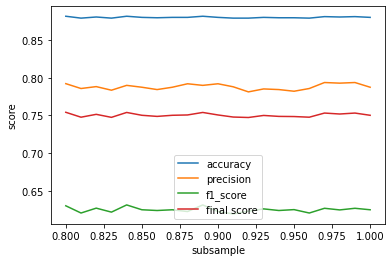

In [79]:
plt.plot(subsample, acc, label='accuracy')
plt.plot(subsample, prec, label='precision')
plt.plot(subsample, F1, label='f1_score')
plt.plot(subsample, final_score, label='final score')
plt.legend(loc = "best")
plt.xlabel('subsample')
plt.ylabel('score')

In [80]:
0.8+(final_score.index(max(final_score))*0.01)

0.8

subsample 選擇0.8

In [81]:
cbc = CatBoostClassifier(learning_rate=0.01, max_depth=6, subsample=0.8)
cbc.fit(x_train,y_train)

0:	learn: 0.6848267	total: 7.8ms	remaining: 7.8s
1:	learn: 0.6766450	total: 12.3ms	remaining: 6.13s
2:	learn: 0.6689526	total: 20.1ms	remaining: 6.69s
3:	learn: 0.6618332	total: 24.1ms	remaining: 5.99s
4:	learn: 0.6546889	total: 28.4ms	remaining: 5.65s
5:	learn: 0.6474082	total: 36.6ms	remaining: 6.06s
6:	learn: 0.6403710	total: 41.1ms	remaining: 5.83s
7:	learn: 0.6332349	total: 45.8ms	remaining: 5.68s
8:	learn: 0.6281602	total: 50.9ms	remaining: 5.6s
9:	learn: 0.6216931	total: 54.5ms	remaining: 5.39s
10:	learn: 0.6151835	total: 58.6ms	remaining: 5.27s
11:	learn: 0.6087911	total: 63.4ms	remaining: 5.22s
12:	learn: 0.6028407	total: 69ms	remaining: 5.24s
13:	learn: 0.5974351	total: 73ms	remaining: 5.14s
14:	learn: 0.5930108	total: 77.7ms	remaining: 5.1s
15:	learn: 0.5883369	total: 85.7ms	remaining: 5.27s
16:	learn: 0.5829744	total: 91.3ms	remaining: 5.28s
17:	learn: 0.5776466	total: 97.7ms	remaining: 5.33s
18:	learn: 0.5722691	total: 103ms	remaining: 5.3s
19:	learn: 0.5667080	total: 108m

170:	learn: 0.3516925	total: 1.08s	remaining: 5.22s
171:	learn: 0.3513584	total: 1.08s	remaining: 5.23s
172:	learn: 0.3510120	total: 1.09s	remaining: 5.21s
173:	learn: 0.3508084	total: 1.1s	remaining: 5.23s
174:	learn: 0.3504683	total: 1.12s	remaining: 5.26s
175:	learn: 0.3502705	total: 1.12s	remaining: 5.24s
176:	learn: 0.3498949	total: 1.13s	remaining: 5.25s
177:	learn: 0.3494829	total: 1.13s	remaining: 5.23s
178:	learn: 0.3491514	total: 1.15s	remaining: 5.26s
179:	learn: 0.3488998	total: 1.15s	remaining: 5.24s
180:	learn: 0.3485127	total: 1.17s	remaining: 5.29s
181:	learn: 0.3482608	total: 1.18s	remaining: 5.3s
182:	learn: 0.3478801	total: 1.18s	remaining: 5.28s
183:	learn: 0.3476111	total: 1.2s	remaining: 5.32s
184:	learn: 0.3473668	total: 1.21s	remaining: 5.33s
185:	learn: 0.3471609	total: 1.21s	remaining: 5.32s
186:	learn: 0.3468954	total: 1.23s	remaining: 5.33s
187:	learn: 0.3467201	total: 1.23s	remaining: 5.32s
188:	learn: 0.3464961	total: 1.24s	remaining: 5.33s
189:	learn: 0.3

337:	learn: 0.3248817	total: 2.14s	remaining: 4.2s
338:	learn: 0.3247671	total: 2.15s	remaining: 4.19s
339:	learn: 0.3246781	total: 2.15s	remaining: 4.18s
340:	learn: 0.3246136	total: 2.16s	remaining: 4.17s
341:	learn: 0.3245048	total: 2.16s	remaining: 4.16s
342:	learn: 0.3244635	total: 2.17s	remaining: 4.15s
343:	learn: 0.3244037	total: 2.18s	remaining: 4.15s
344:	learn: 0.3243370	total: 2.18s	remaining: 4.14s
345:	learn: 0.3242224	total: 2.19s	remaining: 4.13s
346:	learn: 0.3241007	total: 2.19s	remaining: 4.13s
347:	learn: 0.3240326	total: 2.2s	remaining: 4.12s
348:	learn: 0.3239196	total: 2.2s	remaining: 4.11s
349:	learn: 0.3238220	total: 2.21s	remaining: 4.11s
350:	learn: 0.3236974	total: 2.22s	remaining: 4.1s
351:	learn: 0.3235728	total: 2.22s	remaining: 4.09s
352:	learn: 0.3235292	total: 2.23s	remaining: 4.09s
353:	learn: 0.3234442	total: 2.24s	remaining: 4.08s
354:	learn: 0.3233442	total: 2.24s	remaining: 4.08s
355:	learn: 0.3232350	total: 2.25s	remaining: 4.07s
356:	learn: 0.32

505:	learn: 0.3117472	total: 3.2s	remaining: 3.12s
506:	learn: 0.3116618	total: 3.21s	remaining: 3.12s
507:	learn: 0.3115874	total: 3.21s	remaining: 3.11s
508:	learn: 0.3115088	total: 3.22s	remaining: 3.11s
509:	learn: 0.3114944	total: 3.22s	remaining: 3.1s
510:	learn: 0.3114291	total: 3.23s	remaining: 3.09s
511:	learn: 0.3113697	total: 3.24s	remaining: 3.08s
512:	learn: 0.3112670	total: 3.24s	remaining: 3.08s
513:	learn: 0.3112031	total: 3.25s	remaining: 3.08s
514:	learn: 0.3111474	total: 3.26s	remaining: 3.07s
515:	learn: 0.3110820	total: 3.27s	remaining: 3.07s
516:	learn: 0.3109728	total: 3.27s	remaining: 3.06s
517:	learn: 0.3109105	total: 3.28s	remaining: 3.05s
518:	learn: 0.3108820	total: 3.29s	remaining: 3.04s
519:	learn: 0.3108294	total: 3.29s	remaining: 3.04s
520:	learn: 0.3107321	total: 3.3s	remaining: 3.03s
521:	learn: 0.3106628	total: 3.3s	remaining: 3.03s
522:	learn: 0.3105669	total: 3.31s	remaining: 3.02s
523:	learn: 0.3105145	total: 3.32s	remaining: 3.01s
524:	learn: 0.31

692:	learn: 0.3006845	total: 4.42s	remaining: 1.96s
693:	learn: 0.3006396	total: 4.43s	remaining: 1.95s
694:	learn: 0.3005302	total: 4.43s	remaining: 1.94s
695:	learn: 0.3004839	total: 4.44s	remaining: 1.94s
696:	learn: 0.3004460	total: 4.44s	remaining: 1.93s
697:	learn: 0.3004048	total: 4.45s	remaining: 1.92s
698:	learn: 0.3003406	total: 4.46s	remaining: 1.92s
699:	learn: 0.3002719	total: 4.47s	remaining: 1.91s
700:	learn: 0.3002238	total: 4.47s	remaining: 1.91s
701:	learn: 0.3001803	total: 4.48s	remaining: 1.9s
702:	learn: 0.3001089	total: 4.48s	remaining: 1.89s
703:	learn: 0.3000567	total: 4.49s	remaining: 1.89s
704:	learn: 0.2999982	total: 4.5s	remaining: 1.88s
705:	learn: 0.2999015	total: 4.5s	remaining: 1.87s
706:	learn: 0.2998731	total: 4.51s	remaining: 1.87s
707:	learn: 0.2998059	total: 4.51s	remaining: 1.86s
708:	learn: 0.2997687	total: 4.52s	remaining: 1.86s
709:	learn: 0.2997331	total: 4.53s	remaining: 1.85s
710:	learn: 0.2996762	total: 4.53s	remaining: 1.84s
711:	learn: 0.2

866:	learn: 0.2912239	total: 5.48s	remaining: 841ms
867:	learn: 0.2911736	total: 5.49s	remaining: 834ms
868:	learn: 0.2911281	total: 5.49s	remaining: 828ms
869:	learn: 0.2910766	total: 5.5s	remaining: 821ms
870:	learn: 0.2910272	total: 5.5s	remaining: 815ms
871:	learn: 0.2909636	total: 5.51s	remaining: 809ms
872:	learn: 0.2909182	total: 5.51s	remaining: 802ms
873:	learn: 0.2908660	total: 5.52s	remaining: 796ms
874:	learn: 0.2908377	total: 5.52s	remaining: 789ms
875:	learn: 0.2908037	total: 5.53s	remaining: 783ms
876:	learn: 0.2907204	total: 5.54s	remaining: 776ms
877:	learn: 0.2906924	total: 5.54s	remaining: 770ms
878:	learn: 0.2906260	total: 5.54s	remaining: 763ms
879:	learn: 0.2905626	total: 5.56s	remaining: 758ms
880:	learn: 0.2904985	total: 5.56s	remaining: 751ms
881:	learn: 0.2904578	total: 5.57s	remaining: 745ms
882:	learn: 0.2904318	total: 5.57s	remaining: 738ms
883:	learn: 0.2903637	total: 5.58s	remaining: 732ms
884:	learn: 0.2903249	total: 5.58s	remaining: 725ms
885:	learn: 0.

In [82]:
pred=cbc.predict(x_test)
print('Train Result of CatBoost:')
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")

Train Result of CatBoost:
Accuracy Score: 88.15%
Precision Score: 79.22%
F1 score: 63.03%


# ◆ output for upload

In [83]:
df_test = pd.read_csv('churn_prediction_data/test.csv')

In [84]:
df_test

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0          2209    15623595        Scott          726    France  Female   39   
1          9924    15740283     Yegorova          661    France    Male   42   
2          4617    15802368          Tan          545    France    Male   34   
3          6077    15615322  Anayochukwu          731     Spain  Female   42   
4          9240    15766374       Glover          533    France  Female   50   
...         ...         ...          ...          ...       ...     ...  ...   
1995       7872    15617348       Taylor          628    France    Male   35   
1996       4257    15642785     Tokareva          639   Germany    Male   41   
1997       2273    15766575     Trevisan          548    France  Female   46   
1998        315    15610271      Dickson          602     Spain  Female   44   
1999       3628    15763895           He          615   Germany  Female   32   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          3   62397.41              1          0               0   
1          3  130339.64              1          1               0   
2          6   62397.41              2          1               1   
3          3   86717.08              1          1               0   
4          6   62397.41              1          1               1   
...      ...        ...            ...        ...             ...   
1995       6   62397.41              2          1               1   
1996       5   98154.30              2          1               0   
1997       3  119078.34              2          1               1   
1998       7   62397.41              2          1               1   
1999       5  105570.37              1          1               0   

      EstimatedSalary  
0           106139.31  
1           125776.38  
2            78372.28  
3           136026.27  
4           135205.58  
...               ...  
1995         96201.09  
1996        109531.64  
1997        116725.67  
1998        128135.95  
1999        104140.30  

[2000 rows x 13 columns]

In [85]:
test_data = df_test.loc[:, 'CreditScore': 'EstimatedSalary']

test_data = pd.get_dummies(test_data, columns=['Geography', 'Gender'])

## XGBoost

In [86]:
xgbc.fit(train_data, train_label) 

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.88, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [87]:
pred=xgbc.predict(test_data)

upload_data = pd.DataFrame({'RowNumber': df_test.RowNumber, 'Exited':pred})

In [88]:
upload_data.to_csv('upload_result/XGBoost.csv')

## CatBoost

In [89]:
cbc.fit(train_data, train_label) 

0:	learn: 0.6844296	total: 20.2ms	remaining: 20.1s
1:	learn: 0.6762012	total: 37.3ms	remaining: 18.6s
2:	learn: 0.6682957	total: 49.3ms	remaining: 16.4s
3:	learn: 0.6605709	total: 65.6ms	remaining: 16.3s
4:	learn: 0.6532357	total: 78.4ms	remaining: 15.6s
5:	learn: 0.6460676	total: 94.9ms	remaining: 15.7s
6:	learn: 0.6389758	total: 111ms	remaining: 15.7s
7:	learn: 0.6321095	total: 115ms	remaining: 14.3s
8:	learn: 0.6245223	total: 126ms	remaining: 13.9s
9:	learn: 0.6178196	total: 141ms	remaining: 14s
10:	learn: 0.6111223	total: 150ms	remaining: 13.5s
11:	learn: 0.6050370	total: 159ms	remaining: 13.1s
12:	learn: 0.5990264	total: 187ms	remaining: 14.2s
13:	learn: 0.5936140	total: 196ms	remaining: 13.8s
14:	learn: 0.5886835	total: 209ms	remaining: 13.7s
15:	learn: 0.5839288	total: 245ms	remaining: 15s
16:	learn: 0.5778851	total: 252ms	remaining: 14.5s
17:	learn: 0.5732411	total: 259ms	remaining: 14.1s
18:	learn: 0.5678337	total: 273ms	remaining: 14.1s
19:	learn: 0.5623280	total: 282ms	remai

168:	learn: 0.3481478	total: 1.95s	remaining: 9.57s
169:	learn: 0.3478706	total: 1.95s	remaining: 9.54s
170:	learn: 0.3476287	total: 1.96s	remaining: 9.49s
171:	learn: 0.3472346	total: 1.97s	remaining: 9.49s
172:	learn: 0.3469151	total: 1.98s	remaining: 9.45s
173:	learn: 0.3465819	total: 1.99s	remaining: 9.45s
174:	learn: 0.3461813	total: 2s	remaining: 9.41s
175:	learn: 0.3459930	total: 2s	remaining: 9.36s
176:	learn: 0.3457350	total: 2.02s	remaining: 9.39s
177:	learn: 0.3454601	total: 2.03s	remaining: 9.36s
178:	learn: 0.3451516	total: 2.04s	remaining: 9.34s
179:	learn: 0.3448992	total: 2.04s	remaining: 9.32s
180:	learn: 0.3446753	total: 2.06s	remaining: 9.3s
181:	learn: 0.3443594	total: 2.07s	remaining: 9.32s
182:	learn: 0.3441745	total: 2.1s	remaining: 9.37s
183:	learn: 0.3438575	total: 2.11s	remaining: 9.34s
184:	learn: 0.3435768	total: 2.11s	remaining: 9.3s
185:	learn: 0.3433223	total: 2.13s	remaining: 9.31s
186:	learn: 0.3431010	total: 2.13s	remaining: 9.28s
187:	learn: 0.3428731

340:	learn: 0.3223162	total: 3.17s	remaining: 6.13s
341:	learn: 0.3222492	total: 3.18s	remaining: 6.11s
342:	learn: 0.3221635	total: 3.19s	remaining: 6.1s
343:	learn: 0.3220836	total: 3.19s	remaining: 6.08s
344:	learn: 0.3220001	total: 3.19s	remaining: 6.07s
345:	learn: 0.3219099	total: 3.21s	remaining: 6.06s
346:	learn: 0.3218375	total: 3.21s	remaining: 6.04s
347:	learn: 0.3217368	total: 3.22s	remaining: 6.03s
348:	learn: 0.3216351	total: 3.23s	remaining: 6.02s
349:	learn: 0.3215802	total: 3.23s	remaining: 6s
350:	learn: 0.3214851	total: 3.24s	remaining: 5.99s
351:	learn: 0.3213733	total: 3.24s	remaining: 5.97s
352:	learn: 0.3213194	total: 3.25s	remaining: 5.95s
353:	learn: 0.3212196	total: 3.25s	remaining: 5.94s
354:	learn: 0.3211033	total: 3.26s	remaining: 5.92s
355:	learn: 0.3210550	total: 3.26s	remaining: 5.9s
356:	learn: 0.3209408	total: 3.27s	remaining: 5.9s
357:	learn: 0.3208557	total: 3.28s	remaining: 5.88s
358:	learn: 0.3207618	total: 3.28s	remaining: 5.86s
359:	learn: 0.3207

516:	learn: 0.3109344	total: 4.42s	remaining: 4.13s
517:	learn: 0.3108640	total: 4.42s	remaining: 4.12s
518:	learn: 0.3108044	total: 4.43s	remaining: 4.11s
519:	learn: 0.3106970	total: 4.44s	remaining: 4.09s
520:	learn: 0.3106366	total: 4.44s	remaining: 4.08s
521:	learn: 0.3106103	total: 4.45s	remaining: 4.07s
522:	learn: 0.3105528	total: 4.46s	remaining: 4.06s
523:	learn: 0.3104957	total: 4.46s	remaining: 4.05s
524:	learn: 0.3104673	total: 4.47s	remaining: 4.04s
525:	learn: 0.3104366	total: 4.48s	remaining: 4.03s
526:	learn: 0.3103779	total: 4.48s	remaining: 4.02s
527:	learn: 0.3102830	total: 4.49s	remaining: 4.01s
528:	learn: 0.3102346	total: 4.5s	remaining: 4s
529:	learn: 0.3101860	total: 4.5s	remaining: 3.99s
530:	learn: 0.3101725	total: 4.5s	remaining: 3.98s
531:	learn: 0.3101085	total: 4.51s	remaining: 3.97s
532:	learn: 0.3100481	total: 4.52s	remaining: 3.96s
533:	learn: 0.3100223	total: 4.53s	remaining: 3.95s
534:	learn: 0.3099716	total: 4.53s	remaining: 3.94s
535:	learn: 0.3099

686:	learn: 0.3023606	total: 5.46s	remaining: 2.49s
687:	learn: 0.3023226	total: 5.47s	remaining: 2.48s
688:	learn: 0.3022711	total: 5.47s	remaining: 2.47s
689:	learn: 0.3022477	total: 5.48s	remaining: 2.46s
690:	learn: 0.3022160	total: 5.48s	remaining: 2.45s
691:	learn: 0.3021710	total: 5.49s	remaining: 2.44s
692:	learn: 0.3021346	total: 5.49s	remaining: 2.43s
693:	learn: 0.3020950	total: 5.51s	remaining: 2.43s
694:	learn: 0.3020241	total: 5.51s	remaining: 2.42s
695:	learn: 0.3019828	total: 5.52s	remaining: 2.41s
696:	learn: 0.3019516	total: 5.52s	remaining: 2.4s
697:	learn: 0.3019199	total: 5.53s	remaining: 2.39s
698:	learn: 0.3018562	total: 5.53s	remaining: 2.38s
699:	learn: 0.3018489	total: 5.53s	remaining: 2.37s
700:	learn: 0.3017810	total: 5.54s	remaining: 2.36s
701:	learn: 0.3017228	total: 5.54s	remaining: 2.35s
702:	learn: 0.3016866	total: 5.55s	remaining: 2.34s
703:	learn: 0.3016425	total: 5.55s	remaining: 2.33s
704:	learn: 0.3015749	total: 5.57s	remaining: 2.33s
705:	learn: 0

861:	learn: 0.2945910	total: 6.53s	remaining: 1.04s
862:	learn: 0.2945376	total: 6.54s	remaining: 1.04s
863:	learn: 0.2945036	total: 6.54s	remaining: 1.03s
864:	learn: 0.2944646	total: 6.55s	remaining: 1.02s
865:	learn: 0.2944053	total: 6.55s	remaining: 1.01s
866:	learn: 0.2943580	total: 6.56s	remaining: 1s
867:	learn: 0.2943309	total: 6.56s	remaining: 998ms
868:	learn: 0.2942922	total: 6.57s	remaining: 990ms
869:	learn: 0.2942503	total: 6.57s	remaining: 982ms
870:	learn: 0.2941911	total: 6.58s	remaining: 975ms
871:	learn: 0.2941350	total: 6.59s	remaining: 967ms
872:	learn: 0.2940922	total: 6.59s	remaining: 959ms
873:	learn: 0.2940287	total: 6.6s	remaining: 952ms
874:	learn: 0.2939797	total: 6.61s	remaining: 944ms
875:	learn: 0.2939448	total: 6.61s	remaining: 936ms
876:	learn: 0.2939040	total: 6.62s	remaining: 928ms
877:	learn: 0.2938634	total: 6.62s	remaining: 920ms
878:	learn: 0.2938298	total: 6.63s	remaining: 912ms
879:	learn: 0.2937322	total: 6.63s	remaining: 905ms
880:	learn: 0.29

In [90]:
pred=cbc.predict(test_data)

upload_data = pd.DataFrame({'RowNumber': df_test.RowNumber, 'Exited':pred})

In [91]:
upload_data.to_csv('upload_result/CatBoost.csv')